# Introduction
This ipynb document mainly implements Textrank to extract keywords and analyzes the negative emotions with the best predicted scores. We also implemented the removal of keywords to compare the importance of keyword removal on classification prediction.

# 1. Import dataset with Emotion Score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
stopwords_set =  set(stopwords.words('english'))
import re
# from newspaper import Article
from rake_nltk import Rake
import yake
from nltk.corpus import stopwords as sw
import spacy
import pytextrank
warnings.filterwarnings("ignore")
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
warnings.filterwarnings("ignore")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laneylee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/Users/laneylee/anaconda3/lib/python3.11/site-packages


In [23]:
result = pd.read_csv('result/all&suicide_with_prob/all_probs.csv') # with feature score
suicide = pd.read_csv('result/all&suicide_with_prob/suicide_probs.csv', engine = 'python',on_bad_lines='skip')
result

id  predictions     anger  annoyance  disappointment  disapproval  \
0          0         12.0  0.003140   0.013643        0.320729     0.105968   
1          1          1.0  0.033857   0.866869        0.000738     0.083598   
2          2          3.0  0.000549   0.299958        0.000882     0.639542   
3          3          1.0  0.002605   0.637379        0.008194     0.351810   
4          4         12.0  0.000372   0.001420        0.004618     0.008440   
...      ...          ...       ...        ...             ...          ...   
14790  14047          3.0  0.000194   0.003100        0.272729     0.447826   
14791  14048          3.0  0.006142   0.040784        0.169939     0.467442   
14792  14049          1.0  0.234363   0.378303        0.111972     0.129934   
14793  14050          1.0  0.003498   0.715970        0.043989     0.062357   
14794  14051          3.0  0.065301   0.100907        0.169392     0.200562   

            disgust  embarrassment          fear         grief  ...  \
0      1.306766e-03   3.976417e-03  1.945175e-03  6.303866e-04  ...   
1      1.513196e-03   1.323251e-02  2.314404e-05  2.276647e-06  ...   
2      1.295966e-03   4.677313e-03  9.640865e-04  4.965249e-06  ...   
3      3.153184e-08   6.816774e-07  1.871734e-08  3.432036e-09  ...   
4      3.367238e-04   1.772046e-03  4.271182e-03  6.603977e-04  ...   
...             ...            ...           ...           ...  ...   
14790  5.954654e-03   1.449352e-03  4.251438e-02  3.976550e-03  ...   
14791  3.218773e-03   1.576891e-03  1.857177e-03  1.132213e-03  ...   
14792  6.946132e-02   4.589238e-02  1.125795e-04  7.796997e-04  ...   
14793  6.876551e-02   7.745647e-02  1.038076e-04  1.041726e-04  ...   
14794  8.591377e-02   1.562495e-02  2.360849e-02  3.728525e-03  ...   

            remorse       sadness      positive   neutral            class  \
0      6.034370e-04  1.836595e-02  5.781246e-02  0.444644   almosthomeless   
1      2.588070e-05  1.288332e-04  1.572072e-07  0.000009   almosthomeless   
2      4.310008e-08  1.453962e-06  2.927398e-05  0.052072   almosthomeless   
3      1.738535e-09  2.225840e-08  6.092990e-07  0.000011   almosthomeless   
4      5.265729e-04  6.840330e-04  3.335223e-02  0.912119   almosthomeless   
...             ...           ...           ...       ...              ...   
14790  4.438736e-03  8.515444e-02  3.094133e-03  0.071845  normal_positive   
14791  2.526511e-03  9.345067e-03  3.685362e-02  0.252023  normal_positive   
14792  4.606484e-03  2.616194e-03  1.306576e-02  0.008035  normal_positive   
14793  3.678730e-03  2.400653e-02  1.788583e-05  0.000030  normal_positive   
14794  1.250844e-02  4.876827e-02  9.488957e-02  0.160754  normal_positive   

                                                    text  \
0      I literally don’t know where to ask this but I...   
1      I'm almost 16 and am going to study med but I ...   
2      I got a job, I go to orientation Tuesday. Tomo...   
3      Struggling over here to get everything lined u...   
4      Ill be homeless officially Monday. Moving out ...   
...                                                  ...   
14790  Luigi is the best character in super Mario 3D ...   
14791  Man, rye bread with ham and cheese is really g...   
14792  Idk what to call this, but here’s a rant I thi...   
14793  Important announcement! Axolotls are the best ...   
14794                    I am horny And I am proud of it   

                                                   token sentiment  \
0      liter dont know ask serious question advic pls... -0.063889   
1      im almost  go studi med need take coach henc m...  0.136364   
2      got job go orient tuesday tomorrow homeless we...  0.050451   
3      struggl get everyth line upim need refug seek ... -0.002083   
4      ill homeless offici monday move sunday hope st... -0.100000   
...                                                  ...       ...   
14790  luigi best charact super mario  world disagre ...  0.

In [4]:
def clean(text):
    text = str(text).lower()# 转换成小写
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^a-zA-Z\s]', '', text)# filter non English char
    text = [word for word in text.split(' ') if word not in stopwords_set]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text

In [5]:
result.groupby('class').agg(lambda x: x.nunique())['id']

class
adhd                997
almosthomeless      907
anxiety             992
assistance          912
bipolar             995
depression          993
eatingdisorders     991
get_motivated       687
normal_positive    2699
ocd                 993
ptsd                989
selfharm            996
stress              901
Name: id, dtype: int64

In [6]:
result.columns

Index(['id', 'predictions', 'anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral', 'class',
       'text', 'token', 'sentiment', 'token_count', 'text_length'],
      dtype='object')

In [7]:
result.groupby('class').describe().to_csv('result/statistics.csv')

In [8]:
result.describe()['token_count']

count    13901.000000
mean        65.774692
std         77.542367
min          1.000000
25%         17.000000
50%         44.000000
75%         87.000000
max       1783.000000
Name: token_count, dtype: float64

In [9]:
result['text'][2010]

'I’m so tired of having to deal with this so im finally turning to strangers on the internet to feel less alone. \n\nI get really anxious when my brain suddenly gives me the thought that oh the world will one day end. I know people say it all the time in this very casual way but the very thought of it makes me go cold and my heart simultaneously drop and start racing at the same time. I know people talk the sun exploding and that the universe will one day end just like the Big Bang created everything but the thought of it still makes me go clammy and I don’t know how to stop. I’ll start rushing and fussing just to try and distract myself. Nothing I can find on the internet really helps like that I should find my own meaning etc etc but the fact is I can’t seem to cope with the idea that one day everything will cease to exist I really can’t cope with it at all. '

In [43]:
mental_class = ['adhd', 'almosthomeless', 'anxiety', 'assistance', 'bipolar', 'depression', 'eatingdisorders', 'get_motivated', 'ocd', 'ptsd', 'normal_positive','selfharm', 'stress']

In [10]:
result.columns

Index(['id', 'predictions', 'anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral', 'class',
       'text', 'token', 'sentiment', 'token_count', 'text_length'],
      dtype='object')

# 2. Statistical and Emotion Analysis

In [31]:
emotion = ['anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral']
sentiment_df = pd.DataFrame([])
sentiment_df_sui = pd.DataFrame([])
for i in emotion:
    print(i)
    sentiment_df = pd.concat([sentiment_df,pd.DataFrame(result.groupby(['class']).describe()[i][['mean']])],axis = 1)
    sentiment_df = sentiment_df.rename(columns={'mean':i})
    sentiment_df_sui  = pd.concat([sentiment_df_sui ,pd.DataFrame(suicide.groupby(['class']).describe()[i][['mean']])],axis = 1)
    sentiment_df_sui  = sentiment_df_sui.rename(columns={'mean':i})

anger
annoyance
disappointment
disapproval
disgust
embarrassment
fear
grief
nervousness
remorse
sadness
positive
neutral


In [33]:
sentiment_df_all = pd.concat([sentiment_df_sui,sentiment_df],axis = 0)
sentiment_df_all

anger  annoyance  disappointment  disapproval   disgust  \
class                                                                         
non-suicide      0.030435   0.251543        0.108617     0.284502  0.018044   
suicide          0.030773   0.250514        0.111414     0.283772  0.018992   
adhd             0.026404   0.321259        0.075387     0.387794  0.011045   
almosthomeless   0.029683   0.225152        0.101281     0.417583  0.012801   
anxiety          0.016394   0.317384        0.116576     0.196785  0.014364   
assistance       0.021355   0.231737        0.090081     0.307868  0.017536   
bipolar          0.030582   0.269073        0.107350     0.326066  0.019685   
depression       0.041078   0.277799        0.136690     0.313337  0.016583   
eatingdisorders  0.018615   0.306724        0.072783     0.408377  0.018564   
get_motivated    0.023386   0.254336        0.085105     0.442088  0.012168   
normal_positive  0.040116   0.134668        0.128733     0.128307  0.028074   
ocd              0.024294   0.264810        0.124747     0.291276  0.013286   
ptsd             0.032092   0.328457        0.085858     0.284582  0.018046   
selfharm         0.052090   0.221365        0.154575     0.244068  0.026053   
stress           0.023789   0.261539        0.105702     0.253583  0.015555   

                 embarrassment      fear     grief  nervousness   remorse  \
class                                                                       
non-suicide           0.029504  0.021064  0.003214     0.071445  0.002144   
suicide               0.029161  0.017981  0.003101     0.066399  0.002177   
adhd                  0.030957  0.004351  0.001784     0.033826  0.000417   
almosthomeless        0.015336  0.011921  0.001609     0.045450  0.001187   
anxiety               0.040016  0.053036  0.003314     0.160111  0.000720   
assistance            0.027919  0.007182  0.002504     0.050188  0.001631   
bipolar               0.026733  0.017823  0.003097     0.078568  0.001237   
depression            0.016883  0.012876  0.005721     0.069639  0.002762   
eatingdisorders       0.042624  0.011998  0.001960     0.033720  0.001564   
get_motivated         0.015375  0.005693  0.001149     0.033348  0.001115   
normal_positive       0.024810  0.015969  0.003108     0.043557  0.005266   
ocd                   0.042506  0.031520  0.002755     0.074561  0.001447   
ptsd                  0.033000  0.024079  0.003447     0.068780  0.001275   
selfharm              0.032770  0.032554  0.004803     0.083779  0.002773   
stress                0.026320  0.020271  0.004849     0.138465  0.001776   

                  sadness  positive   neutral  
class                                          
non-suicide      0.030505  0.063657  0.085326  
suicide          0.028450  0.073069  0.084196  
adhd             0.014747  0.014877  0.077154  
almosthomeless   0.023791  0.033025  0.081181  
anxiety          0.023592  0.008587  0.049123  
assistance       0.025222  0.095514  0.121262  
bipolar          0.026593  0.023320  0.069874  
depression       0.049024  0.014653  0.042953  
eatingdisorders  0.017763  0.016765  0.048543  
get_motivated    0.013858  0.038382  0.073999  
normal_positive  0.030241  0.263245  0.153905  
ocd              0.025160  0.025685  0.077954  
ptsd             0.024957  0.022368  0.073059  
selfharm         0.048172  0.026932  0.070065  
stress           0.053551  0.026350  0.068253

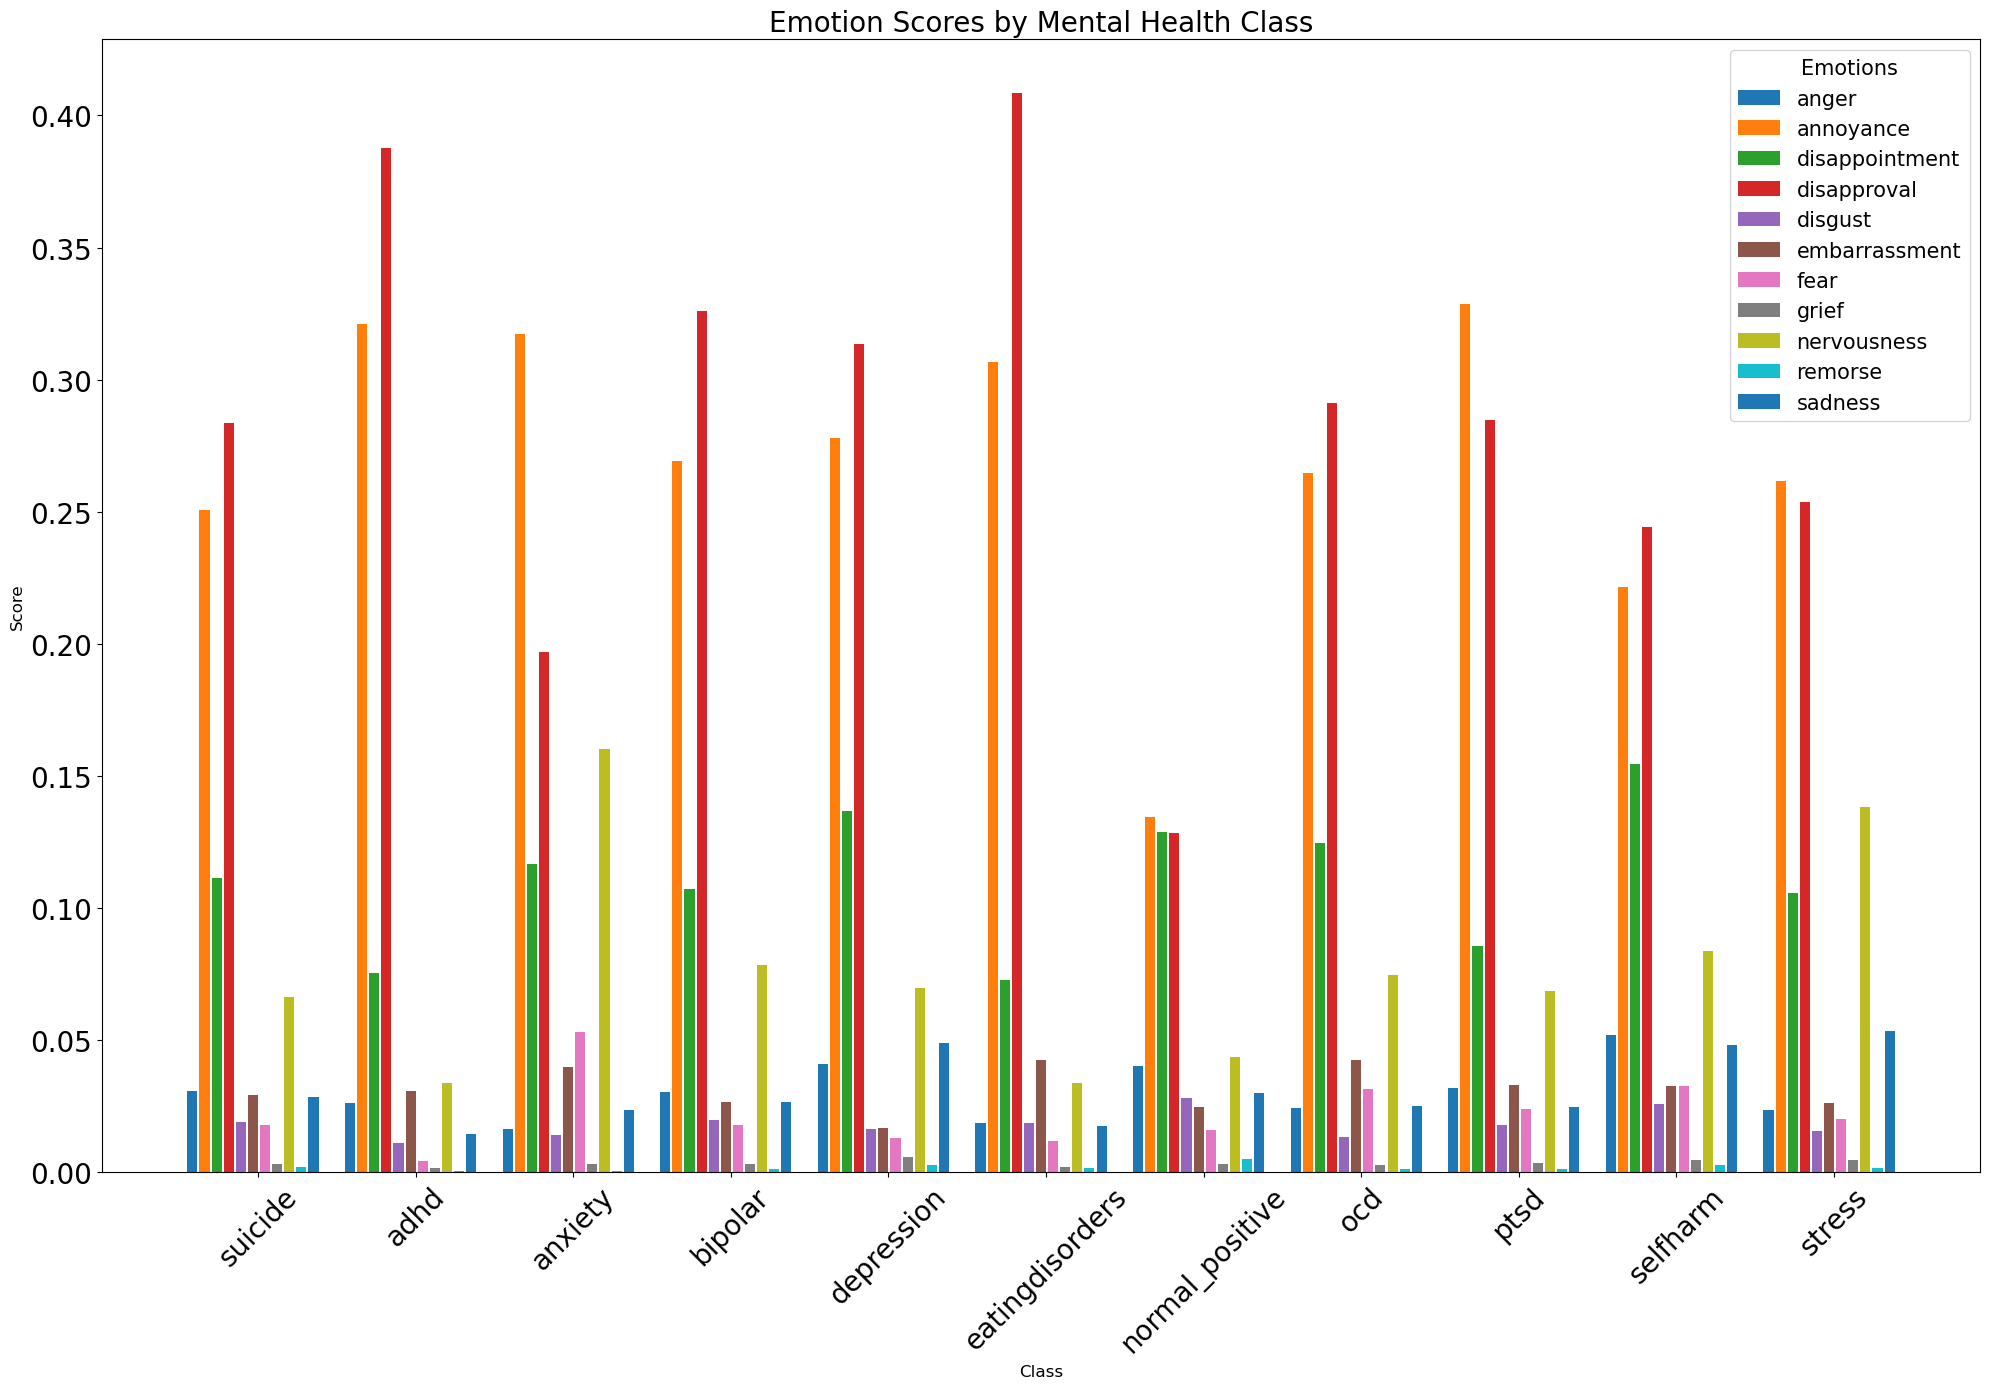

In [41]:
selected_class = [ 'suicide', 'adhd', 'anxiety',
       'bipolar', 'depression', 'eatingdisorders',
       'normal_positive', 'ocd', 'ptsd', 'selfharm',
       'stress'] #'non-suicide',

selected_emotion = ['anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness']

sentiment_df_part = sentiment_df_all.loc[selected_class]
# Mock-up data, as the actual data is not available in the execution environment.
# This is an example based on the typical structure of such data.
data = {
    'class': selected_class }
for i in selected_emotion:
    data[i] = sentiment_df_part[i]

num_classes = 11
title_fontsize = 20
axis_label_fontsize = 12
tick_label_fontsize = 20
legend_fontsize = 15

# Define the width of the bars and the space between the groups
bar_width = 0.1  # Smaller value for narrower bars
space_between_bars = 0.02  # Space between individual bars within a group
space_between_groups = 0.1  # Space between groups of bars


df = pd.DataFrame(data)

# Set the 'class' column as the index
df.set_index('class', inplace=True)

# Calculate the number of emotion classes and the total width for each group of bars
num_emotions = len(selected_emotion)
group_width = num_emotions * (bar_width + space_between_bars) + space_between_groups

# Calculate the positions for the class groups
group_positions = np.linspace(0, num_classes * group_width, num_classes)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(20, 14))

# Plot each bar group
for idx, emotion in enumerate(selected_emotion):
    emotion_positions = group_positions + (idx * (bar_width + space_between_bars))
    ax.bar(emotion_positions, df[emotion], width=bar_width, label=emotion)

# Set the x-axis tick positions and labels to the center of each group
ax.set_xticks(group_positions + group_width / 2 - (bar_width + space_between_bars) / 2)
ax.set_xticklabels(selected_class)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Add titles and labels
# plt.title('Emotion Scores by Mental Health Class')
# plt.ylabel('Score')
# plt.xlabel('Class')

# # Add a legend
# plt.legend(title='Emotions')

# # Show the plot with a tight layout
# plt.tight_layout()
# plt.show()
# Titles and labels with adjusted font sizes
ax.set_title('Emotion Scores by Mental Health Class', fontsize=title_fontsize)
ax.set_xlabel('Class', fontsize=axis_label_fontsize)
ax.set_ylabel('Score', fontsize=axis_label_fontsize)

# Adjust the tick label font size
ax.tick_params(axis='both', labelsize=tick_label_fontsize)

# Adjust the legend font size
ax.legend(title='Emotions', title_fontsize=legend_fontsize, fontsize=legend_fontsize)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


In [128]:
sentiment_df.to_csv('result/sentiment_all.csv')

In [88]:
# sentiment_df.to_csv('result/sentiment.csv')

# 3. Keyword extraction

In [35]:
result['cleaned_text'] = result['text'].apply(clean)

In [36]:
stopwords = set(sw.words('english'))
punctuations = set([ c for c in ".,;:?!(){}[]-'\""])

rake = Rake(stopwords=stopwords, punctuations=punctuations)

In [8]:
text =  result['text'].iloc[0]
def preprocess(text):
    # Remove line breaks
    processed = re.sub('\n', ' ', text)
    # Use spaCy for tokenzing (seems to be convenient)
    processed = ' '.join([ t.text for t in nlp(processed) ])
    # Remove duplicate whitespaces
    processed = re.sub('\s+', ' ', processed)
    return processed
# # Analyze text with spaCy
# doc = nlp(text)
# doc
text = preprocess(text)

print(text)
rake.extract_keywords_from_text(text)
rake_unique_keywords = set()

for score, keyword in rake.get_ranked_phrases_with_scores()[:10]:
    # Split the keyword into words and check its length
    words = keyword.split()
    print(words)
    if 1 <= len(words) <= 4:
        rake_unique_keywords.add((keyword.lower(), score))

rake_unique_keywords_sorted = sorted(rake_unique_keywords, key=lambda tup: tup[1], reverse=True)[:10]
# Lastly, we print the top keywords.
for keyword, score in rake_unique_keywords_sorted:
    print("{:.3f}:\t{}".format(score, keyword))
print(rake_unique_keywords_sorted)

I literally do n’t know where to ask this but I have a serious question or advice pls Long story short this lady told me would keep my dogs for me when i became homeless until i could get back on my feet and she would give the dogs back to me then but now i am ready for them again and she ’s all a sudden kinda ignoring me and a he s acting shady and blowing me off . Is there absolutely anything that can be done ?
['advice', 'pls', 'long', 'story', 'short']
['sudden', 'kinda', 'ignoring']
['could', 'get', 'back']
['would', 'keep']
['would', 'give']
['serious', 'question']
['lady', 'told']
['dogs', 'back']
['became', 'homeless']
['acting', 'shady']
9.000:	sudden kinda ignoring
8.500:	could get back
4.000:	became homeless
4.000:	lady told
4.000:	serious question
4.000:	acting shady
4.000:	would keep
4.000:	dogs back
4.000:	would give
[('sudden kinda ignoring', 9.0), ('could get back', 8.5), ('became homeless', 4.0), ('lady told', 4.0), ('serious question', 4.0), ('acting shady', 4.0), ('w

## Rake

In [37]:
def keyword_rake(text,top = 10):
    try:
        text = preprocess(text)
        rake.extract_keywords_from_text(text)
        rake_unique_keywords = set()

        for score, keyword in rake.get_ranked_phrases_with_scores()[:top]:
            # Split the keyword into words and check its length
            words = keyword.split()
            print(words)
            if 1 <= len(words) <= 5:
                rake_unique_keywords.add((keyword.lower(), score))

        rake_unique_keywords_sorted = sorted(rake_unique_keywords, key=lambda tup: tup[1], reverse=True)[:top]
        # Lastly, we print the top keywords.
        result = {}
        for keyword, score in rake_unique_keywords_sorted:
            print("{:.3f}:\t{}".format(score, keyword))
            
        return rake_unique_keywords_sorted 
    except:
        return []
        

In [38]:
result['keyword_rake'] = result['cleaned_text'].apply(keyword_rake)

# Yake

In [39]:
def keyword_yake(text):
    try:
        language = "en"
        max_ngram_size = 3
        deduplication_threshold = 0.9
        deduplication_algo = 'seqm'
        window_size = 1
        num_of_keywords = 10

        yake_keyword_extractor = yake.KeywordExtractor(lan=language, 
                                                       n=max_ngram_size, 
                                                       dedupLim=deduplication_threshold, 
                                                       dedupFunc=deduplication_algo, 
                                                       windowsSize=window_size,
                                                       top=num_of_keywords,
                                                       features=None)

        yake_keywords = yake_keyword_extractor.extract_keywords(text)

        yake_keywords_sorted = sorted(yake_keywords, key=lambda tup: tup[1], reverse=False)

        for keyword, score in yake_keywords_sorted:
            print("{:.6f}:\t{}".format(score, keyword))
        return yake_keywords_sorted
    except:
        return []

In [51]:
def keyword_textrank(text):
    textrank_unique_keywords_sorted = []
    try:
        doc = nlp(text)

        textrank_unique_keywords = set()
        
        for phrase in doc._.phrases:
            # 计算每个短语的长度（即单词数量）
            num_words = len(phrase.text.split())
            if num_words < 5:  # 只考虑长度小于5的短语
                textrank_unique_keywords.add((phrase.text.lower(), phrase.rank))
       # This intermediate step of removing the duplicates requires that we have to sort the keywords again; we also limit the result to the top 10 keywords to be consistent with the outer outputs above.

        textrank_unique_keywords_sorted = sorted(textrank_unique_keywords, key=lambda tup: tup[1], reverse=True)[:20]
       # As the last step, we print the top keywords and compare them to the result from the other algorithms.

        for keyword, score in textrank_unique_keywords_sorted:
            print("{:.3f}:\t{}".format(score, keyword))
            
    except:
        pass
        
    return textrank_unique_keywords_sorted

In [52]:
keyword_textrank(result['cleaned_text'].iloc[0])

0.149:	serious question advice
0.130:	dogs
0.095:	feet
0.000:	she
0.000:	he
0.000:	absolutely anything


[('serious question advice', 0.14878938689098237),
 ('dogs', 0.12987830906934147),
 ('feet', 0.09467403369130699),
 ('she', 0.0),
 ('he', 0.0),
 ('absolutely anything', 0.0)]

# Keyword Extract by Textrank

In [54]:
keyword_all = {}
mental_class = ['adhd',  'anxiety', 'bipolar', 'depression', 'eatingdisorders', 'ocd', 'ptsd', 'normal_positive','selfharm', 'stress']

for i in mental_class:
    print(i)
    keyword_all[i] = keyword_textrank(' '.join(result[result['class']==i]['text'].astype(str)))


adhd
0.050:	adhd thing
0.049:	did
0.049:	done
0.048:	said time
0.048:	adhd combined time
0.048:	other adhd people
0.046:	life making friends
0.046:	adhd medications
0.046:	adhd medication
0.045:	full time work
0.044:	more time
0.044:	other days
0.044:	other things
0.043:	other adhd symptoms
0.043:	good day
0.043:	adhd meds
0.043:	good thing
0.043:	good things
0.043:	week days
0.043:	bad day
anxiety
0.061:	worse anxiety
0.061:	bad anxiety
0.059:	bad health anxiety
0.058:	anxiety attack
0.058:	anxiety attacks
0.058:	panic anxiety
0.057:	such bad anxiety
0.056:	heart anxiety
0.056:	anxiety symptoms
0.056:	felt
0.055:	long time anxiety sufferer
0.055:	more anxiety
0.055:	anxiety brain
0.055:	health anxiety
0.055:	severe anxiety attacks
0.055:	anxiety medication
0.055:	anxiety medications
0.055:	new anxiety
0.055:	anxiety issues
0.054:	high anxiety
bipolar
0.058:	felt
0.050:	going work
0.049:	days days
0.047:	bad times
0.046:	good times
0.045:	go mode
0.045:	part time jobs
0.045:	bipolar ep

In [ ]:
keyword_all 

In [16]:
### After selection
keywords = {
    'adhd': ['adhd', 'vyvanse','medication', 'diagnosed'], 
    'almosthomeless': [ 'homeless', 'help', 'eviction', 'car'],
    'anxiety': ['anxiety', 'medication'],
    'assistance': ['assist', 'help',  'money'],
    'bipolar': ['bipolar',  'depression'],
    'depression': ['depression'],
    'eatingdisorders': [ 'foods', 'weight', 'disorder', 'eating lot', 'ate lot'],
    'get_motivated': ['energy', 'outcome','motivate'],
#     'normal_positive': ['good', 'best', 'happy', 'birthday', 'friend'],
    'ocd': [ 'ocd',  'obsessive'],
    'ptsd': ['ptsd','therapist'],
    'selfharm': ['cut', 'self harm', 'blade','harm'],
    'stress': ['stress'],
    #'mask':['doubt', 'depress', 'trouble', 'pressure', 'sadness', 'grief'], # --> from paper, may not suit our purpose
    'suicide':['die','death','survive','suicide','kill']
}

In [17]:
keywords = {'mask':['doubt', 'depress', 'trouble', 'pressure', 'sadness', 'grief']}

In [18]:
def count_keywords(text, keywords_dict): # count the #keyword given a category
    keyword_counts = {category:{} for category in keywords_dict}

    for category, words in keywords_dict.items():
        for word in words:

            keyword_counts[category][word] = text.lower().count(word.lower())
    return keyword_counts
counts = {}
for category in mental_class:

    category_text = ' '.join(result[result['class'] == category]['cleaned_text'])
    counts[category] = count_keywords(category_text, keywords)



In [371]:
for j in mental_class:
    print(j)
    for i in counts:
        try:
            print(i,counts[i][j])
        except:
            pass

adhd
adhd {'adhd': 936, 'vyvanse': 198, 'medication': 412, 'diagnosed': 274}
almosthomeless {'adhd': 6, 'vyvanse': 0, 'medication': 13, 'diagnosed': 11}
anxiety {'adhd': 36, 'vyvanse': 2, 'medication': 168, 'diagnosed': 82}
assistance {'adhd': 4, 'vyvanse': 0, 'medication': 21, 'diagnosed': 23}
bipolar {'adhd': 52, 'vyvanse': 7, 'medication': 216, 'diagnosed': 230}
depression {'adhd': 22, 'vyvanse': 2, 'medication': 73, 'diagnosed': 56}
eatingdisorders {'adhd': 15, 'vyvanse': 0, 'medication': 26, 'diagnosed': 61}
get_motivated {'adhd': 12, 'vyvanse': 1, 'medication': 12, 'diagnosed': 11}
normal_positive {'adhd': 0, 'vyvanse': 0, 'medication': 0, 'diagnosed': 0}
ocd {'adhd': 52, 'vyvanse': 2, 'medication': 108, 'diagnosed': 125}
ptsd {'adhd': 34, 'vyvanse': 0, 'medication': 64, 'diagnosed': 154}
selfharm {'adhd': 4, 'vyvanse': 0, 'medication': 14, 'diagnosed': 8}
stress {'adhd': 22, 'vyvanse': 0, 'medication': 51, 'diagnosed': 24}
almosthomeless
adhd {'homeless': 2, 'help': 511, 'evicti

## Remove keyword

In [40]:
def remove_keyword(text,keywords,category):
    try:
        for i in keywords[category]:
            text = text.lower()
            text = text.replace(i,'[MASK]')
    except:
        text = str(text)
    return text
    

In [41]:
# result['text_no_kw'] = '1'
# result['cleaned_text_no_kw'] = '1'
# for category in mental_class:
# #     print(category)
#     result.loc[result['class'] == category, 'text_no_kw'] = result.loc[result['class'] == category, 'text'].apply(lambda x: remove_keyword(x, keywords, category))
#     result.loc[result['class']==category,'cleaned_text_no_kw'] = result.loc[result['class']==category,'cleaned_text'].apply(lambda x:remove_keyword(x,keywords,category))                               

In [73]:
def remove_keyword_byall(text,keywords):
    try:
        for i in keywords:
            if i == 'suicide':
                break
            for j in keywords[i][:2]:
#                 print(j)
                text = text.lower()
                text = text.replace(j,'[MASK]')
    except:
        text = str(text)
    return text
result['text_no_kw'] = result['text'].apply(lambda x: remove_keyword_byall(x, keywords))
result['cleaned_text_no_kw'] = result['cleaned_text'].apply(lambda x:remove_keyword_byall(x,keywords))                               

In [50]:
result[['id', 'anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral', 'class',
     'sentiment', 
       'text_no_kw', 'cleaned_text_no_kw']].to_csv('result/df_all_nokw.csv',index = False) # multiple class without keyword

# Suiside

In [37]:
suicide.groupby('class').describe()[['token_count','text_count']].to_csv('result/suicide_statistics.csv')

In [57]:
print(suicide['class'].value_counts())
suicide_class = ['suicide','non-suicide']

class
non-suicide    6825
suicide        6809
Name: count, dtype: int64


In [71]:
suicide['keyword'] = suicide['text'].apply(keyword_textrank)
for i in suicide_class:
    print('These are keywords for',i)
    keyword_all[i] = keyword_textrank(' '.join(suicide[suicide['class']==i]['token'].astype(str)))
suicide[suicide['class']=='suicide']['keyword']

0.199:	notes
0.183:	energy
0.167:	matter
0.091:	you guys
0.000:	i
0.150:	new friends
0.087:	contact
0.069:	less and less contact
0.067:	all friends
0.067:	my friends
0.067:	a friend
0.060:	my masters degree
0.060:	a masters degree
0.058:	these 3 great friends
0.058:	a big fucking city
0.052:	my bachelors degree
0.051:	school
0.050:	3 amazing people
0.049:	all my friends
0.045:	a deep depression
0.043:	the best thing
0.042:	my studies
0.040:	the same uni
0.039:	againi
0.036:	2 years
0.160:	anymore mistake
0.156:	new years
0.155:	cutoff contacts
0.137:	judgement
0.123:	family
0.117:	heart
0.108:	cutoff
0.058:	the stagnation
0.057:	all friends
0.053:	my life
0.000:	that
0.000:	i
0.168:	idk
0.085:	my fault
0.078:	no one
0.000:	me
0.000:	everyone
0.000:	they
0.000:	it
0.000:	what
0.000:	i
0.062:	people
0.061:	happiness
0.060:	anorexia
0.057:	cares
0.057:	their own shit/interesting stuff
0.057:	a different mother
0.046:	unlovableseriously
0.044:	a disgusting creature
0.043:	the other hand
0.

0.085:	several hours
0.080:	bad grammar
0.075:	alzheimers
0.065:	thanks
0.061:	dinner
0.061:	care
0.059:	part
0.058:	my* family
0.053:	work
0.051:	apologies
0.050:	a random old lady
0.048:	stuffs
0.046:	our family
0.046:	her family
0.043:	the lowest floor
0.036:	the police
0.029:	that night
0.028:	the restaurant
0.027:	this case
0.025:	the thing
0.157:	life
0.072:	a struggle
0.000:	everything
0.000:	what
0.000:	strugglei
0.000:	i
0.182:	dark academia
0.120:	knowledge
0.116:	any dark academia veterans
0.085:	ps - feel
0.061:	any advice
0.056:	the persuit
0.056:	the clothes
0.056:	the music
0.047:	love
0.033:	all the information
0.000:	me
0.000:	i
0.000:	it
0.000:	you
0.080:	mood swings
0.078:	friends
0.073:	people
0.068:	insurance
0.068:	october
0.064:	paini
0.048:	my medication hostage
0.043:	the girl
0.041:	a new boyfriend
0.040:	no one
0.036:	no friends
0.036:	a friend
0.035:	my home
0.035:	the beginning of october
0.032:	this week
0.031:	the point
0.031:	the beginning
0.029:	months 

0.099:	suicidal thoughts
0.092:	last night
0.081:	thoughts
0.080:	good grades
0.074:	months
0.074:	professional help
0.071:	friends
0.068:	night
0.064:	time
0.059:	long story
0.056:	cgpa
0.056:	efforts
0.055:	✌
0.055:	goodbye
0.054:	college
0.051:	tonight
0.047:	one last time
0.045:	a supportive family
0.044:	a good day
0.044:	a good set
0.092:	thoughts
0.092:	suicide
0.072:	things
0.065:	much harder situations
0.054:	your s/o?i
0.047:	a hospital
0.047:	the fear
0.044:	my family
0.043:	my depression
0.041:	my boyfriend
0.040:	the strength
0.040:	a part
0.035:	the past
0.000:	him
0.000:	me
0.000:	that
0.000:	it
0.000:	i
0.000:	he
0.085:	childish rage
0.080:	doggy clothing
0.076:	other soft things
0.072:	breakable objects
0.071:	suicidal thoughts
0.071:	others
0.057:	course
0.055:	xanax
0.053:	ideationi
0.052:	foolish&gt;i
0.052:	stuff
0.049:	my best friend
0.049:	suicidal
0.045:	alcohol
0.042:	today
0.039:	myself&gt;etc
0.038:	a new apartment
0.035:	a box
0.035:	that box
0.031:	our dog’

0.078:	more money
0.061:	home
0.061:	thing
0.057:	cash
0.049:	30th
0.048:	zoloft
0.046:	love
0.042:	a webcam model
0.040:	my old hobbies
0.037:	a new place
0.036:	the day
0.029:	seven months
0.029:	my life
0.028:	my heart
0.028:	this kind
0.027:	the opportunity
0.026:	this hole
0.026:	the relationship
0.025:	the moment
0.024:	the street
0.172:	ad break
0.138:	heart
0.117:	😔
0.096:	so many times
0.090:	😔
heart
0.154:	familymy brother
0.109:	familymy
0.108:	cause
0.081:	my parents
0.060:	this world
0.049:	3 years ago
0.000:	i
0.000:	it
0.000:	himself
0.121:	lsd plugs
0.112:	today
0.093:	money
0.091:	cigarettesi
0.067:	last a week
0.055:	the other side
0.053:	the pack
0.053:	a pack
0.043:	my lack
0.037:	a lot
0.033:	an option
0.033:	a note
0.000:	everything
0.000:	myself
0.000:	one
0.000:	i
0.000:	something
0.000:	that
0.144:	the best option
0.000:	that
0.000:	i
0.000:	it
0.000:	myself
0.201:	time
0.168:	hitler
0.167:	travelers
0.000:	him
0.000:	he
0.000:	you
0.143:	school
0.120:	educatio

0.088:	bipolar disorder
0.078:	peace
0.076:	suicide
0.073:	time
0.072:	meim
0.070:	people
0.066:	bpd
0.061:	the only person
0.059:	the last person
0.055:	no more pain
0.039:	my mother
0.038:	a few days ago
0.035:	the help
0.032:	this earth
0.029:	a breakdown
0.028:	even my mother
0.000:	her
0.000:	she
0.000:	myself
0.000:	me
0.094:	my mom
0.083:	a door
0.000:	she
0.212:	last year
0.133:	amsterdam
0.112:	that cannabis cafe
0.073:	the money
0.000:	this
0.000:	i
0.086:	pain
0.082:	christian
0.082:	hope
0.078:	years
0.078:	suffering
0.071:	a broken human being
0.069:	god?i
0.067:	one good thing
0.060:	god
0.052:	the only reason
0.049:	the world
0.037:	my faith
0.036:	the religion
0.036:	the thought
0.035:	his ways
0.034:	the "christian" teachings
0.033:	a child
0.033:	no good
0.032:	the afterlife
0.032:	my life
0.152:	the stupidest thing
0.000:	what
0.000:	you
0.106:	life
0.083:	human beings
0.078:	love
0.068:	suicide
0.068:	angst
0.068:	truth
0.058:	dopamine
0.057:	top
0.051:	every single

0.062:	bad things
0.061:	deep depression
0.060:	therapists
0.059:	things
0.058:	depression
0.055:	emergency help
0.054:	years
0.050:	next week
0.049:	new england
0.049:	love
0.047:	health
0.047:	help
0.046:	people
0.041:	a great job interview
0.039:	suicide
0.038:	the only thing
0.036:	stress
0.036:	sunday
0.036:	diet
0.036:	weekly
0.110:	mistakes
0.083:	a motivational speaker
0.069:	the past
0.061:	a minute
0.000:	anything
0.000:	them
0.000:	that
0.000:	what
0.000:	it
0.000:	something
0.000:	nothing
0.000:	i
0.000:	you
0.113:	good doctors
0.081:	right
0.060:	the other hand
0.055:	a little trip
0.054:	the same thing
0.054:	a watch group
0.040:	the urge
0.039:	their caring
0.034:	a beacon
0.024:	maybe a conscience
0.000:	what
0.000:	this
0.000:	’s
0.000:	me
0.000:	anyone
0.000:	both
0.000:	you
0.000:	that
0.000:	it
0.000:	i
0.162:	*
0.107:	votes
0.103:	those few homies
0.066:	your post
0.058:	this subreddit
0.048:	more than 2
0.000:	that
0.000:	something
0.000:	i
0.199:	gay dm
0.150:	tr

0.110:	nursing school
0.108:	last night
0.082:	idk
0.078:	issue
0.075:	tiredi
0.066:	overdose
0.064:	my suicidal thoughts
0.064:	the suicidal thoughts
0.062:	my current coping ability
0.059:	meds
0.056:	ect
0.056:	tms
0.053:	just permanent sleep
0.051:	the last week
0.040:	a now former friend
0.036:	his statement
0.031:	my history
0.029:	a person
0.022:	"not all men
0.013:	every drug
0.178:	good luck
0.161:	first person
0.118:	ciphers
0.113:	first
0.069:	an award  uggcf://jjj.lbhghor.pbz/punaary/hpvruv1cgtanb9qhmu9mzhcn
0.062:	any findings
0.055:	your research
0.052:	3 hours
0.000:	these
0.000:	it
0.000:	you
0.080:	transilvanian
0.080:	symbolic - death
0.079:	scum
0.078:	headbanger
0.075:	blood - cannibal corpse
0.070:	songs
0.055:	ausgebombt - sodom
0.000:	i
0.234:	anymorei
0.108:	my depression
0.000:	all
0.000:	it
0.000:	i
0.133:	last week
0.082:	my guy friend
0.061:	his friend
0.046:	two months
0.039:	a text
0.000:	me
0.000:	it
0.000:	they
0.000:	her
0.000:	what
0.000:	we
0.000:	him

0.231:	/
0.231:	u
0.203:	icarusofhuris
0.107:	a message
0.023:	***ķäřp
0.000:	i
0.242:	school
0.126:	a train
0.000:	i
0.000:	it
0.106:	second
0.106:	road
0.094:	a few second intervals
0.094:	home
0.079:	this weird thing
0.071:	a damn miracle
0.043:	my brain
0.014:	what the hell
0.000:	that
0.000:	it
0.000:	something
0.000:	what
0.000:	nothing
0.000:	i
0.086:	quarantine
0.060:	a hoarding problem
0.058:	school
0.055:	a little kid
0.053:	my senior year
0.053:	the constant screaming
0.040:	the start
0.039:	the work
0.036:	our mom
0.034:	a ball
0.033:	my dad
0.029:	my grades
0.029:	my siblings
0.000:	them
0.000:	we
0.000:	they
0.000:	us
0.000:	him
0.000:	myself
0.000:	everyone
0.000:	i
0.000:	it
0.132:	company
0.122:	the short lived conversations
0.112:	reason
0.110:	hope
0.067:	3 days
0.050:	almost 3 full months
0.049:	literally 3 days
0.040:	4-5 days
0.040:	almost 3 months
0.035:	her 4-5 days
0.021:	a relationship
0.000:	me
0.000:	she
0.000:	i
0.000:	it
0.000:	her
0.000:	may
0.163:	a lege

0.083:	fucking work
0.070:	self punishment
0.063:	school
0.059:	real issues
0.056:	life
0.052:	oncoming trains
0.050:	behaviour
0.050:	things
0.045:	suicide
0.045:	effort
0.045:	years
0.043:	this fucking shit
0.042:	none
0.041:	emails
0.041:	a high enough fever
0.040:	attitude
0.039:	meaning
0.037:	even the fucking school
0.036:	reddit
0.034:	a meaningful way
0.158:	notes
0.125:	bruh
0.097:	school
0.065:	a 5 paragraph essay
0.059:	one night
0.054:	20 pages
0.052:	the weekend
0.000:	20
0.000:	5
0.000:	something
0.000:	i
0.058:	numerous people
0.055:	people
0.054:	many hours
0.050:	much time
0.047:	fucking amazing work
0.046:	terrible decisions
0.046:	terrible scoliosis
0.045:	gaunt poking bones
0.044:	thoughts
0.043:	hours
0.042:	mental illness
0.042:	memories
0.041:	lights
0.040:	weird angles
0.037:	work
0.037:	trusting strangers
0.031:	peoples affection
0.031:	a gap year
0.030:	patterns
0.030:	adulthood
0.169:	okay tho tbh
0.077:	a bus shelter
0.075:	my last post
0.068:	sympathy
0.053

0.128:	new doc
0.099:	inpatient facilities
0.082:	texas
0.080:	therapy
0.071:	a new therapist
0.069:	help
0.066:	a few years
0.060:	so worst case scenario
0.058:	my mid 20s
0.041:	my therapist
0.039:	my will
0.039:	the past
0.037:	my feelings
0.037:	the subject
0.033:	an adult
0.032:	what power
0.027:	a danger
0.025:	5-6 years ago
0.000:	what
0.000:	she
0.131:	bears
0.129:	christmas
0.066:	that one christmas movie
0.065:	the store
0.065:	their mouths
0.060:	the name
0.060:	the title
0.055:	a bunch
0.000:	one
0.000:	it
0.000:	anyone
0.000:	i
0.093:	brendon urie
0.089:	amazing advice
0.083:	blm foundations
0.081:	ted talk
0.080:	people
0.080:	mental health
0.079:	brendon
0.062:	blm
0.062:	so many amazing things
0.061:	people
0.059:	people’s past mistakes
0.058:	a few bad things
0.055:	the highest hopes foundation
0.053:	fans
0.044:	a lgbtq+ charity
0.043:	my ted talk
0.040:	1m dollars
0.039:	example
0.039:	all the good things
0.036:	some actual positivity
0.226:	https://youtu.be/zjtmi9cg

0.060:	jobs
0.060:	job
0.060:	job security
0.058:	technician jobs
0.055:	next year
0.054:	years
0.054:	year
0.053:	last year
0.045:	sex life
0.044:	life
0.044:	different companies
0.043:	entire companies
0.041:	different programs
0.038:	cis programs
0.038:	new systems
0.038:	high school
0.036:	computer problems
0.035:	nursing programs
0.035:	people
0.035:	programs
0.171:	youngest person
0.158:	guinness
0.138:	the guinness world record
0.138:	a guinness world record
0.109:	suggestions
0.092:	a turbojet engine
0.000:	i
0.177:	the painless ways
0.000:	some
0.000:	oneself
0.000:	you
0.089:	my last rebellious act
0.075:	the next hour
0.050:	my headeveryone
0.050:	a bullet
0.046:	no one
0.039:	my life
0.032:	all you assholes
0.000:	me
0.000:	myself
0.000:	what
0.000:	it
0.000:	anyone
0.000:	i
0.202:	hentai
0.135:	a hentai addiction
0.076:	3 days
0.072:	this moment
0.000:	me
0.000:	it
0.000:	i
0.000:	you
0.083:	summer school
0.079:	school
0.075:	anxiety
0.068:	mental breakdowns
0.068:	mental 

0.088:	few friends
0.083:	things
0.075:	friends
0.070:	life
0.057:	digression
0.056:	work
0.056:	ppl
0.056:	death
0.055:	bc
0.055:	activities
0.055:	none
0.054:	joy
0.050:	the only thing
0.049:	not many people tbh
0.044:	course
0.044:	idekeverything
0.041:	months
0.036:	the good feelings
0.033:	my school’s parking garage
0.032:	my life
0.165:	a big wooden boat
0.156:	noah
0.139:	guy
0.000:	me
0.000:	someone
0.000:	anyone
0.000:	him
0.000:	i
0.000:	who
0.173:	watchin anime
0.131:	cus
0.101:	life
0.084:	the whole day
0.062:	a reason
0.061:	any thing
0.060:	any series
0.000:	me
0.000:	all
0.000:	its
0.000:	that
0.000:	itself
0.000:	something
0.000:	i
0.126:	financial life
0.116:	life
0.079:	people
0.070:	half
0.066:	no social life
0.064:	people
0.055:	idk
0.054:	my life
0.051:	tbh
0.051:	hobbies
0.049:	the inconvenient truth
0.046:	a successful career
0.044:	this rat race
0.041:	denial
0.038:	the truth
0.036:	a half-human
0.034:	a very difficult time
0.030:	my family
0.028:	a more drastic

0.101:	different countries
0.064:	stopi
0.062:	shut
0.062:	negativity
0.062:	fear
0.062:	anythhing
0.061:	hotlines
0.060:	death
0.058:	damn
0.056:	chats
0.054:	a poor country
0.049:	their constant interrupting
0.042:	the last straw
0.039:	the governments
0.039:	the government
0.038:	the grocery stores
0.029:	just torture
0.029:	the one
0.029:	a sponge
0.029:	my life
0.140:	texting female friends
0.128:	teenage girls
0.118:	girls
0.087:	^(i
0.073:	homework
0.070:	my guy friends
0.066:	my history teacher
0.058:	a super weird question
0.054:	"girl
0.044:	a 15 page essay
0.043:	a guy
0.000:	15
0.000:	i
0.000:	what
0.000:	that
0.000:	this
0.000:	us
0.092:	personal space
0.084:	motley crüe
0.078:	basement apartment
0.077:	lake simcoe
0.066:	roses
0.066:	crüe
0.065:	the same town
0.061:	manson
0.059:	peace
0.059:	love
0.057:	house
0.055:	the same house
0.053:	time
0.052:	a new town
0.050:	my own space
0.049:	hell
0.044:	backstory
0.044:	thisbit
0.038:	so nice ways
0.030:	some guns
0.212:	real

0.107:	my posts
0.085:	idk
0.000:	it
0.000:	somebody
0.000:	i
0.000:	who
0.128:	way
0.128:	rent
0.091:	so much maney
0.082:	the endfuck shit
0.000:	this
0.000:	it
0.000:	i
0.218:	pills
0.197:	todayi
0.154:	some sleeping pills
0.000:	it
0.000:	myself
0.063:	death
0.059:	offim
0.054:	tears
0.054:	aand
0.048:	the hardened cops nightmares
0.047:	people
0.045:	suicide
0.041:	your death rattles
0.039:	the beach digging
0.038:	her studying vocab
0.038:	her junior year
0.037:	violence
0.034:	your body
0.033:	your poor friends
0.031:	the steering wheel
0.029:	no one
0.026:	my knees
0.026:	the way
0.025:	the screaming
0.025:	the sidewalk
0.128:	sexual assaults
0.127:	said spouse
0.106:	shitty parenting
0.084:	depression
0.046:	a childhood
0.046:	the world
0.046:	this world
0.044:	a spouse
0.043:	my actions
0.041:	two evils
0.041:	my absence
0.039:	my life
0.038:	the cycle
0.033:	my child
0.033:	a kid
0.033:	my kiddoi
0.000:	what
0.000:	her
0.000:	she
0.000:	this
0.142:	next year
0.128:	mental he

0.054:	other long standing issues
0.054:	y u no work
0.050:	simple vocal tics
0.050:	years
0.048:	borderline personality disorder
0.048:	borderline personality disorder
0.045:	school
0.043:	tourettes syndrome
0.038:	paranoid delusions
0.037:	terminal cancer
0.036:	motor
0.035:	sheer agony
0.035:	solid concrete
0.034:	arse
0.033:	factors
0.033:	dbt
0.033:	instance
0.032:	occasions
0.032:	english
0.032:	citalopram
0.121:	suicide
0.112:	behindim
0.078:	your life
0.052:	a purely metaphorical sense
0.000:	everything
0.000:	that
0.000:	it
0.000:	anyone
0.000:	exactly what
0.000:	you
0.193:	god
0.189:	a
0.127:	unicorns
0.065:	one

b
0.052:	: yes

b
0.000:	i
0.000:	you
0.199:	day
0.183:	first
0.148:	jail
0.135:	my first kiss
0.085:	the picture
0.067:	(day 301
0.000:	it
0.000:	i
0.095:	countless lives
0.091:	most people
0.078:	people
0.077:	government benefits
0.070:	others
0.060:	thousands
0.059:	living
0.058:	jail
0.054:	a terrible person
0.054:	empathy
0.052:	help
0.051:	my own fucking brain

0.071:	tinder dates
0.066:	tinder
0.057:	other guys
0.053:	suicide
0.050:	suicidal tendencies
0.049:	\~1.5kg
0.047:	occupational therapy
0.046:	the last few weeks
0.044:	fact
0.043:	issues
0.042:	muscle mass
0.041:	shows
0.040:	mean-spirited messages
0.040:	a tinder profile
0.039:	things
0.038:	depression_help
0.038:	hours
0.038:	therapy
0.038:	fun
0.036:	some tinder gate
0.066:	front
0.062:	today
0.050:	trouble breathing
0.048:	kyle
0.046:	a last terrific sound
0.044:	n’t
0.043:	revenge
0.041:	a horrific sound
0.041:	death
0.040:	gazes
0.040:	chemo
0.039:	lymphoma
0.039:	cancer
0.038:	words
0.038:	2 more days
0.036:	the most horrific conditions
0.034:	replay
0.034:	forever
0.033:	goodbye
0.033:	our main door
0.104:	weight
0.094:	latelyim
0.091:	depression
0.079:	friends
0.070:	droves
0.069:	the same weight
0.053:	a broken record
0.043:	the people
0.039:	a day
0.038:	a month
0.033:	no changes
0.030:	just a kid
0.000:	something
0.000:	nobody
0.000:	myself
0.000:	who
0.000:	almost anythi

0.186:	morgz mum wth
0.141:	morgzmum
0.136:	morgz
0.103:	a porn subreddit
0.100:	the search bar
0.064:	the most sinful thing
0.000:	all
0.000:	i
0.154:	shit
0.078:	my life
0.063:	some help
0.000:	that
0.000:	somebody
0.000:	i
0.115:	life
0.107:	societal expectations
0.099:	social anxiety
0.089:	so many wrong decisions
0.084:	time
0.082:	money
0.077:	mei
0.075:	regrets
0.066:	no life partner
0.064:	this useless life
0.059:	no valuable degree
0.056:	all the wrong decisions
0.054:	my decisions
0.046:	the right ones
0.046:	the only thing
0.037:	my part
0.037:	this planet
0.035:	the regrets
0.034:	any friends
0.000:	everything
0.102:	the better dying soundsi’m
0.000:	i
0.000:	this
0.108:	tv
0.060:	his night
0.052:	your house
0.052:	your opinion
0.050:	your dad
0.044:	the dark
0.000:	that
0.000:	i
0.000:	what
0.000:	you
0.220:	many ads
0.201:	awards
0.093:	101 just post advertisements
0.000:	101
0.000:	i
0.193:	temple
0.178:	10 years old
0.000:	i
0.083:	hope
0.081:	ıt
0.079:	internet
0.065:	

0.118:	nasty black stuff
0.091:	suicide
0.081:	benzos
0.057:	my phone pin
0.054:	the full bottle
0.053:	a suicide survivor
0.044:	pills
0.037:	the note
0.036:	the overdose
0.035:	my method
0.035:	the hospital
0.031:	two days
0.026:	an imposter
0.000:	them
0.000:	they
0.000:	myself
0.000:	me
0.000:	whoever
0.000:	911
0.000:	that
0.161:	‍
0.161:	god
0.147:	nba
0.123:	the wrong place
0.068:	the nba
0.058:	the 10 inches
0.076:	time
0.076:	times
0.073:	year
0.073:	years
0.071:	previous years
0.066:	secondary school
0.065:	school
0.064:	secondary school prime
0.064:	school detention
0.048:	certain people
0.048:	things
0.047:	other kids
0.046:	painful deep cuts
0.046:	person
0.045:	other people
0.044:	poor mental health
0.044:	brush teeth
0.043:	the first time
0.042:	kids
0.041:	my break times
0.057:	long stretches
0.055:	years
0.055:	suicidal urges
0.053:	work
0.050:	fighting
0.050:	various antidepressants
0.046:	online dating
0.045:	consequences
0.044:	a retail job
0.043:	first
0.042:	thera

0.058:	full time
0.054:	many friends
0.052:	many things
0.051:	more people
0.047:	cash boxes
0.046:	home depot
0.046:	slot machines
0.046:	people
0.043:	northern california
0.043:	life
0.040:	advantage
0.039:	fact
0.039:	different narcotics
0.038:	a kind-hearted soul
0.037:	a semi-automatic pistol
0.036:	computer programming
0.036:	video games
0.035:	5th
0.034:	millions
0.033:	suicide
0.088:	death
0.084:	do!i
0.077:	wtf
0.062:	two beautiful children
0.055:	the mundane bullshit
0.055:	a great job
0.042:	every reason
0.041:	my girls
0.041:	a wife
0.040:	the feeling
0.040:	my family
0.036:	that hurt
0.031:	no idea
0.000:	them
0.000:	something
0.000:	they
0.000:	two
0.000:	me
0.000:	that
0.000:	it
0.322:	rating cokes
0.187:	pepsi
0.068:	1-10 only cokes
0.000:	1-10
0.063:	peoples stories
0.057:	people
0.056:	low functioning crackheads
0.056:	body spray
0.055:	own enemy
0.054:	days
0.054:	day
0.052:	fact
0.052:	help
0.049:	smoking weed
0.048:	brain function
0.048:	suicide
0.047:	hobbies
0.04

0.000:	a 32/34
0.000:	i
0.184:	hell
0.085:	the road
0.068:	a day
0.000:	all
0.000:	they
0.000:	what
0.000:	you
0.134:	r/art
0.116:	granted
0.101:	r/teenagers
0.098:	my art
0.090:	a graphic designer
0.086:	kinda sad granted
0.048:	the fact
0.000:	i
0.000:	it
0.144:	drinking
0.144:	tonight
0.144:	scaredfive
0.144:	second
0.102:	the second guy
0.067:	years ago
0.067:	the fuck
0.000:	myself
0.000:	it
0.000:	i
0.000:	who
0.233:	suicide haha
0.185:	god
0.177:	tinder
0.125:	a sicko site
0.086:	a plan
0.075:	my dad
0.000:	i
0.000:	you
0.066:	heremy life
0.066:	toxic people
0.066:	few close friends
0.058:	aand friends
0.055:	powdered milk suppliment
0.054:	last year
0.053:	people
0.052:	much family support
0.049:	suicidal thoughts
0.048:	ym boss
0.048:	top marks
0.048:	forged documents
0.044:	chef boyardee
0.043:	dinner
0.043:	unstable home
0.040:	motion detectors
0.038:	a lot more support
0.038:	noone
0.037:	my whole life
0.036:	a healthy life
0.098:	friend groups
0.084:	friends
0.081:	high sc

0.108:	chat
0.102:	questions
0.087:	ms teams
0.080:	disturbances
0.072:	pictures
0.071:	my online classes
0.071:	my online class
0.064:	the poor guy
0.061:	today
0.061:	mama
0.057:	students mics
0.055:	the auto correct
0.052:	his phone
0.052:	the phone
0.050:	the chat
0.050:	the class
0.047:	the guy
0.047:	some guy
0.037:	the lecture
0.029:	the teacher
0.123:	the only thing
0.109:	a super sayan
0.068:	my pants
0.000:	i
0.000:	you
0.153:	other people
0.115:	things
0.115:	socializing
0.056:	no one
0.053:	a bit
0.053:	a struggle
0.000:	me
0.000:	they
0.000:	what
0.000:	i
0.074:	university
0.074:	shit
0.073:	friends
0.071:	clonazepam
0.070:	first
0.066:	kidsi
0.066:	home
0.061:	life
0.053:	the first time
0.051:	the last time
0.051:	u
0.051:	the worst thing
0.050:	thx 4 reading
0.040:	i’m 20
0.034:	the past 1 hour
0.030:	the heck
0.027:	a failure
0.026:	my mom
0.000:	4
0.000:	something
0.144:	eyeliner
0.129:	mascara
0.067:	my eye
0.000:	it
0.000:	i
0.106:	people
0.101:	such preconceived bul

0.079:	early high school
0.076:	college
0.071:	school
0.071:	generalized anxiety disorder
0.066:	clinical depression
0.065:	other people
0.064:	september 12th
0.059:	shitty grades
0.054:	medication
0.051:	suicide
0.050:	november
0.049:	my closest college friends
0.049:	sex
0.048:	days
0.047:	academics
0.046:	absence
0.045:	overdose
0.044:	trouble
0.043:	the college transition
0.043:	a few weeks
0.098:	video games
0.090:	youtube videos
0.079:	yesterday
0.070:	this specific story
0.068:	the scp stories
0.064:	life
0.060:	scp
0.057:	youtube
0.057:	the story
0.057:	this story
0.052:	my online school work
0.041:	my mental state
0.039:	the day
0.036:	the obsession part
0.031:	any help
0.031:	my head
0.030:	the internet
0.028:	almost 2 days
0.028:	no idea
0.026:	a fear
0.066:	hard work
0.066:	more work
0.062:	job trials
0.061:	work
0.058:	september last year
0.056:	months
0.054:	personal trouble
0.052:	years
0.051:	cold sweats
0.051:	spiritual growth
0.046:	financial security
0.046:	opportuni

0.068:	mom
0.065:	last christmas
0.063:	time
0.052:	mild scoliosis
0.050:	farewell reddit
0.049:	nyc hospital
0.046:	new york
0.046:	cardiac arrest
0.044:	leukemia
0.044:	dreams
0.044:	parents
0.043:	god
0.042:	hospital
0.040:	weird coincidence
0.040:	college
0.039:	december 20th
0.039:	health problems
0.039:	my foreign last name
0.038:	christmas
0.038:	my inherited heart disease
0.116:	medication
0.086:	therapy
0.071:	today
0.060:	another few minutes
0.056:	a happy face
0.044:	my belt
0.039:	the suffering
0.039:	my parents
0.037:	the point
0.034:	my parentsive
0.030:	their son
0.011:	all a facade
0.000:	them
0.000:	they
0.000:	myself
0.000:	me
0.000:	all
0.000:	it
0.000:	i
0.149:	past few months
0.140:	moments
0.118:	cars
0.117:	front
0.109:	urges
0.068:	a week cause
0.065:	that moment
0.054:	100%
0.047:	a week
0.039:	the end
0.000:	these
0.000:	myself
0.000:	that
0.000:	they
0.000:	anyone
0.000:	themselves
0.000:	i
0.183:	women
0.144:	cisgender
0.098:	people
0.092:	suffragettes
0.084

0.059:	friendship
0.057:	text
0.057:	multiple mental issues depression
0.052:	mental illness
0.046:	🤷‍♀️
0.041:	answers
0.038:	next point(s
0.038:	detail
0.038:	suicide
0.036:	work
0.035:	amounts
0.035:	sex
0.035:	friends
0.033:	next week
0.033:	good
0.031:	(actual texts
0.031:	the full text
0.031:	the same thing
0.031:	goodbye
0.030:	life
0.106:	extreme suicidal ideation
0.093:	tried shrooms
0.085:	great people
0.079:	long story
0.078:	suicide
0.072:	other symptoms
0.071:	last year
0.067:	control
0.067:	help
0.067:	sleep
0.066:	hope
0.065:	rest
0.062:	tl;dr
0.060:	advice
0.055:	the biggest mistake
0.051:	a suicidal friend
0.045:	a psychiatric hospital
0.043:	a higher chance
0.038:	a bit
0.036:	my life
0.184:	cuddles
0.134:	the wrong people
0.123:	a good girlfriend
0.000:	i
0.199:	water sports
0.169:	swimming
0.169:	surfing
0.169:	stuff
0.107:	r/watersports
0.078:	that stuff
0.058:	a sub
0.000:	those
0.000:	that
0.000:	it
0.000:	you
0.085:	others’ opinions
0.065:	your life
0.063:	peopl

0.058:	college
0.056:	school thing
0.055:	shitty days
0.051:	high school
0.051:	suicidal thoughts
0.051:	middle school
0.048:	people
0.045:	shit
0.043:	working minimum wage
0.042:	dorms
0.038:	years
0.038:	boyfriend
0.038:	things
0.036:	depression
0.036:	roommates
0.035:	thanks
0.035:	days
0.034:	interest
0.032:	a local college
0.032:	some intense suicidal urges
0.164:	it
0.129:	god
0.121:	finally
0.119:	a walk at night
0.059:	this chihuahua
0.034:	2 nights ago
0.000:	me
0.000:	i
0.151:	asian
0.145:	black people
0.119:	racism
0.105:	example
0.105:	a asian person
0.094:	a black person
0.090:	a white person
0.087:	others
0.079:	so many questions
0.063:	the other races
0.055:	that racism
0.000:	that
0.000:	someone
0.000:	what
0.000:	i
0.000:	he
0.111:	songs
0.102:	flo rida
0.100:	controversy
0.096:	candy shop
0.093:	belle delphine
0.093:	lily allen
0.085:	sex
0.082:	wap
0.078:	men
0.076:	whistle
0.076:	buts
0.074:	women
0.072:	millions
0.072:	kids
0.068:	their personal sex life
0.065:	peo

0.118:	tonight
0.117:	accident
0.084:	her parent mode
0.055:	the text
0.055:	my friend
0.054:	my mom
0.000:	me
0.000:	myself
0.000:	all
0.000:	that
0.000:	what
0.000:	it
0.000:	i
0.073:	social situations
0.068:	old bonds
0.059:	college
0.058:	life
0.056:	suicide
0.055:	mental peace
0.052:	stoicism
0.051:	my old social circles
0.048:	buddhism
0.046:	graduation
0.045:	therapy
0.044:	philosophy
0.043:	person
0.043:	problems
0.043:	living
0.042:	siblings
0.042:	a good family
0.041:	no good reason
0.040:	terms
0.039:	help
0.120:	poor formatting
0.095:	grammer
0.090:	things
0.086:	happiness
0.086:	ill
0.086:	drinking
0.082:	money
0.041:	my soul
0.041:	the bottom
0.040:	my mothers
0.040:	an adult
0.040:	an addict
0.033:	the energy
0.000:	me
0.000:	i
0.000:	myself
0.000:	one
0.000:	this
0.150:	fuck
0.119:	this online school shit
0.070:	my head
0.000:	i
0.168:	one
0.168:	gals
0.168:	soda
0.149:	water
0.099:	you guys
0.078:	which one
0.000:	i
0.189:	filler
0.081:	the thing
0.000:	me
0.127:	help


0.063:	nights
0.063:	other times
0.062:	great work
0.062:	other jobs
0.059:	friends
0.058:	other girls
0.058:	last week
0.058:	bar work
0.055:	work
0.055:	many smaller projects
0.054:	varoius things
0.051:	general bypassers
0.050:	times
0.050:	things
0.048:	week
0.047:	many bouncers
0.047:	other people
0.046:	obsessive compulsive disorder
0.045:	relationships
0.044:	girls
0.100:	kendrick lamar tho
0.095:	id
0.093:	ok computer
0.093:	homesick alien
0.091:	part
0.088:	j. cole
0.088:	orange county
0.088:	mf doom
0.067:	sad” rex orange county
0.066:	radiohead
0.065:	eagles
0.061:	“subterranean homesick alien
0.056:	the same time
0.049:	outkast 

“wasted time
0.047:	“da art
0.047:	some bad memories
0.038:	a song
0.031:	the drugs
0.028:	the whole
0.028:	“a song
0.155:	text post weekend
0.138:	post weekend
0.086:	a higher job position
0.085:	grandma
0.080:	omg
0.078:	her exact response
0.078:	a new car
0.061:	the car
0.056:	her response
0.042:	your brain
0.041:	the screenshot
0.039:	my grandm

0.110:	said object
0.098:	amp;#x200b
0.086:	other things
0.078:	quantum superposition
0.075:	quantum mechanics
0.074:	fundamental issues
0.072:	many wavelengths
0.067:	apple
0.065:	the unknown object
0.065:	an unknown object
0.062:	today
0.061:	orange
0.060:	the same time
0.056:	ignorance
0.051:	aspects
0.047:	the object
0.047:	an object
0.046:	life
0.044:	your crush
0.042:	the time
0.174:	tiny toes
0.174:	long toenails
0.159:	kinda dope
0.134:	stuff
0.124:	teeth
0.101:	ngl
0.101:	yo
0.061:	a bunch
0.060:	our mouth
0.000:	that
0.000:	we
0.112:	fuck
0.087:	a fucking sculpture
0.083:	man
0.050:	the thing
0.000:	me
0.000:	i
0.000:	what
0.000:	it
0.225:	coochie juices
0.073:	a friend
0.065:	your clothes
0.059:	your hair
0.000:	me
0.000:	they
0.000:	i
0.000:	you
0.183:	amp;#x200b
0.183:	selfies
0.149:	so much attention
0.136:	attention &amp;#x200b
0.000:	i
0.117:	noone
0.115:	today
0.053:	my family
0.036:	any hope
0.000:	they
0.000:	what
0.000:	uni
0.000:	i
0.204:	reasons
0.094:	this format

0.101:	life
0.065:	depression
0.064:	stricter rules
0.061:	i‘m
0.054:	month
0.052:	trance
0.050:	money
0.050:	grades
0.049:	therapy
0.049:	it‘s
0.048:	you‘ll
0.048:	help
0.048:	don‘t
0.048:	suicide
0.047:	my life
0.046:	xanax
0.045:	people
0.044:	xanax
0.044:	friends
0.040:	idk
0.129:	😐
0.126:	coz
0.110:	my nostril ring
0.101:	my septum ring
0.078:	a different size
0.057:	my life
0.053:	5 minutes
0.048:	back
0.039:	like 5 minutes
0.000:	it
0.000:	this
0.000:	which
0.000:	i
0.096:	the same solution
0.053:	the end
0.048:	the reasons
0.048:	the day
0.000:	that
0.000:	what
0.000:	it
0.000:	i
0.000:	you
0.142:	other teens
0.118:	teens
0.071:	r/teenfriendship


thanks
0.061:	a subreddit
0.052:	this pandemic
0.049:	a really cool idea
0.047:	a thing
0.039:	no pedos
0.038:	my friend
0.030:	everyones time
0.000:	me
0.000:	that
0.000:	this
0.000:	it
0.000:	you
0.000:	we
0.139:	most people
0.118:	people
0.087:	days
0.085:	others
0.074:	suicide
0.063:	a constant annoyance
0.053:	the nonstop repeat


0.096:	help
0.086:	useless therapy
0.084:	extreme suffering
0.083:	years
0.079:	suicide
0.062:	tylenol
0.057:	people
0.049:	bc
0.049:	ill
0.047:	a lethal overdose
0.045:	the only way
0.039:	a bad enviroment
0.039:	so many times
0.037:	" suicide
0.028:	my family
0.027:	my situation
0.027:	their attention
0.023:	an ambulance
0.000:	anything
0.000:	them
0.204:	sexism
0.204:	racism
0.094:	my friends
0.000:	me
0.000:	i
0.116:	guys
0.085:	friends
0.072:	sophomore
0.061:	the wrong message
0.054:	a guy
0.044:	my parents
0.042:	my liscense
0.041:	i’m a junior
0.038:	a junior
0.036:	any boy
0.031:	some reason
0.031:	the blue
0.030:	a freshman
0.029:	their mind
0.000:	them
0.000:	what
0.000:	they
0.000:	this
0.000:	him
0.000:	me
0.135:	english dub
0.117:	episode
0.110:	gunsmith cats
0.103:	kickstart
0.102:	sub
0.101:	english
0.100:	links
0.096:	https://www.youtube.com/watch?v=tmsqiozdm5o](https://www.youtube.com/watch?v=tmsqiozdm5o
0.087:	youtube
0.084:	amp;#x200b
0.084:	https://www.youtube.com/w

0.144:	organ damage
0.135:	pain
0.115:	eternal rest
0.097:	benadryl
0.086:	aspirin
0.080:	any more pain
0.050:	the vomiting
0.045:	two bottles
0.044:	24 tablets
0.044:	325 mg
0.036:	the pills
0.000:	them
0.000:	what
0.000:	325
0.000:	two
0.000:	me
0.000:	24
0.000:	it
0.000:	each
0.000:	i
0.200:	st wanna
0.157:	jfjrijdkejjdfidijefjdiiedjdjrndidjrbdjdjdjdufhfjdnfjdjfjfjjffjfjfifjfjfjfjrfjfjidjwjdidjxjdjdjdjeiajnddijsjdjdjfjfjfjfj
0.095:	(sorry filler
0.069:	a zoom
0.000:	y
0.000:	all
0.000:	it
0.000:	i
0.189:	hugz
0.134:	a polar bear
0.134:	a free award
0.000:	something
0.000:	him
0.000:	i
0.000:	he
0.086:	a small part
0.054:	the 21st
0.000:	me
0.000:	myself
0.000:	it
0.000:	i
0.170:	most jobs
0.128:	bc
0.098:	direction
0.082:	a real lack
0.060:	my life
0.058:	my parents
0.056:	the rest
0.000:	me
0.000:	anything
0.000:	i
0.000:	it
0.173:	girls
0.159:	u
0.142:	fat lmao
0.104:	weight
0.098:	lol
0.080:	any girls
0.080:	a girl
0.073:	"u
0.050:	your gf
0.050:	a gf
0.049:	no one
0.044:	the fri

0.068:	pointless things
0.067:	day dreams
0.056:	depression
0.053:	oncoming traffic
0.047:	months
0.045:	people
0.039:	attention
0.038:	youtube
0.038:	a trans guy
0.037:	trash
0.036:	a lousy day
0.035:	as much signs
0.035:	so many things
0.032:	none
0.032:	fungus
0.032:	games
0.031:	the selfish piece
0.031:	a selfish jerk
0.031:	a guy
0.031:	you guys
0.091:	the wage gap
0.090:	the pink tax
0.089:	the buzzfeed articles
0.059:	my dad
0.056:	my family
0.045:	my mom
0.000:	she
0.000:	i
0.000:	he
0.215:	juliet thing
0.195:	romeo
0.184:	crush
0.153:	juliet
0.135:	juliet
0.062:	the juliet
0.021:	what a experience
0.000:	it
0.000:	someone
0.000:	we
0.000:	u
0.000:	i
0.152:	suicide rates
0.145:	self harm
0.133:	suicide
0.133:	personal experiences
0.125:	intense depression
0.097:	issues
0.081:	us
0.080:	periods
0.073:	so many people
0.064:	the major cause
0.049:	this subreddit
0.039:	you guys
0.037:	the us
0.000:	me
0.000:	i
0.000:	this
0.000:	what
0.000:	you
0.164:	european
0.122:	a magic trick

0.070:	good people
0.065:	active duty military
0.060:	more reasons
0.056:	help
0.056:	people
0.052:	last few hours
0.050:	amp;#x200b
0.049:	jim bean
0.049:	sleeping pills
0.048:	life
0.048:	mental health issues
0.048:	years
0.042:	wimps
0.038:	pussies
0.038:	needy
0.037:	morale
0.037:	good
0.037:	shocks
0.036:	women
0.035:	my best friend
0.125:	im constany thinking
0.097:	months
0.097:	school
0.070:	yo
0.061:	im
0.055:	a constant loop
0.052:	my other account
0.043:	a few months ago
0.043:	this one
0.037:	my note
0.037:	my posts
0.034:	my parents
0.034:	one day
0.029:	2am
0.027:	all my posts
0.021:	its 2am
0.000:	them
0.000:	what
0.000:	myself
0.000:	anyone
0.189:	november
0.087:	no nut
0.087:	my meat
0.087:	1 month
0.000:	i
0.159:	hahahaahhaa
0.151:	lol
0.070:	no one
0.000:	this
0.000:	it
0.000:	i
0.170:	ted talk
0.126:	a sad boy moment
0.120:	hell
0.090:	aaaaaaaaaaa

thanks
0.090:	my ted talk
0.055:	the way
0.000:	i
0.098:	self harm
0.075:	suicide
0.075:	months
0.072:	therapy
0.072:	f

0.104:	legal id
0.077:	assisted suicide
0.072:	early weekly
0.070:	people
0.067:	annoyance
0.060:	a fury filled speech
0.059:	shooters
0.058:	baker
0.058:	bieng
0.057:	my father(whole other story
0.053:	help
0.051:	tommarow
0.051:	an early weekly post
0.043:	a therapy appointment
0.032:	my therapist
0.031:	my trust
0.031:	my sake
0.031:	a solution
0.030:	this page
0.030:	their actions
0.131:	positive talks
0.114:	more pills
0.113:	last week
0.100:	pills
0.078:	survivei
0.057:	some bullshit reason
0.048:	not a positive affirmation
0.046:	the hospital
0.043:	a week
0.039:	an attempt
0.037:	a lot
0.033:	the world
0.032:	my goodbyes
0.032:	my sleep
0.022:	my love
0.014:	not therapy
0.014:	not medication
0.000:	nothing
0.000:	this
0.000:	me
0.195:	brain dead people
0.155:	kids
0.130:	school
0.072:	my family
0.064:	a mask
0.000:	me
0.000:	them
0.000:	they
0.000:	it
0.000:	we
0.000:	i
0.078:	nice things
0.076:	lonely reddit
0.071:	stupid things
0.070:	reddit
0.069:	shit
0.054:	today
0.053:	an

0.119:	immediate danger
0.093:	stuff
0.091:	tomorrow
0.090:	help
0.090:	today
0.075:	thanks
0.075:	my physics teacher
0.072:	my keyboard teacher
0.058:	my depressed state
0.057:	my best friend
0.042:	my birthday
0.041:	the face
0.040:	the people
0.028:	my depression
0.000:	this
0.000:	who
0.000:	me
0.000:	you
0.000:	it
0.000:	i
0.139:	painless way
0.100:	suicide
0.073:	not many days
0.062:	a hard search
0.057:	the days
0.047:	an email
0.042:	the end
0.041:	my mindi
0.037:	the month
0.000:	everyone
0.000:	myself
0.000:	that
0.000:	them
0.000:	it
0.000:	i
0.327:	reddit exist
0.000:	it
0.000:	who
0.302:	braums
0.000:	you
0.101:	hiding feelings
0.093:	feelings
0.081:	best friends
0.077:	time
0.068:	fuck
0.067:	friends
0.058:	silence
0.058:	contact
0.058:	puberty
0.057:	help
0.057:	emotions
0.056:	guilt
0.053:	cry
0.048:	a empty ghost
0.043:	quick
0.043:	those feelings
0.041:	time

-might post season
0.027:	the rest
0.027:	every day
0.027:	my decision
0.076:	last night
0.071:	anonymous peop

0.107:	hard work
0.095:	work
0.090:	various ways
0.062:	advantage
0.062:	town
0.062:	shitafter
0.061:	tears
0.061:	sweat
0.061:	blood
0.061:	sacrifice
0.061:	night
0.060:	plans
0.054:	the last major goal
0.054:	action
0.051:	things
0.044:	my best friend
0.044:	a family member
0.044:	my entire life
0.038:	7 days
0.037:	the new kid
0.183:	fun
0.183:	school
0.077:	these kids
0.000:	me
0.000:	them
0.000:	what
0.000:	this
0.000:	i
0.291:	gimme
0.231:	now gimme negative karma
0.000:	i
0.000:	690
0.333:	lmao nah
0.250:	lmao
0.250:	potential
0.000:	you
0.067:	others
0.063:	people
0.058:	mental problems
0.055:	first
0.055:	bed
0.054:	life
0.052:	help
0.052:	#
0.049:	advantage
0.046:	journal
0.041:	the first place
0.037:	this stupid life
0.035:	no one
0.033:	too many problems
0.032:	some point
0.032:	so much pain
0.032:	a horrible world
0.029:	this people
0.028:	the time
0.027:	my day
0.068:	us
0.066:	yesterday
0.058:	months
0.054:	friends
0.052:	the wrong choices
0.052:	those wrong choices
0.04

0.057:	live life
0.052:	punk clubs
0.051:	life
0.051:	independent study
0.051:	people
0.047:	regular schooling
0.047:	anxiety
0.043:	hope
0.042:	passions
0.039:	jobs
0.038:	problems
0.038:	highscool
0.038:	a super horrible life
0.037:	stepmom
0.036:	some old archived post
0.036:	fun
0.035:	chspe
0.035:	the exact same position
0.034:	guitar
0.033:	therapists
0.127:	university thanks
0.114:	university
0.113:	next weekend
0.099:	enough drugs
0.072:	depression
0.065:	a thick plastic bag
0.064:	the only family member
0.063:	the next couple
0.062:	trans
0.053:	the university
0.053:	my parents house
0.050:	my severe anxiety
0.050:	a full semester
0.040:	my parents
0.033:	my expulsion
0.033:	a letter
0.031:	my mother
0.026:	my head
0.026:	a decade
0.000:	what
0.114:	much option
0.107:	friends
0.107:	people
0.046:	no one
0.000:	me
0.000:	everyone
0.000:	all
0.000:	that
0.000:	they
0.000:	it
0.000:	what
0.000:	anyone
0.000:	i
0.175:	depression
0.159:	many teens
0.148:	many other redditors
0.081:

0.091:	today
0.085:	nothings
0.085:	somethings
0.061:	a suicide letter
0.060:	no eternal bliss
0.050:	two different things
0.049:	my life
0.044:	my pain
0.044:	the pain
0.044:	the past 5 years
0.041:	no darkness
0.041:	no silence
0.039:	the feelings
0.036:	no thoughts
0.000:	nothing
0.000:	two
0.000:	all
0.000:	i
0.000:	it
0.000:	anything
0.082:	free?i
0.074:	the only person
0.073:	college
0.064:	purpose
0.059:	any depression hotline
0.056:	a person
0.051:	the most important person
0.043:	the world
0.037:	her life
0.037:	my life
0.037:	this year
0.037:	zero joy
0.035:	this question
0.034:	a sense
0.032:	my mother
0.029:	no one
0.029:	every night
0.029:	my mom
0.029:	the group
0.000:	she
0.105:	last night
0.082:	people
0.074:	2boys
0.073:	god
0.072:	advantage
0.060:	againi
0.048:	the past week
0.040:	bed
0.034:	my friend
0.033:	my fault
0.029:	my psychiatrist
0.029:	a while
0.029:	my dosis
0.025:	a psychologist
0.019:	no one
0.000:	them
0.000:	what
0.000:	her
0.000:	she
0.000:	they
0.23

0.094:	front
0.093:	life
0.083:	today
0.079:	shit
0.060:	the best way
0.044:	a train
0.043:	a doctor
0.027:	over a month
0.000:	me
0.000:	that
0.000:	it
0.000:	something
0.000:	this
0.000:	nothing
0.000:	you
0.000:	27
0.000:	i
0.123:	frequent thoughts
0.109:	professional help
0.106:	good reasons
0.075:	the past few months
0.072:	so much emotional weight
0.062:	edit
0.046:	these thoughts
0.038:	my boyfriend
0.038:	his shoulders
0.034:	my boyfriend?i
0.026:	any advice
0.000:	them
0.000:	what
0.000:	this
0.000:	him
0.000:	myself
0.000:	you
0.000:	that
0.000:	i
0.000:	it
0.202:	wink
0.162:	attention
0.162:	people
0.085:	this sub
0.000:	me
0.000:	i
0.137:	dave grohl
0.125:	foo fighters
0.103:	google
0.101:	sense
0.094:	phrase
0.072:	a reality check
0.059:	a word
0.059:	those words
0.058:	a stupid name
0.053:	the band
0.050:	the last 5 minutes
0.048:	google them
0.044:	your head
0.000:	that
0.000:	i
0.000:	it
0.000:	they
0.076:	wayyyy
0.069:	eat
0.067:	doctor
0.066:	so much anxiety
0.062:	mu

0.122:	tldr fucked
0.088:	tldr fucked up person
0.075:	said
0.074:	dad
0.060:	the last thing
0.058:	a psych ward
0.052:	ok, only person
0.042:	8 days
0.041:	my girlfriend
0.040:	his life
0.035:	a bridge
0.031:	a week ago
0.000:	me
0.000:	she
0.000:	i
0.000:	it
0.000:	we
0.218:	many people
0.165:	pedophiles
0.139:	fart
0.076:	“pedos
0.064:	you guys
0.057:	my language
0.000:	them
0.000:	it
0.000:	which
0.000:	i
0.114:	bed
0.114:	feeling
0.093:	company
0.080:	itwhen
0.078:	your actual fucking self
0.077:	people
0.071:	these unwanted feelings
0.066:	a desperate attempt
0.056:	my soul asap
0.043:	a message
0.000:	all
0.000:	anyone
0.000:	i
0.000:	it
0.000:	someone
0.000:	this
0.000:	anything
0.000:	you
0.206:	fortnite
0.108:	a confession
0.000:	i
0.188:	lube
0.057:	no movement
0.056:	some people
0.000:	it
0.000:	i
0.085:	last night
0.082:	social media
0.064:	camhs
0.064:	the worse anxiety attack
0.062:	sweating
0.062:	first
0.060:	snapchat
0.060:	instagram
0.059:	the first evert time
0.053:

0.065:	last year
0.063:	year
0.063:	years
0.058:	high school
0.056:	memy mother
0.054:	school
0.046:	dinner mom
0.044:	alcohol induced pancreatitis
0.041:	ex gfs
0.040:	23 year old
0.040:	15 years old
0.040:	7 years old
0.039:	father
0.038:	soda
0.037:	8th grade
0.036:	liquid fire
0.036:	my older sisters
0.035:	class
0.034:	hair
0.033:	the following year
0.172:	donald trump
0.139:	hate
0.105:	😔
0.105:	china
0.099:	2 stimulus checks
0.065:	a lot
0.000:	0
0.000:	us
0.000:	2
0.000:	i
0.000:	he
0.000:	you
0.104:	such great potential
0.079:	the same day
0.072:	the same first name
0.071:	first
0.071:	meso
0.068:	dota
0.067:	control
0.067:	depression
0.066:	last 2 days
0.055:	6 days
0.055:	1 day
0.048:	last 2 days 2
0.047:	a car accident
0.041:	a few hours
0.040:	a good 10 years
0.038:	my life
0.032:	some people
0.031:	a fact
0.030:	my friends
0.028:	the point
0.121:	other smaller similarities
0.096:	movies
0.090:	more and more similarities
0.072:	idk
0.064:	things
0.063:	my dad
0.063:	your d

0.125:	idea
0.104:	wuts
0.072:	the template
0.060:	two people
0.048:	a wall
0.000:	someone
0.000:	it
0.000:	two
0.000:	i
0.073:	high school
0.069:	stupid shit
0.068:	relationships
0.066:	college
0.064:	junior year
0.054:	nil
0.054:	boyfriends
0.053:	class
0.052:	sex
0.052:	rejection
0.052:	stuff
0.050:	depression
0.049:	gf
0.049:	people
0.042:	girls
0.042:	a website design
0.041:	today
0.041:	friendship
0.040:	the community college
0.039:	death
0.080:	many days
0.079:	last wednesday
0.077:	skype
0.072:	many hours
0.067:	*
0.056:	things
0.054:	the last time
0.050:	swthrowaway
0.049:	estonian guy
0.047:	voice
0.045:	suicide
0.044:	mine
0.044:	im
0.040:	message)i
0.040:	january
0.039:	the last one
0.038:	the time
0.036:	work
0.035:	my reddit name
0.035:	estonian
0.000:	i
0.000:	nothing
0.071:	physical pain
0.071:	life
0.067:	pain
0.059:	people
0.058:	things
0.055:	one
0.047:	tragic accident
0.046:	medication
0.046:	hope
0.043:	circles
0.043:	my entire life
0.041:	so much time
0.041:	every

0.055:	high school
0.052:	school
0.050:	loving parents
0.049:	life
0.047:	friends
0.046:	family members
0.042:	time
0.040:	played soccer
0.038:	new meds
0.036:	depression
0.034:	awful things
0.034:	suicidal feelings
0.034:	acne
0.033:	bad movies
0.033:	med choices
0.032:	meds
0.032:	group therapy
0.032:	an expensive private school
0.031:	-rec football
0.031:	last march
0.087:	scared
0.075:	years
0.063:	enough support
0.057:	fresh air
0.053:	people
0.051:	school
0.049:	my close friend
0.049:	one close friend
0.049:	age
0.049:	grade
0.047:	tomorrow
0.047:	suicide
0.046:	second
0.046:	class
0.044:	my second year
0.044:	trouble
0.039:	bullying
0.038:	my friend
0.038:	no friends
0.037:	happiness
0.166:	voice calls
0.118:	people
0.104:	my autistic little brain
0.096:	discord
0.096:	lockdown
0.088:	a normal human
0.063:	my already miserable ability
0.059:	a game
0.058:	a conversation
0.000:	me
0.000:	i
0.000:	no
0.096:	immense hatred
0.090:	school work
0.088:	decent job
0.086:	things
0.064:	p

0.171:	uneven eyes
0.163:	ugly nose
0.100:	my back row teeth
0.093:	a need extensive surgery
0.080:	fuck
0.058:	my jaw/teeth
0.048:	a pic
0.043:	an overbite
0.019:	my face
0.000:	i
0.000:	they
0.000:	it
0.000:	this
0.000:	😔
0.112:	last week
0.110:	anymoreme family
0.097:	thease pain
0.089:	suicide
0.074:	antidepressents
0.070:	my only friend
0.054:	an anime girl
0.052:	any friends
0.051:	an alucination
0.042:	these weekend
0.041:	the face
0.037:	a lot
0.036:	my dad
0.035:	the mirror
0.033:	whe
0.000:	what
0.000:	they
0.000:	someone
0.000:	two
0.000:	myself
0.135:	singing
0.125:	a tiny dancer
0.077:	a hook
0.077:	a ladyyy
0.063:	my eyes
0.056:	just a line
0.000:	me
0.000:	she
0.000:	he
0.000:	i
0.224:	reddit
0.158:	the other guy
0.115:	that one other guy
0.000:	one
0.000:	them
0.000:	all
0.000:	what
0.000:	who
0.000:	you
0.174:	risky situation
0.138:	shit
0.110:	suckim
0.093:	a pathetic piece
0.060:	this side
0.000:	me
0.000:	i
0.093:	others
0.080:	death
0.066:	my own life
0.065:	readin

0.067:	grades
0.066:	loved ones
0.062:	old friends
0.055:	suicide
0.054:	anxiety problems
0.046:	the same time
0.046:	shit
0.045:	day
0.042:	my best friend
0.042:	his best friend
0.041:	my family
0.040:	reddit
0.040:	the same grades
0.040:	a whole different city
0.039:	things
0.038:	every time
0.037:	admission
0.036:	help
0.036:	my fathers family
0.036:	a suicide hotline
0.138:	important documents
0.136:	loose ends
0.114:	special days
0.089:	shit
0.080:	loose
0.072:	a couple letters
0.049:	their dad
0.036:	each my kids
0.000:	them
0.000:	i
0.000:	they
0.000:	what
0.079:	almost 9 years
0.000:	all
0.000:	i
0.000:	it
0.000:	myself
0.134:	suggestions
0.083:	your so
0.076:	the line
0.062:	your thoughts
0.000:	what
0.000:	i
0.000:	you
0.222:	better?my brain
0.130:	things
0.129:	money
0.000:	i
0.116:	imaprincessgrr
0.098:	some human contact
0.060:	my problems
0.000:	me
0.000:	i
0.000:	someone
0.000:	they
0.000:	you
0.000:	anyone
0.000:	theirs
0.140:	american horror story
0.101:	pleasant conve

0.232:	dirty truth
0.161:	u
0.131:	ayo
0.131:	😏
0.081:	😳 hmu
0.000:	who
0.204:	buddhist
0.204:	beef
0.105:	my mums buddhist
0.094:	you guys
0.000:	anyone
0.000:	i
0.149:	ketamine treatment
0.149:	ketamine treatments
0.132:	undergone treatment
0.096:	*
0.089:	a few treatment centers
0.084:	ketamine
0.075:	people
0.059:	ive
0.051:	any personal stories
0.040:	a loan
0.040:	the loan
0.040:	a friend
0.036:	your life
0.036:	their lives
0.036:	which fuckin
0.033:	the purpose
0.032:	the process
0.032:	an effect
0.028:	their help
0.000:	who
0.243:	smooth stone
0.205:	blast furnace
0.000:	i
0.000:	it
0.102:	my life
0.093:	life
0.090:	other people
0.074:	august 31st
0.064:	dark
0.057:	love
0.050:	the next few days
0.043:	earth
0.043:	no life
0.043:	the life
0.041:	those cars
0.041:	a car
0.041:	my car
0.039:	my boyfriend
0.038:	the deception pass
0.036:	over 300 known people
0.033:	the right
0.033:	my right
0.032:	the lot
0.029:	8/31the reality
0.236:	hoodie season
0.236:	perfect day
0.177:	seaso

0.223:	█▓▓
0.208:	█
0.143:	▓▓
0.130:	█▄░▒
0.122:	▒
0.121:	award
0.114:	cus
0.109:	thes
0.107:	▓
0.089:	▀
0.080:	▄
0.076:	10 gus pushups
0.071:	▒░ 
░█
0.057:	░▒
0.055:	░░▓▓
0.044:	30 pooshupsssssssssssssssssssssssssssssssss
0.043:	▒░░ 
▄
0.041:	░▒▒
0.034:	░▒░░
0.027:	░░░░ 
░░░░▓▒
0.131:	second
0.121:	first
0.118:	others
0.118:	fightingim
0.110:	help
0.000:	myself
0.000:	i
0.000:	it
0.000:	you
0.000:	nothing
0.000:	even i
0.119:	last year
0.100:	years
0.087:	maxx cheng
0.087:	plenty articles
0.066:	rounds
0.066:	coronavirus
0.066:	information
0.065:	covid-19
0.064:	classes
0.061:	13 years old
0.059:	september
0.047:	a debate tournament
0.047:	these news sources
0.047:	a middle school
0.040:	a cardiac tamponade
0.037:	his name
0.037:	my friend
0.034:	a caption
0.033:	an image
0.033:	my instagram
0.115:	dls1c
0.106:	help
0.083:	link](http://www.reddit.com/r/iama
0.080:	you guys
0.080:	this guy
0.069:	[link](http://www.reddit.com/r/iama/comments
0.056:	this job
0.056:	the people
0.055:	a bi

0.114:	tremendous pain
0.106:	mind
0.091:	guts
0.079:	ward
0.077:	life
0.066:	my fucking mind
0.063:	an altered state
0.042:	the road
0.039:	my existence
0.039:	the world
0.039:	no one
0.038:	an animal
0.036:	the psych
0.033:	every day
0.000:	nothing
0.000:	they
0.000:	this
0.000:	myself
0.000:	me
0.000:	anyone
0.265:	grey wit clouds
0.177:	bruh
0.177:	ppl
0.082:	the sky
0.000:	it
0.114:	life
0.111:	suicidal thoughts
0.102:	unanswerable questions
0.095:	blue pill
0.083:	death
0.082:	things
0.074:	humans
0.067:	the only way
0.061:	the only closure
0.055:	a beautiful lie
0.042:	a way
0.042:	some way
0.042:	the world
0.038:	the truth
0.031:	my opinion
0.031:	an illness
0.000:	ourselves
0.000:	something
0.000:	we
0.000:	us
0.000:	i
0.064:	sexual abuse
0.058:	shit hands
0.056:	normal days
0.056:	sex
0.055:	social situations
0.055:	suicide
0.054:	nice tits
0.052:	friend
0.051:	mind
0.050:	days
0.049:	last night
0.047:	verbal jabs
0.047:	help
0.042:	meds
0.041:	puberty
0.041:	therapists
0.041

0.065:	life
0.052:	screaming children
0.051:	old debts
0.049:	money
0.048:	abuse
0.044:	miles
0.043:	crisis
0.043:	minuscule things
0.042:	my previous living situation
0.041:	yesterday
0.041:	eggshells
0.040:	first
0.040:	deep-seated trust issues
0.039:	an abusive home situation
0.038:	savings
0.038:	no real-life support system
0.037:	payment
0.037:	my previous roommate
0.036:	ways
0.035:	no real-life friends
0.203:	console games
0.199:	pc games
0.141:	genshin impact
0.127:	any good mobile games
0.103:	phone
0.087:	a game
0.084:	wanna
0.083:	a great story
0.076:	my best option
0.041:	the space
0.000:	those
0.000:	i
0.000:	any
0.000:	anyone
0.000:	it
0.000:	that
0.149:	ppcocaine
0.085:	her music
0.000:	i
0.000:	it
0.416:	but femail chungus 😍😍😍🤮🤮😍😍
0.183:	femail
0.090:	a tarantula
0.082:	a taco
0.074:	&amp;#x200b;

https://preview.redd.it/o9cwcekkbgy51.png?width=327&amp;format=png&amp;auto=webp&amp;s=8554ccc70cbf7c3ee1b5681ce97378c206ba3762
0.072:	my friend
0.000:	i
0.129:	last night
0.0

0.218:	cu
0.168:	copper
0.153:	portuguese
0.125:	ass
0.117:	the periodic table
0.096:	really funny fact
0.072:	the symbol
0.289:	home
0.000:	me
0.000:	i
0.000:	you
0.078:	torture
0.078:	first
0.067:	help
0.063:	suicide
0.062:	any rational decisions
0.058:	the same experience
0.055:	a living hell
0.052:	the first place
0.041:	my sanity
0.038:	the fact
0.036:	my issue
0.036:	no titlethe
0.036:	my life
0.036:	4 days
0.034:	no one
0.034:	the problem
0.031:	my mind
0.023:	3 years ago
0.000:	what
0.000:	they
0.087:	life
0.079:	job rejections
0.062:	mails
0.061:	people
0.058:	night
0.058:	yell
0.054:	shit
0.048:	so tired i‘m
0.047:	half
0.041:	my mental health
0.041:	some little things
0.041:	my eating disorder
0.040:	my life
0.040:	idki
0.033:	a job
0.029:	my mails
0.027:	my body
0.026:	now bc
0.025:	the phone
0.025:	a disappointment
0.123:	fucking bpd
0.099:	front
0.094:	people
0.086:	bpd
0.086:	midnight
0.084:	suicide
0.076:	absolutely terrible againstupid
0.051:	all the other times
0.048:

0.138:	other people
0.070:	thing
0.066:	the countless other problems
0.056:	no specific special things
0.048:	one specific person
0.045:	some people
0.044:	a weird feeling
0.036:	some super hero
0.034:	just an ordinary person
0.034:	any time
0.034:	a very long time
0.033:	my feelings
0.032:	the thing
0.029:	the past
0.028:	my life
0.028:	my head
0.027:	some sort
0.026:	a sign
0.026:	our ways
0.024:	their image
0.204:	swag
0.094:	my playlist
0.094:	your thoughts
0.000:	me
0.000:	i
0.080:	purpose
0.074:	my best mates
0.068:	that herbal tea
0.039:	those naps
0.039:	the meds
0.036:	a hobby
0.012:	all the time
0.000:	me
0.000:	everyone
0.000:	myself
0.000:	all
0.000:	them
0.000:	it
0.000:	they
0.000:	what
0.000:	nothing
0.000:	i
0.000:	you
0.093:	ugly virgin menso
0.093:	my adult life
0.075:	a lonely apartment
0.065:	the past 10 years
0.053:	no point
0.051:	a date
0.047:	no one
0.000:	us
0.000:	i
0.059:	life
0.057:	back teeth
0.056:	bite problems
0.056:	major prosthetic work
0.055:	teeth
0.

0.155:	reddit
0.119:	gay p\*rn
0.111:	debauchery
0.106:	the reddit avatar
0.097:	rule34
0.079:	so much hedonism
0.067:	the avatar
0.051:	my life
0.051:	2 hours
0.000:	someone
0.000:	this
0.000:	what
0.000:	i
0.000:	you
0.143:	fault
0.124:	people
0.113:	selves
0.098:	me?if
0.048:	all my fault
0.047:	the person
0.000:	them
0.000:	that
0.000:	it
0.000:	i
0.000:	who
0.122:	homework answers
0.093:	class
0.093:	complete silence
0.092:	u
0.078:	ik
0.074:	😔
0.070:	read
0.065:	so many questions 😔
0.064:	bruh
0.063:	some dumb answers
0.043:	a class
0.036:	your way
0.034:	the need
0.033:	an effort
0.032:	the point
0.000:	them
0.000:	what
0.000:	something
0.000:	someone
0.000:	they
0.179:	memes
0.093:	need
0.080:	pm
0.078:	stuff
0.078:	my best friend
0.075:	a later date
0.055:	my friend
0.049:	his reaction
0.046:	8 years
0.036:	the reason
0.000:	me
0.000:	him
0.000:	i
0.110:	other people
0.099:	random people
0.098:	people
0.097:	better people
0.064:	things
0.061:	certain rare times
0.055:	games
0.

0.047:	high school
0.045:	good mormon boys
0.044:	enough beer
0.044:	school
0.043:	enough faith
0.042:	killing imperialist americans
0.042:	unmentionable things
0.041:	many people
0.041:	things
0.040:	perscription drugs
0.039:	enough counselors
0.039:	drugs
0.038:	mormon
0.037:	family
0.036:	missions
0.034:	years
0.033:	people
0.033:	several associates degrees
0.033:	more harm
0.033:	life
0.101:	all(at
0.101:	today
0.054:	my life
0.050:	my parents
0.000:	that
0.000:	they
0.000:	it
0.000:	this
0.000:	i
0.220:	suicide methods
0.189:	suicide
0.181:	ibuprofen overdose
0.164:	myselfi google
0.136:	things
0.060:	an accident
0.000:	myself
0.000:	i
0.000:	you
0.144:	stufff man
0.108:	food
0.108:	alpacas
0.108:	cream
0.082:	woah
0.050:	my parents
0.048:	a kite
0.000:	me
0.000:	i
0.101:	menopause
0.092:	mom
0.086:	last week
0.078:	steps
0.071:	wierd
0.062:	california
0.055:	the gun shop
0.045:	the same routine
0.042:	my mom
0.036:	a gun
0.036:	the process
0.036:	a gps
0.036:	her car
0.034:	a han

0.088:	personal mental problems
0.085:	other people
0.083:	most people
0.078:	mental problems
0.076:	people
0.071:	personal interests
0.065:	life
0.055:	friends
0.055:	terrible decision
0.051:	professional help
0.050:	simple things
0.050:	twisted lines
0.049:	my personal mental issues
0.048:	loved ones
0.048:	money
0.048:	compliments
0.048:	choice
0.047:	emotions
0.046:	fault
0.046:	interest
0.132:	apps
0.117:	google docs
0.104:	school
0.091:	ios
0.089:	ipad
0.088:	evertnote
0.087:	notes
0.087:	photomath
0.080:	the basic apps
0.079:	any particular apps
0.072:	the best apps
0.069:	advance
0.067:	an ipad class
0.055:	hey fellow teenagers
0.048:	the school
0.041:	tho :(

thanks
0.041:	an ipad
0.041:	my tablet
0.036:	2 years
0.000:	what
0.097:	shit
0.086:	1 fucking am
0.076:	a godamn dishwasher
0.075:	the good son
0.065:	1am
0.060:	her new house
0.054:	the dishwasher
0.050:	your relatives
0.046:	my mom
0.041:	a month ago
0.000:	what
0.000:	her
0.000:	she
0.000:	me
0.000:	1
0.000:	that
0.00

0.195:	phone calls
0.064:	my grandma
0.058:	two docs
0.038:	a week ago
0.000:	them
0.000:	i
0.000:	someone
0.000:	her
0.000:	it
0.000:	two
0.131:	real life
0.107:	new years
0.106:	new years day
0.104:	many people
0.094:	happy new year
0.094:	new year
0.093:	many redittors
0.080:	things
0.071:	a picture perfect life
0.064:	your own life
0.064:	nick
0.062:	today
0.059:	wether
0.057:	mostly new years
0.054:	their life
0.051:	happiness
0.050:	the holiday season
0.047:	rip
0.045:	your front porch
0.044:	your dream house
0.099:	yesterday
0.074:	any morebad grammar
0.072:	some health issues
0.069:	no more point
0.049:	my mom
0.047:	these last 10 years
0.046:	my father
0.038:	a.m.
0.033:	4 months ago
0.018:	630 a.m.
0.000:	it
0.000:	him
0.000:	he
0.000:	i
0.087:	death
0.083:	fiction
0.083:	shrivel
0.083:	grief
0.073:	the next year
0.059:	a shitty person
0.055:	the only thing
0.052:	another year
0.040:	my fingernails
0.038:	my losses
0.034:	my family
0.000:	me
0.000:	2020
0.000:	myself
0.000:	t

0.080:	school
0.073:	friends
0.068:	someones life
0.068:	more accounts
0.068:	money
0.067:	fucking bills
0.062:	complete accident
0.061:	body dysmorphia
0.059:	feet pictures
0.057:	night
0.055:	separation anxiety
0.054:	big time
0.051:	short jokes
0.047:	cystic fibrosis
0.045:	a school fund
0.045:	bars
0.045:	hers
0.044:	dad
0.043:	depression
0.043:	meds
0.139:	last year
0.074:	books
0.068:	covid
0.062:	my last job
0.055:	no loved ones
0.050:	a gas station
0.049:	a useless degree
0.049:	some more beer
0.041:	the one
0.039:	three years ago
0.038:	a job
0.037:	such an painful failure
0.035:	the fact
0.034:	another winter
0.033:	no friends
0.032:	no skills
0.031:	my savings
0.031:	my passing
0.027:	my life
0.027:	no money
0.106:	living
0.082:	guilt
0.080:	suicide
0.071:	limboi
0.058:	my families lives
0.057:	suicide

suicide
0.053:	a hard place
0.049:	my mental illnesses
0.044:	an option
0.038:	a rock
0.038:	the memories
0.037:	a hospital
0.021:	such a burden
0.000:	me
0.000:	it
0.000:	th

0.112:	second
0.103:	soooo yea
0.101:	arm
0.093:	neck
0.079:	a second dose
0.079:	the second dose
0.078:	my mom job
0.069:	work
0.061:	her co worker
0.057:	my mom
0.056:	a nursing home
0.052:	the vaccine
0.045:	her job
0.043:	her neck
0.036:	4 days
0.034:	mainly the arms
0.033:	their body
0.000:	them
0.000:	she
0.000:	who
0.125:	ice cream
0.095:	dates
0.082:	first
0.073:	tomorrow
0.044:	a date
0.042:	a boyfriend
0.041:	her friends
0.034:	the (single) girl
0.034:	flirt
0.033:	her friends/ family
0.030:	the movies
0.023:	a girlfriend
0.000:	4
0.000:	them
0.000:	5
0.000:	her
0.000:	7
0.000:	she
0.000:	2
0.000:	who
0.161:	millennium
0.078:	hey ladies
0.059:	a line
0.000:	me
0.000:	1-100
0.092:	things
0.066:	covid-19
0.064:	sleep
0.062:	people
0.062:	others
0.055:	a few things
0.050:	idk
0.047:	the only reason
0.031:	these items
0.030:	my eyes
0.030:	my mother
0.030:	a nurse
0.030:	the situation
0.030:	a rather submissive personality
0.027:	my limit
0.027:	a while
0.026:	my head
0.026:	this

0.112:	other people
0.104:	bulimic people
0.103:	people
0.103:	normal people
0.101:	despicable people
0.074:	tiny dicks
0.073:	smaller breasts
0.064:	women
0.063:	eyes
0.061:	thing
0.057:	jokes
0.055:	guys
0.054:	relationships
0.054:	high schooler
0.050:	creepy
0.049:	breasts
0.048:	some people
0.048:	those people
0.046:	life
0.045:	fun
0.118:	panic attack
0.118:	other people
0.106:	elizabeth smart-
0.099:	people
0.082:	life
0.075:	elizabeth
0.057:	any more satisfaction
0.057:	their own life
0.046:	just people
0.036:	those men
0.036:	your answer
0.032:	some hotline
0.032:	a link
0.028:	the shivers
0.027:	this world
0.022:	my time
0.000:	what
0.000:	her
0.000:	we
0.000:	someone
0.163:	new game
0.096:	life
0.094:	time
0.090:	quit
0.086:	a new game
0.083:	(possible solution drugs
0.083:	death
0.074:	reality
0.073:	wanna
0.066:	a game
0.066:	the game
0.048:	this shit-hole
0.041:	the point
0.024:	this day
0.000:	that
0.000:	it
0.000:	nothing
0.000:	you
0.127:	the female persuasion
0.064:	th

0.082:	yonder
0.072:	the other side
0.069:	peace
0.062:	this other, greener side
0.061:	life
0.060:	painsill
0.055:	the evergreen grass
0.038:	the splinters
0.038:	my heels
0.038:	the thunder
0.037:	my eyes
0.037:	the river
0.036:	the darkness
0.036:	the bystanders
0.036:	the boundary
0.036:	the moon
0.034:	the sun
0.033:	the bridge
0.031:	the pain
0.027:	the thousand cries
0.107:	my ex gf
0.070:	her cheating
0.070:	every morning
0.061:	6 years
0.000:	me
0.000:	myself
0.000:	this
0.000:	her
0.000:	i
0.185:	☹️🚷
0.144:	tears
0.134:	junk
0.118:	junkie i eat junk
0.103:	an emotional breakdown
0.057:	my brain
0.000:	i
0.072:	home
0.072:	early june
0.065:	uk
0.062:	eachother
0.060:	suicide
0.052:	the only reason
0.051:	my home life
0.047:	the school year
0.045:	2 weeks
0.045:	3 weeks
0.044:	as much time
0.044:	my best friendships
0.044:	this quarantine thing
0.041:	the past 3 weeks
0.040:	all day every day
0.038:	my girlfriend
0.038:	my parents
0.033:	my life
0.030:	the uk
0.029:	her family


0.087:	cognitive impairment
0.085:	mild cognitive impairment
0.074:	suicide
0.064:	differing diagnoses
0.064:	extreme abandonment
0.063:	several different doctors
0.060:	mental health professionals
0.059:	od
0.058:	cervical cancer
0.056:	years
0.055:	love letters
0.055:	last christmas
0.054:	abandonment
0.054:	perceived lack
0.053:	subsequent death
0.053:	parental infidelity
0.050:	suicide-attempting individuals
0.050:	call
0.049:	severe depression
0.049:	mom
0.234:	masturbating
0.095:	the weeknd
0.000:	i
0.000:	you
0.076:	place
0.075:	family
0.073:	friends
0.073:	suicide
0.070:	cousin
0.070:	uncle
0.067:	sex
0.062:	time
0.060:	life
0.053:	the exit bag
0.051:	a fresh razor blade
0.050:	positive but holy fuck
0.049:	idk
0.042:	my locked room
0.039:	the "exit bag
0.035:	a place
0.034:	my family
0.033:	my cousins
0.032:	my uncle
0.029:	no one
0.129:	pure love
0.100:	father
0.094:	thoughtsshe
0.085:	money
0.071:	the middle east
0.063:	a rich guy
0.046:	our pets
0.046:	a husband
0.046:	our 

0.206:	grandma
0.000:	we
0.000:	ain;t
0.106:	neanderthal brow ridges
0.069:	a passing voice
0.065:	the horrible unlucky situation
0.060:	neanderthal
0.056:	a trans woman
0.055:	im
0.054:	my brow ridge
0.048:	a cartoonish mismatch
0.047:	my own genes
0.046:	the eternal pain
0.043:	a woman
0.042:	the same time
0.042:	a horribly masculine appearance
0.041:	my voice
0.032:	the monstrosity
0.032:	my face
0.031:	the fact
0.031:	no hope
0.030:	my boyfriend
0.029:	a man
0.118:	parents
0.104:	life
0.088:	suicidal ideation
0.083:	last one
0.081:	years old
0.080:	major downs
0.066:	fentanyl
0.061:	college, life, more relationships
0.059:	pills
0.057:	friends
0.055:	my parents
0.048:	the slight ups
0.048:	my life
0.031:	a plan
0.031:	their demons
0.027:	the odds
0.027:	the pressure
0.025:	the past 6+ months
0.000:	them
0.000:	what
0.257:	chitty chitty bang bang
0.151:	school
0.144:	catholics
0.129:	the child catching car
0.115:	catholic
0.086:	my catholic friend
0.067:	a question
0.000:	i
0.000:	y

0.162:	different pills
0.162:	painless ways
0.145:	much shit
0.134:	pills
0.117:	alcohol
0.110:	home
0.092:	way?anyone
0.084:	some deadly concoction
0.057:	no one
0.054:	a ton
0.000:	yourself
0.000:	i
0.233:	upthis sunday
0.175:	sunday
0.167:	ill
0.081:	my home
0.077:	the chance
0.000:	it
0.000:	only i
0.000:	i
0.138:	chicken
0.138:	school
0.097:	a good day
0.097:	and chicken taco
0.064:	the bathroom
0.053:	yeeyeee
0.000:	y’
0.000:	all
0.000:	i
0.000:	something
0.000:	anyone
0.000:	yeah probably everyone
0.180:	dick pics
0.103:	40yo
0.093:	a joke post
0.078:	a 40yo man
0.059:	this sub
0.052:	the photos
0.050:	wtf
0.000:	one
0.000:	myself
0.000:	i
0.000:	he
0.137:	election night alcohol binge
0.125:	election night
0.093:	death?i
0.092:	balance
0.090:	sanity
0.072:	life
0.060:	this losing battle
0.046:	just the last shreds
0.046:	some sort
0.045:	the exception
0.043:	this feeling
0.040:	no one
0.030:	over a month
0.000:	one
0.000:	all
0.000:	i
0.000:	it
0.000:	we
0.172:	pure coincidence


0.340:	⡀⠀⠀⠀⠀ ⠀⠀
0.330:	⢓⡄⠀⠀ ⠀⠀⠀
0.308:	⣀⠀⠀⠀
0.278:	⡄⠀⠀⠀ ⠀⠀
0.275:	⡄⠀ ⠀
0.275:	⡄⠀⠀
0.220:	⠀
0.216:	⠀⢸
0.199:	⠉⠉⠀
0.184:	⠀⠀
0.122:	⣾⣾
0.117:	⢃⣾⣾
0.112:	⣴⣶⣶⣾
0.092:	⣾
0.084:	⣿⣿⠿⣫⣾⣿⣿⡆ ⠀⠀⢸
0.071:	⢿
0.071:	⠉⠁
0.070:	⠦⣬⣟
0.067:	⢻
0.066:	⣿⡿
0.175:	random images
0.125:	wanna
0.071:	my ride
0.070:	a pimp out ride
0.058:	a player
0.053:	46 compromise
0.046:	your wheels
0.000:	you
0.000:	i
0.095:	exhausted bro
0.081:	catholic
0.081:	god
0.074:	a homophobic catholic family
0.072:	my best fucking friend
0.072:	suicide
0.057:	a genderqueer bisexual
0.055:	so much trauma
0.042:	my family
0.036:	24 years
0.035:	the version
0.033:	the pain
0.031:	a child
0.000:	what
0.000:	they
0.000:	myself
0.000:	who
0.000:	me
0.000:	it
0.000:	i
0.087:	close friends
0.069:	friends
0.067:	such trivial things
0.062:	video games
0.062:	time
0.053:	these past few days
0.052:	games
0.051:	my other close friend
0.049:	months
0.047:	today
0.046:	a close friend
0.045:	death
0.045:	these few days
0.044:	text
0.044:	situation
0

0.079:	things
0.065:	friend groups
0.063:	life
0.060:	existence
0.060:	the worst possible time
0.057:	friends
0.054:	the worst part
0.053:	movies
0.050:	eachother
0.048:	chess
0.043:	shit
0.042:	family
0.041:	the hardest part
0.039:	the gnawing thought
0.038:	help
0.037:	a few months
0.036:	october-december
0.035:	a billionth
0.033:	the long run
0.032:	less than a billionth
0.097:	my closest friends
0.070:	“2 depressed teen girls
0.056:	a teenage male
0.055:	2 girls
0.051:	the two friends
0.047:	a bridge
0.047:	the bridge
0.043:	their words
0.038:	no idea
0.038:	2 boys
0.000:	one
0.000:	them
0.000:	what
0.000:	something
0.000:	they
0.000:	this
0.000:	two
0.000:	2
0.000:	me
0.000:	it
0.174:	legal guardian
0.098:	your browsing history
0.094:	my sorry ass
0.060:	the house
0.060:	your parents
0.047:	"kalm
0.000:	i
0.000:	you
0.268:	video call
0.212:	bird houses
0.000:	we
0.000:	here me
0.210:	overall disney movie
0.153:	the best disney movie
0.097:	rapunzel
0.073:	a ‘princess movie
0.056:	

0.062:	last january
0.057:	other people
0.056:	love
0.055:	scum bag
0.054:	first
0.053:	online girlfriends
0.050:	southern california
0.050:	fat piece
0.049:	girls
0.047:	social anxiety
0.047:	no personal loving relationship
0.039:	my first love
0.039:	school
0.039:	a friendship type thing
0.038:	a low life
0.038:	california
0.038:	an old back pack
0.038:	20 year old
0.038:	space
0.037:	weight
0.128:	self compassion
0.096:	life
0.095:	bed
0.095:	work
0.082:	today
0.072:	therapy
0.072:	meds
0.068:	just endless suffering
0.044:	the election
0.000:	everything
0.000:	me
0.000:	myself
0.000:	that
0.000:	i
0.100:	youtube
0.099:	reddit
0.097:	sleep
0.069:	so much time
0.069:	the internetthe internet
0.068:	a heart attack
0.061:	some day
0.061:	one day
0.041:	the world
0.041:	fucking autopilot
0.000:	me
0.000:	what
0.000:	everyday
0.000:	i
0.089:	last year
0.070:	certified genius
0.069:	sheer willpower
0.066:	birth
0.055:	baby
0.053:	death
0.053:	rubbish
0.052:	march
0.052:	debts
0.051:	nicu
0

0.073:	jobs
0.064:	customer service experience
0.059:	lesser work
0.056:	walking distance
0.056:	suicide watch
0.055:	friends
0.054:	money
0.053:	myslef
0.049:	a minimum wage job
0.046:	shit
0.045:	things
0.043:	tv
0.043:	drinking
0.043:	layoffs
0.042:	sales
0.041:	debt
0.040:	concerts
0.039:	weekendi
0.039:	my constant fuck ups
0.038:	youth
0.082:	a belt
0.000:	myself
0.000:	beltcan
0.000:	i
0.157:	best joke/meme
0.124:	a silver award
0.100:	the best joke/ meme
0.088:	a silver
0.074:	the person
0.062:	the comments
0.000:	i
0.099:	incase
0.078:	peoples judgment
0.059:	some judgment
0.045:	the end
0.043:	that stuff
0.040:	the day
0.038:	your head
0.028:	not every one
0.000:	what
0.000:	something
0.000:	someone
0.000:	this
0.000:	2
0.000:	me
0.000:	1
0.000:	you
0.000:	that
0.000:	it
0.000:	i
0.115:	korean
0.114:	food
0.114:	japanese
0.112:	anime
0.104:	kpop
0.101:	korean and japanese culture
0.099:	chinese
0.097:	socialism
0.088:	bruh
0.086:	oppression
0.073:	a chinese person
0.051:	thos

0.190:	best friends
0.170:	friends
0.170:	friend
0.101:	two best friends
0.101:	my best friend
0.095:	my bestie
0.095:	aditya
0.092:	4th grade
0.091:	2nd grade
0.091:	his new friends
0.089:	one
0.084:	🐍
0.081:	besties
0.078:	1 friends
0.078:	my friend
0.078:	a friend
0.070:	things
0.066:	class
0.057:	the other one
0.057:	that 🐍 snake
0.131:	antarctica
0.129:	military purposes
0.106:	radioactive wastes
0.104:	minerals
0.096:	oil
0.096:	🇶
0.096:	countries
0.077:	the antarctica treaty
0.067:	a dumping ground
0.048:	the environment
0.040:	the continent
0.040:	the ban
0.036:	50 years
0.000:	1959
0.000:	2041
0.000:	26
0.000:	1991
0.000:	it
0.000:	i
0.085:	school
0.085:	girls
0.082:	articular
0.071:	the only friends
0.069:	alcoholics
0.058:	the bad things
0.050:	my friend
0.038:	my cats
0.036:	a strain
0.035:	the woman
0.033:	my couch
0.030:	an idiot
0.027:	just the feeling
0.000:	her
0.000:	she
0.000:	someone
0.000:	who
0.000:	me
0.000:	i
0.000:	it
0.086:	my feelings
0.086:	my arm
0.000:	she

0.091:	other friends
0.085:	friends
0.067:	club hours
0.062:	club members
0.060:	months
0.056:	the same friend group
0.054:	my main friend group
0.052:	relationships
0.051:	this friend group
0.050:	borderline personality disorder
0.050:	spring break
0.049:	suicide
0.048:	extreme circumstances
0.048:	grad school
0.047:	online sessions
0.046:	fuck sake
0.045:	interpersonal disputes
0.044:	eye contact
0.044:	years
0.043:	campus
0.215:	murphy
0.157:	murphys law
0.133:	those uninformed murphys law
0.074:	the opposite
0.000:	everything
0.000:	that
0.112:	a guy
0.000:	i
0.164:	most people
0.147:	people
0.103:	shit
0.090:	things
0.080:	committedim
0.076:	ass
0.072:	your stupid work
0.070:	my own brother
0.036:	this world
0.000:	y
0.000:	that
0.000:	i
0.000:	all
0.000:	this
0.000:	nobody
0.200:	megamind* pis s
0.113:	*very cursed picture
0.196:	gong hei fat choy
0.181:	chinese new year
0.163:	jeung dai
0.147:	gong hei
0.138:	fai
0.000:	i
0.000:	you
0.077:	today
0.059:	3rd
0.059:	a couple days
0

0.055:	school
0.050:	depression
0.049:	self harming
0.049:	more masculine
0.048:	life
0.048:	hormone therapy
0.047:	female puberty
0.044:	people
0.042:	therapy
0.042:	love
0.041:	first
0.041:	bed
0.039:	fact lgbt
0.039:	gender dysphoria
0.036:	suicide
0.035:	lesbian
0.035:	antidepressants
0.034:	3rd
0.034:	height
0.034:	way
0.222:	pleaseim suicidal
0.079:	the thoughts
0.000:	me
0.000:	someone
0.000:	this
0.000:	i
0.132:	pills
0.101:	a full bottle
0.062:	no point
0.060:	no one
0.000:	me
0.000:	it
0.000:	i
0.111:	tbh
0.058:	3 options
0.046:	the hospital
0.033:	a $12000+ bill
0.000:	3
0.000:	12000
0.000:	myself
0.000:	’d
0.000:	it
0.000:	which
0.000:	so i
0.000:	i
0.133:	pain
0.132:	todayi
0.066:	my affairs
0.053:	my cat
0.000:	myself
0.000:	someone
0.000:	i
0.124:	people
0.100:	imagine
0.079:	gf/bf
0.074:	my tv show
0.057:	the people
0.050:	your dream
0.049:	some reason
0.047:	the illness
0.000:	them
0.000:	that
0.000:	they
0.000:	it
0.000:	i
0.155:	black people
0.105:	vandalizing street

0.088:	parents
0.080:	intense care
0.068:	brain damage
0.065:	trains
0.063:	times
0.063:	afteri
0.062:	suicide
0.060:	traffic
0.060:	hospital
0.051:	today
0.051:	home
0.049:	people
0.042:	my former self
0.042:	my own mind
0.041:	my parents
0.031:	the past 6 years
0.031:	their memories
0.030:	the impulse
0.029:	the lights
0.029:	a number
0.105:	mistakes
0.100:	suicide
0.097:	death
0.068:	ill
0.065:	the only way
0.049:	those moments
0.048:	the mistake
0.047:	this very same moment
0.043:	my hand
0.042:	the angel
0.031:	the memories
0.031:	the sadness
0.000:	me
0.000:	that
0.000:	i
0.169:	intense suicidal thoughts
0.139:	close friends
0.138:	milder thoughts
0.074:	any other ideas
0.072:	this random onset
0.059:	idk
0.049:	no family
0.044:	a hotline
0.000:	myself
0.000:	i
0.000:	it
0.000:	something
0.000:	what
0.192:	str8 fax
0.134:	today
0.112:	the fatest dong
0.100:	a hentai girl
0.090:	todays rappers
0.073:	her mouth
0.000:	it
0.198:	reddit dms
0.156:	reddit
0.126:	dm
0.124:	discord
0.11

0.078:	noone
0.072:	people
0.067:	today
0.066:	death
0.066:	professional success
0.065:	things
0.055:	limits
0.054:	daythere
0.053:	plenty
0.050:	relationship
0.046:	the last one
0.046:	love
0.042:	that many people
0.042:	the only thing
0.041:	every living being
0.040:	now more pain
0.038:	no more suffering
0.038:	the next day
0.038:	sex
0.038:	my entire life
0.151:	tails
0.111:	bed
0.111:	heads
0.064:	the air
0.064:	what side
0.064:	my note
0.058:	a coin
0.000:	it
0.000:	i
0.000:	you
0.076:	happy pictures
0.069:	former military
0.067:	harder lives
0.059:	days
0.058:	military recruitment commercial
0.057:	other things
0.057:	life
0.053:	random internet connections
0.053:	bad thinking
0.052:	friends
0.052:	other people
0.051:	cool places
0.045:	suicide
0.045:	fun trips
0.043:	less emptyevery few days
0.041:	a happy person
0.038:	letter
0.038:	patterns
0.038:	every few days
0.036:	ways
0.096:	lacklustre social life
0.083:	night time
0.064:	meaningless future
0.062:	school
0.061:	social a

0.086:	mental crap
0.086:	god
0.084:	suicidal thoughts
0.070:	severe adhd
0.059:	classes
0.057:	things
0.055:	holidays
0.046:	damn fucking voice
0.046:	a game room
0.046:	my emotional problems
0.040:	this god
0.035:	this burnout
0.030:	a man
0.030:	the book
0.029:	a family
0.028:	every morning
0.026:	one thing
0.025:	my education
0.025:	the house
0.024:	another year
0.108:	weight
0.093:	gym
0.082:	this exercise log bullshit
0.076:	225 jumping jacks
0.075:	the last bit
0.075:	a bad start
0.049:	90 squats
0.049:	4 minutes
0.000:	me
0.000:	it
0.000:	which
0.000:	90
0.000:	i
0.000:	225
0.119:	r/memes
0.107:	the eternal downvote
0.075:	a comment
0.060:	27 notifications
0.000:	27
0.000:	i
0.234:	darvon
0.206:	doing?i
0.108:	a handful
0.000:	what
0.000:	i
0.133:	asylum
0.103:	tendency
0.098:	suicide
0.098:	bpd
0.096:	quarantine
0.092:	scar
0.074:	too much idk
0.056:	my doctor
0.047:	my life
0.045:	2 years
0.044:	the hospital
0.042:	this disease
0.038:	their experiences
0.029:	any reason
0.000

0.084:	‿◝
0.078:	dear singles
0.074:	ke__ja
0.074:	◜
0.073:	life
0.067:	u
0.059:	yours u/ke__ja ( ◜‿
0.059:	yours
0.058:	parents
0.055:	100 years old
0.036:	a gf/bf
0.035:	a great time
0.034:	what life
0.033:	this sub
0.031:	this chance
0.030:	their a failure
0.030:	what a failure
0.027:	a relationship
0.027:	your friends
0.025:	a partner
0.132:	multiple potential plans
0.100:	deaths
0.085:	ways
0.046:	the hospital
0.038:	any time
0.000:	everything
0.000:	me
0.000:	that
0.000:	they
0.000:	it
0.000:	what
0.000:	we
0.000:	i
0.106:	most trash girls
0.104:	super glue girl
0.084:	people
0.056:	the fake girl
0.056:	false pretenses
0.055:	lots
0.053:	poison
0.049:	reality
0.046:	second
0.043:	the girl
0.043:	that girl
0.040:	some other stuff
0.037:	a scotch tape
0.037:	a few days
0.034:	the usual stuff
0.034:	a second chance
0.034:	a better faker
0.030:	sense
0.030:	a few hours later
0.029:	therapy
0.109:	life
0.089:	time
0.077:	catastrophic failurei
0.070:	posts
0.070:	first
0.067:	hope
0.06

0.113:	job satisfaction
0.111:	jobs
0.077:	more hope
0.075:	nail social worker
0.065:	high school
0.061:	a new job
0.060:	the job search
0.060:	the job searching
0.051:	a job
0.049:	my fucking life
0.044:	my only hope
0.044:	clothes
0.043:	things
0.042:	graduation
0.042:	my professional life
0.042:	first
0.041:	my fucking mom
0.039:	selection
0.038:	college
0.037:	those 3 jobs
0.115:	upthe voices
0.112:	utility blades
0.080:	blood
0.074:	rope
0.057:	my own thoughts
0.054:	a deep sleep
0.044:	the voices
0.037:	23 tissues
0.037:	this week
0.029:	2 seconds
0.000:	me
0.000:	myself
0.000:	them
0.000:	they
0.000:	it
0.000:	three
0.000:	i
0.000:	23
0.143:	certain reasons
0.111:	love
0.089:	person
0.072:	a good relationship
0.050:	my work
0.047:	my life?i
0.047:	a break
0.047:	my parents
0.047:	the kind
0.043:	my time
0.000:	it
0.000:	what
0.000:	anybody
0.000:	i
0.086:	friends
0.086:	chubby kid
0.081:	large baggy clothing 24/7
0.065:	fast food
0.063:	the fat chubby kid
0.059:	workouts
0.057:	

0.198:	strict parents
0.151:	guys
0.073:	this girl
0.070:	any trouble
0.064:	her parents
0.000:	they
0.000:	her
0.000:	who
0.000:	i
0.078:	life
0.072:	new friends
0.062:	mid teens
0.062:	medical professionals
0.057:	discovered reddit
0.051:	mind
0.050:	the past few years
0.047:	suicide
0.045:	science
0.044:	one good friend
0.044:	insurance
0.043:	attention
0.042:	this past week
0.042:	his only friend
0.041:	atheist
0.040:	very intense impulses
0.040:	sex
0.038:	a good father
0.037:	a sudden impulse
0.037:	the worst part
0.109:	normal people
0.095:	people
0.092:	dumb statements
0.078:	baby steps
0.074:	suggestions
0.051:	the same way
0.048:	the hot line
0.044:	those people
0.041:	this mental rut
0.040:	this whole reality
0.034:	those feelings
0.034:	once talk
0.032:	the ability
0.032:	the struggle
0.031:	our situation?dont
0.027:	a community
0.026:	this subreddit
0.000:	them
0.000:	what
0.000:	we
0.196:	men men body
0.138:	men
0.130:	women
0.124:	body positivity
0.113:	bodies
0.100:	fak

0.096:	other people
0.095:	were friends
0.073:	suicide
0.070:	minor disagreements
0.069:	much sense
0.061:	help
0.054:	her good friends
0.048:	were
0.046:	the other subreddits
0.044:	her moral code
0.044:	thanks
0.044:	your time
0.042:	a real conversation
0.041:	my friend
0.041:	a friend
0.040:	a general disdain
0.032:	a very difficult person
0.028:	an hour
0.028:	her family
0.028:	a show
0.079:	days
0.063:	countless jobs
0.060:	complicated things
0.059:	spring break
0.057:	things
0.056:	job
0.048:	sex
0.045:	months
0.045:	a few days
0.043:	the trust test
0.042:	a ph.d program
0.040:	one bad thing
0.039:	top
0.039:	weeks
0.039:	firstworldproblems
0.039:	r
0.037:	fun
0.037:	the worst year
0.036:	the day
0.036:	all day
0.249:	dummy thiccque
0.092:	my ass
0.000:	i
0.000:	it
0.108:	minor tasks
0.090:	way
0.089:	most people
0.084:	further details
0.075:	old age
0.073:	bankruptcy
0.073:	death
0.069:	money
0.060:	topic
0.041:	a way
0.040:	just a tiny bit
0.034:	no one
0.034:	the trigger
0.033

0.075:	ex girlfriend
0.066:	different times
0.066:	countless time
0.064:	own apartment
0.063:	cold medicine
0.052:	weed
0.052:	how many more nights
0.048:	money
0.046:	kids
0.040:	our old bed
0.036:	our old room
0.036:	anymorei
0.034:	the worst part
0.030:	the job
0.030:	a job
0.029:	my girlfriend
0.028:	6 years
0.028:	7 years
0.028:	8 years
0.027:	my family
0.172:	wuzzup girls
0.129:	fuk
0.102:	a long time
0.065:	a 65 inch cock
0.059:	65 inch
0.000:	10
0.000:	5
0.000:	i
0.086:	things
0.079:	major depression
0.079:	dissociative disorder
0.078:	lice
0.060:	monday
0.060:	reality
0.056:	today
0.054:	side
0.053:	raid
0.051:	the exact thing
0.050:	5th
0.042:	my 5th interview
0.040:	my hair
0.038:	a complete breakdown
0.031:	my son
0.031:	an interview
0.029:	my ears
0.029:	my head
0.029:	his head
0.028:	my stomach
0.187:	intense shame
0.133:	tomorrow
0.117:	regret
0.068:	more than a decade
0.061:	my life
0.000:	so it
0.000:	all
0.000:	i
0.000:	this
0.000:	it
0.056:	my friends
0.037:	just a m

0.198:	goodbye
0.189:	guys
0.092:	my dog
0.081:	this morning
0.000:	me
0.000:	i
0.121:	school
0.113:	sports
0.091:	friends
0.087:	their own problems
0.047:	my head
0.044:	my parents
0.000:	everything
0.000:	me
0.000:	myself
0.000:	it
0.000:	i
0.000:	both
0.165:	things
0.064:	you guys
0.000:	me
0.000:	them
0.000:	someone
0.000:	you
0.154:	several methods
0.109:	english
0.090:	donei
0.077:	my shit english
0.051:	a week
0.000:	some
0.000:	anything
0.000:	one
0.000:	myself
0.000:	that
0.000:	it
0.000:	anyone
0.000:	what
0.000:	i
0.000:	i
0.175:	today
0.073:	my neck
0.073:	my spot
0.073:	my rope
0.000:	it
0.000:	i
0.190:	sooooo comfortable imma
0.121:	work
0.064:	his bed
0.064:	my boyfriends mom
0.059:	his room
0.000:	me
0.000:	she
0.000:	i
0.000:	he
0.151:	november
0.111:	the full month
0.107:	no nut november
0.000:	that
0.000:	n’t
0.000:	i
0.000:	who
0.170:	badi
0.170:	help
0.000:	me
0.000:	someone
0.000:	it
0.000:	anyone
0.000:	i
0.080:	shit
0.077:	breath
0.074:	hour
0.074:	minute
0.074:

0.113:	smoking tho
0.086:	money
0.078:	idk
0.073:	ik
0.070:	weed
0.066:	shit
0.060:	kinda hard tbh
0.059:	the long run
0.055:	a lazy ass
0.052:	a month
0.048:	a great way
0.040:	a waste
0.039:	my adhd
0.038:	about a month
0.038:	the moment
0.034:	my thoughts
0.030:	two weeks
0.000:	it
0.000:	i
0.257:	deadly clowns
0.068:	5 years ago
0.000:	how all
0.000:	which
0.000:	we
0.000:	2016
0.309:	pro-choice forums?cause
0.122:	a fucking joke
0.093:	this subreddit
0.105:	college
0.104:	internships
0.100:	motivation
0.100:	resilience
0.088:	suicide
0.071:	my main problems
0.054:	my life
0.048:	my father
0.046:	the lack
0.045:	all day
0.039:	any joy
0.036:	a option
0.033:	not all day
0.000:	26f
0.000:	anything
0.000:	i
0.086:	15 mins
0.085:	my hair
0.000:	15
0.000:	it
0.000:	i
0.149:	several days
0.112:	years
0.059:	a day
0.051:	my text
0.047:	my family
0.047:	no one
0.036:	at least one person
0.000:	one
0.000:	her
0.000:	at least one
0.000:	she
0.000:	they
0.000:	myself
0.000:	who
0.000:	me
0.00

0.071:	id
0.067:	ill
0.065:	control(she
0.061:	relief
0.057:	meds
0.056:	goodbye
0.055:	failure
0.055:	disappointment
0.048:	the only person
0.033:	the difference
0.032:	my mother
0.032:	my job
0.030:	only half
0.030:	my mom
0.029:	a coward
0.027:	no friends
0.026:	one day
0.024:	absolutely no one
0.019:	my life
0.000:	some
0.287:	hot plz
0.083:	my friends
0.000:	me
0.000:	i
0.185:	mcdonalds
0.154:	today
0.106:	a debit account
0.086:	a mcdonalds
0.054:	the bank
0.000:	what
0.000:	i
0.131:	kisses
0.121:	morning
0.109:	hugs
0.067:	that pure joy
0.060:	no woman
0.057:	no girl
0.057:	a girl
0.056:	her morning
0.052:	he toes
0.039:	a manlet
0.000:	me
0.000:	her
0.000:	i
0.185:	debate
0.112:	a hell hole
0.093:	the mood
0.078:	the chat
0.000:	literally anything
0.000:	i
0.143:	pre quarantine
0.140:	social skills
0.122:	friends
0.107:	clubs
0.107:	nooo
0.107:	parties
0.089:	shit
0.072:	a dance situation
0.051:	that situation
0.049:	some ppl
0.000:	i
0.072:	things
0.066:	exotic vacations
0.066:

0.177:	women
0.082:	their bathrooms
0.082:	a shit
0.000:	one
0.000:	it
0.000:	i
0.222:	plans
0.177:	dinner
0.000:	10:45
0.000:	what
0.000:	i
0.141:	grueling depression
0.139:	horrible things
0.106:	fightingim
0.104:	people
0.048:	every relationship
0.041:	15 years
0.000:	me
0.000:	its
0.000:	i
0.000:	someone
0.000:	it
0.000:	something
0.000:	anything
0.000:	who
0.102:	good feelings
0.073:	minute
0.069:	suicide
0.068:	people
0.065:	poverty
0.062:	touch
0.060:	a brave new world
0.060:	associations
0.057:	relatives
0.048:	pretty humiliating life
0.047:	your constitutional rights
0.043:	an exit bag
0.043:	their own troubles
0.034:	that minute
0.031:	the rest
0.029:	(not quite pessimistic evaluation
0.027:	this bullshit
0.026:	a part
0.024:	this burden
0.024:	my friends
0.160:	third person
0.139:	view
0.127:	third
0.110:	a romantic story
0.097:	the main character’s point
0.079:	a story
0.000:	it
0.000:	i
0.179:	unpopular opinion
0.166:	slamming puppies
0.145:	walls
0.145:	imma
0.117:	oblivi

0.114:	deep cuts
0.103:	help?my girlfriend
0.086:	suicide
0.062:	strangers
0.059:	legs, wrists
0.052:	a therapist
0.047:	the only person
0.045:	the doctors
0.040:	her wrist
0.037:	my girlfriend
0.031:	her depression
0.031:	her parents
0.000:	what
0.000:	something
0.000:	her
0.000:	she
0.000:	they
0.000:	this
0.000:	anyone
0.000:	you
0.082:	things
0.071:	friday
0.067:	hours
0.063:	the last few weeks
0.061:	my job
0.061:	another job
0.061:	this job
0.057:	the last girl
0.053:	the only way
0.053:	a new(ish) job
0.051:	a new apartment
0.048:	my boyfriend
0.041:	no way
0.035:	all my boyfriend
0.033:	a gun
0.031:	his hours
0.029:	a bullet
0.028:	all year
0.027:	the slot
0.026:	my head
0.194:	⚆
0.157:	◖
0.151:	school
0.151:	monday
0.137:	⚆ᴥ⚆
0.070:	all day
0.058:	you guys
0.000:	me
0.000:	i
0.166:	animal torture
0.156:	youtube
0.121:	gore
0.097:	thousands
0.096:	guys
0.091:	camel killing
0.056:	all gore
0.050:	any videos
0.000:	them
0.000:	i
0.000:	what
0.000:	you
0.185:	november
0.125:	the n

0.096:	hateful people
0.096:	social anxiety
0.088:	people
0.088:	generalized anxiety
0.085:	various mental health problems
0.076:	last night
0.070:	classes
0.068:	phobia status
0.065:	therapy
0.065:	crying fits
0.064:	sex
0.063:	friends
0.060:	the only people
0.059:	my only close friend
0.055:	depersonalization disorder
0.055:	the only reason
0.052:	people
0.052:	depression
0.051:	my social anxiety
0.051:	first
0.144:	politicalcompassmemes
0.141:	genocide
0.133:	time
0.133:	r
0.050:	you guys
0.050:	my flair
0.047:	everyones age
0.000:	that
0.000:	we
0.000:	i
0.063:	plastic surgery
0.063:	im ugly
0.061:	makeup
0.058:	future kids
0.056:	mirrors
0.048:	clothes
0.048:	body
0.047:	compliments
0.047:	mtf
0.046:	scars
0.044:	people
0.043:	blocky
0.038:	life
0.037:	comments
0.034:	a mtf transitioner
0.031:	the silly part
0.031:	"glow ups
0.026:	the mirror
0.025:	every morning
0.024:	a boyfriend
0.123:	shit
0.089:	my ex gf
0.060:	a decision
0.057:	the mistakes
0.049:	6 years
0.000:	everything
0

0.089:	many friends
0.087:	suicide
0.083:	new people
0.069:	people
0.066:	life
0.057:	thoughts
0.056:	school
0.055:	fear
0.053:	hope
0.053:	messages
0.052:	help2
0.052:	death
0.049:	failure
0.046:	pieces
0.042:	how much pain
0.040:	my suicide
0.036:	3 different occasions
0.032:	another chance
0.032:	a chance
0.032:	no one
0.134:	tonight
0.134:	edit
0.123:	suicide
0.099:	my best friend
0.094:	one last post
0.000:	one
0.000:	them
0.000:	they
0.000:	it
0.000:	i
0.074:	other people
0.065:	things
0.064:	social anxiety
0.064:	people
0.048:	loans
0.047:	the past few days
0.046:	college
0.045:	first
0.041:	head
0.041:	a minimum wage job
0.038:	music
0.038:	food
0.037:	im
0.035:	pills
0.034:	no real future
0.034:	a good nights sleep
0.034:	no real friends
0.032:	my entire body
0.031:	20 years old
0.031:	a fucking mess
0.108:	corona
0.103:	people
0.103:	winter/fall fucking sucks
0.100:	fuck
0.093:	hell
0.091:	mcdonald
0.061:	winter/fall
0.049:	my hands
0.049:	my phone
0.042:	mcdonalds
0.000:	it


0.059:	thanks
0.058:	classmates
0.056:	school
0.056:	attention
0.055:	days
0.054:	help
0.051:	advance
0.049:	living
0.049:	my girlfriend life
0.046:	a deep depression
0.045:	times
0.043:	a fairly good life
0.043:	17 years old
0.043:	the last month
0.035:	4 years
0.035:	my friends
0.033:	this thread
0.031:	4 months
0.031:	a girlfriend
0.027:	a future
0.170:	opinions
0.118:	another girl lol
0.109:	peoples
0.093:	a girl
0.093:	this girl
0.079:	their opinion
0.057:	some help
0.000:	me
0.000:	i
0.173:	second language
0.164:	-social media detox
0.138:	first kiss
0.134:	-learn
0.112:	-write
0.099:	my short bucket list
0.092:	a second language
0.072:	first kiss
-learn a
0.046:	a book
0.197:	cpr/first aid course
0.136:	my red cross
0.000:	i
0.068:	sleep
0.068:	friends
0.067:	cause
0.064:	japanese
0.064:	life
0.059:	elena
0.059:	non
0.044:	the only reasons
0.044:	the only reason
0.044:	my mam
0.035:	my family
0.033:	my chest
0.032:	my note
0.026:	one moment
0.024:	that matters
0.023:	only my sto

0.085:	many tweets
0.078:	main twitter
0.072:	person
0.069:	twitter
0.069:	suicide
0.058:	months
0.051:	prom
0.047:	graduation
0.047:	her anon twitter account
0.046:	graduation.2
0.046:	plans
0.044:	there other person
0.042:	her anon twitter
0.041:	a long time
0.040:	graduation.2 years ago
0.039:	people
0.037:	the tweets
0.037:	2 years old
0.035:	our school counselors
0.034:	help
0.062:	this shit
0.062:	some time
0.062:	a fuck
0.057:	my parents
0.053:	this point
0.047:	amp;#x200b
0.000:	myself
0.000:	it
0.000:	whatever
0.000:	i
0.111:	bleach
0.098:	shit
0.071:	tonight
0.051:	my mom
0.046:	an environment
0.045:	2 b hereno one
0.040:	a reason
0.000:	me
0.000:	all
0.000:	that
0.000:	it
0.000:	i
0.151:	good day
0.113:	speech
0.106:	today
0.087:	reddit
0.081:	my fellow users
0.075:	a great honor
0.056:	the ”polite gentleman” style
0.049:	this site
0.019:	my name
0.000:	so something
0.000:	all
0.000:	that
0.000:	it
0.000:	yourself
0.000:	we
0.000:	you
0.142:	quarantine
0.106:	people
0.103:	c

0.096:	learning differences
0.091:	other mental health issues
0.090:	hard work
0.080:	kids
0.077:	freshman year
0.076:	other people
0.065:	mental health
0.060:	friends
0.058:	adults
0.057:	people
0.057:	depression
0.050:	ipad
0.050:	my first school
0.050:	a private school
0.050:	a new school
0.049:	track
0.049:	the next school
0.048:	dysgraphia
0.043:	this school
0.043:	the school
0.204:	dna
0.204:	girl
0.094:	your a
0.094:	my d
0.000:	i
0.000:	you
0.096:	consensual sex
0.091:	sex
0.079:	last week
0.071:	morning
0.054:	horror
0.052:	authorities
0.050:	advantage
0.048:	saturday
0.043:	consent
0.043:	a saturday morning
0.042:	position
0.041:	a whole week
0.039:	the condom
0.039:	a condom
0.038:	my intoxicated state
0.034:	some time
0.029:	my often intoxicated state
0.027:	a relationship
0.027:	our relationship
0.024:	an alcoholic
0.077:	life
0.055:	next valentines day
0.051:	dates
0.049:	next valentines
0.049:	rock climbing
0.046:	brazilian jui jitsu
0.045:	my whole life
0.045:	a new gir

0.063:	sister
0.059:	vague rule checking
0.051:	general discust
0.050:	my brother annd sister
0.044:	michigan
0.044:	the specific plan
0.044:	a specific plan
0.043:	christmas
0.041:	abuse
0.041:	g
0.039:	my dads last violence
0.039:	christmas
0.039:	the past few years
0.039:	settle
0.038:	my dad
0.037:	his new condo
0.037:	vodka
0.035:	part
0.034:	order
0.034:	college
0.099:	six pack
0.067:	all my friends
0.000:	my
0.000:	i
0.000:	six
0.086:	student health insurance
0.077:	first
0.074:	u.s
0.072:	fucking bullshit
0.069:	egypt
0.068:	reddit
0.063:	24/7
0.063:	part
0.058:	the goddamn first time
0.057:	help?alright
0.052:	advice
0.052:	help
0.049:	19 years old
0.047:	august
0.046:	accutane
0.041:	the perfect opportunity
0.041:	a reddit stranger
0.036:	20 next month
0.034:	the u.s
0.032:	the balls
0.082:	treatment
0.069:	work
0.067:	death
0.059:	c-ptsd
0.058:	a little bit
0.056:	my only option
0.046:	nothingi
0.044:	the way
0.040:	the situation
0.034:	the chance
0.033:	no money
0.010:	all 

0.097:	bad things
0.072:	clothing
0.066:	god
0.066:	christian
0.065:	diei
0.065:	ends
0.055:	my last college test
0.050:	my own place
0.048:	the nicest person
0.039:	a person
0.037:	a few hours ago
0.033:	3 years
0.033:	2 years
0.030:	a christian
0.030:	my cousin
0.030:	no one
0.030:	the perk
0.029:	my job
0.027:	my so called "friends
0.022:	then my father
0.097:	anti depressants
0.079:	wide awakeim
0.062:	weed
0.062:	awakeim
0.062:	how many new names
0.062:	bed
0.057:	people
0.051:	a few months
0.044:	these negative thoughts
0.040:	good
0.036:	all those little demons
0.035:	these feelings
0.034:	a sudden, stress
0.033:	my eyes
0.032:	my brain
0.029:	no idea
0.029:	a failure
0.028:	5 hours
0.026:	my life
0.000:	anything
0.104:	constant anxiety
0.084:	anxiety attack
0.079:	happiness
0.072:	my best friend
0.071:	jobs
0.067:	sunday
0.065:	life
0.062:	first
0.055:	friday
0.052:	my "best friend
0.048:	yesterday
0.046:	the same boat
0.044:	the first one
0.041:	the usual things
0.039:	my "fri

0.140:	fresh lobster
0.128:	lobster
0.118:	my flairs
0.116:	my post
0.107:	sea food night
0.083:	reddit
0.082:	repost
0.082:	clams
0.072:	the last time im
0.069:	removed
0.059:	a lobster
0.057:	my very eyes
0.041:	my aunts house
0.038:	another repost
0.030:	some reason
0.030:	one alive
0.029:	a pet
0.000:	we
0.000:	7
0.000:	this
0.217:	california gun laws
0.192:	mfing texas
0.144:	texas
0.127:	california
0.000:	me
0.000:	myself
0.000:	that
0.000:	it
0.000:	i
0.066:	all my suicide attempts
0.063:	the point
0.063:	no point
0.060:	my dad
0.053:	no pointwhat
0.000:	everything
0.000:	me
0.000:	everyone
0.000:	it
0.000:	i
0.187:	ahahahahdbahahahwbendjememsndncndnrnfndhdhdhdjejdbebwjr
0.187:	meh
0.187:	discord
0.187:	reasons
0.000:	me
0.000:	i
0.096:	things
0.075:	life
0.068:	sadness
0.057:	the worsts things
0.057:	one beautiful thing
0.053:	depression
0.050:	toilets
0.049:	august
0.047:	strangers
0.046:	the other side
0.044:	my parents
0.039:	the world
0.039:	this world
0.030:	the majority
0

0.109:	people
0.084:	terminal boredom
0.074:	nothingness
0.073:	breaking writers block
0.067:	peoples parties
0.064:	my own static nature
0.058:	silence
0.053:	money
0.050:	no people
0.050:	my best friends
0.044:	no comforting arms
0.037:	the corner
0.034:	no use
0.034:	just loneliness
0.034:	a fuck
0.033:	their photographs
0.032:	the girl
0.031:	the guy
0.028:	a thought
0.028:	my pleas
0.122:	breathing room
0.103:	3rd attempt
0.092:	others
0.082:	time
0.072:	3rd
0.066:	people
0.058:	so much determination
0.055:	a higher place
0.055:	my door knob
0.038:	my zone
0.036:	your body
0.033:	a moment
0.033:	my belt
0.000:	myself
0.000:	me
0.000:	1
0.000:	you
0.000:	that
0.000:	it
0.000:	i
0.154:	whoring life stories
0.118:	omg guys
0.103:	people
0.093:	r
0.091:	lookatme
0.070:	your personal life
0.069:	garbage
0.061:	the closet yay
0.060:	your goddamn karma
0.051:	a full month
0.048:	the people
0.040:	a pedophile
0.039:	80%
0.032:	just karma
0.000:	something
0.000:	this
0.000:	myself
0.000:	y

0.122:	goneevery night
0.089:	amnesia
0.088:	fail
0.086:	bed
0.062:	a constant cycle
0.054:	every morning
0.054:	the morning
0.053:	the same place
0.051:	the past three years
0.042:	my plans
0.041:	the urge
0.040:	my suicide
0.039:	no hope
0.035:	the horizon
0.000:	nothing
0.000:	myself
0.000:	me
0.000:	it
0.000:	i
0.130:	love
0.125:	years
0.102:	first
0.102:	therapy
0.097:	myself?it
0.075:	the first person
0.038:	the pain
0.000:	me
0.000:	too everything
0.000:	that
0.000:	they
0.000:	it
0.000:	anyone
0.000:	nothing
0.000:	i
0.257:	shoveling snow
0.212:	hrrrrrrrrscht hrrrrrrrrrrscht
0.078:	the sound
0.000:	it
0.000:	anyone
0.000:	just me
0.148:	pupper cures
0.131:	y
0.125:	drugs
0.104:	sleep
0.087:	no sera toe
0.064:	a dog
0.000:	that
0.000:	u
0.077:	b.
0.077:	love
0.073:	lockdown
0.072:	my last suicide attempt
0.064:	quarantine
0.059:	my depressionhi guys
0.054:	my social life
0.050:	this day
0.050:	8 days
0.044:	the past 6 months
0.040:	the people
0.037:	"friends
0.036:	that feeling


0.074:	people
0.073:	more friends
0.063:	bad memories
0.060:	friends
0.058:	next year
0.054:	years
0.049:	sure fire
0.048:	a few other people
0.047:	syringe
0.047:	many different kinds
0.047:	vocational rehabilitation
0.047:	heavy equipment operation
0.045:	volunteer work
0.045:	the few people
0.042:	drugs
0.042:	extra sunlight
0.041:	suicide
0.039:	exercise
0.039:	lovers
0.037:	second
0.092:	a perchase
0.087:	this guy
0.000:	that
0.000:	they
0.000:	it
0.000:	who
0.000:	you
0.174:	strong friends
0.174:	virtual hug
0.128:	september
0.059:	your goals
0.059:	this month
0.050:	🤗
0.043:	sort ur life
0.000:	it
0.000:	anyone
0.000:	i
0.000:	who
0.000:	you
0.224:	dad
0.103:	my mom
0.103:	my luck
0.000:	both
0.174:	umbrella academy
0.168:	tv shows
0.142:	black lightning
0.133:	movies
0.131:	titans
0.121:	season
0.056:	season two
0.000:	15
0.000:	all
0.000:	i
0.094:	english class
0.091:	high school
0.070:	english
0.070:	accident
0.069:	bc
0.066:	cuts
0.065:	self
0.065:	shoulder
0.065:	anyonesinc

0.095:	old women
0.077:	other things
0.076:	women
0.073:	things
0.070:	kids
0.068:	dating sites
0.058:	suicidal thoughts
0.054:	max
0.053:	relationships
0.053:	47 year old virgin
0.053:	40 year old virgin
0.053:	a few younger women
0.051:	suicide
0.051:	thanks
0.051:	me?im
0.045:	fun
0.044:	40 year old
0.044:	47 year old
0.042:	some bad shit
0.042:	reddit
0.204:	guys
0.000:	me
0.000:	i
0.144:	oprah
0.122:	speed
0.111:	the hive mind
0.092:	the supreme will
0.067:	any insight
0.000:	me
0.000:	we
0.000:	i
0.172:	new years
0.147:	absolute hell
0.109:	these last few years
0.108:	yeari
0.107:	tomorrow
0.107:	today
0.053:	the straw
0.050:	this yeari
0.047:	the camels back
0.000:	me
0.000:	myself
0.000:	that
0.000:	it
0.000:	i
0.151:	tumblr
0.146:	trouble
0.129:	twitter
0.107:	another tumblr account
0.060:	my twitter
0.000:	it
0.000:	i
0.112:	fall break
0.090:	suffering
0.089:	thursday
0.086:	luck
0.083:	ive
0.066:	my own life
0.050:	my life
0.043:	my notes
0.043:	the day
0.037:	the fact
0.030

0.158:	?\
0.073:	one moment
0.073:	one hand
0.073:	my socks
0.000:	me
0.000:	one
0.000:	this
0.000:	it
0.000:	i
0.074:	years
0.062:	private market
0.061:	social housing
0.049:	disability
0.049:	depression
0.049:	leftit
0.048:	bpd
0.047:	help
0.047:	boss
0.047:	-
0.046:	school
0.045:	suicide
0.039:	my bfs family friend
0.039:	my bf
0.038:	a new job
0.037:	debt
0.036:	a few months
0.035:	more intesive care
0.035:	my financial situation
0.034:	23 years
0.245:	night time
0.095:	some time
0.095:	the time
0.090:	a school night
0.071:	its fucking 2 am
0.060:	7 pm
0.053:	you guys
0.043:	its 7 pm
0.000:	me
0.000:	it
0.000:	you
0.000:	2
0.000:	i
0.129:	waves
0.079:	the last one
0.047:	this feeling
0.000:	myself
0.000:	it
0.000:	i
0.096:	bachelor party
0.075:	fiancee
0.073:	several drinks
0.069:	minor blood alcohol
0.069:	bare breast
0.054:	high school
0.051:	the bachelor party
0.051:	my bachelor party
0.047:	guilt
0.045:	a lap dance
0.043:	her bacheloette party
0.042:	a typical dance
0.039:	my l

0.086:	enough time
0.075:	self harm
0.072:	problems
0.063:	life
0.063:	suicidal thoughts
0.058:	depression
0.057:	psychosis
0.057:	add
0.055:	venting
0.054:	society
0.054:	some pseudo-deep qoute
0.052:	help
0.050:	longeri
0.047:	15 minute inbetween checks
0.046:	4th
0.044:	practice
0.044:	therapy
0.042:	a bad day
0.035:	a fucking collections
0.034:	all times
0.132:	relationships
0.123:	college
0.100:	life
0.084:	a nice day
0.061:	any kind
0.058:	the /rant
0.056:	the moment
0.047:	suicidal
0.000:	this
0.000:	it
0.234:	coins
0.206:	😔
0.000:	me
0.000:	i
0.101:	state
0.096:	itching
0.096:	drastically
0.068:	a big change
0.068:	my new name
0.068:	my life drastically
0.047:	a breakdown
0.037:	fuck
0.027:	just my family
0.000:	me
0.000:	everyone
0.000:	i
0.000:	it
0.088:	things
0.080:	suicidal thoughts
0.076:	temporary moments
0.062:	years
0.060:	relief
0.060:	high expectations
0.058:	school
0.058:	work
0.057:	energy
0.057:	people
0.052:	stories
0.050:	a few things
0.050:	3 more months
0.049:

0.133:	3 things
0.000:	me
0.000:	3
0.000:	it
0.000:	yourself
0.082:	touch
0.076:	first
0.051:	the first place
0.050:	doubting myself met
0.045:	this point
0.045:	some point
0.041:	the end
0.041:	the summer
0.038:	some advice
0.038:	a girl
0.036:	her replies
0.032:	our conversations
0.000:	we
0.000:	she
0.000:	myself
0.000:	me
0.000:	both
0.000:	i
0.000:	anything
0.122:	dirty jokes
0.118:	parents
0.102:	certain behaviours
0.098:	affection
0.097:	mushy gushy
0.092:	love
0.081:	hug
0.081:	hands
0.078:	front
0.077:	eachother
0.071:	quarantine
0.070:	statements
0.059:	march
0.055:	my parents
0.055:	your parents
0.039:	my (f17) parents
0.036:	my sister
0.000:	them
0.000:	we
0.000:	they
0.165:	much pain
0.107:	people
0.088:	those lucky people
0.082:	dieits the best solution
0.058:	an instant
0.058:	my inadequacies
0.058:	these thoughts
0.000:	all
0.000:	i
0.105:	bad things
0.091:	verbal abuse
0.089:	physical abuse
0.065:	the only kind thing
0.060:	weddings
0.060:	occasions
0.057:	csa
0.054:	s

0.111:	fellow living things
0.090:	open arms
0.066:	shit
0.066:	my fellow friends
0.062:	details
0.061:	attention
0.057:	his own little discord
0.053:	guidancehello
0.050:	lemme
0.050:	this other guy
0.048:	a short period
0.048:	my friends
0.048:	my friend
0.031:	just micro
0.031:	a bunch
0.029:	my snap
0.028:	the cops
0.024:	this slide
0.000:	only me
0.000:	what
0.099:	next year
0.095:	years
0.081:	college
0.077:	family
0.065:	undiagnosed mental illness
0.054:	those gap years
0.054:	a gap year
0.052:	those few more exams
0.052:	this past year
0.048:	karma
0.047:	much help
0.047:	pressure
0.046:	solace
0.046:	my college responsibilities
0.045:	my family members
0.045:	tension
0.044:	points
0.044:	a year
0.037:	some colleges
0.037:	first
0.070:	support
0.070:	family
0.067:	people
0.063:	a couple specific plans
0.060:	my suicidal thoughts
0.053:	an okay place
0.047:	the past week
0.043:	a deep fear
0.040:	a crisis line
0.038:	a place
0.034:	my problems
0.033:	the need
0.032:	the past
0.0

0.080:	birth control pills
0.074:	high school
0.069:	high act score
0.068:	birth control
0.062:	community college
0.059:	scholarship notifications
0.059:	pills
0.057:	school
0.056:	guys
0.052:	little respect
0.048:	college
0.041:	ill
0.041:	art
0.039:	gpa
0.039:	a large enough scholarship
0.037:	times
0.037:	money
0.037:	email
0.037:	the only thing
0.035:	a prestigious school
0.105:	your a lonely fucker
0.094:	12:30 dm
0.000:	me
0.000:	someone
0.000:	anyone
0.000:	i
0.095:	health anxiety
0.085:	anxiety
0.077:	last weekend
0.076:	rabies
0.063:	31th
0.063:	antirabies
0.063:	december
0.060:	september
0.055:	help
0.050:	the whole thing
0.049:	sept
0.043:	an endless loop
0.039:	my ted talk
0.039:	the dog
0.039:	a dog
0.035:	a vaccine
0.035:	the vaccine
0.035:	the time
0.034:	the thing
0.033:	the doctor
0.151:	mario kart
0.151:	pro skater
0.116:	smash
0.113:	titanfall
0.108:	world
0.105:	ps4
0.099:	warcraft
0.099:	hearthstone
0.086:	wanna
0.084:	a little bit
0.052:	a pc
0.049:	some games
0.0

0.060:	dear friend
0.055:	last night
0.053:	significant other rape
0.047:	months
0.046:	hint hint
0.043:	cooking dinner
0.043:	bed
0.042:	fetish subs
0.041:	new couch
0.041:	awkward conversation
0.041:	lunch
0.040:	little ways
0.035:	the last time
0.034:	years
0.034:	the perfect time
0.034:	the first time
0.034:	a hard time
0.032:	town
0.032:	the same friend
0.031:	whore
0.000:	i
0.000:	18
0.000:	anyone
0.088:	new people
0.076:	people
0.065:	friends
0.062:	first
0.060:	ink
0.058:	help
0.051:	love
0.048:	death
0.047:	losti
0.045:	my best friend
0.044:	no self esteem
0.044:	my own mortality
0.044:	the first place
0.040:	the only thing
0.034:	a while
0.030:	no idea
0.028:	any feedback
0.027:	my family
0.026:	my life
0.025:	no confidence
0.113:	l l
0.103:	f f
0.103:	t t
0.103:	z z
0.103:	e e
0.102:	r r
0.101:	u u
0.100:	j j
0.100:	m m
0.097:	y y
0.077:	english
0.072:	s s
0.068:	the whole english alphabet
0.064:	n
0.064:	i
0.060:	* k k
0.054:	f f

0.054:	* q q
0.030:	d
0.000:	i
0.158:	today

0.072:	depression meds
0.071:	natural selection
0.064:	faulty evolution
0.061:	school
0.055:	a sapient human being
0.055:	complete hell
0.054:	lifei
0.050:	another human being
0.050:	a human being
0.045:	that same decision
0.045:	doctors
0.042:	the same ones
0.040:	wanna
0.039:	*
0.039:	existence
0.039:	that same right
0.038:	a better alternative
0.037:	cmv
0.037:	people
0.034:	euthanasia
0.134:	м
0.134:	he
0.134:	wana
0.134:	talk
0.125:	automod
0.069:	this area
0.062:	м 17
0.000:	kinda
0.000:	anyone
0.000:	him
0.000:	i
0.201:	homework
0.093:	all night
0.069:	my grades
0.000:	it
0.000:	i
0.200:	awards
0.181:	people
0.160:	tf
0.121:	a rich boy
0.000:	something
0.000:	we
0.075:	any ideas
0.000:	me
0.000:	anything
0.000:	somebody
0.000:	anyone
0.000:	i
0.166:	racism guys
0.143:	racism
0.125:	stuff
0.116:	personal issue
0.104:	sports
0.066:	a hard r
0.048:	the world
0.041:	my homies
0.038:	some help
0.000:	anything
0.000:	me
0.000:	that
0.000:	i
0.000:	it
0.111:	new year
0.101:	massive dep

0.094:	eventho things
0.090:	hours
0.077:	things
0.063:	eventho
0.063:	idek
0.062:	time
0.062:	mine
0.055:	sense
0.053:	fact
0.045:	my mental health
0.039:	my boyfriend
0.039:	her boyfriend
0.033:	every step
0.032:	no one
0.030:	almost every hour
0.029:	this plan
0.028:	my mom
0.027:	my resolution
0.026:	my mind
0.024:	my friends
0.171:	live vote count
0.126:	click vote
0.109:	button| poll
0.092:	note:** vote count
0.091:	new data
0.078:	instructions
0.074:	|:-----------:|:------------:|:------------|
0.074:	* votes
0.074:	your vote
0.067:	cuties|**0
0.061:	your own poll
0.051:	the subreddit r/incels
0.038:	this post
0.000:	would-you
0.000:	you
0.109:	fear
0.095:	people
0.094:	pain
0.080:	tomorrow
0.079:	abuse
0.073:	years
0.062:	love
0.061:	today
0.047:	my entire life
0.044:	these people
0.043:	the pain
0.038:	another day
0.034:	a family
0.031:	a boyfriend
0.028:	the way
0.000:	what
0.000:	nothing
0.000:	they
0.000:	this
0.000:	myself
0.234:	u
0.148:	u/toharpm appreciation post
0.110:

0.061:	rich people
0.060:	life
0.059:	great lives
0.058:	mental illness
0.054:	people
0.054:	xxxxx xxxxx xxxxxx
0.053:	most people
0.052:	good guys
0.051:	terrible things
0.050:	second hand cars
0.048:	xxxxx xxxxxxx
0.048:	things
0.046:	mental health
0.046:	many years
0.045:	nice guys
0.045:	other family
0.045:	xxxxx stories
0.044:	mental anguish
0.042:	xxxxx
0.041:	good question
0.214:	math courses
0.191:	alternative math
0.174:	math
0.160:	high school
0.145:	courses
0.121:	lot
0.092:	finance
0.085:	the only classes
0.057:	a teenager
0.056:	a scale
0.056:	90%
0.000:	all
0.000:	that
0.000:	1-10
0.000:	i
0.166:	stupid finals
0.145:	next week
0.142:	finals
0.080:	the whole semester
0.053:	every class
0.041:	bleh
0.040:	the test
0.039:	all my notes
0.000:	all
0.000:	i
0.000:	they
0.000:	it
0.000:	anyone
0.000:	yeah me
0.000:	anything
0.159:	access
0.153:	other opioids
0.116:	benzos
0.107:	xanax
0.106:	alcoholplease
0.050:	my self
0.000:	me
0.000:	these
0.000:	them
0.000:	that
0.000:	someo

0.071:	life
0.064:	people
0.061:	peace
0.061:	relief
0.051:	torture
0.051:	understanding
0.050:	a good person
0.048:	depression
0.047:	play
0.046:	reality
0.045:	designing
0.044:	tomorrow
0.042:	the structured life
0.039:	the end goal
0.038:	the actual purpose
0.038:	the big pictures
0.038:	this horrible existence
0.036:	the world
0.031:	the constant labor
0.030:	an end
0.090:	similar interests
0.086:	last week
0.084:	10th grade
0.083:	eleventh grade
0.082:	years
0.078:	girls
0.070:	brothers
0.070:	law
0.067:	romania
0.067:	my best friend
0.054:	a few years
0.053:	10th
0.052:	eleventh
0.043:	a couple weeks ago
0.036:	a girl
0.035:	a girlfriend/advice
0.028:	the fact
0.028:	the kid
0.026:	her twin
0.025:	no one
0.114:	extracirricular things
0.100:	boom
0.086:	life
0.086:	spanish
0.082:	homework
0.078:	science
0.070:	algebra
0.069:	others
0.061:	my spanish teacher
0.057:	a class
0.057:	my class
0.044:	wtf.

edit
0.042:	a test
0.042:	your parents
0.040:	the time
0.028:	more than 1
0.000:	

0.120:	stuff
0.059:	all the video games
0.053:	that person
0.042:	you guys
0.000:	that
0.000:	someone
0.000:	it
0.000:	they
0.000:	the
0.000:	i
0.000:	you
0.133:	true” copypasta
0.076:	my friend
0.075:	the prophecy
0.000:	it
0.000:	anyone
0.000:	i
0.079:	love
0.075:	police action
0.069:	front
0.063:	suicidal thoughts
0.055:	coke
0.049:	tonight
0.047:	too much time
0.047:	the past year
0.043:	the last time
0.040:	some deep woods
0.039:	the past month
0.037:	gods plan
0.037:	the love
0.034:	a terrible thing
0.033:	some random person
0.033:	another woman
0.033:	this woman
0.032:	17 years
0.026:	my daughter
0.025:	my life
0.071:	harry potter
0.065:	disassociative amnesia
0.065:	massive fan
0.064:	semi friends
0.053:	newt (harry potter reference
0.051:	interference
0.049:	disassociative
0.048:	support
0.048:	calls
0.048:	proof
0.046:	newt
0.044:	law
0.039:	gt
0.039:	a final conversation
0.038:	her actual full attention
0.036:	florida
0.036:	instantly
0.035:	example
0.035:	a dependant animal

0.189:	offif people
0.073:	a gun
0.000:	me
0.000:	myself
0.000:	i
0.000:	you
0.145:	a&amp;e overnightto
0.128:	suicidal thoughts
0.052:	a psychiatrist
0.048:	a bed
0.047:	12 hours
0.046:	my doctor
0.041:	11pm
0.000:	me
0.000:	anything
0.000:	a&amp;e
0.000:	i
0.000:	they
0.000:	it
0.000:	nothing
0.279:	toaster bath meb
0.211:	urban dictionary
0.181:	meb
0.158:	name
0.000:	it
0.000:	you
0.115:	stroke
0.105:	aneurysm
0.100:	a heart attack
0.100:	reasons
0.072:	a heart
0.051:	the means
0.048:	my days
0.000:	me
0.000:	myself
0.000:	i
0.129:	justified, self esteem building
0.128:	abs
0.128:	hazzah
0.082:	a fitness plan
0.059:	the line
0.056:	my progress
0.056:	a douche
0.022:	any advice
0.000:	i
0.135:	suicidal thoughts
0.101:	children
0.100:	books
0.100:	suicide
0.094:	advance
0.094:	thanks
0.089:	material
0.086:	recommendationsanybody
0.079:	kids
0.077:	book
0.071:	any good recommendations
0.049:	a friend
0.047:	whose parents
0.046:	the effects
0.044:	your help
0.035:	their life
0.000:	tha

0.063:	friends
0.062:	depression
0.062:	social anxiety disorder
0.060:	plus loans
0.056:	teenage parents
0.055:	loans
0.052:	mid-june
0.051:	june 12th
0.050:	life
0.049:	school
0.045:	many different occasions
0.045:	bullshit
0.045:	college
0.043:	my only real friends
0.042:	june
0.039:	20 years old
0.038:	my senior year
0.038:	my freshman year
0.038:	my junior year
0.036:	student loans
0.080:	primary sclerosing cholangitis
0.076:	daily suicidal thoughts
0.076:	dating sites
0.060:	skype
0.056:	daily
0.056:	hospital
0.054:	mg
0.054:	azathioprine
0.054:	prednisone
0.053:	steroids
0.053:	the same time
0.052:	people
0.050:	nightmares
0.047:	conversations
0.045:	a few days
0.045:	stuff
0.040:	a high dose
0.040:	valentines
0.036:	some back story
0.036:	a pretty lonely time
0.123:	things
0.122:	alot
0.120:	most guys
0.117:	dysphoria
0.093:	time
0.092:	u
0.071:	idfk
0.057:	these things
0.055:	a post
0.055:	the post
0.042:	a girl
0.040:	my head
0.036:	a crisis
0.000:	what
0.000:	something
0.000:

0.089:	life
0.086:	remote locations
0.084:	college degrees
0.074:	suicide
0.070:	care
0.067:	partner
0.050:	my truck flipping
0.047:	a successful company
0.042:	a relatively stable life
0.040:	these thoughts
0.033:	my brains
0.033:	the wheel
0.031:	the highway
0.030:	2 shits
0.028:	"success
0.027:	the toll
0.025:	a divorce
0.024:	my employees
0.000:	them
0.000:	what
0.152:	last year
0.133:	year
0.127:	picture posts
0.112:	posts
0.098:	31st december
0.094:	other people
0.090:	mods
0.083:	things
0.078:	people
0.065:	idea
0.064:	any bad shit
0.064:	our last growth sprut
0.061:	personalities
0.061:	this year
0.059:	a worse person
0.055:	31st
0.048:	a good way
0.041:	the mods
0.038:	the things
0.035:	our mind
0.119:	porn
0.087:	r/teenagers
0.067:	the same gender
0.066:	a teenager
0.000:	me
0.000:	or something
0.000:	that
0.000:	ourselves
0.000:	someone
0.000:	it
0.000:	something
0.000:	this
0.000:	we
0.000:	him
0.000:	i
0.000:	he
0.000:	you
0.126:	compliments
0.087:	a compliment meme
0.048:

0.173:	much job
0.128:	financial help
0.112:	horrible finances
0.090:	too much pride
0.089:	lifei
0.089:	arthritis
0.087:	so much pain
0.054:	the wonderful age
0.050:	doordash
0.040:	a result
0.035:	a heartbeat
0.033:	a life
0.025:	my boyfriend
0.000:	we
0.000:	him
0.000:	who
0.000:	me
0.000:	everything
0.000:	i
0.000:	he
0.267:	shredded cheese
0.232:	cheese
0.083:	my mac
0.000:	i
0.190:	al gore
0.156:	parental advisory
0.144:	twisted sister
0.116:	al gores wife
0.109:	music
0.101:	al gores
0.100:	first
0.058:	even the first time
0.045:	a bitch
0.040:	my dad
0.000:	she
0.000:	this
0.000:	it
0.000:	he
0.105:	failure
0.096:	classes
0.090:	suicide
0.087:	my college career
0.084:	feeling
0.078:	immaturity
0.069:	irresponsibility
0.058:	my fourth year
0.048:	a failure
0.043:	the shame
0.041:	a way
0.036:	no excuse
0.035:	half the number
0.000:	this
0.000:	it
0.000:	half
0.000:	what
0.000:	i
0.196:	judgment 😔
0.148:	nudes
0.147:	😔
0.113:	💦
0.094:	the typa friendship
0.069:	no one
0.000:	we
0

0.127:	high school trip
0.081:	decisions
0.077:	a ps5 ok lol
0.069:	the class trip
0.068:	the other mom
0.063:	tomorrow
0.052:	my mom
0.050:	the best investment
0.049:	a ps5
0.049:	the ps5
0.044:	my class
0.038:	2 years
0.037:	some advice
0.036:	our guardian
0.035:	the end
0.033:	the choice
0.000:	what
0.000:	her
0.000:	she
0.000:	500
0.237:	pc users impulse downvote
0.210:	unprotected sex
0.187:	sex
0.063:	only 2 sexes
0.056:	you guys
0.000:	2
0.000:	only 2
0.103:	depression
0.096:	disappointment
0.096:	time
0.093:	anxiety
0.093:	allim
0.084:	enjoyment
0.083:	bed
0.056:	my life
0.052:	every day
0.048:	a struggle
0.044:	a burden
0.044:	any concern
0.044:	the will
0.000:	them
0.000:	nothing
0.000:	those
0.000:	myself
0.000:	who
0.000:	me
0.000:	everything
0.097:	suicide
0.097:	sunday
0.090:	timeim
0.067:	what little money
0.045:	my note
0.045:	a firearm
0.045:	3 pm
0.038:	my mother
0.038:	my life
0.038:	a date
0.037:	my posts
0.032:	a 45 cal
0.000:	nothing
0.000:	this
0.000:	me
0.000:	y

0.152:	death
0.134:	perpetual reality
0.119:	dignity
0.107:	goodit
0.097:	humility
0.081:	an important meeting
0.080:	a beautiful thing
0.058:	the soul
0.055:	an appointment
0.054:	another world
0.048:	a dream
0.000:	everybody
0.000:	that
0.000:	it
0.000:	which
0.000:	itself
0.083:	insecurities
0.080:	life
0.079:	my own mental problems
0.068:	my own problems
0.065:	death
0.065:	thoughts
0.065:	my own insecurities
0.064:	herei
0.064:	course
0.063:	treatment
0.059:	my mental problems
0.058:	r
0.050:	a terrible person
0.037:	this person
0.037:	my life
0.033:	a few days ago
0.030:	the one good thing
0.030:	this herei
0.029:	a fight
0.025:	no one
0.203:	enough water
0.089:	a good health
0.064:	my pee
0.000:	it
0.000:	i
0.204:	today
0.094:	my birthday
0.000:	it
0.199:	tiktok making cringe stuff
0.167:	gen z
0.163:	trump supporters
0.096:	biden
0.088:	all gen z
0.083:	a fun day
0.000:	this
0.000:	i
0.226:	danny devito
0.100:	your favorite actor
0.077:	a really big boner
0.069:	the one
0.065:	

0.129:	mr. cellophane shoulda
0.125:	mr. cellophane
0.100:	cellophane
0.075:	help
0.071:	chicago
0.066:	"mr. cellophane
0.061:	my own theme song
0.056:	my life notices
0.051:	an empty void
0.050:	a horrific accident
0.050:	the musical*
0.046:	the live-in maid
0.039:	this life
0.033:	my family
0.033:	the chorus
0.032:	my so
0.031:	a struggle
0.028:	every day
0.026:	my name
0.013:	no one
0.189:	past u
0.147:	u
0.146:	future
0.094:	a spending spree
0.057:	your room
0.000:	20
0.000:	it
0.000:	what
0.000:	i
0.116:	internet pedo
0.100:	super creepy
0.087:	reddit
0.075:	details
0.071:	creepy
0.067:	quora
0.067:	quora
0.065:	a clever way
0.063:	a trans dude
0.063:	this older dude
0.062:	a reddit account
0.039:	a platform
0.038:	my name
0.037:	this creep
0.035:	getting rid
0.031:	any advice
0.000:	just him
0.000:	him
0.000:	who
0.000:	me
0.000:	what
0.000:	someone
0.000:	it
0.000:	something
0.000:	i
0.066:	next week
0.050:	today
0.050:	tmmr
0.049:	rocks
0.049:	the same class
0.046:	tears
0.046:

0.086:	high school
0.081:	school
0.074:	reasons
0.074:	reason
0.072:	multiple full rides
0.070:	good universities
0.062:	hormone therapy
0.060:	hrt
0.060:	estrogen therapy
0.047:	working
0.046:	college
0.045:	pain
0.045:	transition
0.044:	difficulty
0.044:	question
0.042:	family
0.041:	the best sort
0.040:	sat/act scores
0.040:	other peoples benefit
0.038:	case
0.124:	tough times
0.071:	cutting-
0.062:	people
0.060:	better, safer, funner ways
0.041:	that person
0.041:	my own eyes
0.040:	a friend
0.031:	a place
0.031:	a mask
0.030:	a thing
0.028:	"freaks
0.027:	the side
0.025:	some advice
0.025:	a message
0.022:	, "d
0.000:	something
0.000:	someone
0.000:	they
0.000:	him
0.000:	firstly
0.218:	emergency services
0.152:	emergency protocol
0.136:	germany
0.131:	germanyis
0.103:	suicide
0.098:	the standard procedure
0.061:	germanyis anyone
0.000:	me
0.000:	what
0.000:	it
0.000:	something
0.000:	i
0.000:	who
0.163:	fuck shit
0.107:	tomorrow
0.104:	the fucking shit
0.085:	fuckfuckfuckfuzckfuc

0.099:	online exams
0.095:	physical exams
0.091:	better marks
0.088:	irl schools
0.081:	split screen
0.080:	limited time
0.077:	parents
0.067:	8 am early morning
0.061:	tabs
0.060:	vm
0.060:	heck
0.060:	books
0.059:	half
0.059:	the only other precautions
0.059:	inactivity
0.055:	lol
0.054:	google
0.048:	home
0.040:	an exam
0.038:	the morning
0.089:	junior year
0.069:	last day
0.064:	school
0.054:	act
0.053:	depression
0.053:	friends
0.051:	life
0.049:	excuses
0.047:	cornell
0.045:	the same time
0.045:	my greatest goal
0.042:	a second time
0.040:	my own self pity
0.039:	second
0.037:	my dream school
0.037:	my last day
0.035:	an eating disorder
0.034:	my goals
0.033:	my whole summer
0.033:	a math final
0.228:	less wages
0.220:	more wages
0.203:	more girls
0.157:	compare
0.157:	boys
0.055:	a guy
0.000:	that
0.000:	they
0.000:	you
0.145:	happy lmao
0.133:	things
0.068:	my mind
0.063:	the internet
0.062:	a snack
0.062:	my past
0.000:	me
0.000:	this
0.000:	something
0.000:	i
0.158:	women-loa

0.072:	other people
0.063:	more people
0.061:	advice
0.060:	online relationships
0.060:	life
0.054:	years
0.054:	people
0.052:	obvious outrages
0.050:	current flirt
0.048:	months
0.047:	anxiety issues
0.046:	his other best mates
0.044:	things
0.044:	suicide watch
0.043:	his only true friend
0.043:	his close friends
0.042:	my best friend
0.041:	depression
0.040:	emotional rollercoasters
0.038:	options
0.122:	depression
0.083:	tonight
0.075:	my heavy depression
0.072:	peace
0.071:	my last words
0.069:	my last hope
0.069:	people
0.056:	my depression
0.054:	a big betrayal
0.045:	3 years
0.038:	a burden
0.036:	no one
0.032:	another 3 years
0.032:	goodbye
0.031:	that release
0.031:	my wife
0.028:	no cure
0.000:	her
0.000:	she
0.000:	who
0.151:	many people
0.123:	people
0.109:	class presentations
0.103:	attention
0.102:	contact
0.094:	time
0.094:	ways
0.077:	aaaaaaaa
0.047:	my feeling
0.047:	some one
0.047:	14 days
0.043:	this sub
0.043:	an extrovert
0.040:	the word
0.000:	i
0.000:	anyone
0.0

0.129:	guneverything
0.129:	bed
0.091:	a guneverything hurts
0.052:	please god
0.052:	the energy
0.000:	me
0.000:	myself
0.000:	someone
0.000:	i
0.000:	you
0.101:	water
0.078:	months
0.077:	drinking
0.076:	today
0.074:	a cold water lol
0.073:	stuff
0.068:	dehydrationi
0.060:	starvation
0.059:	a few days
0.059:	a good way
0.044:	a way
0.035:	the lengths
0.035:	both food
0.033:	a hospital
0.032:	about 10 days
0.031:	a lot
0.029:	forcibly fed
0.026:	about 24 hours
0.000:	we
0.000:	this
0.140:	sexuality
0.127:	/
0.088:	you legs
0.088:	their legs
0.058:	a guy
0.000:	that
0.000:	what
0.000:	you
0.000:	him
0.000:	he
0.197:	weird hints
0.085:	the chasing part
0.079:	my hints
0.062:	the most straightforward person
0.000:	me
0.000:	she
0.000:	i
0.000:	you
0.171:	major depressive episode
0.111:	bipolar
0.109:	hope
0.092:	reason
0.058:	my mother’s heart
0.050:	any hope
0.000:	me
0.000:	just someone
0.000:	it
0.000:	nothing
0.000:	i
0.112:	my last post
0.107:	my damn work
0.073:	some time
0.064:	6 

0.069:	older sister
0.059:	life support
0.059:	high school
0.058:	skipped school
0.057:	school
0.056:	more insults
0.056:	life
0.055:	mom
0.054:	years
0.054:	younger sister
0.053:	awkwardness;more death
0.053:	social anxiety
0.052:	sister
0.051:	more depression
0.050:	more misery
0.050:	death
0.048:	family
0.047:	high school
0.046:	jr high
0.045:	primavera online school
0.072:	other psychiatric problems
0.058:	interest weeks
0.054:	rational decisions
0.054:	transition
0.048:	previous attempts
0.048:	weeks
0.046:	treatment
0.042:	transitioning
0.042:	distress
0.042:	thanks
0.038:	the gender transition
0.038:	a gender transition
0.038:	these bullshit placebo pills
0.037:	disability
0.037:	the suicidal thoughts
0.037:	the wrong meds
0.037:	some stupid fucking reason
0.033:	the first day
0.032:	the most problems
0.032:	life
0.226:	day
0.180:	goodnight
0.104:	a goodnight
0.000:	it
0.128:	feels
0.103:	food
0.101:	spikes
0.095:	braces
0.074:	a regular person
0.068:	a disabled hippo
0.043:	you

0.081:	scenario
0.081:	treatment
0.081:	paralyzes
0.074:	work
0.066:	failim
0.066:	university
0.062:	any financial support
0.057:	the best case
0.057:	a medical issue
0.052:	my own hand
0.037:	the thought
0.034:	a break
0.033:	my head
0.033:	the back
0.033:	a mole
0.028:	a melanoma
0.010:	not a suicide
0.000:	nobody
0.000:	someone
0.000:	they
0.118:	nearby areas
0.116:	old school
0.111:	fun
0.108:	today
0.099:	us
0.078:	the nearby park
0.071:	catch
0.062:	a cycle ride
0.053:	the park
0.046:	two times
0.042:	the imposter
0.034:	a row
0.032:	the sand
0.032:	my friends
0.025:	the three rounds
0.000:	we
0.000:	three
0.000:	two
0.000:	it
0.000:	i
0.161:	phisical effect
0.122:	times
0.096:	feer
0.080:	the school year
0.056:	the point
0.051:	a pick
0.047:	the people
0.000:	me
0.000:	nothing
0.000:	i
0.201:	urgentmy girlfriend
0.107:	my stupid fauly
0.070:	an argument
0.000:	she
0.000:	i
0.000:	what
0.000:	it
0.000:	anyone
0.000:	we
0.071:	work
0.063:	blood
0.061:	some small glass shards
0.059

0.170:	the sudden urge
0.000:	this
0.000:	i
0.000:	someone
0.185:	galaxy note
0.172:	ㅤ ㅤ
0.133:	oneplus
0.129:	ㅤ
0.123:	ultra
0.095:	an lg phone
0.062:	oneplus 7
0.062:	5g
0.053:	2 galaxy s6s

i
0.049:	my brother
0.034:	5 smartphones
0.000:	i
0.000:	20
0.000:	5
0.000:	it
0.000:	2
0.000:	6s
0.161:	needy asf
0.148:	enough courage
0.109:	help
0.051:	5 hours
0.047:	a thing
0.037:	like 5 hours
0.000:	me
0.000:	them
0.000:	someone
0.000:	it
0.000:	something
0.000:	they
0.000:	you
0.000:	i
0.101:	many rats
0.100:	high energy dog
0.085:	baby girl
0.069:	life
0.065:	stepmom
0.061:	my rat babies
0.061:	first
0.060:	ill
0.052:	my best friend
0.052:	my best friends
0.051:	awayi
0.049:	my tiny basement
0.044:	the tiny home
0.043:	8 rats
0.043:	my rats
0.043:	my first attempt
0.043:	the rainbow bridge
0.041:	a cat
0.041:	my cat
0.038:	a dog
0.111:	a few months
0.067:	my dick
0.000:	anything
0.000:	this
0.000:	it
0.000:	i
0.151:	gifts
0.070:	17 days
0.070:	one year
0.070:	the occasion
0.000:	she
0.00

0.099:	omegle
0.093:	top
0.073:	the chat log
0.066:	a rough location
0.063:	any way
0.054:	a chat
0.046:	a stranger
0.043:	no idea
0.039:	a bridge
0.034:	their area
0.000:	they
0.000:	them
0.000:	someone
0.000:	911
0.000:	it
0.000:	this
0.000:	i
0.000:	who
0.298:	spinning blades
0.103:	a fan
0.000:	i
0.068:	multiple failed medication trials
0.062:	cops ad rescue personnel
0.059:	constant muscle tension
0.059:	painful sores
0.056:	such emotional agony
0.052:	carbon monoxide
0.050:	dark dead ends
0.045:	sores
0.041:	breath
0.039:	shock
0.039:	the last few months
0.038:	weekly
0.038:	hope
0.038:	consciousness
0.037:	emotion
0.037:	my failed attempt
0.036:	againit
0.036:	peace
0.035:	dollars
0.035:	appetite
0.122:	anxiety problems
0.091:	friday
0.087:	depression
0.086:	the absolute horrible pain
0.066:	my own life
0.062:	the most part
0.055:	awake 3 hours
0.054:	this pain
0.039:	a fact
0.038:	a therapist
0.038:	3 hours
0.033:	my chest
0.033:	no idea
0.000:	what
0.000:	myself
0.000:	all
0.0

0.084:	toxic parents
0.082:	toxic friends
0.064:	toxic masculinity
0.064:	friends
0.054:	grounded
0.054:	girls
0.052:	intrusive thoughts
0.051:	times
0.049:	people
0.048:	parental situation
0.047:	love you/
0.046:	quotation marks
0.046:	basic kindness
0.045:	positive affirmations
0.045:	mommy issues
0.043:	my toxic friends
0.040:	anxiety
0.036:	work
0.036:	dopamine
0.035:	a good maternal figure
0.147:	reddit
0.135:	hours
0.119:	god
0.109:	suicide
0.062:	my mind
0.060:	this life
0.000:	me
0.000:	myself
0.000:	that
0.000:	i
0.000:	he
0.096:	moment
0.081:	math
0.080:	those hw questions
0.079:	this awful question
0.072:	a word problem
0.068:	its intended sense
0.063:	the past hour
0.046:	my existence
0.044:	a eureka
0.044:	the answer
0.042:	the bane
0.000:	it
0.000:	anyone
0.000:	i
0.000:	you
0.057:	more loss
0.049:	suicide
0.047:	moments
0.045:	family
0.042:	friendships
0.042:	depression
0.041:	perception
0.038:	my many ways
0.037:	doctors
0.037:	so much love
0.036:	hell
0.036:	heaven
0.0

0.104:	dad
0.082:	r
0.081:	a
0.078:	parents
0.078:	new york
0.072:	money problems
0.071:	yesterday
0.058:	today
0.058:	m
0.057:	cause
0.055:	my best friend
0.055:	my best friends
0.054:	ohio
0.050:	sh*t
0.048:	his dad
0.048:	the dad
0.048:	their dad
0.046:	his younger brother
0.045:	my little brother
0.039:	their last convo
0.102:	people
0.075:	don’t
0.048:	no emotions
0.039:	my life
0.035:	all the emotions
0.034:	the hobbies
0.000:	me
0.000:	anything
0.000:	absolutely nothing
0.000:	it
0.000:	i
0.000:	who
0.129:	aaaaaaaaa
0.111:	tomorrow
0.093:	the last day
0.069:	the year
0.060:	our work
0.060:	the teacher
0.058:	our break
0.000:	we
0.000:	i
0.192:	fall guys adding fortnite
0.182:	fortnite related skin
0.152:	fortnite
0.147:	fall guys
0.136:	people
0.132:	twitter
0.100:	butt
0.063:	these people
0.049:	the game
0.046:	the idea
0.000:	them
0.000:	i
0.000:	it
0.000:	n’t
0.133:	the coolest thing
0.076:	a parrot
0.076:	a pet
0.000:	that
0.000:	it
0.000:	u
0.000:	i
0.105:	sister
0.080:	my 

0.081:	fucking years
0.056:	last sunday
0.054:	new therapists
0.054:	last friday
0.054:	last thursday
0.049:	high school
0.048:	work
0.047:	disability
0.046:	months/years
0.045:	face book
0.044:	job
0.044:	suicidal thoughts
0.043:	a good year
0.042:	a few years
0.042:	laundry lists
0.041:	repetitive proclamations
0.041:	the last few months
0.038:	my best friend
0.038:	depression
0.038:	a long fucking time
0.072:	shit
0.065:	long distance girlfriend
0.063:	stupid texts
0.060:	erry day
0.059:	male friends
0.056:	friends
0.053:	clingy girls
0.053:	texts
0.051:	women
0.050:	less time
0.048:	stupid whores
0.047:	fuck
0.045:	ridiculous trust issues
0.045:	time
0.045:	guys
0.044:	retail/shit jobs
0.044:	sound clingy
0.042:	massive painkiller addiction
0.041:	the fucking day
0.041:	lazy folk
0.105:	life
0.100:	bad moments
0.067:	guys
0.067:	people
0.066:	the bad things
0.063:	loss
0.063:	so many things
0.061:	these little things
0.060:	the next life
0.060:	eternal peace/galactic pain
0.059:	hu

0.094:	other people
0.074:	people
0.059:	youtube videos
0.057:	memes
0.054:	food
0.054:	bad
0.049:	friend
0.049:	noboy
0.048:	ranch
0.047:	bed
0.045:	texas
0.045:	wich
0.044:	videos
0.044:	ourfirst
0.044:	englisch
0.043:	shots
0.041:	african
0.041:	depression
0.040:	job
0.040:	actualy
0.250:	furrys
0.115:	" people
0.064:	2nd grade
0.061:	11th grade
0.060:	10th grade
0.059:	8th grade
0.058:	cute anime girls
0.056:	bolsonaros anti-environmental policies
0.054:	bolsonaros anti-environmental
0.053:	lots
0.050:	anime
0.048:	ways
0.048:	friends
0.046:	home
0.046:	online classes
0.046:	things
0.045:	fact
0.041:	history
0.040:	utter dread
0.039:	trumps presidency
0.039:	work
0.037:	first
0.199:	warm comforting feeling
0.117:	suicide
0.053:	these plans
0.052:	some way
0.051:	some sort
0.046:	itevery time
0.041:	the thought
0.000:	me
0.000:	anything
0.000:	any
0.000:	it
0.000:	i
0.156:	my minecraft skin
0.156:	okay serious question
0.000:	i
0.000:	what
0.257:	real trouble
0.104:	my mom
0.000:	me

0.099:	life
0.077:	depression pills
0.071:	patient
0.070:	smoking pot
0.063:	depression
0.056:	my life latelyso
0.055:	suicide
0.053:	today
0.051:	comfort
0.050:	therapy
0.049:	year-long
0.046:	my life
0.042:	a new job
0.041:	time
0.040:	guys
0.038:	a year
0.037:	a jarring death
0.032:	6 months
0.032:	a job
0.031:	the things
0.153:	drawing
0.149:	tips
0.138:	artwork
0.070:	a lot
0.069:	any tips
0.057:	this sub
0.056:	thanks
0.000:	anyone
0.000:	i
0.163:	steady ways
0.096:	money
0.095:	their own places
0.076:	19-year old
0.062:	15-16 years old
0.049:	a lot
0.044:	my parents
0.000:	it
0.000:	something
0.000:	you
0.000:	i
0.165:	battlefront ii
0.125:	rocket league

battlefront ii
0.124:	wwii
0.095:	bo4
0.095:	ps4
0.087:	friday the 13th
0.054:	some games
0.000:	anyone
0.000:	i
0.076:	best friends
0.066:	first thing
0.064:	deep romantic feelings
0.061:	last night
0.059:	skype cartoons
0.057:	online game
0.056:	things
0.055:	many months
0.054:	huge back story
0.046:	high school
0.045:	texts


0.094:	life
0.092:	suicide
0.080:	toyeah
0.078:	hope
0.077:	knowledge
0.076:	kinda
0.076:	police
0.076:	luck
0.064:	mind
0.057:	love
0.054:	the only feeling
0.046:	the same mistake
0.043:	my life
0.040:	that date
0.040:	a date
0.039:	saturday 3 weeks ago
0.033:	the relieve
0.000:	one
0.000:	them
0.000:	her
0.102:	cyber school
0.090:	awkward silence
0.084:	school
0.079:	fuck
0.073:	8th grade
0.057:	a mutual friend
0.057:	daily
0.056:	that same friend
0.054:	a different girl
0.052:	hell
0.051:	8th
0.049:	a fuck ton
0.048:	masturbating
0.043:	a girl
0.043:	the girl
0.041:	the wrong guy
0.038:	a daily basis
0.036:	months
0.034:	a bullet
0.030:	a story
0.177:	the best part
0.115:	my life
0.000:	anyone
0.120:	football
0.107:	pe lessons
0.091:	last tuesday
0.084:	nordic walking
0.081:	players
0.071:	cycling
0.070:	fitness
0.066:	soccer/football
0.065:	others
0.060:	nordic
0.057:	first
0.055:	beginners
0.054:	our first lesson
0.049:	my new school
0.048:	the worst player
0.047:	my weird brain
0

0.080:	severe depression
0.078:	suicidal thoughts
0.072:	depression
0.069:	suicidal ideation
0.062:	certain places
0.054:	numerous medical professionals
0.054:	medical care
0.052:	other ways
0.049:	moderate-severe clinical depression
0.049:	text
0.046:	suicidalhi guys
0.042:	how awful depression
0.041:	reasons
0.040:	medication
0.038:	meds
0.037:	midterms
0.037:	therapy
0.037:	the suicidal comments
0.036:	female
0.036:	birth
0.106:	people
0.091:	other kinds
0.086:	suicide
0.084:	one
0.073:	life
0.071:	death
0.057:	a loved one
0.052:	the worst thing
0.047:	a harder impact
0.044:	a car crash
0.041:	that way
0.041:	a way
0.037:	the body
0.037:	my body
0.037:	cancer
0.033:	the process
0.031:	my grandma
0.030:	such a horrible thing
0.029:	such a big deal
0.028:	my family
0.077:	suicidal thoughtsi’ve
0.072:	therapists
0.062:	new years
0.056:	weight
0.055:	treatment
0.055:	sense
0.051:	therapy
0.051:	day
0.050:	age
0.049:	person
0.043:	my suicidal thoughts
0.042:	my best friend
0.038:	no avai

0.073:	cars
0.069:	better jobs
0.050:	brother
0.047:	money troubles
0.047:	important bit
0.045:	buses
0.045:	temporary problems
0.042:	father
0.042:	dad
0.041:	suicide
0.040:	money
0.040:	mom
0.039:	steady work
0.039:	a car note
0.039:	any job hunting advice
0.038:	a job interview
0.038:	the job interview
0.038:	problem
0.037:	physical therapy
0.034:	a car
0.097:	things
0.076:	depression
0.059:	love
0.058:	daily
0.054:	the past few months
0.054:	the only things
0.052:	anxiety
0.051:	a near daily basis
0.048:	times
0.048:	i’m
0.047:	no real accomplishments
0.045:	the things
0.033:	the one thing
0.032:	my life
0.027:	my soul
0.027:	the point
0.026:	no career
0.025:	my job
0.025:	my body
0.024:	a teenager
0.327:	fed upwhy
0.245:	fed
0.245:	shut
0.000:	me
0.000:	everyone
0.000:	it
0.000:	i
0.072:	work
0.068:	last night
0.062:	monday night
0.058:	night
0.056:	alcohol
0.050:	cancer cells
0.049:	prozac
0.044:	wednesday
0.041:	21st
0.038:	calls
0.037:	suicide
0.037:	the perfect life
0.036:	acc

0.078:	things
0.065:	positive, shove positive messages
0.059:	doctors
0.059:	toxins
0.058:	space
0.058:	suicide
0.056:	a long term boyfriend
0.054:	toim
0.045:	feelings
0.042:	a heroin overdose
0.042:	our recovery group
0.041:	the correct combination
0.041:	a disabled waste
0.036:	a thing
0.036:	all things
0.030:	such a big burden
0.028:	a pit
0.028:	an escape
0.028:	my throat
0.026:	my chest
0.141:	life
0.105:	idk
0.071:	a good idea
0.065:	my life
0.047:	the conclusion
0.043:	the reason
0.038:	the pain
0.036:	any thoughts?ive
0.034:	quite some time
0.000:	me
0.000:	myself
0.000:	what
0.000:	it
0.000:	you
0.000:	i
0.069:	work related stress
0.055:	work
0.053:	depression
0.051:	gf
0.050:	other things
0.050:	more help
0.045:	abuse
0.044:	things
0.042:	citalopram
0.039:	the next day
0.035:	a few weeks
0.034:	therapy
0.034:	r/depression
0.033:	activities
0.033:	events
0.032:	manipulation
0.032:	advance
0.032:	her works locker
0.032:	love
0.032:	the through trains
0.092:	your father
0.092:	

0.119:	last night
0.106:	twin syndrome
0.101:	twins
0.085:	pregnancy
0.055:	the real problem
0.054:	the "vanishing twin
0.045:	his hand
0.044:	a kid
0.044:	this kid
0.043:	the fetuses
0.042:	the baby
0.041:	a wink
0.041:	his leg
0.039:	no difficulties
0.039:	my brother
0.037:	any part
0.036:	my computer
0.034:	some cases
0.033:	his body
0.029:	the traces
0.241:	friends
0.176:	bc
0.111:	some friends
0.000:	i
0.154:	badass way
0.149:	less pain
0.130:	mountain climbing?whay
0.125:	suicide
0.122:	guys
0.121:	adventures
0.119:	people
0.119:	accident
0.095:	family
0.055:	my live
0.000:	i
0.000:	that
0.000:	it
0.085:	school work
0.080:	work
0.079:	suicidal thoughts
0.068:	different anti
0.066:	college courses
0.065:	time
0.061:	suicide
0.057:	therapy
0.057:	video games
0.057:	years
0.053:	thoughtsfirst
0.051:	friends
0.049:	-
0.049:	anti
0.048:	suicidal
0.047:	cigarettes
0.047:	living
0.046:	monotony
0.044:	exercise
0.044:	reading
0.147:	suicide
0.108:	lefti
0.095:	the constant pain
0.090:	a 

0.093:	community college
0.069:	fun things
0.066:	hours
0.065:	limitless amounts
0.058:	attractive people
0.056:	last spring
0.056:	things
0.054:	the next few years
0.052:	a few days
0.050:	end
0.049:	bed
0.049:	energy
0.049:	a community college
0.047:	my prospective college
0.044:	my high school career
0.043:	excuses
0.042:	sleep
0.042:	a couple years
0.042:	summer
0.041:	reality
0.289:	goodbye
0.289:	waythank
0.133:	a waythank
0.000:	all
0.000:	you
0.088:	skin
0.081:	cuts
0.080:	people
0.072:	myselfi
0.061:	a mental state
0.040:	the stomach
0.038:	my body
0.037:	the blood
0.035:	my hair
0.035:	this hope
0.034:	my insides
0.031:	my head
0.031:	my fingers
0.030:	my chin
0.025:	just a puddle
0.021:	a shit
0.000:	nothing
0.000:	someone
0.000:	they
0.000:	myself
0.165:	nnn
0.067:	my girlfriend
0.000:	me
0.000:	what
0.000:	it
0.000:	i
0.000:	who
0.000:	you
0.171:	homophobic people
0.159:	gay people
0.098:	date
0.095:	how much fucking fun
0.093:	hell
0.080:	all gay people
0.019:	cuz they
0.

0.118:	entire planet
0.117:	gta v.
0.113:	did genocide
0.110:	video games
0.085:	cows
0.085:	cats
0.085:	villagers
0.085:	difficulty
0.085:	p.e
0.084:	learning
0.084:	requirements
0.079:	-
0.077:	genocide
0.075:	dogs
0.074:	an entire minecraft village
0.072:	de
0.068:	stellaris
0.065:	school
0.062:	an entire planet
0.054:	a killing spree
0.226:	god
0.226:	gamesi
0.094:	fucking hate
0.000:	i
0.000:	myself
0.165:	fireworks
0.117:	fireworks going off
0.085:	the last 6 years
0.076:	a gunshot
0.000:	myself
0.000:	i
0.114:	lovey duck
0.107:	friends
0.104:	first
0.099:	ur
0.073:	my first love
0.072:	the same way
0.069:	the best year
0.047:	another try
0.045:	my gf
0.044:	ur wishes
0.043:	my life
0.000:	we
0.000:	she
0.000:	this
0.000:	me
0.000:	i
0.000:	it
0.000:	u
0.000:	whoever
0.134:	severe liver damage
0.125:	severe ptsd
0.118:	prolonged suicide attempt
0.106:	donehey guys
0.093:	drugs
0.079:	anxiety
0.075:	donehey
0.072:	schizophrenia
0.071:	yesterday
0.071:	hospital
0.069:	tonight
0.067

0.062:	things
0.061:	good friends
0.053:	different guys
0.051:	nude pictures
0.051:	people
0.050:	actual physical acts
0.050:	empty threats
0.047:	social situations
0.047:	several hours
0.046:	enough trust
0.045:	attention
0.045:	friends
0.044:	guys
0.041:	cheating
0.038:	my s/o
0.038:	reasons
0.037:	suicide
0.036:	the only thing
0.036:	decisions
0.034:	my real relationship
0.092:	fucking lives
0.088:	world records
0.086:	new covid19 cases
0.081:	arrow button
0.081:	people
0.068:	a fucking entrance exam
0.064:	postponejee_neet
0.057:	millions
0.054:	the upside arrow button
0.052:	jeaprodize
0.051:	india
0.049:	virus
0.047:	september
0.044:	a fucking pandemic
0.041:	a killing spree
0.039:	the next month
0.036:	as much support
0.036:	my family
0.036:	3million families
0.031:	a suicide mission
0.131:	life
0.106:	a few monthsi
0.000:	this
0.000:	it
0.000:	i
0.162:	girls toilets
0.096:	the shit stains
0.070:	the ability
0.053:	the bowl
0.000:	they
0.000:	you
0.197:	the bee movie script
0.00

0.105:	human life
0.085:	life
0.081:	tearful facebook posts
0.075:	magna cum laude
0.062:	discontent
0.055:	thoughts
0.055:	events
0.053:	greatness
0.051:	parties
0.051:	feelings
0.050:	college
0.050:	evidence
0.050:	nothingness
0.048:	people
0.047:	my entire life
0.045:	a human body
0.044:	dean
0.042:	destinysome
0.042:	meekness
0.041:	suicide
0.174:	https://youtu.be/jq60uvx1f1k
0.148:	a video https://youtu.be/jq60uvx1f1k
0.110:	another video
0.081:	my interpretation
0.000:	this
0.000:	i
0.117:	*proceeds
0.000:	i
0.000:	you
0.354:	incredibox
0.000:	anybody
0.196:	youtube
0.177:	yelp
0.082:	a video
0.082:	a landmine
0.000:	me
0.000:	it
0.000:	i
0.282:	country music
0.258:	country roads
0.000:	you
0.156:	most people
0.111:	first
0.078:	the first step
0.056:	an ego
0.056:	a really long time
0.048:	a peg
0.043:	😄
0.000:	myself
0.000:	i
0.000:	this
0.000:	it
0.000:	two
0.000:	anything
0.138:	a math test
0.120:	the test consist
0.115:	the math textbook
0.078:	an hour
0.071:	my preparations


0.064:	a pedo
0.000:	that
0.000:	someone
0.000:	what
0.000:	i
0.000:	you
0.116:	suicide limbo
0.109:	poisonous seeds
0.101:	suicide
0.086:	overdoses
0.085:	cutting
0.084:	dr
0.074:	failure
0.074:	depression
0.069:	s
0.063:	amazon
0.060:	some dodgy seeds
0.059:	the last attempt
0.057:	a magic pill
0.046:	each attempt
0.039:	my car
0.039:	the dr
0.031:	9 years
0.030:	the fallout
0.030:	that time
0.000:	what
0.229:	video game design
0.104:	what coding language
0.067:	a field
0.062:	which language
0.000:	i
0.111:	their ass
0.043:	just facts
0.000:	someone
0.000:	it
0.000:	i
0.000:	you
0.251:	u guys
0.251:	bingus bingus
0.157:	shawtybae
0.126:	my shawtybae guys
0.000:	all
0.000:	what
0.000:	u
0.000:	i
0.135:	tarkanon
0.125:	american
0.118:	voice
0.102:	32 years old
0.091:	a few hours
0.058:	a trip
0.051:	the world
0.000:	me
0.000:	this
0.000:	i
0.000:	you
0.139:	suicidal thoughts
0.121:	suicidal tendencies
0.074:	no suicidal thoughts
0.074:	my suicidal thoughts
0.070:	last year
0.067:	full 

0.088:	groups
0.083:	people
0.082:	context
0.076:	a gender neutral pronoun
0.065:	an existing pronoun
0.051:	these pronouns
0.050:	my words
0.050:	the word
0.041:	the lgbtq community
0.036:	the fact
0.036:	my facts
0.032:	"ze
0.031:	you guys
0.031:	one person
0.030:	they/them pronouns
0.030:	that party
0.030:	the purpose
0.029:	both a group
0.029:	the folks
0.029:	an article
0.105:	chiropractic stuff
0.086:	stuff
0.085:	other people
0.085:	mental illness features
0.083:	bare minimum
0.081:	emdr therapy
0.068:	floors
0.063:	understanding
0.063:	sixth
0.062:	couches
0.061:	money
0.061:	emdr
0.060:	the sixth ish time
0.059:	workedi
0.055:	second
0.052:	pain
0.047:	a brain injury
0.042:	really severe c-ptsd
0.042:	my adult life
0.040:	this broken system
0.114:	next year
0.093:	best friend
0.075:	school
0.068:	australia
0.068:	anastasia
0.068:	female
0.064:	bdd
0.060:	early next year
0.058:	my last suicide attempt
0.058:	people
0.055:	very little suicidal
0.054:	things
0.045:	a mental illne

0.083:	more overdose attempts
0.068:	time
0.066:	several hospital visits
0.064:	last year
0.064:	close personal friends
0.063:	several days
0.059:	more stress
0.054:	attempted asphyxiation
0.052:	financial burden
0.047:	early august
0.047:	first
0.046:	train tracks
0.046:	overdose
0.046:	harm
0.046:	bills
0.042:	august
0.041:	anxiety
0.041:	age
0.038:	people
0.036:	my mental health history
0.208:	white chocolate
0.146:	pls
0.077:	no racism
0.077:	my post
0.000:	it
0.000:	anyone
0.000:	nobody
0.000:	i
0.101:	other people
0.089:	pure anxiety
0.076:	distance
0.065:	helpthoughts
0.061:	so much pressure
0.058:	suicide
0.056:	today
0.041:	the things
0.041:	this thing
0.035:	my room
0.034:	the gear
0.033:	my feelings
0.028:	my family
0.000:	what
0.000:	this
0.000:	myself
0.000:	me
0.000:	all
0.000:	it
0.000:	i
0.133:	part time grocery bagger
0.128:	part time college student
0.124:	life
0.078:	debt
0.077:	none
0.071:	ease
0.057:	my life
0.057:	my best friend
0.053:	an elitist asshole
0.045:	hi

0.079:	hard drugs
0.076:	different mothers
0.074:	panic attacks
0.070:	absolute shit
0.055:	my mum
0.052:	yesterday
0.049:	hours
0.048:	today
0.045:	3 years old
0.045:	40 years old
0.040:	a mental hospital
0.036:	my stepdad
0.034:	his son
0.034:	a son
0.032:	my parents
0.030:	my dad
0.030:	5 children
0.029:	my stepbrother
0.027:	an argument
0.027:	a couple of hours
0.287:	ar zone
0.152:	an unrelated note
0.083:	a thot
0.000:	i
0.113:	many friends
0.106:	friends
0.106:	friend
0.082:	lung cancer
0.081:	explicit methods
0.079:	-
0.077:	basic terms
0.072:	mum
0.066:	people
0.066:	people
0.065:	suicide
0.064:	contact
0.061:	girlfriend
0.056:	girlfriend
0.055:	night
0.052:	asbestos
0.049:	my friend
0.037:	time
0.036:	my ex
0.033:	my mum
0.162:	girls
0.144:	strangers
0.131:	fuck
0.128:	internet
0.059:	my friends
0.000:	everything
0.000:	me
0.000:	i
0.122:	me.i’m
0.099:	my breaking point
0.000:	me
0.000:	myself
0.000:	someone
0.000:	it
0.000:	i
0.072:	self harm
0.067:	other sexist creeps
0.067

0.124:	relationships man
0.112:	thanks mayor
0.101:	reddit
0.098:	nickname
0.079:	thanks
0.074:	one
0.053:	such a nice way
0.050:	such a good friend
0.048:	my friend
0.045:	a weight
0.045:	my shoulders
0.034:	my crush
0.000:	she
0.000:	this
0.000:	me
0.000:	you
0.000:	everything
0.000:	that
0.000:	it
0.000:	i
0.181:	wtf
0.000:	i
0.000:	me
0.000:	it
0.163:	the fucking cops
0.094:	your mom
0.000:	they
0.147:	fresh box cutters
0.086:	work
0.080:	an endless supply
0.079:	kids
0.053:	my arms
0.052:	these thoughts
0.037:	a family
0.000:	myself
0.000:	16
0.000:	it
0.000:	this
0.000:	we
0.000:	i
0.098:	man
0.098:	man 2:”time
0.062:	gods sake
0.058:	hands
0.054:	bad luck
0.049:	people
0.049:	feet
0.049:	wheels
0.048:	mojave
0.047:	pants
0.046:	packages
0.046:	bandannas
0.045:	the men
0.045:	three men
0.045:	one man
0.045:	man 2:”maybe khans
0.043:	front
0.043:	howdy
0.042:	the rough mojave sand
0.041:	khans
0.109:	medical treatment
0.104:	limited resources
0.086:	retribution
0.085:	early twenti

0.076:	alex shot
0.075:	alex jones
0.071:	many more questions
0.068:	amazing things
0.066:	best friends
0.063:	next door neighbors
0.059:	alex
0.059:	life experiences
0.058:	lifelong friends
0.056:	things
0.056:	summer camp
0.055:	older brother
0.055:	days
0.053:	cold sweat
0.051:	voice
0.051:	funeral home
0.047:	school
0.047:	highschool
0.046:	heavy breathing
0.044:	suicide
0.257:	white girls
0.110:	the n-word
0.083:	[https://media.giphy.com/media/bzlockky7mgkvnqohk/giphy.gif](https://media.giphy.com/media/bzlockky7mgkvnqohk/giphy.gif
0.000:	they
0.189:	breakfast
0.079:	an hour
0.000:	it
0.000:	something
0.000:	we
0.000:	i
0.068:	worse headaches
0.061:	short term
0.060:	bad eating
0.058:	stupid stuff
0.055:	long term
0.055:	vacines arguments
0.053:	full delusional mode
0.053:	stuff
0.052:	psychological treatment
0.052:	sis
0.050:	part
0.050:	history channel
0.050:	x files
0.048:	headaches
0.047:	night
0.047:	desperation
0.046:	things
0.043:	mom(innocent
0.043:	/raisedbynarcissists
0.0

0.066:	bodydysmorphia
0.063:	cracks
0.062:	i
0.061:	r
0.061:	months
0.061:	confusion
0.061:	disbelief
0.059:	tv
0.058:	second
0.057:	d
0.055:	profanity
0.048:	30lbs
0.047:	the same measurements
0.046:	k
0.046:	ll
0.045:	some bullshit rule
0.044:	others
0.043:	a split second
0.043:	a constant state
0.041:	my fucking mind
0.135:	last year
0.127:	15th november
0.113:	cosmicbatman239
0.080:	india
0.071:	a nice message
0.054:	this year
0.051:	a pretty shit birthday
0.051:	his birthday
0.043:	this guy
0.042:	his bday
0.033:	his account
0.000:	me
0.000:	him
0.000:	i
0.000:	he
0.000:	you
0.095:	happiness
0.077:	too much hassle
0.062:	the point
0.051:	the earth
0.037:	everyones memories
0.000:	me
0.000:	that
0.000:	what
0.000:	nobody
0.000:	anybody
0.000:	i
0.000:	you
0.157:	fuck
0.154:	cuteness
0.072:	my heart
0.071:	the levels
0.067:	my league
0.000:	me
0.000:	she
0.000:	this
0.198:	u
0.189:	dm
0.000:	i
0.000:	anyone
0.181:	drugs
0.105:	people
0.104:	a drug addict
0.088:	first
0.079:	people
0

0.108:	_
0.085:	cake dayhey
0.085:	arid desert
0.071:	friends
0.067:	suffering
0.067:	nothingness
0.065:	help
0.039:	a lot
0.031:	my life
0.031:	this account
0.031:	the compassion
0.029:	no hope
0.028:	a throwaway
0.027:	a reason
0.025:	this sub
0.025:	#half
0.009:	especially the mods
0.000:	myself
0.000:	who
0.000:	me
0.106:	life
0.106:	lives
0.082:	college
0.078:	time
0.072:	love
0.049:	my life
0.048:	just a bad dream
0.045:	a real girlfriend
0.038:	the end
0.038:	an end
0.037:	my dream
0.033:	the girl
0.033:	another continent
0.033:	my carreer
0.032:	her friends
0.032:	this point
0.032:	some years
0.032:	my opportunity
0.031:	a bridge
0.031:	that matter
0.056:	deaf clay
0.056:	hope
0.056:	first
0.048:	high school
0.048:	mouth
0.045:	reddit
0.044:	adrenaline
0.042:	clay
0.042:	course
0.042:	behavior
0.041:	the first time
0.039:	a terminal heart problem
0.039:	vinegar
0.039:	memaybe
0.038:	a better yeet plan
0.037:	her short blond hair
0.037:	grief
0.036:	maximum, terminal damage
0.03

0.232:	family guy
0.206:	full episodes
0.173:	youtube
0.000:	what
0.000:	i
0.194:	college
0.163:	omfg
0.128:	my college app
0.083:	a 1/5th life crisis
0.063:	nooooooooo
0.000:	i
0.000:	this
0.000:	1/5th
0.180:	masturbating
0.094:	the shower
0.000:	me
0.000:	it
0.000:	you
0.112:	real parents
0.106:	more reasons
0.082:	earth
0.063:	my mental state
0.058:	my throatmy parents
0.043:	a mom
0.041:	the thought
0.041:	every day
0.038:	this earth
0.037:	a mother
0.037:	a monster
0.036:	two shits
0.032:	a two-faced father
0.000:	anything
0.000:	her
0.000:	she
0.000:	they
0.000:	two
0.000:	me
0.000:	18
0.099:	edge
0.088:	so many different things
0.068:	my new medication
0.060:	this point
0.060:	the point
0.049:	my mood
0.042:	any time
0.000:	everything
0.000:	i
0.000:	it
0.000:	this
0.194:	a star wars scene
0.000:	i
0.000:	it
0.114:	video games
0.106:	home exercise
0.104:	money issues
0.089:	boredom
0.079:	reddit
0.076:	boredom
0.068:	advice
0.066:	top
0.048:	twitter, youtube
0.035:	some people
0

0.104:	wrong myselfi
0.103:	mind
0.087:	motivation
0.087:	earth
0.085:	suicide
0.082:	i.
0.081:	monday
0.081:	today
0.072:	atleast
0.069:	families
0.066:	society
0.057:	a supported option
0.052:	the only thing
0.052:	downs
0.048:	my mind
0.045:	my time
0.045:	that time
0.042:	such a fucked world
0.039:	one day
0.034:	a failure
0.109:	low functioning autism
0.104:	people
0.086:	body shape
0.076:	those beautiful autistic people
0.071:	neurotypical girls
0.063:	the low functioning end
0.058:	facebook
0.051:	normal looking
0.050:	pictures
0.050:	english
0.046:	retard
0.046:	the body shape
0.043:	top
0.043:	a visible disability
0.038:	a mildly autistic woman
0.035:	the disgusting, narcissistic rant
0.034:	the terrible english
0.034:	people
0.033:	my disability
0.032:	visible
0.069:	people
0.064:	rope
0.059:	rage
0.056:	my own life
0.044:	my feelings
0.044:	the feeling
0.043:	some certain point
0.041:	a life
0.041:	this life
0.033:	a lot
0.032:	my mother
0.032:	the people
0.031:	this point
0

0.117:	dreaming
0.112:	school
0.083:	the same information
0.057:	every mistake
0.054:	my arms
0.000:	everything
0.000:	that
0.000:	i
0.219:	cum socks
0.167:	logic
0.154:	condoms
0.077:	the rules
0.077:	just facts
0.000:	i
0.101:	reddit
0.101:	girl
0.101:	friend
0.100:	edit
0.097:	best friends
0.090:	my girl best friend
0.051:	what a fucking lie
0.047:	a girlfriend
0.039:	my life
0.034:	2 years ago
0.000:	me
0.000:	she
0.000:	it
0.000:	her
0.000:	they
0.000:	this
0.000:	which
0.000:	i
0.100:	family support
0.078:	overall great people
0.076:	possible bipolar disorder
0.076:	depression
0.068:	social department
0.062:	things
0.054:	god
0.053:	“family support
0.052:	your younger best friend
0.052:	respect
0.050:	depression/suicidal thoughts
0.049:	my depression diagnosis
0.044:	your whole life
0.044:	my best friend
0.043:	hell
0.040:	actions
0.040:	his asbergers diagnosis
0.040:	a genetic thing
0.038:	his family
0.035:	the long list
0.188:	vr phasmaphobia
0.099:	the house time
0.062:	my bf


0.120:	docters
0.091:	some dumb reason
0.066:	my feelings
0.050:	someone.but
0.000:	myself
0.000:	that
0.000:	it
0.000:	nobody
0.000:	i
0.105:	reddit
0.072:	14 year old
0.063:	the best mood
0.052:	your comments
0.047:	a while
0.047:	an iq
0.047:	this way
0.041:	your questions
0.000:	me
0.000:	148
0.000:	that
0.000:	it
0.000:	i
0.102:	cocaine addiction
0.101:	many psychoactive drugs
0.098:	addictive drugs
0.096:	psilocybin mushrooms
0.095:	fun drugs
0.094:	alcohol addiction
0.094:	drugs
0.092:	smoking addictions
0.086:	addictions
0.086:	addiction
0.086:	many psychedelics
0.079:	most psychadelics
0.078:	mushrooms
0.071:	psychedelics
0.069:	cluster headaches
0.068:	psychotropic substances
0.068:	united nations
0.065:	cocaine
0.064:	time
0.062:	therapy
0.206:	life
0.108:	the sims
0.095:	the point
0.085:	fucking function
0.084:	coherent sentences
0.064:	weed
0.064:	space
0.059:	anymorei
0.058:	interest
0.055:	people
0.051:	the only time
0.050:	every single time
0.047:	an esports player
0.04

0.086:	multiple depressions
0.078:	constant rejection
0.073:	early childhood
0.058:	life
0.058:	moments
0.058:	joy
0.058:	school
0.058:	stability
0.058:	happiness
0.053:	philosophy
0.050:	a good person
0.047:	til
0.046:	more durable periods
0.042:	a last time
0.035:	my brightest memories
0.034:	my problems
0.033:	a lot
0.030:	an endless cycle
0.029:	the wiser
0.027:	my knowledge
0.132:	https://r7.whiteboardfox.com/7691988-9928-1785](https://r7.whiteboardfox.com/7691988-9928-1785
0.061:	[https://r7.whiteboardfox.com/7691988-9928-1785](https://r7.whiteboardfox.com/7691988-9928-1785
0.000:	me
0.143:	bc
0.142:	help
0.120:	the same music taste
0.101:	a straight guy
0.061:	a crush
0.000:	me
0.000:	him
0.000:	i
0.000:	he
0.116:	a cursed video https://youtu.be/zxpustr0kz8
0.075:	the video
0.063:	a lot
0.058:	this post
0.058:	any advice
0.000:	it
0.000:	i
0.000:	you
0.120:	front
0.112:	acid
0.055:	my parents
0.052:	my room
0.031:	really fucking wanna
0.000:	it
0.000:	i
0.124:	anxiety
0.115:	rea

0.073:	pointless life
0.072:	life
0.058:	college
0.056:	successful people
0.054:	turn
0.053:	jobs
0.052:	20yr old male
0.048:	office space
0.048:	other individuals
0.047:	shit
0.047:	calc
0.046:	things
0.045:	people
0.041:	part
0.039:	suicidal thoughts
0.039:	suicide
0.038:	req
0.037:	this movie office space
0.035:	.
0.035:	my closest friends
0.196:	amazing corn bread
0.134:	months
0.114:	life
0.114:	comedy
0.062:	a bar
0.061:	my drafts
0.047:	my goal
0.000:	that
0.000:	this
0.000:	it
0.000:	i
0.076:	video games
0.074:	high school
0.069:	weight
0.068:	day
0.053:	cardio
0.052:	warcraft
0.049:	time
0.048:	world
0.041:	a normal person
0.041:	running
0.040:	the only thing
0.039:	swimming
0.038:	the binge/restrict type
0.037:	a different city
0.037:	a razor blade
0.035:	the excessive exercise
0.034:	a social person
0.033:	my shitty childhood
0.032:	the weight
0.032:	five years
0.093:	life
0.076:	thw start
0.075:	foundational start
0.074:	family members
0.051:	a terrible life
0.050:	myslef
0

0.086:	teenagers
0.082:	friends
0.079:	things
0.069:	today
0.065:	shit
0.063:	nah
0.063:	people
0.062:	i
0.061:	wanna
0.060:	2.you
0.060:	1.you
0.053:	r/teenagers
0.053:	subreddit
0.052:	aksdkfiwkc
0.049:	yall
0.047:	todays life
0.045:	your stupid self
0.041:	an annoying kid
0.038:	your friends
0.037:	two things
0.147:	body image issues
0.107:	massive tits
0.087:	a gorgeous curvy body
0.082:	this ugly body
0.073:	suicidei
0.065:	my pasty skin
0.063:	my body
0.063:	the body
0.056:	my tiny boobs
0.053:	an ugly alien
0.047:	my gangly limbs
0.047:	my skin
0.038:	this girl
0.037:	our relationship
0.037:	my hair
0.035:	a crush
0.034:	my teeth
0.034:	2 years
0.031:	my face
0.028:	my boyfriend
0.089:	my partner
0.076:	my life
0.061:	28m
0.000:	25f
0.000:	it
0.000:	28
0.000:	i
0.294:	failed nnn
0.108:	3 strikes
0.000:	3
0.000:	it
0.000:	you
0.125:	major social anxiety
0.114:	self harm scars
0.108:	acne scars
0.103:	razor bumps
0.098:	christmas eve
0.079:	aspergers
0.075:	people
0.068:	the last 

0.082:	good friends
0.082:	free couple
0.073:	love
0.072:	friends
0.071:	advice
0.061:	people
0.059:	things
0.059:	relationship
0.058:	couple
0.056:	tl;dr got
0.051:	texts
0.051:	help
0.049:	shit
0.047:	mind
0.047:	trolls
0.046:	confidence
0.040:	closure
0.037:	a suicidal person
0.037:	no other choice
0.035:	a stupid end
0.165:	band quotes
0.101:	one
0.098:	waves
0.097:	day
0.097:	bmth
0.063:	the quotes
0.054:	my breath
0.054:	my eyes
0.041:	the photo
0.030:	just the lyrics
0.000:	me
0.000:	will
0.000:	it
0.000:	i
0.000:	you
0.132:	season
0.117:	fellow kids” scene
0.102:	family
0.061:	the origin
0.061:	30 rock
0.053:	a show
0.052:	the episode
0.000:	i
0.000:	you
0.133:	idk
0.133:	anymorei
0.128:	life
0.067:	the things
0.060:	my job
0.019:	just a mess
0.000:	myself
0.000:	what
0.000:	i
0.000:	who
0.149:	whole prescription
0.102:	trazodone
0.095:	alcohol
0.077:	a decent amount
0.072:	how many pills
0.048:	my moms
0.029:	almost 100 pounds
0.000:	3500
0.000:	it
0.000:	2500
0.000:	anyone
0.

0.133:	high school
0.124:	middle school
0.118:	school
0.090:	suicide
0.080:	more and more school
0.073:	8th grade
0.062:	feelings
0.058:	benefits
0.057:	ged
0.057:	8th
0.050:	17 year old
0.047:	family
0.046:	*
0.043:	a good place
0.041:	the only reason
0.039:	the future
0.039:	no future
0.034:	the motivation
0.034:	my motivation
0.033:	my friends
0.087:	my sibling
0.000:	them
0.000:	i
0.000:	it
0.145:	more sense
0.141:	age
0.104:	reply
0.104:	things
0.078:	8 year old
0.065:	my age
0.048:	that sort
0.043:	some people
0.039:	the arguement
0.029:	just my two cents
0.000:	14
0.000:	them
0.000:	that
0.000:	13
0.000:	someone
0.000:	you
0.000:	i
0.092:	other people
0.084:	other pariphillias
0.075:	high school
0.072:	times
0.070:	horrible traits
0.070:	governemnt programs
0.069:	adolph hitler
0.067:	people
0.064:	depression
0.057:	medication
0.057:	none
0.053:	couple
0.052:	money
0.052:	governemnt
0.051:	aspergers
0.048:	bed
0.048:	leech
0.045:	a single redeeming quality
0.041:	one failed suic

0.159:	decent specs
0.144:	microsoft teams
0.118:	bruh
0.113:	microsoft
0.092:	intel
0.092:	school
0.090:	50% cpu
0.069:	the intel macbooks
0.067:	50%
0.067:	30%
0.054:	the desk
0.040:	a 1800usd computer
0.000:	all
0.000:	they
0.000:	1800usd
0.000:	you
0.103:	qatar
0.097:	turkish
0.085:	guns](https://lh3.googleusercontent.com/proxy/u7c_mhcpav8yu_vjutsh7xdczkcsxvx1zffu_z0xf7wrgjrrdykyig70bfqmik2niqqlbuyz2tusbr-jwzbwvuugo2o
0.083:	the turkish armed forces
0.077:	oil
0.058:	mutual-trust-1528824898797.jpg
0.049:	these boys
0.044:	your country
0.000:	they
0.000:	it
0.000:	i
0.000:	who
0.101:	work
0.096:	wich
0.093:	audio
0.085:	a low power laptop
0.075:	the low end
0.069:	a freelancer job
0.064:	every minute
0.051:	a plan
0.051:	my plan
0.049:	3 hours
0.039:	a year
0.034:	the thing
0.028:	the calculations
0.000:	y
0.000:	0.30
0.000:	something
0.000:	this
0.000:	an
0.000:	19,656
0.000:	18
0.133:	random shit
0.100:	awards
0.100:	gold
0.090:	fun
0.081:	r/needawards
0.080:	the sub post
0.080:	c

0.060:	little things
0.053:	people
0.053:	things
0.053:	proven medication
0.051:	treatment resistant depression
0.049:	work
0.048:	situation
0.044:	minimal contact
0.043:	time
0.042:	gravity
0.040:	second
0.038:	no other real friends
0.038:	school
0.038:	relationships
0.038:	college
0.037:	the case study
0.037:	this case study
0.036:	interest
0.036:	my life situation
0.036:	care
0.084:	the only i
0.000:	me
0.000:	anyone
0.250:	care
0.115:	my cats
0.000:	me
0.000:	i
0.164:	black
0.128:	yesterday
0.076:	the black
0.070:	my eyes
0.062:	this morning
0.062:	the mirror
0.059:	a lot
0.023:	the fuck
0.000:	9
0.000:	myself
0.000:	them
0.000:	they
0.000:	something
0.000:	i
0.077:	the pain
0.073:	her love
0.073:	the happiness
0.073:	my life
0.067:	a break
0.000:	myself
0.000:	i
0.135:	debt
0.135:	today
0.131:	twitter
0.096:	my anonymous twitter
0.065:	a kite
0.058:	my parents house
0.049:	one follower
0.000:	myself
0.000:	that
0.000:	it
0.000:	i
0.081:	close friends
0.069:	extreme love
0.058:	tod

0.096:	certain friends
0.095:	friends
0.087:	11th grade
0.082:	computer programming
0.080:	10th grade
0.079:	12th grade
0.072:	writing poems
0.071:	next school year
0.069:	programming
0.065:	suicidal thoughts
0.060:	former classmate
0.057:	computer programming
0.055:	small talk
0.054:	family
0.054:	rash decisions
0.054:	11th
0.053:	humss
0.053:	mask
0.052:	people
0.052:	the same friend
0.246:	wonderland syndrome
0.147:	brrrrr
0.000:	everything
0.178:	mistakes
0.142:	parents
0.112:	times
0.103:	the same mistakes
0.101:	my own mistakes
0.089:	today
0.082:	those mistakes
0.065:	my parents
0.052:	their kids
0.041:	the reason
0.000:	me
0.000:	them
0.000:	they
0.000:	you
0.000:	i
0.000:	who
0.074:	judt
0.073:	bed
0.071:	others
0.066:	subway
0.065:	diesorry
0.053:	a really good day
0.053:	such a good day
0.050:	today
0.041:	her dance practice
0.033:	my friends
0.033:	my cousin
0.028:	the layout
0.027:	this year
0.023:	my phone
0.019:	around five hours
0.000:	one
0.000:	her
0.000:	what
0.000:	

0.097:	good people
0.066:	people
0.063:	time
0.058:	friends
0.058:	unconditional love
0.054:	outside cats
0.053:	father
0.049:	school
0.049:	the best friends
0.046:	grandma
0.046:	decisions
0.045:	help
0.043:	a good person
0.043:	treatment
0.042:	trouble
0.038:	the best, meaningful relationships
0.037:	today
0.035:	my pet animals
0.030:	the people
0.030:	those people
0.108:	your head
0.095:	your fingers
0.000:	it
0.000:	you
0.165:	child porn
0.104:	other people
0.097:	matthew robby
0.088:	child  porn
0.083:	illegal drugs
0.080:	new york
0.069:	buffalo
0.067:	drugs
0.053:	a private sale
0.050:	fact
0.043:	another browser window
0.042:	my older friend
0.041:	a mental hospital
0.038:	the deep web
0.033:	the cops
0.033:	my name
0.033:	a handgun
0.027:	my addiction
0.024:	quite some time
0.024:	12 hours
0.099:	long term suffering
0.081:	life
0.068:	tension
0.066:	miserable
0.049:	a death sentence
0.048:	my fucking head
0.038:	my life
0.032:	my pistol
0.032:	a coward
0.032:	a hole
0.031:	the

0.079:	failed suicide attempt
0.065:	failed surgeries
0.064:	heavy depression
0.048:	grips
0.048:	anxiety
0.047:	facebook
0.047:	thanks
0.047:	trauma
0.047:	order
0.043:	people
0.042:	december
0.041:	my ex girlfriend
0.041:	complete break down mode
0.041:	sense
0.040:	a few posts
0.038:	months
0.038:	a drinking problem
0.038:	some ongoing problems
0.038:	romance
0.036:	the melodramatic way
0.189:	recommendations
0.134:	t-shirt
0.087:	some shirts
0.000:	i
0.178:	g g
0.153:	g gg bw
0.150:	dinc b hng bnhb
0.135:	hbb g
0.135:	g g
0.134:	g
0.131:	h. g. cdtbffbecbjkjbft
0.118:	b
0.110:	bkobnonnnhu inniinjikoknknknkngnb
0.093:	ls
0.091:	eafasadas
0.091:	desc
0.079:	op
0.072:	jybg
0.117:	self harm thoughts
0.069:	helpi
0.068:	every single night
0.067:	every single day
0.063:	actions
0.047:	the sober reality
0.042:	no one
0.038:	a pattern
0.038:	the hospital
0.037:	a bit
0.037:	my suffering
0.035:	a time
0.033:	my life
0.000:	myself
0.000:	i
0.000:	it
0.000:	they
0.167:	convinced relationships


0.076:	people
0.073:	diazepam
0.073:	codeine
0.067:	weed
0.066:	prisoner
0.059:	sirens
0.053:	activity
0.052:	a fucking dick
0.050:	the bad guy
0.048:	a motorway bridge
0.046:	so many drugs
0.046:	a shit load
0.040:	the right thing
0.035:	less than 48 hours
0.034:	the fuck
0.033:	such a fucking burden
0.031:	the rain
0.031:	a while
0.031:	a bunch
0.030:	this life
0.167:	death
0.143:	boredhow
0.143:	people
0.143:	millions
0.093:	a spoiled dick
0.066:	my spot
0.066:	the asshole
0.000:	everything
0.000:	who
0.000:	i
0.182:	sword yesterday
0.156:	sword
0.134:	faroshes flame
0.118:	zelda
0.110:	legend
0.097:	my goddess sword
0.080:	the cistars place
0.052:	the game
0.000:	i
0.115:	my mind
0.000:	i
0.000:	you
0.230:	boys
0.149:	question
0.112:	the biggest challenge
0.106:	a boy
0.069:	a dad
0.068:	a dad
0.000:	what
0.000:	you
0.148:	people
0.109:	suicide
0.084:	the only reason
0.074:	an asshole comment
0.040:	both  life
0.038:	so ergo
0.000:	me
0.000:	all
0.000:	it
0.000:	that
0.000:	i
0.000

0.081:	new job
0.064:	new start
0.064:	new people
0.063:	enough time
0.062:	job
0.061:	last month
0.061:	time
0.054:	friends
0.052:	life
0.051:	years
0.051:	last summer
0.051:	uk
0.047:	last august
0.046:	financial ruin
0.045:	cold feet
0.044:	mid-february
0.044:	german
0.043:	germany
0.041:	commitments
0.040:	garden leave
0.103:	waht
0.079:	some dangerous situations
0.057:	a walk
0.056:	the house
0.052:	my impulses
0.051:	my partner
0.000:	that
0.000:	he
0.000:	i
0.123:	severe social anxiety disorder
0.085:	family problems
0.075:	fighting
0.075:	garbage
0.075:	help
0.062:	goodbye
0.061:	a perfect friendship
0.059:	depression
0.059:	my best friend
0.058:	ever
0.046:	my friendship
0.034:	this hurt
0.032:	a lot
0.029:	the world
0.027:	her ever
0.024:	a sister
0.021:	7 or 8 years
0.000:	anything
0.000:	what
0.000:	her
0.109:	nooo
0.101:	the worst time
0.101:	the therapist tomorrowww
0.065:	my room
0.000:	me
0.000:	everyone
0.000:	she
0.000:	i
0.084:	other people
0.075:	rent
0.075:	people


0.229:	━━━━━━━━━━━━━━━━━━


0.140:	━
0.131:	other teenagers
0.121:	less privacy
0.116:	mom
0.116:	moms
0.103:	privacy
0.084:	the sexual stuff-
━━
0.083:	idk
0.081:	facebook
0.077:	-still
0.074:	sex
0.070:	a teenagers group
0.060:	the same time
0.055:	some teenagers
0.053:	my mom
0.048:	no idea
0.043:	the time
0.035:	their mothers
0.035:	the lack
0.229:	math homework
0.100:	fucking hate math
0.000:	i
0.000:	me
0.101:	help
0.096:	helplife
0.089:	today
0.055:	this pain
0.047:	no one
0.047:	this desire
0.040:	the things
0.000:	me
0.000:	anything
0.000:	myself
0.000:	they
0.000:	it
0.000:	what
0.000:	nothing
0.000:	i
0.228:	red bull
0.201:	bull pee
0.116:	my lil cousin
0.091:	my 6 y/o cousin
0.000:	6
0.000:	i
0.000:	he
0.080:	scrapey feeling
0.078:	nose spray
0.069:	brain fog
0.065:	doctors
0.059:	memory loss
0.059:	social skills
0.055:	the brain fog symptoms
0.053:	the nose symptom
0.052:	ear
0.050:	the nose feeling
0.050:	air
0.050:	last year
0.048:	the concussion symptoms
0.046:	suicidal

0.081:	things
0.075:	suicide
0.067:	genuine emotion
0.067:	last year
0.061:	personal gain
0.060:	people
0.060:	said girl
0.059:	heavy drugs
0.059:	so many stupid things
0.053:	such shit
0.053:	bed
0.051:	tomorrow
0.049:	my best friends
0.047:	our other friends
0.044:	so many people
0.043:	’s
0.043:	monday
0.042:	the past few hours
0.039:	my friends
0.039:	my friend
0.113:	tunnel vision
0.093:	kil myselfi
0.073:	this scared little kid
0.065:	relax
0.051:	a brick wall
0.045:	chemistry
0.040:	some perspective
0.039:	no room
0.039:	my mind
0.038:	the truth
0.031:	breathe
0.021:	your fault
0.000:	this
0.000:	me
0.000:	everything
0.000:	everyone
0.000:	that
0.000:	all
0.000:	it
0.000:	i
0.135:	people
0.135:	free iphones
0.108:	socialism
0.103:	ugh capitalism
0.099:	jobs
0.096:	humans
0.091:	shit
0.091:	food
0.084:	iphones
0.044:	the comments
0.043:	a post
0.042:	the government
0.039:	my cat
0.000:	anything
0.000:	them
0.000:	i
0.000:	that
0.278:	bpn today news
0.137:	the covid lockdown
0.069

0.088:	best friend
0.076:	such last night
0.075:	andy
0.071:	friend
0.071:	last night
0.070:	last month
0.064:	parents
0.062:	srs evaluations
0.061:	depressing thoughts
0.058:	more info
0.055:	school
0.050:	medical attention
0.050:	long story
0.049:	question
0.048:	denial
0.047:	my best friend
0.046:	town
0.045:	dad
0.043:	the psychiatric hospital
0.041:	his brothers
0.120:	rough spot
0.099:	sn train
0.090:	finances
0.086:	front
0.069:	thanks
0.068:	asap
0.058:	some amazing redditors
0.056:	an better job
0.043:	a
human being
0.043:	one day
0.042:	my self
0.040:	my priority
0.036:	you guys
0.000:	who
0.000:	me
0.000:	you
0.000:	everyone
0.000:	that
0.000:	it
0.000:	i
0.140:	bullet hell
0.109:	multiplayer
0.093:	the same time zone
0.074:	the main concept
0.066:	an amateurish artist
0.065:	a game idea
0.063:	a lovely day
0.050:	a game
0.045:	any programmers
0.045:	a programmer
0.027:	15-17 ish
0.000:	333
0.000:	who
0.000:	me
0.000:	anyone
0.000:	you
0.000:	15-17
0.000:	it
0.000:	i
0.104:	

0.058:	lives
0.049:	grey card
0.047:	last year
0.046:	many different positions
0.046:	non-stop day
0.044:	genuine relationships
0.041:	enough money
0.039:	work
0.038:	things
0.038:	the last time
0.036:	money
0.036:	today
0.035:	fault
0.035:	hope
0.034:	bed thinking
0.034:	night
0.034:	a little smiley face
0.032:	health insurance
0.031:	this little sealed envelope
0.031:	dad
0.144:	a giant healthbar
0.094:	the sky
0.000:	someone
0.000:	it
0.000:	i
0.111:	fact
0.089:	man
0.085:	none
0.082:	times
0.074:	reality
0.070:	life
0.064:	your own way
0.057:	your loved ones
0.054:	the best society
0.045:	the real ugly one
0.043:	all my single brothers
0.041:	the imperium
0.038:	an end
0.037:	all the facts
0.033:	the conclusion
0.000:	this
0.000:	anybody
0.000:	1
0.000:	somebody
0.000:	you
0.182:	people
0.000:	me
0.000:	that
0.000:	someone
0.000:	it
0.000:	they
0.000:	first
0.000:	i
0.000:	you
0.151:	my body
0.150:	️
0.148:	wild animals
0.116:	❤
0.112:	eaten
0.110:	insects
0.095:	cant come soon eno

0.097:	people
0.085:	im
0.083:	today
0.076:	a national forest
0.068:	a nice rock
0.052:	my desk
0.046:	my car
0.027:	my office
0.000:	that
0.000:	it
0.000:	something
0.000:	i
0.143:	ive
0.143:	home
0.143:	school
0.000:	this
0.000:	it
0.000:	i
0.177:	man
0.082:	my head
0.000:	i
0.000:	it
0.093:	several months
0.089:	may
0.086:	total shit
0.081:	straws
0.080:	things
0.075:	someplace
0.070:	a solid employment percentage
0.068:	second
0.065:	my degree program
0.063:	my second degree
0.060:	debt
0.041:	any real-world skills
0.037:	a job
0.031:	an income
0.029:	the courage
0.000:	nothing
0.000:	80,000
0.000:	this
0.000:	they
0.000:	myself
0.168:	new friends
0.099:	people
0.097:	hell
0.083:	to voice call
0.074:	some video games
0.063:	any friends
0.044:	my title
0.038:	[16m] bored
0.000:	16
0.000:	anyone
0.000:	i
0.000:	who
0.122:	loud porn
0.117:	gay porn
0.086:	lmfaooo karma
0.084:	lol
0.084:	houseparty
0.074:	text
0.064:	my other friends
0.060:	shit
0.060:	lmfaooo
0.060:	lmfaoo
0.053:	thei

0.090:	other people
0.076:	people
0.075:	night
0.072:	life
0.060:	most alot
0.056:	such things
0.056:	simple things
0.055:	mental agony
0.055:	shitty k2
0.047:	shit
0.047:	torment
0.046:	future
0.045:	boy
0.043:	mairjuana
0.042:	a hellish night
0.040:	a happy life
0.040:	yi
0.040:	my family interactions
0.039:	creepy
0.037:	my free time
0.225:	karl marx said
0.189:	karl marx
0.180:	gays
0.172:	😎
0.165:	pedophiles
0.000:	that
0.000:	all
0.000:	i
0.000:	you
0.078:	people
0.072:	eyes
0.054:	relationships
0.054:	english
0.054:	reading
0.053:	sex
0.050:	anxiety
0.048:	reasonableit
0.047:	courage
0.046:	company
0.046:	the brilliant idea
0.045:	one horrible time
0.044:	weak
0.044:	hope
0.039:	a dark alley
0.036:	the people
0.034:	the idea
0.033:	the eyes
0.033:	a logical option
0.031:	this world
0.252:	bucket hats boys
0.235:	bucket hats
0.152:	girls
0.126:	amazon
0.066:	how fire
0.054:	my outfit
0.000:	me
0.000:	those
0.000:	that
0.000:	it
0.000:	i
0.000:	you
0.087:	r/2meirl4meirl
0.086:	dep

0.068:	more time
0.067:	best friends
0.065:	time
0.059:	friends
0.050:	news years eve
0.044:	my other room mate
0.042:	new things
0.041:	things
0.038:	my house mates
0.038:	my room mates
0.038:	college
0.037:	further debt
0.037:	life
0.037:	a grand old time
0.036:	our other friends
0.036:	bills
0.036:	more smiles
0.035:	max
0.034:	my close friends
0.034:	my closest friends
0.137:	the biggest fucking boner
0.119:	a history presentation
0.073:	no one
0.000:	something
0.000:	i
0.129:	lol guys
0.117:	polio
0.112:	vaccines
0.091:	sids
0.084:	kinda scared cus
0.055:	my mom
0.054:	the baby
0.042:	a boy
0.000:	what
0.000:	it
0.000:	i
0.246:	negative karma whores
0.231:	negative karma
0.129:	somone
0.060:	these scum
0.000:	i
0.144:	a banana peel
0.094:	the fuck
0.094:	a foreskin
0.000:	what
0.000:	it
0.105:	need therapy
0.091:	painful deaths
0.084:	therapy
0.083:	plastic surgery
0.069:	any reversing curse chants
0.059:	i.
0.041:	the curse
0.038:	the only thing
0.031:	the way
0.030:	no point
0.0

0.096:	tonight
0.071:	work
0.066:	today
0.064:	this?i
0.060:	things
0.055:	goodnight
0.055:	mind
0.053:	tomorrow
0.050:	any other day
0.049:	the next shift
0.048:	the front desk
0.046:	my current state
0.040:	the only difference
0.034:	my shift
0.033:	those guests
0.032:	my voice
0.030:	no intention
0.030:	no rooms
0.030:	a minute
0.029:	my routine
0.199:	saudi arabia
0.139:	medina
0.127:	muslims
0.104:	the prophets mosque
0.069:	this post
0.059:	any muslims
0.000:	me
0.000:	i
0.000:	it
0.000:	something
0.000:	you
0.127:	nyquil
0.107:	attemptedi
0.097:	bed
0.095:	control
0.088:	today
0.059:	the rest
0.058:	the nyquil
0.043:	the bottle
0.035:	only a third
0.000:	myself
0.000:	all
0.000:	this
0.000:	it
0.000:	which
0.000:	i
0.098:	society
0.091:	a fake personality
0.056:	no friends
0.051:	my culture
0.045:	this shit
0.039:	all my life
0.000:	it
0.000:	i
0.110:	psychiatric ward
0.101:	bad help
0.097:	life
0.095:	energy
0.084:	special doctors
0.080:	guys
0.075:	years
0.071:	doctors
0.067:	

0.073:	chronic bladder pain
0.059:	enough loans
0.058:	suicidal tendencies
0.053:	pain
0.053:	short sleeves
0.052:	serious damage
0.049:	a full time job
0.048:	trazodone
0.048:	zoloft
0.046:	tattoos
0.044:	shorts
0.044:	suicide
0.044:	tomorrowi
0.044:	money
0.044:	more sense
0.044:	dbt
0.043:	august
0.043:	lorazepam
0.043:	today
0.042:	yesterday
0.200:	cdt time zone
0.140:	stuff
0.134:	cdt
0.123:	discord
0.118:	school
0.050:	an all nighter
0.000:	me
0.000:	it
0.000:	anyone
0.000:	we
0.203:	🤣
0.163:	the worst rimes
0.107:	my life
0.000:	one
0.000:	it
0.000:	i
0.221:	hahahhah protestants
0.159:	c
0.145:	cringestantism
0.129:	protestantism
0.079:	this post
0.060:	gang
0.028:	o l
0.000:	i
0.099:	people
0.079:	therapists
0.069:	doneit
0.065:	the ultimate betrayal
0.061:	a better person
0.059:	this week
0.059:	a week
0.059:	all week
0.057:	the compounding despair
0.056:	the panic attacks
0.050:	the betrayal
0.043:	a week ago
0.040:	some time
0.037:	a chance
0.037:	a burden
0.036:	a path
0.03

0.057:	first month
0.054:	testosterone
0.051:	hair loss
0.050:	school
0.048:	people
0.047:	thick hair
0.045:	laser sessions
0.045:	boys clothes
0.041:	men
0.041:	adequate help
0.041:	basic needs
0.041:	hospital
0.041:	family
0.040:	surgeries
0.039:	suicide
0.038:	clothes
0.038:	help
0.038:	cases
0.038:	last wednesday
0.037:	permanent changes
0.115:	a gf
0.115:	the bois
0.000:	i
0.289:	methods
0.204:	a painless methods
0.000:	me
0.100:	tips
0.058:	an app
0.057:	my qpp
0.057:	this post
0.055:	my project
0.055:	this subreddit
0.054:	that stuff
0.000:	me
0.000:	myself
0.000:	all
0.000:	i
0.000:	someone
0.000:	that
0.000:	this
0.200:	u
0.179:	kim
0.175:	redheads
0.162:	kim possibles hair sheesh
0.068:	suicide
0.060:	heart disease
0.057:	video call
0.055:	private conversations
0.050:	call
0.046:	things
0.039:	the suicide service
0.039:	love
0.038:	a suicide attempt
0.035:	sense
0.035:	a heart attack
0.035:	help
0.035:	feelings
0.034:	so much time
0.033:	first
0.032:	home
0.032:	so many month

0.069:	year
0.069:	years
0.054:	other girl
0.052:	life
0.048:	months
0.047:	4 fucking years
0.047:	lost muscle
0.046:	last week
0.043:	blue eyes
0.043:	things
0.043:	frank sinatra
0.043:	a normal fucking guy
0.041:	the next day
0.040:	video games
0.040:	second attempt
0.040:	july
0.039:	all day every day
0.038:	american psycho
0.038:	sexual abuse
0.037:	20 year old
0.179:	dad jokes
0.161:	dead corpses
0.150:	priest
0.150:	day
0.140:	massages
0.071:	a neck-romancer
0.069:	a gf
0.000:	he
0.000:	i
0.136:	reallysaw somethings
0.133:	myfucking mind
0.111:	ik
0.110:	idk
0.085:	idkwhy
0.063:	the same time
0.037:	this wrong andthis
0.000:	everything
0.000:	me
0.000:	myself
0.000:	this
0.000:	it
0.000:	i
0.000:	that
0.000:	i
0.000:	it
0.135:	nota horrible person
0.100:	downi
0.084:	mei
0.081:	kmeans
0.064:	an online crisis
0.043:	the screen
0.040:	my family
0.036:	asap
0.036:	a burden
0.000:	me
0.000:	that
0.000:	someone
0.000:	anyone
0.000:	which
0.000:	i
0.083:	people
0.077:	dad
0.064:	my bes

0.071:	other people
0.068:	mom
0.059:	friends
0.058:	more people
0.056:	people
0.053:	years
0.049:	most family
0.049:	high school
0.049:	middle school
0.047:	school
0.046:	dad
0.044:	things
0.044:	knives
0.043:	tomorrow night
0.042:	living lies
0.042:	north omaha
0.042:	bad eating habits
0.038:	yatta yatta
0.037:	ya grammar nazis
0.037:	games
0.080:	the only reason
0.059:	some reason
0.048:	my mind
0.048:	a granddaughter
0.048:	3 daughters
0.031:	quite the expert
0.000:	anything
0.000:	3
0.000:	56
0.000:	they
0.000:	it
0.000:	this
0.000:	all this
0.000:	i
0.275:	stupidest thing
0.146:	the stupid thing
0.000:	what
0.000:	u
0.000:	ur
0.113:	life
0.093:	useless efforts
0.072:	good lol
0.065:	the past few years
0.063:	god
0.063:	the past few days
0.063:	oooops!im
0.062:	suffering
0.062:	ugh
0.062:	death
0.062:	god
0.052:	that life
0.051:	a win win situation
0.047:	words
0.044:	the only thing
0.044:	the rock bottom
0.036:	any efforts
0.032:	the edge thing
0.029:	this thought
0.029:	my fate


0.075:	high school
0.072:	shit
0.071:	young adults
0.067:	tori amos
0.065:	young siblings
0.061:	bathroom stalls
0.057:	first
0.053:	teenagers
0.048:	a flying shit
0.047:	reasons
0.046:	college
0.046:	experiences
0.046:	suicidal
0.046:	nyc
0.046:	pills
0.044:	drugs
0.044:	the first time
0.043:	a flying fuck
0.042:	cousins
0.042:	aunts
0.162:	my super duper guide
0.000:	them
0.000:	that
0.000:	someone
0.000:	it
0.000:	you
0.150:	teenagers
0.081:	some insight
0.074:	this question
0.069:	the things
0.067:	a podcast
0.059:	an episode
0.000:	that
0.000:	what
0.000:	it
0.000:	you
0.000:	nobody
0.000:	i
0.128:	coraline paranorman
0.107:	laika studios
0.100:	motion
0.097:	frame
0.091:	kubo
0.090:	link
0.071:	animation
0.069:	a puppet
0.069:	the puppets
0.045:	a minifigure
0.044:	five films
0.043:	the clothing
0.042:	the backgrounds
0.038:	the fact
0.037:	the boxtrolls
0.034:	the two strings
0.000:	we
0.000:	they
0.000:	two
0.000:	five
0.082:	fish
0.070:	work
0.067:	help
0.067:	facebook
0.063:	

0.077:	other people
0.061:	people
0.054:	work
0.051:	icu covid
0.050:	not many other people
0.049:	people
0.049:	human connection
0.048:	relationship status
0.048:	meetup events
0.043:	more fun
0.043:	new grads
0.043:	college
0.043:	a suitable enough time
0.043:	club apps
0.042:	things
0.042:	redownloaded tinder
0.042:	covid
0.041:	the other people
0.040:	friends
0.038:	day
0.073:	life
0.071:	time
0.059:	old age
0.057:	little money
0.057:	tranny bashing
0.049:	transition
0.047:	death
0.045:	kind
0.045:	energy
0.044:	nightmares
0.044:	fashion
0.043:	fuck
0.042:	weight
0.042:	hormones
0.042:	today
0.042:	fun
0.042:	crap
0.042:	public
0.041:	cancer
0.041:	dysphoria
0.159:	loved idk
0.134:	uncle sam
0.121:	loved
0.112:	none
0.090:	the dixie boys
0.071:	his uncle sam
0.052:	this reference
0.000:	y’
0.000:	all
0.000:	i
0.000:	it
0.000:	someone
0.000:	this
0.000:	we
0.000:	who
0.000:	you
0.140:	beautiful white girls
0.137:	beautiful women
0.096:	girlfriends
0.087:	rage!i
0.085:	suicide
0.083:

0.086:	prior relationships
0.072:	work
0.066:	retirement accounts
0.063:	life insurance policy
0.061:	letter
0.057:	texts
0.055:	several people
0.052:	inadequate eating
0.052:	email
0.051:	notes
0.049:	lack
0.049:	guys
0.048:	beneficiaries
0.047:	interests
0.045:	sleep
0.045:	two different suicide notes
0.045:	so much emotional abuse
0.044:	the last month
0.043:	my first relationship
0.041:	times
0.075:	real violence
0.062:	female
0.062:	my abusive mother
0.062:	an abusive mother
0.056:	suicide
0.053:	birth
0.051:	an abusive marriage
0.048:	retaliation
0.047:	male
0.047:	depression
0.045:	my teenage years
0.044:	the abuse anymorei
0.041:	my mother
0.039:	her golden child
0.035:	their own problems
0.031:	the abuse
0.030:	the threat
0.030:	any wrong
0.029:	my sister
0.028:	my transition
0.082:	people
0.078:	suicidal christmasso
0.074:	christmas
0.068:	bed
0.064:	suffering
0.064:	weed
0.064:	today
0.064:	childhood
0.046:	what normal person
0.041:	a crap job
0.031:	no friends
0.031:	a buil

0.136:	zero self confidence
0.120:	social anxiety
0.091:	zero
0.058:	a good day
0.057:	the next generation
0.051:	an amazing friend
0.041:	an opportunity
0.034:	someone’s day
0.034:	just, “nice shirt
0.019:	1-5 grades
0.016:	all seriousness
0.000:	something
0.000:	we
0.000:	she
0.000:	’s
0.000:	1
0.000:	you
0.000:	all
0.000:	it
0.000:	n’t
0.128:	torque
0.128:	awd
0.110:	mph
0.089:	the best part
0.062:	my dads car
0.059:	/ft
0.059:	220 hp
0.059:	258 lb
0.056:	the specs
0.047:	nice
0.045:	6.9 seconds
0.030:	0-60 mph
0.022:	an suv
0.000:	4
0.000:	220
0.000:	258
0.000:	0
0.000:	it
0.000:	i
0.114:	life
0.087:	other people
0.079:	questions
0.071:	death
0.068:	havephilosophically
0.053:	their lives
0.053:	my life
0.048:	a bad sign
0.042:	the only freedom
0.036:	this philosophical
0.036:	the point
0.034:	no one
0.034:	any one
0.028:	a prison
0.025:	their sake
0.024:	the meaning
0.021:	anyone’s feelings
0.000:	them
0.000:	what
0.000:	thyself
0.235:	wanna banter
0.149:	text
0.121:	british
0.091:

0.160:	im so fricken worried
0.105:	today
0.100:	im
0.050:	my thigh
0.050:	his hand
0.049:	the last two times
0.048:	my dad
0.042:	a year
0.039:	fuck
0.000:	me
0.000:	it
0.000:	two
0.000:	him
0.000:	i
0.000:	he
0.115:	last month
0.086:	first
0.078:	tuesday
0.068:	help
0.066:	my first therapy appointment
0.065:	my whole month
0.065:	town
0.061:	etc
0.061:	home
0.061:	things
0.060:	strangers
0.059:	optionsafter
0.054:	the first time
0.053:	options
0.049:	a month
0.046:	my only choice
0.037:	a good life
0.031:	this point
0.026:	this day
0.024:	my family
0.111:	bangi
0.100:	shit
0.063:	the picture show
0.062:	a good guy
0.051:	a bangi
0.047:	my head
0.046:	no one
0.043:	a gun
0.038:	my family
0.033:	such a piece
0.000:	me
0.000:	i
0.000:	it
0.000:	that
0.075:	bad luck
0.064:	food
0.060:	living
0.059:	tubs
0.056:	a feral cat
0.045:	my cat
0.043:	my entire existence
0.034:	just a giant ball
0.032:	no point
0.030:	a reason
0.029:	my family
0.029:	no choice
0.027:	a college
0.027:	my city
0.02

0.069:	other peoples
0.065:	other shit
0.062:	amazing family
0.060:	good friends
0.060:	people
0.054:	most days
0.054:	time
0.054:	shit
0.051:	minimum disruption
0.048:	life
0.046:	family
0.043:	primary school
0.042:	knife
0.040:	partners
0.040:	bed
0.040:	work
0.040:	rocks
0.038:	tomorrowim
0.038:	careers
0.037:	5 years time
0.141:	rape victims
0.082:	the entire rape scenario
0.061:	two different scenarios
0.060:	the other victims
0.055:	actually, *multiple* rape scenarios
0.051:	their late teens
0.050:	a rape
0.047:	my uncles place
0.046:	one more question
0.041:	a little bit
0.040:	my self
0.040:	their lives
0.040:	my life
0.035:	my place
0.034:	a post
0.033:	my cousins
0.032:	these people
0.028:	the wrong
0.026:	the flow
0.024:	some reason
0.115:	salami
0.111:	your favorite pizza toppings
0.088:	a science assignment
0.062:	hey guys
0.062:	you guys
0.033:	at least 20 people
0.000:	what
0.000:	at least 20
0.000:	i
0.118:	life
0.094:	germany
0.094:	usa
0.091:	life-changing trip
0.088:

0.078:	stupid shit
0.073:	provocative pics
0.070:	provocative clothes
0.065:	parents lmao
0.064:	good grades
0.060:	sexual jokes
0.058:	full responsibility
0.056:	friends
0.049:	my stupid age
0.048:	teens
0.045:	attention
0.045:	mom
0.045:	tiredhi
0.044:	some older friends
0.044:	thanks
0.044:	smoke
0.042:	puberty
0.041:	people
0.040:	guys
0.040:	consent
0.115:	true happiness
0.082:	hell
0.082:	therapy
0.057:	my chronic depression
0.057:	my ridiculous impairments
0.052:	any essential skills
0.050:	my anxiety
0.040:	the severity
0.040:	a job
0.038:	a majority
0.038:	my family
0.035:	a year
0.035:	my disorders
0.029:	no friends
0.000:	we
0.000:	someone
0.000:	me
0.000:	it
0.000:	i
0.163:	kai
0.118:	she-
0.111:	she-
0.075:	"kai
0.059:	my friend
0.051:	the pronouns
0.051:	her ass
0.043:	so my friend
0.000:	she
0.000:	them
0.000:	they
0.000:	her
0.000:	we
0.000:	kylie-
0.000:	i
0.000:	you
0.092:	jehovah witness stuff
0.082:	religious nuttiness
0.074:	stuff
0.073:	im
0.063:	bags
0.059:	my si

0.128:	bet
0.123:	one good reason
0.110:	shit
0.107:	one good reasonright
0.000:	me
0.000:	one
0.000:	myself
0.000:	that
0.000:	what
0.000:	nothing
0.000:	i
0.000:	you
0.097:	people
0.088:	horrible english
0.082:	reading
0.078:	kniw
0.078:	u
0.069:	others
0.062:	english
0.053:	a year shit
0.045:	you people
0.036:	like kniw
0.033:	a year
0.000:	they
0.000:	all
0.000:	it
0.000:	ur
0.000:	i
0.000:	you
0.082:	fucking fuck
0.078:	fucking control
0.073:	same city same job
0.059:	life
0.052:	this same fucking job
0.049:	new city
0.049:	the worst fucking way
0.048:	my fucking life
0.047:	people
0.047:	this fucking job
0.046:	grad school
0.046:	things
0.045:	my dead end job
0.044:	different self
0.041:	a fucking book
0.041:	i love
0.041:	a fucking mistake
0.041:	that fucking bitch
0.041:	a fucking bitch
0.040:	my fucking misery
0.204:	people
0.152:	time
0.139:	metime
0.094:	the people
0.059:	the end
0.000:	me
0.000:	myself
0.000:	them
0.000:	what
0.000:	it
0.000:	someone
0.000:	nothing
0.000:	i

0.114:	suicidal thoughts
0.102:	most days
0.084:	death anxiety
0.081:	video games
0.061:	the suicidal thoughts
0.059:	these same thoughts
0.058:	waves
0.050:	topic
0.049:	these thoughts
0.049:	the thoughts
0.049:	those thoughts
0.048:	the only primal thing
0.047:	people
0.046:	some days
0.042:	andy
0.037:	just pure depression
0.030:	the time
0.030:	some time
0.027:	such a limited time
0.027:	a wave
0.113:	cat eyes
0.105:	neil patrick harris
0.101:	lizzie borden
0.095:	other stuff
0.092:	rubik cubes
0.092:	count olaf
0.091:	macintosh apples
0.090:	wings
0.077:	llama legs
0.073:	arms
0.069:	marshmallows
0.069:	hungarian
0.069:	olaf
0.069:	marshmellows
0.069:	rubik
0.064:	life
0.064:	macintosh
0.058:	humans
0.049:	the human finger
0.044:	my eyes
0.083:	danny ik
0.079:	more way
0.070:	danny love
0.069:	wtf danny
0.069:	danny
0.064:	danny i’m sorry ik
0.063:	daily chest pains
0.057:	fucking dumbass
0.055:	ik
0.055:	lmao idk
0.048:	much emotion
0.047:	other people
0.045:	last night
0.045:	no

0.087:	best friends
0.059:	daily panic attacks
0.049:	first
0.046:	my best friend
0.046:	my best friends
0.045:	social situations
0.044:	the changing rooms
0.043:	my whole life
0.042:	grade
0.041:	the whole room
0.041:	hopes
0.040:	english
0.038:	a small room
0.037:	eggshells
0.036:	the only ones
0.035:	the shitty english skill
0.034:	my first thought
0.034:	the only way
0.034:	people
0.034:	the unfinished note part
0.158:	lalalallalalalalal
0.000:	me
0.000:	it
0.000:	i
0.000:	you
0.094:	drunk cut
0.080:	~5 counselors
0.065:	living
0.065:	life
0.065:	friends
0.062:	college
0.057:	hope
0.031:	my wrists
0.030:	my parents
0.030:	my bed
0.030:	the fact
0.029:	a girlfriend
0.029:	the length
0.028:	this post
0.027:	my arm
0.026:	the shell
0.024:	the hospital
0.023:	a memento
0.018:	(22y/o)i
0.000:	22y
0.078:	mental issues
0.075:	condition
0.074:	constant pain
0.071:	time
0.070:	lung infections
0.067:	simple tasks
0.062:	equal footing
0.060:	suicide
0.059:	anymore?i struggle
0.057:	cystic fib

0.133:	disabled people
0.106:	healthier people
0.106:	people
0.105:	people ages
0.080:	elderly and disabled people
0.071:	any disabled people
0.070:	waste government tax money
0.062:	"elderly people
0.061:	amp
0.055:	medical equipment
0.054:	a disabled person
0.049:	the people
0.049:	suit
0.048:	elderly/disabled/vulnerable customers
0.046:	eugenicsnew york
0.043:	patients
0.043:	advantage
0.043:	supplies
0.043:	society
0.041:	time
0.206:	multiple stupid fuck ups
0.120:	anxiety
0.120:	depression
0.119:	help
0.061:	my parents
0.054:	my death
0.000:	anything
0.000:	what
0.000:	i
0.215:	diamonds clubs
0.166:	clubs
0.157:	spades
0.131:	cards
0.100:	answers
0.058:	day 1
0.050:	specificaly
0.045:	those ones
0.000:	they
0.000:	i
0.157:	today
0.157:	consequences
0.000:	it
0.000:	somebody
0.000:	i
0.092:	new accounts
0.069:	much pain
0.067:	suicidal texts
0.061:	pointless bullshit
0.059:	lung cancer
0.058:	😭
0.057:	life
0.056:	insults
0.050:	mean stuff
0.049:	a new account
0.045:	garbage
0.042:	

0.089:	high school
0.068:	school
0.062:	many friends
0.055:	many children
0.050:	life
0.046:	most people
0.046:	things
0.045:	friends
0.042:	people
0.042:	medical help
0.040:	5th grade
0.040:	id
0.037:	anger
0.035:	crippling depression
0.034:	attendance
0.034:	winnie
0.033:	ill
0.033:	a friends house
0.031:	resentment
0.031:	ground
0.117:	mother
0.095:	half
0.094:	feedback
0.093:	things
0.092:	martriach
0.089:	square
0.087:	nature
0.072:	time
0.065:	of half halfwits
0.054:	the mother 

martriach
0.043:	the class
0.042:	the parsimoniousness
0.041:	the demon
0.000:	it
0.000:	us
0.000:	we
0.000:	nothing
0.000:	i
0.067:	life
0.063:	relevant internet article
0.062:	most days
0.062:	temporary relief
0.061:	death
0.059:	extreme empathy
0.057:	physical remedies
0.051:	meaning
0.050:	graduate school
0.049:	hobbies
0.049:	good and bad qualities
0.048:	venting
0.048:	walks
0.048:	way
0.048:	pain
0.047:	happiness
0.046:	counseling
0.046:	time
0.045:	purpose
0.044:	naivete
0.120:	august 13th
0.098:

0.071:	last days
0.064:	day
0.050:	jesus christ
0.047:	misplaced anger
0.047:	strangers
0.047:	references
0.043:	game
0.043:	games
0.041:	mornings
0.040:	character
0.040:	hell
0.039:	options
0.039:	anger
0.039:	lack
0.038:	bullshit
0.037:	jesus
0.037:	mind
0.037:	the early winter mornings
0.036:	my abusive childhood home
0.036:	this living situation
0.375:	terrorizer quite pog
0.333:	terrorizer quite
0.000:	i
0.121:	facetiming
0.094:	oblivion
0.092:	second
0.070:	two unbroken minutes
0.069:	your second dosage
0.065:	the phone
0.065:	her phone
0.056:	my girlfriend
0.046:	the hint
0.046:	the desk
0.042:	the screen
0.000:	me
0.000:	she
0.000:	200
0.000:	it
0.000:	her
0.000:	this
0.000:	i
0.133:	no idea
0.000:	i
0.000:	what
0.000:	twice this
0.000:	myself
0.333:	valentines day
0.000:	i
0.000:	what
0.116:	time
0.089:	ringing alarm bells
0.065:	things
0.062:	so many peoples
0.062:	so many people
0.061:	pity
0.060:	the only way
0.054:	every time
0.050:	silence
0.050:	how many resources
0.048:

0.067:	bad things
0.062:	most parents
0.061:	things
0.061:	last year
0.059:	girls
0.055:	years
0.054:	other children
0.052:	other people
0.049:	minimum wage manual labor
0.047:	animator
0.047:	child molesters
0.041:	such fragile egos
0.040:	medication
0.040:	time
0.039:	self pitying novels
0.038:	options
0.036:	cartoon boobies
0.036:	situations
0.035:	people
0.035:	any other way
0.081:	failed suicide attempt
0.058:	case
0.058:	last week
0.056:	xans
0.055:	old age
0.052:	wine
0.051:	years
0.047:	previous post https://bit.ly/2ljbkfo

update
0.044:	my abusive mom
0.042:	people
0.041:	goodbye
0.040:	my precious kitten
0.040:	eternity
0.036:	a psych ward
0.035:	a bad mood
0.033:	a cruel joke
0.032:	a really good person
0.030:	her favourite toys
0.026:	a bottle
0.025:	a guy
0.220:	stop
0.202:	relationships
0.183:	people
0.075:	some advice
0.000:	it
0.000:	you
0.115:	social stuff
0.086:	school
0.066:	a split class
0.061:	jokey
0.061:	the class clowns
0.050:	my class
0.047:	a dude
0.047:	this 

0.082:	girls
0.068:	several days
0.063:	life
0.062:	wtf kind
0.062:	adhd meds
0.061:	amazing friends
0.059:	small scholarships
0.052:	shitty clients
0.051:	pedi
0.046:	shit
0.046:	things
0.045:	technology
0.045:	college
0.043:	mind
0.043:	plenty
0.042:	family
0.039:	antidepressants
0.038:	iti
0.038:	our entire lives
0.038:	the only happiness
0.173:	school
0.086:	an extremely bad mood
0.081:	a bitch
0.060:	the hell
0.060:	the fuck
0.058:	about a month
0.000:	myself
0.000:	this
0.000:	what
0.000:	i
0.074:	others
0.070:	comfort
0.065:	people
0.062:	compliment
0.057:	family
0.049:	a better version
0.049:	a terrible person
0.047:	a small difference
0.045:	the same mistakes
0.041:	my self esteem
0.038:	no one
0.037:	a reason
0.033:	a person
0.031:	my world
0.029:	no trust
0.027:	any form
0.025:	my life
0.023:	a “break
0.022:	6+ months
0.018:	even some encouragement
0.126:	tonight
0.083:	another day
0.078:	malei am
0.066:	my life
0.000:	nothing
0.000:	i
0.000:	i
0.096:	many intrusive thoughts

0.116:	joji
0.107:	university
0.094:	reasons
0.086:	earth
0.072:	just fucking venting
0.049:	my sister
0.047:	my phone
0.047:	the stress
0.040:	this earth
0.000:	my
0.000:	1
0.000:	what
0.000:	it
0.000:	2
0.000:	i
0.267:	american election memes
0.171:	american
0.127:	reddit
0.117:	jeez
0.096:	5 fucking seconds
0.088:	some memes
0.000:	everybody
0.000:	i
0.091:	snapchat
0.087:	school
0.086:	tomorrow
0.086:	fun
0.078:	bc
0.073:	tldr
0.071:	first
0.065:	’ve
0.064:	those yolo stories
0.063:	an anonymous message
0.053:	my first day
0.044:	8 hours
0.042:	this girl
0.042:	a girl
0.041:	her way
0.040:	my anxiety
0.033:	my crush
0.000:	her
0.000:	she
0.000:	me
0.133:	celebrities
0.127:	bed
0.127:	myselfi
0.058:	my life
0.000:	me
0.000:	anything
0.000:	everybody
0.000:	it
0.000:	i
0.078:	school
0.073:	girls
0.070:	bad people
0.065:	6th form
0.058:	people
0.057:	cognitive behavioural therapy
0.052:	friends
0.049:	6th
0.047:	stupid idea
0.045:	some volunteer work thing
0.045:	suicide
0.044:	my old

0.076:	separate beds
0.076:	other people
0.076:	close friend
0.073:	other girls
0.070:	nights
0.063:	friends
0.063:	friend
0.056:	extra rooms
0.054:	touchy people
0.053:	l \[14\
0.049:	years
0.048:	the pullout couch bed
0.047:	l
0.047:	old text conversations
0.046:	vacation
0.046:	e
0.044:	the couch bed
0.041:	various games
0.040:	a queen bed
0.040:	a single bed
0.254:	😔
0.221:	a big pp 😔😔
0.218:	😎
0.068:	a guy
0.000:	i
0.117:	life
0.107:	subsequent deep depressions
0.095:	temporary happiness
0.074:	living
0.073:	desires
0.070:	decay
0.066:	disappointment
0.061:	disappoints
0.060:	suffering
0.060:	things
0.058:	constraints
0.054:	a life
0.049:	the cruel realities
0.046:	a logical move
0.044:	a revolving cycle
0.038:	the realities
0.034:	my part
0.033:	our dreams
0.028:	the question
0.025:	this world
0.075:	monster
0.064:	high school
0.057:	time
0.056:	some dumb fucking reason
0.056:	a fucking monster
0.054:	people
0.053:	picture
0.049:	equalattraction
0.048:	fuck
0.047:	some skin care 

0.090:	healthy people
0.087:	anti-anxiety medication
0.078:	people
0.074:	things
0.073:	medication
0.067:	panic attacks
0.063:	severe abuse
0.061:	ptsd
0.056:	therapy
0.053:	times
0.052:	the worst thing
0.052:	support
0.049:	ssris
0.049:	yoga
0.049:	daughters
0.049:	men
0.048:	a normal thing
0.047:	help
0.046:	storms
0.046:	disasters
0.235:	baby carrots
0.215:	normal carrots
0.203:	wtf guys we’ve
0.169:	cut up!!1
0.126:	normal
0.000:	that
0.189:	social anxiety
0.182:	next week
0.169:	irl friends
0.138:	brrr
0.000:	everyone
0.000:	i
0.099:	सीए संन्यासदेव सिद्धी
0.099:	vyakti poornata ko
0.098:	mere renunciation
0.096:	hee tyaag
0.091:	karata hai
0.090:	kriya ke
0.086:	bhagvat gita
0.079:	hai
0.079:	action
0.074:	renunciation
0.072:	sanskrit
0.066:	संन्यासदेव
0.066:	सीए
0.063:	व्यक्ति
0.062:	त्याग
0.055:	perfection
0.055:	english
0.038:	के
0.026:	|
0.025:	करता है
0.121:	random jojo poses
0.115:	tik tok
0.104:	highschool dxd
0.087:	sports
0.085:	interests
0.081:	reddit
0.080:	jojo
0.079:	

0.103:	complete loneliness
0.083:	last year
0.067:	family
0.067:	first
0.067:	exams
0.066:	gathering
0.066:	school
0.063:	my 18th birthday
0.059:	touch
0.058:	boy
0.056:	18th
0.056:	a small party
0.053:	so most days
0.052:	my birthday
0.051:	15th
0.050:	loneliness
fuck
0.048:	the saddest days
0.047:	a depressed state
0.042:	some friends
0.042:	no friends
0.237:	good old days
0.166:	events
0.067:	you guys
0.000:	you
0.233:	transphobic comments
0.148:	trans
0.077:	now lets
0.000:	i
0.000:	it
0.236:	dino nuggies
0.212:	😉😏
0.149:	😏
0.085:	my freezer
0.069:	hey girl
0.000:	i
0.000:	you
0.123:	alcohol
0.101:	advil
0.097:	answers
0.089:	response
0.082:	google
0.077:	a specific alcohol
0.074:	a certain potency
0.048:	this shit
0.045:	a year
0.017:	no help
0.000:	me
0.000:	all
0.000:	it
0.000:	this
0.000:	whatever
0.000:	exampledont
0.000:	i
0.000:	you
0.097:	part
0.093:	anxiety
0.069:	soa little backstory
0.069:	the same time
0.062:	a toxic relationship
0.059:	my upcoming question
0.056:	10 mo

0.163:	college
0.163:	case
0.112:	a mass shooter
0.103:	a small pistol
0.076:	my backpack
0.000:	him
0.000:	i
0.073:	many people
0.066:	many form
0.064:	most people
0.063:	part
0.055:	school
0.052:	people
0.050:	life
0.048:	god
0.044:	old norse
0.042:	laughed
0.041:	classes
0.041:	christian
0.040:	rejections
0.039:	hopes
0.039:	hope
0.038:	fantasy
0.037:	thrones
0.036:	count
0.036:	reality
0.035:	so many classes
0.158:	more reasons
0.141:	love peace
0.100:	purpose
0.100:	si
0.099:	retribution
0.095:	concretei
0.057:	those u
0.055:	an option
0.000:	me
0.000:	its
0.000:	all
0.000:	this
0.000:	i
0.121:	case
0.111:	panic attacks
0.103:	depression
0.094:	death
0.082:	earth
0.071:	a dead person
0.046:	the courage
0.043:	some accidentwhen
0.043:	some accident
0.040:	the cuts
0.040:	the fall
0.000:	me
0.000:	even i
0.000:	all
0.000:	myself
0.000:	this
0.000:	i
0.000:	you
0.198:	suicide
0.131:	himhe
0.082:	my best friend
0.000:	everything
0.000:	i
0.000:	him
0.000:	he
0.098:	panic attacks
0.087

0.129:	other memes
0.129:	relatable memes
0.123:	pre-made templates
0.094:	post
0.087:	other tags
0.084:	more light
0.083:	possible reposting
0.076:	possible repost
0.075:	my fresh relatable meme
0.074:	text colour
0.071:	u
0.063:	3 different memes
0.061:	dear moderators
0.061:	origional content
0.058:	magic_eye_bot/
0.055:	a poaching bot
0.055:	position
0.053:	the meme
0.049:	the magic eye bot
0.044:	the bots
0.167:	tips
0.158:	nnn
0.092:	no nut tips
0.073:	my soul
0.067:	any no nut tips
0.000:	2018
0.000:	anyone
0.000:	i
0.144:	step
0.111:	actual haccer
0.105:	true haccers
0.095:	haccers
0.090:	multiple monitors
0.086:	haccers

step
0.084:	aspiring haccermen
0.078:	cool

step
0.076:	kali linux
0.073:	install kali
0.066:	kali
0.063:	site
0.061:	anonymity
0.060:	fawkes
0.058:	kali"

step
0.053:	sudo apt-hack
0.048:	the actual hack
0.043:	a black hoodie
0.043:	a low voice-"im
0.038:	the enter button
0.070:	cases
0.068:	times
0.063:	america
0.060:	deaths
0.054:	australia
0.053:	eagle lan

0.232:	amp;#x200b
0.111:	the brown part
0.082:	this part
0.063:	the banana
0.062:	the post
0.050:	all mfs
0.000:	some
0.000:	y
0.000:	this
0.000:	it
0.000:	i
0.116:	different things
0.115:	other things
0.105:	things
0.102:	much sense
0.085:	odd ways
0.065:	wanna
0.064:	summer
0.064:	shit
0.064:	people
0.063:	highschool
0.063:	bed
0.061:	fix
0.057:	an enjoyable summer break
0.050:	stable

shit
0.046:	at least years
0.046:	a stable socialcircle
0.040:	any sense
0.038:	a super difficult time
0.035:	the point
0.035:	a lot
0.176:	ice cream
0.101:	anxiety
0.071:	3 hours
0.071:	10 hours
0.058:	one sitting
0.053:	my stomach
0.053:	a pint
0.052:	a bit
0.052:	like 3 hours
0.000:	one
0.000:	it
0.000:	i
0.136:	assisted suicide
0.118:	sleeping pills
0.102:	austria
0.075:	a whole box
0.068:	a peaceful death
0.065:	some laws
0.065:	their laws
0.047:	my life
0.045:	my country
0.037:	every day
0.000:	that
0.000:	i
0.000:	anything
0.127:	okok
0.096:	r/animemes
0.074:	the heck
0.067:	this subreddit
0.060

0.072:	high school
0.072:	friends
0.067:	school
0.067:	junior year
0.061:	life
0.054:	reasons
0.047:	the school year
0.047:	eyes
0.045:	mid second semester
0.040:	front
0.038:	people
0.038:	the few friends
0.038:	a school proctor
0.038:	my senior year
0.037:	a new school
0.037:	investigation
0.037:	suicide
0.037:	mine
0.037:	burgers
0.037:	allow
0.120:	thursday
0.111:	friday
0.111:	tonight
0.090:	self
0.084:	pain
0.077:	the only people
0.055:	my brother
0.043:	this girl
0.042:	his footsteps
0.000:	me
0.000:	him
0.000:	himself
0.000:	i
0.000:	he
0.104:	a good life
0.078:	her life
0.049:	the way
0.045:	mom
0.000:	me
0.000:	she
0.000:	what
0.000:	her
0.000:	i
0.094:	life
0.089:	rent
0.084:	today
0.083:	the last few years
0.071:	the last straw
0.063:	a couple weeks
0.043:	a nightmare
0.043:	any tips
0.041:	my mother
0.041:	200 dollars
0.039:	no way
0.000:	me
0.000:	i
0.000:	it
0.000:	myself
0.000:	anyone
0.000:	anything
0.091:	suicidal thoughts
0.069:	depression
0.067:	family battle
0.066:

0.127:	good grades
0.127:	bad grades
0.099:	school
0.082:	tomorrow
0.078:	friends
0.073:	videogames
0.071:	17 years old
0.071:	anxiety
0.041:	my room
0.039:	my familyi
0.038:	a test
0.038:	a girlfriend
0.034:	my family
0.032:	about 1 year ago
0.000:	nobody
0.000:	myself
0.000:	all
0.000:	it
0.000:	i
0.156:	google
0.139:	u
0.127:	which conference app
0.086:	my mind
0.000:	i
0.094:	multiple times
0.074:	friends
0.074:	friend
0.069:	summer
0.051:	top
0.050:	her multiple times
0.048:	my old friend
0.046:	fun
0.046:	tv
0.045:	myselfi
0.040:	a summer fling
0.039:	the gut kind
0.038:	15 year old
0.038:	thanks
0.036:	a horrible person
0.036:	the ground kind
0.035:	the time
0.035:	no other way
0.035:	an amazing person
0.035:	the constant guilt
0.147:	mcdonalds
0.112:	a random girl
0.068:	17m
0.062:	hey reddit
0.055:	a fry
0.040:	r/relationship_advice
0.000:	me
0.000:	she
0.000:	17
0.000:	i
0.000:	you
0.083:	laziness
0.079:	gcses
0.078:	duolingo
0.078:	space
0.078:	german
0.070:	school
0.062:	a 

0.072:	old clothes
0.070:	fun
0.068:	food
0.063:	stuff
0.058:	go
0.058:	remarks
0.054:	bruises
0.049:	my self care
0.041:	my favorite person
0.036:	a very poor care
0.035:	her things
0.035:	the thing
0.032:	my sister
0.032:	the food
0.028:	my hair
0.027:	my room
0.027:	a lot
0.027:	the family
0.020:	another episode
0.000:	anything
0.068:	high school
0.064:	school
0.060:	friends
0.055:	things
0.050:	rude comments
0.049:	people
0.048:	leadership roles
0.046:	last minute
0.044:	absolute shit
0.039:	my whole life
0.038:	ether
0.037:	professors
0.036:	the worst time
0.036:	living
0.036:	classes
0.036:	makeup
0.036:	fun
0.035:	curt
0.035:	places
0.034:	liveim
0.141:	movies
0.112:	instagram
0.089:	theaters
0.084:	a horror movie
0.073:	yesterday
0.065:	a movie
0.063:	this girl
0.063:	some girl
0.063:	the girl
0.043:	a friend
0.041:	the theaters
0.000:	her
0.000:	s
0.000:	we
0.000:	she
0.000:	someone
0.000:	me
0.000:	that
0.000:	🤔
0.000:	it
0.092:	income
0.091:	bad general anxiety
0.079:	video 

0.078:	father
0.071:	dad
0.067:	incredible things
0.066:	the crystal box
0.061:	things
0.059:	a common box
0.054:	a box
0.054:	the box
0.054:	that box
0.052:	part
0.043:	pranks
0.042:	word
0.039:	help
0.038:	kids
0.037:	normal and humble people
0.036:	perfection
0.036:	his father
0.036:	her father
0.034:	her sad eyes
0.034:	shame
0.119:	stinky wet diarhhea
0.117:	poop nigga
0.095:	funny story
0.090:	a
0.087:	skinny
0.075:	idc
0.073:	god
0.062:	"poop nigga
0.058:	gfs ass
0.057:	fart
0.049:	my nick name
0.045:	my face
0.038:	my ex
0.034:	my friends
0.030:	her fucking ass
0.000:	she
0.000:	they
0.000:	three
0.000:	me
0.000:	that
0.147:	amp;#x200b
0.131:	https://preview.redd.it/kbzhg84qrvl61.png?width=828&amp;format=png&amp;auto=webp&amp;s=6ca0627563cc4012c880afb26f5efe838e44ee8c
0.109:	sooooo &amp;#x200b
0.098:	a female redditor
0.000:	me
0.222:	masculine gender
0.143:	figured
0.143:	stuff
0.132:	r/teenagers
0.075:	this kind
0.000:	this
0.000:	i
0.098:	information
0.096:	hermitcraft
0.095

0.117:	poor life decisions
0.114:	life
0.083:	times
0.083:	time
0.082:	good clothing style
0.079:	efforts
0.079:	effort
0.077:	good shape
0.076:	years
0.075:	most people
0.072:	alot
0.068:	parents
0.066:	a mediocre life
0.064:	psychological problems
0.063:	a subpar life
0.061:	a normal life
0.054:	drugs
0.053:	their life
0.052:	energy
0.052:	mental illness
0.087:	shit
0.079:	a dumbass failure
0.050:	my friends
0.050:	a job
0.050:	no drivers
0.050:	this planet
0.048:	my dad
0.048:	a burden
0.045:	no point
0.043:	a futureive
0.000:	everything
0.000:	me
0.000:	20
0.000:	i
0.109:	new friends
0.098:	time
0.094:	video games
0.086:	family members
0.078:	game
0.065:	shelter
0.064:	an enjoyable life
0.062:	my first real job
0.061:	food
0.055:	first
0.051:	a new city
0.050:	people
0.050:	a good thing
0.049:	working
0.047:	my life
0.047:	your life
0.047:	a life
0.046:	a foolish notion
0.045:	the time
0.042:	a job
0.162:	tonight
0.121:	"dont
0.065:	"friends
0.000:	me
0.000:	that
0.000:	you
0.000:	

0.073:	fake trust
0.073:	dear redditors
0.071:	constant failure
0.068:	college
0.058:	thoughts
0.057:	tears
0.056:	february 14th
0.051:	problem
0.050:	peace
0.050:	fear
0.047:	rats
0.046:	help
0.045:	a new flat
0.042:	the offered flats
0.042:	all payable flats
0.042:	cockroaches
0.040:	my work contract
0.039:	a college student
0.038:	prayers
0.038:	my suicidal thoughts
0.110:	good houston resources?just
0.085:	react
0.080:	college
0.073:	houston
0.068:	help
0.066:	suicide
0.047:	every waking hour
0.045:	my life
0.040:	a breakup
0.039:	the urge
0.037:	my girlfriend
0.036:	my self
0.036:	every day
0.036:	a few months ago
0.033:	the military
0.000:	her
0.000:	she
0.000:	someone
0.000:	they
0.000:	this
0.301:	fucking poems
0.204:	u
0.000:	it
0.000:	you
0.104:	my left hand
0.095:	i
0.079:	my right hand
0.068:	the only thing
0.056:	a fake lefty
0.044:	a knife
0.034:	every situation
0.026:	mugs

litetally everything
0.078:	little brother
0.072:	me!!!my brother
0.071:	years
0.064:	brothers
0.0

0.116:	cpu
0.104:	ryzen
0.102:	regular games
0.093:	the new ryzen cpus
0.092:	emulators
0.088:	3k
0.088:	2k
0.087:	performance
0.086:	intel
0.059:	a new pc
0.043:	the majority
0.041:	my budget
0.041:	maybe 3k
0.000:	3070
0.000:	3080
0.000:	me
0.000:	everything
0.000:	that
0.000:	it
0.000:	i
0.108:	best friend
0.095:	friends
0.067:	people
0.065:	quarantine
0.060:	u
0.057:	my best friend
0.057:	town
0.057:	mind
0.053:	his other friend
0.051:	too)i
0.047:	june
0.046:	today
0.044:	summer
0.044:	his friends
0.044:	any friends
0.040:	a great time
0.030:	the time
0.028:	this u
0.025:	our friends(because
0.025:	this boy
0.165:	broken stoner
0.105:	bc
0.097:	my post history
0.061:	a question
0.000:	that
0.000:	anyone
0.000:	u
0.000:	i
0.089:	weird things
0.075:	shit
0.071:	sexual assault
0.070:	times
0.069:	weird comments
0.068:	nice ass
0.066:	physical contact
0.064:	gay feelings
0.059:	people
0.058:	respect
0.051:	the rear countless times
0.046:	my own home
0.045:	way worse things
0.040:	my p

0.061:	assisted suicide
0.061:	good news
0.058:	skype
0.058:	life
0.057:	hell
0.056:	more support
0.053:	suicide
0.051:	natural causes
0.048:	one last skype call
0.045:	anytime
0.040:	everything
0.040:	the last thing
0.039:	one
0.038:	supportive
0.037:	the best thing
0.037:	fate
0.037:	our skype conversations
0.037:	tomorrow
0.036:	my own life
0.035:	breakdowns
0.073:	person
0.059:	pain
0.050:	life
0.049:	a good person
0.042:	garbage
0.042:	xxxxxxxx
0.042:	love
0.041:	the best thing
0.040:	second
0.038:	inadequacy
0.037:	nothingness
0.035:	xxxxxxxxxxx
0.035:	insignificance
0.035:	first
0.035:	suffering
0.035:	cease
0.034:	xxxxxxxxx
0.034:	a person
0.031:	a second chance
0.031:	resentment
0.385:	ligma balls
0.000:	you
0.105:	other ways
0.092:	help
0.091:	basic movement
0.084:	ways
0.074:	drugs
0.074:	ans
0.067:	titlesi
0.058:	thinking
0.050:	an awful person
0.045:	my next birthday
0.035:	a lot
0.035:	my life
0.031:	my depression
0.030:	the money
0.029:	the strength
0.028:	a vegetable
0.

0.089:	money
0.086:	anytimeit
0.080:	food
0.052:	all important people
0.049:	24/7
0.046:	my life
0.040:	the years
0.040:	all things
0.040:	the verge
0.037:	my sanity
0.034:	the urge
0.020:	1 or 2 weeks
0.000:	one
0.000:	what
0.000:	something
0.000:	20
0.000:	myself
0.000:	me
0.000:	well, what
0.000:	all
0.056:	froyo flavors
0.044:	fallen trash
0.044:	perfect date update
0.043:	school stuff
0.042:	sweet frog
0.041:	more time
0.039:	future girlfriend
0.039:	music
0.037:	our empty froyo containers
0.037:	crayola products
0.036:	stuff
0.036:	eye contact
0.035:	indecisive ash
0.035:	different toppings
0.035:	prom dresses
0.035:	tokomaru compilations
0.035:	cute outfits
0.034:	animal noises
0.034:	dodie clark
0.034:	kisses
0.077:	people
0.071:	things
0.058:	party music
0.058:	hate parties
0.058:	party behavior
0.058:	party spacing
0.055:	family
0.050:	places
0.049:	same reason
0.047:	heck suggestions
0.046:	the worst people
0.045:	nihilistic suggestions
0.044:	my least favorite thing
0.041:	

0.081:	self loathing
0.077:	retail bullshit
0.072:	people
0.064:	time
0.059:	life
0.056:	mcdonalds
0.056:	work
0.054:	i
0.054:	so many fewer peope
0.054:	debt
0.054:	mountains
0.051:	music
0.051:	school
0.049:	d
0.049:	pain
0.043:	existence
0.043:	earth
0.043:	thoughts
0.043:	society
0.042:	resources
0.142:	hour
0.116:	cold showers
0.112:	mental clarity
0.107:	good luck
0.084:	proper form
0.081:	daily
0.079:	depression
0.076:	exercise
0.066:	that hour
0.066:	12 hours
0.066:	another hour
0.066:	an hour
0.061:	also cold showers
0.059:	a couple months
0.057:	a few weeks
0.056:	the physical gains
0.049:	per hour
every day
0.045:	this amount
0.039:	your day
0.033:	your tolerance
0.160:	danganronpa
0.131:	a recommended video
0.107:	seriously fuck youtube
0.076:	my anger
0.066:	the middle
0.064:	fuckk
0.000:	i
0.120:	decision
0.118:	heads
0.093:	horny
0.077:	heads - gay

tails
0.000:	me
0.000:	they
0.000:	i
0.000:	you
0.102:	fast forwarding
0.096:	fast forwardschool
0.064:	time
0.064:	vhs
0.0

0.084:	destructive thing
0.074:	things
0.065:	most people
0.063:	people
0.061:	last night
0.059:	poverty reduction strategies
0.057:	mental health program funding
0.054:	factory farmed meat
0.050:	higher payouts
0.048:	immediate rewards
0.047:	nature
0.047:	life
0.046:	anxiety issues
0.045:	so many beautiful things
0.043:	local transit
0.040:	thought
0.040:	these good things
0.040:	clothes
0.039:	thanks
0.039:	taxes
0.159:	many people
0.112:	trucking
0.095:	the same thing
0.059:	your life
0.058:	a question
0.052:	the rock
0.000:	that
0.000:	what
0.000:	they
0.000:	i
0.000:	you
0.186:	martial arts
0.081:	a black belt
0.068:	my presence
0.058:	almost my entire life
0.050:	the thing
0.050:	that problem
0.045:	my friends
0.000:	anything
0.000:	myself
0.000:	they
0.000:	i
0.000:	who
0.121:	life
0.087:	reality
0.087:	fantasy
0.087:	society
0.076:	misery
0.073:	relief
0.066:	a short, miserable life
0.064:	an entire lifetime
0.062:	my own existence
0.046:	my bed
0.042:	my brains
0.040:	the wor

0.074:	college
0.071:	child sexual abuse
0.071:	other things
0.065:	long story
0.064:	things
0.063:	depersonalization disorder fron
0.058:	severe depression
0.057:	people
0.053:	classes
0.050:	tuition coverage
0.049:	hay
0.047:	my academic success rate
0.044:	highschool
0.044:	today
0.044:	garbage
0.043:	gpa
0.042:	shit
0.041:	i
0.041:	male
0.040:	plenty
0.091:	little sis
0.063:	more pills
0.061:	good grades
0.059:	abuser
0.055:	september 1st this year
0.054:	my little sister
0.053:	a little vent post
0.053:	schoolwork
0.051:	school
0.051:	a little girl
0.045:	depression
0.041:	the year
0.041:	charges
0.040:	a few years ago
0.038:	the ceiling fan
0.036:	a very nice year
0.036:	an attention whore
0.036:	college
0.035:	my father
0.034:	no real friends
0.086:	credit card
0.078:	last night
0.077:	more updates
0.071:	good thing
0.070:	tuned folks
0.067:	mixed emotions
0.065:	time
0.063:	bed
0.062:	people
0.059:	food
0.057:	calls
0.056:	messages
0.048:	danger
0.044:	liquid
0.044:	lots
0.043:

0.074:	generalized anxiety disorder
0.063:	more failure
0.059:	pills
0.052:	antidepressants
0.050:	gad
0.050:	case
0.049:	things
0.049:	daily
0.047:	sertraline
0.047:	school
0.047:	academics
0.045:	my repeated panic attacks
0.045:	my psychiatrist prescribed sertraline
0.044:	an escape button
0.044:	the escape button
0.042:	suicide
0.042:	moments
0.039:	this catch-22 situation
0.037:	catch-22
0.036:	my entire life
0.099:	decent job
0.078:	suicide
0.072:	intrusive thoughts
0.067:	more vivid intrusive thoughts
0.064:	an angry person
0.061:	impulsivitylately
0.060:	college
0.054:	freshman
0.053:	these intrusive thoughts
0.050:	a decent person
0.050:	that impulsive behavior
0.049:	a decent life
0.044:	an easy process
0.044:	high-school
0.038:	a learning experience
0.035:	these thoughts
0.031:	the moment
0.029:	the anger
0.029:	my intention
0.026:	one day
0.197:	guys
0.115:	my driving test
0.091:	you guys
0.085:	the test
0.071:	any advice
0.064:	an hour
0.000:	i
0.000:	you
0.083:	life
0.075:

0.091:	work show interest
0.067:	work
0.067:	extreme bathroom
0.062:	sad music
0.060:	vacation next week
0.057:	vivid visualizations
0.049:	video games
0.048:	amusement
0.048:	things
0.047:	opportunities
0.047:	paruresis
0.047:	monotone
0.046:	emo
0.046:	terms
0.044:	them--
0.044:	songs
0.044:	stuff
0.043:	the least empathetic person
0.042:	vacation
0.040:	inconvenience
0.067:	next month
0.065:	years
0.065:	last month
0.060:	next week
0.059:	life
0.058:	months
0.049:	days
0.044:	*
0.042:	kids
0.042:	part
0.040:	virginia
0.039:	things
0.038:	his own life
0.037:	a few months
0.035:	plans
0.033:	home
0.032:	florida
0.032:	cancer treatments
0.032:	rooms
0.031:	my own personal problems
0.065:	sexual harassment
0.065:	sexual abuse
0.062:	sexual violence
0.060:	friends
0.059:	normal friends
0.054:	clear discomfort
0.053:	mid-week
0.047:	heterosexual standards
0.047:	flirty eyes
0.047:	my guy friend
0.045:	flirty energy
0.045:	several things
0.044:	men
0.042:	positive feedback
0.041:	distress


0.200:	most pussy gross asf
0.119:	boys
0.066:	the time
0.060:	95%
0.049:	the abortion
0.049:	a girl
0.000:	some
0.000:	em
0.000:	what
0.000:	i
0.073:	good lives
0.072:	mutual friends
0.071:	old friends
0.068:	mad other guys
0.065:	friends
0.064:	good work
0.059:	other guys
0.059:	wife
0.058:	more time
0.057:	-
0.056:	girls
0.055:	ex
0.053:	father figures
0.052:	daughters
0.052:	worse shape
0.051:	home father
0.051:	her new best friends
0.048:	years
0.048:	life
0.045:	her best friends
0.115:	a demiboy
0.000:	i
0.121:	check
0.103:	laugh
0.102:	adopt
0.100:	backwards
0.091:	check  
fight
0.088:	a gay aztec warior
0.076:	check  
do funny english
0.069:	an invisible baby
0.048:	a funny
0.047:	a funeral
0.046:	his death
0.046:	your coach
0.046:	her ciggarete
0.040:	the memes
0.000:	i
0.129:	facebook messenger
0.096:	suicide
0.092:	assholes
0.086:	times
0.084:	the crisis text line
0.077:	problems
0.075:	people
0.068:	the texting feature
0.068:	the suicide hotline
0.056:	a lot
0.041:	not a lo

0.177:	😳
0.177:	puppies
0.125:	any baby animal
0.000:	they
0.000:	i
0.235:	firm hold
0.212:	knife
0.149:	knife
0.098:	a knife
0.069:	your chest
0.000:	me
0.101:	life
0.075:	my shotgun slugs
0.073:	this fucking hell
0.050:	my wall
0.050:	my hand
0.041:	my belt
0.019:	its overyeah
0.000:	myself
0.000:	that
0.000:	it
0.000:	this
0.000:	i
0.000:	you
0.149:	next week
0.106:	fast food
0.087:	experience
0.087:	lack
0.079:	this new job
0.076:	a definite paycheque
0.062:	a job
0.060:	no one
0.060:	this one
0.052:	less than a week
0.047:	a lot
0.047:	this time
0.041:	my plan
0.039:	the bill
0.000:	what
0.000:	this
0.000:	me
0.000:	my
0.000:	i
0.289:	c
0.289:	e
0.000:	"i
0.187:	computers
0.187:	amp
0.187:	technology
0.122:	and minecraft lol

theepicrock7#9557
0.000:	i
0.268:	money
0.000:	me
0.000:	i
0.000:	it
0.111:	people
0.097:	suicide
0.093:	others
0.091:	kids
0.090:	bullshit
0.084:	i
0.072:	the only people
0.055:	my parents
0.043:	the pain
0.043:	the fact
0.042:	their needs
0.034:	no one
0.02

0.107:	suicide
0.105:	final way
0.104:	life
0.089:	suicidal ideation
0.088:	economic poverty
0.069:	my own life
0.065:	comfort
0.058:	the lovely life
0.055:	my own head
0.048:	my life
0.046:	an emotional desert
0.042:	these things
0.042:	my way
0.040:	the long term
0.031:	the past
0.031:	a wall
0.030:	the idea
0.030:	my job
0.030:	a sort
0.028:	this puzzle
0.086:	deathi’ve
0.082:	my epilepsy medication
0.078:	my anti depressants
0.059:	whatever medication
0.058:	the house
0.034:	what ever paracetamol
0.000:	everything
0.000:	all
0.000:	nothing
0.000:	i
0.177:	new hampshire friends
0.122:	nh
0.118:	hmu
0.118:	guys
0.113:	alton
0.070:	3 other people
0.057:	a freshman
0.057:	2 months
0.056:	my college
0.054:	the area
0.048:	an airbnb
0.000:	3
0.000:	it
0.000:	you
0.000:	i
0.081:	same exact body type
0.066:	things
0.060:	jump rope
0.056:	some leg day stuff
0.055:	vivid images
0.054:	secrets
0.053:	villagers
0.051:	pictures
0.051:	kids
0.050:	explosions
0.048:	legs/arms
0.045:	marines
0.044

0.085:	nuzzles
0.078:	uwu
0.064:	kissies
0.062:	pounces
0.060:	daddy likies
nuzzles
0.060:	pet
0.060:	uwu
0.059:	unzips
0.059:	paws
0.053:	your baggy ass pants
0.052:	this post ​x3 nuzzles
0.051:	my widdle baby
0.051:	oof baby you
0.049:	mmh
0.048:	yuh
0.044:	a little itch
0.042:	this furry shit
0.037:	your bulge
0.036:	uwu you
0.033:	your bulgy-wulgy
kissies
0.220:	late night discord
0.185:	late night
0.098:	a real one
0.080:	the boys
0.000:	who
0.208:	man
0.166:	other people
0.152:	these grown ass men
0.088:	13 year olds
0.061:	this chick
0.054:	13 year
0.000:	she
0.000:	15
0.000:	13
0.000:	what
0.000:	who
0.100:	work
0.099:	video games
0.094:	againi havnt
0.077:	job
0.072:	insolent
0.068:	depression
0.059:	my free time
0.051:	a terrible job
0.045:	a job
0.045:	this job
0.034:	a while
0.034:	these posts
0.033:	the obligation
0.033:	the anticipation
0.031:	any friends
0.031:	idk
0.029:	a relationship
0.026:	the weekend
0.024:	almost 5 months
0.019:	almost all my life
0.077:	time
0.077

0.102:	lovable enough friend
0.092:	friends
0.070:	next fall
0.069:	unrequited interest
0.069:	most things
0.065:	chubby
0.051:	guys
0.051:	people
0.051:	plans
0.051:	disdain
0.050:	meat
0.049:	a few true ones
0.046:	first
0.044:	others
0.043:	the friends
0.043:	their friends
0.042:	parents
0.039:	the same thing
0.038:	a prestigious college
0.038:	the happy ending
0.183:	other people
0.160:	toi
0.112:	so much anguish
0.058:	3 years ago
0.000:	myself
0.000:	that
0.000:	first
0.000:	i
0.084:	physical insecurity problems
0.077:	insecurity problems
0.076:	other rude comments
0.065:	physical manifestations
0.063:	things
0.063:	thing
0.050:	day
0.049:	terms
0.048:	strategies
0.047:	other more attractive guys
0.044:	times
0.044:	exi
0.044:	relationship
0.043:	anxiety
0.042:	today
0.040:	risk
0.040:	instagram
0.039:	my main problem
0.038:	ways
0.037:	this older guy
0.093:	friday night
0.077:	night
0.069:	today
0.067:	heresometimes
0.061:	friday
0.061:	tonight
0.050:	some more time
0.048:	the s

0.084:	plans
0.075:	highschool graduation
0.075:	mind
0.066:	life
0.063:	steam
0.062:	graduation
0.059:	attention
0.057:	a few friends
0.052:	our own separate ways
0.051:	a few months
0.050:	college
0.049:	the only things
0.048:	my only lifeline
0.048:	the only people
0.047:	games
0.040:	a recent memory
0.039:	no plans
0.039:	my friends
0.037:	around a few months
0.035:	no inherent value
0.115:	people
0.082:	suicide
0.068:	motivation
0.066:	problems
0.066:	help
0.054:	lots
0.053:	irli
0.052:	person
0.048:	my whole suicide
0.047:	the suicide hotline
0.042:	tuesday
0.036:	a hospital
0.036:	the hospital
0.032:	that resource
0.032:	these resources
0.031:	my problems
0.030:	the help
0.030:	a burst
0.026:	my appointment
0.026:	my doctor
0.275:	rap songs suggestions
0.136:	some pog rap
0.000:	i
0.131:	college
0.120:	straight a
0.108:	c
0.098:	online school
0.093:	grades
0.085:	a good college
0.080:	an ok college
0.076:	a couple c
0.070:	psychology
0.055:	my family
0.050:	a couple
0.035:	one o

0.101:	teen life moments
0.086:	other posts
0.073:	similar moments
0.071:	cool teachers
0.068:	perfect balance
0.068:	old flair
0.067:	reddit
0.060:	teachers
0.057:	people
0.053:	phase
0.052:	time
0.051:	luck
0.051:	kids
0.049:	first
0.048:	more and more people
0.045:	wholesome
0.045:	my high school days
0.042:	my first post
0.042:	a huge part
0.041:	first crush/gf
0.165:	holiday designs
0.127:	holidays
0.120:	thanksgiving
0.118:	adopt
0.109:	halloween
0.097:	christmas
0.090:	some more holidays
0.059:	a dta(draw
0.059:	that time
0.052:	any ideas
0.000:	at least two
0.000:	i
0.115:	here?i
0.106:	reassurance
0.061:	every day
0.051:	my boyfriend
0.049:	3 months
0.000:	me
0.000:	its
0.000:	myself
0.000:	this
0.000:	anyone
0.000:	him
0.000:	who
0.000:	he
0.000:	i
0.070:	friends
0.061:	huge, killer hornets
0.058:	this business practice
0.054:	this update
0.054:	the update
0.054:	an update
0.053:	the outbreak update
0.051:	a flimsy mask
0.048:	2020 preorder pack
0.048:	the next release
0.046:

0.106:	new mental battle
0.092:	bad anxiety
0.086:	school
0.081:	unwanted thoughts
0.074:	things
0.062:	hocd
0.060:	uk
0.058:	suicide
0.056:	rest
0.055:	a mental battle
0.048:	my mental illnesses
0.046:	reality
0.042:	mostly straight a
0.039:	some advice
0.039:	any advice
0.037:	my anxiety
0.036:	the same gender
0.035:	each day
0.035:	16 year old
0.030:	my sexuality
0.294:	crashmonkeytesora mia
0.206:	purpose
0.108:	no meaning
0.000:	you
0.079:	mental issues
0.069:	months
0.069:	struggle
0.062:	love
0.061:	purpose
0.057:	invisibility
0.054:	work
0.049:	a crystal ball
0.048:	a suicide attempt
0.048:	my job
0.048:	a job
0.046:	news
0.043:	an unlovable loser
0.042:	no meaningful connections
0.035:	my life
0.034:	my efforts
0.034:	an observer
0.032:	a person
0.031:	an outsider
0.031:	a lot
0.115:	schools
0.108:	math
0.104:	students
0.084:	myselfi
0.078:	the only thing school
0.069:	school
0.058:	the fuck polynomials
0.048:	the students
0.042:	the problems
0.042:	the problem
0.041:	the reas

0.075:	true love
0.066:	fuck women
0.063:	gay
0.063:	shit
0.063:	injury
0.058:	insult
0.056:	second
0.054:	time
0.054:	talk?i
0.049:	lead
0.048:	life
0.042:	better" nonsense
0.039:	the shotgun
0.039:	a shotgun
0.037:	a few feet
0.031:	a thing
0.030:	the man
0.029:	some bitch
0.029:	the south
0.029:	four years
0.081:	the past two months
0.000:	me
0.000:	myself
0.000:	them
0.000:	they
0.000:	it
0.000:	anyone
0.000:	nobody
0.000:	i
0.169:	american teenagers
0.121:	american
0.116:	today
0.108:	the national honors society
0.102:	tomorrow
0.059:	the stuff
0.051:	a question
0.047:	the activities
0.000:	me
0.000:	that
0.000:	it
0.000:	i
0.268:	other pets
0.235:	pets
0.181:	friends
0.162:	tinder
0.109:	your pet
0.075:	you guys
0.000:	what
0.085:	work
0.081:	y z
0.070:	fresh air
0.064:	hope
0.060:	sunday
0.060:	purpose
0.058:	the next few days
0.051:	this whole thing
0.048:	the car
0.048:	a car
0.048:	my car
0.048:	that car
0.046:	a realistic shot
0.046:	a criminal record
0.038:	the worst part
0

0.094:	life
0.075:	things
0.073:	depression
0.065:	a few college classes
0.065:	today
0.057:	army
0.056:	a medical waiver
0.047:	a new path
0.046:	the breaking point
0.043:	this life
0.043:	my life
0.043:	the marine corps
0.037:	a few months later
0.035:	3 years
0.034:	a thing
0.031:	no friends
0.031:	no one
0.030:	the inside
0.028:	my girlfriend
0.027:	the army
0.112:	the other users
0.070:	my posts
0.000:	me
0.000:	that
0.000:	i
0.000:	this
0.000:	it
0.000:	who
0.162:	amp;#x200b
0.107:	this photo
0.075:	the internet
0.049:	almost all day
0.000:	you
0.000:	i
0.103:	chocolate chips
0.090:	waffles
0.089:	pancakes
0.077:	blueberries
0.077:	bananas
0.071:	oil
0.057:	the outer rim
0.041:	a machine
0.041:	the machine
0.039:	your hand
0.039:	the edges
0.035:	a pan
0.035:	some syrup
0.034:	all the delicious stuff
0.033:	the outside
0.033:	the mix
0.029:	the inside
0.000:	them
0.000:	what
0.000:	almost anything
0.145:	very sad
0.131:	pro ana
0.114:	access
0.114:	trip
0.109:	scared
0.109:	im
0.

0.087:	real independent ones
0.071:	postmodern prison
0.070:	work
0.066:	money
0.063:	small people
0.062:	human
0.057:	communities
0.057:	suicide
0.057:	gatherer
0.057:	nature
0.057:	none
0.057:	answer
0.052:	a truly free human
0.050:	a single bit
0.049:	suicide?i
0.049:	a single insult
0.048:	the electric company
0.047:	a single arrogation
0.046:	a real question
0.046:	wilderness
0.207:	🤣🤣
0.138:	people
0.117:	fortnite
0.113:	game
0.100:	twitter
0.085:	twitter 
people
0.072:	a fortnite boi
0.060:	the very own thing
0.049:	the comments
0.049:	the reply
0.037:	your opinion
0.000:	it
0.000:	you
0.000:	something
0.000:	nothing
0.254:	free pass
0.155:	porn
0.134:	a free pass
0.133:	pass
0.101:	nnn
0.000:	me
0.000:	it
0.000:	u
0.000:	i
0.179:	a trans-billionare somebody
0.116:	a billion dollars
0.000:	me
0.000:	i
0.206:	rapunzel
0.108:	her hair
0.091:	damn family
0.074:	god
0.065:	shitty art
0.059:	pills
0.059:	encouragement
0.059:	f
0.057:	c
0.052:	doneim
0.050:	school
0.048:	suicide
0.048

0.074:	prolonged depression
0.066:	helpsmy brother
0.064:	high school
0.060:	years
0.056:	care
0.051:	hospital
0.049:	support
0.048:	police
0.048:	m(23
0.048:	edit
0.048:	first
0.047:	a few years
0.044:	suicide
0.042:	today
0.042:	stretches
0.042:	film
0.041:	god
0.041:	a few miles
0.040:	tonight
0.039:	religion
0.085:	depression
0.082:	things
0.067:	suicide
0.051:	wahh
0.050:	the very thing
0.050:	hell
0.039:	my whole life
0.039:	my depression
0.035:	my parents
0.035:	their points
0.035:	this point
0.032:	your way
0.031:	more than 4 years
0.031:	the suicide
0.029:	"huh
0.028:	a few days ago
0.028:	even the slightest bit
0.027:	their logic
0.027:	this mess
0.026:	a reason
0.095:	most people
0.085:	years
0.084:	people
0.079:	social situations
0.075:	depression
0.075:	obvious reasons
0.074:	months
0.067:	times
0.055:	first
0.055:	tonight
0.055:	behaviors
0.054:	autism
0.052:	advice
0.049:	top
0.049:	cancer
0.048:	others
0.047:	problems
0.046:	my long term girlfriend
0.044:	couple of mont

0.106:	life
0.076:	mangaka
0.074:	plenty
0.069:	designer
0.068:	time
0.067:	cyber
0.060:	a fucking good reason
0.060:	those attention need girls
0.057:	a young child
0.049:	my life
0.046:	14 years old
0.044:	all my job ideas
0.037:	my room
0.034:	one shot
0.031:	this summer
0.028:	a childhood
0.000:	one
0.000:	what
0.000:	im
0.000:	this
0.134:	civilization
0.082:	r/aboringdystopia
0.062:	the fuck
0.062:	a thing~~
0.000:	me
0.554:	drip drip drip
0.000:	you
0.128:	clock
0.123:	the last few moments
0.114:	bed
0.104:	friends
0.091:	another new years
0.048:	the day
0.023:	my mum
0.000:	12:00
0.000:	i
0.176:	fuck
0.064:	quite the dilemma
0.000:	it
0.000:	i
0.000:	you
0.231:	️
0.188:	❤
0.000:	all
0.000:	it
0.000:	i
0.000:	you
0.125:	much fight
0.095:	people
0.095:	goi
0.047:	a difference
0.000:	me
0.000:	myself
0.000:	i
0.000:	someone
0.000:	it
0.000:	this
0.000:	17
0.000:	who
0.000:	you
0.163:	people
0.149:	goodbye
0.101:	the amazing people
0.094:	attention
0.085:	any red flags?i
0.042:	this

0.075:	other people
0.072:	ways
0.068:	stuff
0.057:	medication
0.057:	years
0.054:	bed
0.048:	therapists
0.045:	reason
0.043:	the last time
0.042:	a mind funk
0.039:	a daily occurrence
0.037:	an empty drone
0.033:	my way
0.032:	this stuff
0.026:	a bit
0.026:	every aspect
0.026:	my life
0.026:	that burden
0.026:	my family
0.025:	all my time
0.113:	real kids
0.073:	diei’m
0.063:	earth
0.061:	suicide
0.046:	a long time
0.038:	no one
0.038:	the links
0.038:	the thought
0.037:	a female
0.036:	my actions
0.035:	a very public site
0.034:	the weight
0.033:	the face
0.030:	a pedophile
0.029:	the earth
0.024:	about six months ago
0.000:	14
0.000:	what
0.000:	they
0.000:	this
0.086:	title fuck ups
0.072:	health insurance
0.069:	high school
0.065:	fuck
0.064:	school
0.063:	dental work
0.057:	student debt
0.056:	worth shit
0.055:	my stupid fucking body
0.055:	the dmv fucking sucks
0.053:	work
0.053:	ups
0.050:	cash
0.049:	dmv
0.047:	homework
0.046:	a fucking retard
0.046:	life
0.045:	my fucking sor

0.065:	mid august
0.063:	mid september
0.061:	late february
0.056:	last saturday
0.051:	february
0.050:	.
0.050:	od
0.049:	things
0.049:	first
0.047:	bed
0.047:	fault
0.047:	today
0.043:	helpim
0.042:	help
0.042:	too much stress
0.042:	california
0.041:	my next attempt
0.040:	my first attempt
0.040:	july
0.039:	school
0.105:	wanna
0.085:	people
0.082:	help
0.075:	even more deeplytitle
0.069:	the same shit
0.042:	a cry
0.039:	8 ball
0.038:	the others
0.000:	me
0.000:	myself
0.000:	it
0.000:	someone
0.000:	8
0.000:	this
0.000:	i
0.118:	the least weird way
0.070:	a pretty chill woman
0.068:	my cousin
0.063:	ya know
0.000:	she
0.000:	that
0.000:	what
0.000:	her
0.000:	herself
0.000:	ya
0.000:	i
0.112:	major depressive disorder
0.107:	health insurance
0.098:	lovely parents
0.082:	shit
0.073:	thoughts
0.068:	a mental health clinic
0.060:	a depressed college studenti
0.056:	a car wreck
0.053:	my own life
0.049:	so many people
0.046:	an amazing girlfriend
0.044:	a terminal illness
0.038:	my sh

0.086:	little kids
0.078:	babys
0.064:	life
0.061:	stupid things
0.047:	uni
0.047:	fun
0.047:	lots
0.045:	bush
0.045:	alot
0.045:	very little free time
0.043:	a young baby
0.043:	university
0.042:	my kid alot
0.042:	people
0.041:	money
0.040:	friends
0.040:	cleaning
0.038:	sex
0.037:	home
0.036:	a baby
0.089:	depressed, alone, no ambition
0.000:	i
0.000:	it
0.000:	no nothing
0.118:	things?my imagination
0.077:	people
0.077:	creativity
0.070:	a strong hate
0.055:	my little world
0.044:	no one
0.043:	my room
0.042:	a year
0.041:	a girlfriend
0.040:	my head
0.037:	those situations
0.032:	my mind
0.000:	7 billion
0.000:	what
0.000:	myself
0.000:	who
0.000:	which
0.000:	everything
0.000:	everyone
0.000:	all
0.093:	supportive middle class parents
0.085:	most other people
0.083:	abusive partners
0.073:	great tragic
0.069:	times
0.064:	stuff
0.062:	life
0.060:	dozens
0.054:	menot
0.049:	my own life
0.049:	my own skin
0.046:	a bad mood
0.044:	a horrible childhood
0.043:	the only reason
0.039:	t

0.092:	parents
0.090:	psychological abuse
0.090:	friends
0.082:	suicide
0.075:	dad
0.074:	mom
0.070:	fun
0.070:	people
0.069:	kids
0.067:	fasti
0.058:	shit
0.053:	my best friend
0.047:	a new country
0.035:	no reason
0.034:	the rest
0.031:	my family
0.031:	the day
0.026:	my frustration
0.024:	this subreddit
0.024:	one week
0.145:	basic first aid
0.129:	goodbye
0.120:	first
0.094:	my first suicide attempt
0.091:	second
0.091:	reddit
0.077:	tomorrow
0.076:	tonight
0.063:	my friend
0.063:	my friends
0.061:	my second family
0.047:	the woman
0.047:	one year
0.045:	the details
0.043:	just another goodbye
0.042:	the people
0.034:	one year ago
0.000:	this
0.000:	you
0.000:	that
0.327:	human reminder
0.245:	humans
0.113:	hello humans
0.000:	i
0.202:	hospitalization
0.000:	anyone
0.090:	husband
0.077:	.... raisng voice
0.077:	fear
0.074:	corner
0.067:	its only little arguments
0.067:	point
0.061:	the breathing exercise
0.058:	their voice
0.038:	the manner
0.037:	the bedroom
0.036:	the individual


0.051:	time
0.043:	relationships
0.043:	relationship
0.041:	girls
0.041:	other things
0.041:	many friends
0.038:	years
0.037:	last week
0.036:	friends
0.036:	pan people
0.036:	transgender people
0.035:	days
0.035:	people
0.035:	other disorders
0.034:	dakota
0.032:	longer hair
0.032:	elementary school
0.032:	christmas music
0.032:	other electronics
0.032:	school work
0.094:	persistent suicidal thoughts
0.092:	suicidal thoughts
0.086:	senior project
0.080:	panic attacks
0.077:	family illness
0.072:	mood disorders
0.070:	cancer biology
0.055:	second
0.054:	today
0.053:	center
0.052:	im
0.052:	thanks
0.052:	hospitalization
0.049:	yesterday
0.048:	care
0.046:	work
0.043:	my senior year
0.042:	town
0.042:	my racing thoughts
0.039:	her second husband
0.069:	creepy guys
0.068:	things
0.068:	bad stereotypes
0.062:	social anxiety
0.060:	life
0.058:	momentary pleasures
0.056:	anxiety
0.052:	race
0.049:	further turmoil
0.049:	western society
0.047:	future
0.044:	creepy
0.044:	college
0.043:	foreig

0.125:	thursday
0.099:	night
0.095:	brother
0.088:	suicide
0.051:	my feelings
0.044:	a knife
0.041:	my bath
0.039:	my wife
0.000:	me
0.000:	everyone
0.000:	myself
0.000:	what
0.000:	i
0.118:	last night
0.101:	content
0.101:	people
0.097:	tomorrow
0.089:	sleep
0.055:	even a throwaway account
0.047:	their birthday
0.047:	my help
0.039:	goodbye
0.039:	some circumstances
0.031:	over a month
0.018:	the wait
0.000:	im
0.000:	all that
0.000:	myself
0.000:	me
0.000:	that
0.000:	it
0.000:	i
0.107:	boring jobs
0.104:	boring people
0.086:	hated retail
0.077:	lives
0.077:	life
0.075:	people
0.063:	college
0.061:	god
0.058:	care
0.051:	any cool jobs
0.050:	this stupid ass world
0.047:	a dog walker bc
0.047:	my whole life
0.044:	a boring town
0.042:	my job
0.042:	a job
0.040:	the genetic lottery
0.035:	la
0.029:	a man
0.028:	such a huge mistake
0.117:	life
0.077:	therapy
0.070:	recovery
0.068:	mid-late 20
0.063:	male
0.062:	i’ve
0.058:	no college degree
0.054:	my life
0.050:	the right help
0.038:	4 

0.114:	past bikes
0.109:	speed
0.099:	bikes
0.099:	bike
0.067:	a huge hill
0.067:	tldr
0.066:	brakes
0.065:	the speed slopes
0.062:	brakes
0.060:	the other cars
0.060:	today
0.054:	home
0.053:	mind
0.053:	fuck
0.052:	this hill
0.052:	the hill
0.047:	3 cars
0.047:	the car
0.038:	3 drivers
0.035:	the skatepark
0.125:	girls dress codes
0.118:	days
0.104:	girls "females
0.081:	"girls
0.080:	the same neckbeards
0.056:	"ladies
0.056:	"women
0.054:	your days
0.053:	the sort
0.042:	the people
0.000:	that
0.000:	all
0.000:	something
0.000:	we
0.000:	i
0.000:	who
0.095:	time
0.095:	times
0.074:	garbage
0.073:	winter
0.068:	people
0.066:	comingi
0.059:	halloween
0.058:	the perfect time
0.055:	my current situation
0.052:	a realistic halloween decoration
0.050:	the hardware store
0.048:	the season
0.048:	the seasons
0.042:	my energy levels
0.041:	the situation
0.039:	the changing
0.037:	this depression
0.037:	my depression
0.032:	some rope
0.031:	a word
0.090:	mei
0.066:	my late twenties
0.048:	a d

0.059:	new ways
0.053:	yard work
0.050:	things
0.048:	years
0.046:	fucking bullshit
0.045:	central boiler radiant heat
0.043:	full time
0.043:	multiple times
0.043:	work
0.043:	new management
0.042:	monday morning
0.041:	fresh air
0.041:	people
0.039:	thrift stores
0.039:	family issues
0.039:	money
0.039:	charity shops
0.039:	life
0.037:	female transgender
0.037:	planting gardens
0.082:	my wife
0.000:	me
0.000:	my everything
0.000:	she
0.000:	her
0.000:	nothing
0.000:	i
0.136:	a high temp
0.000:	i
0.203:	sebastian 🥺 ♥️
0.199:	sebastian 🥺 ♥
0.188:	stardew valley
0.108:	️
0.099:	this cute dude
0.090:	a new town
0.000:	i
0.115:	similar age groups
0.113:	life
0.100:	house work
0.096:	guidance
0.067:	pills
0.059:	gloom
0.054:	the only option
0.053:	interests/careers
0.052:	my life
0.044:	no guidance
0.036:	the rest
0.034:	the lack
0.031:	my siblings
0.031:	my sense
0.030:	a bunch
0.028:	my dad
0.027:	a decade
0.027:	the lights
0.026:	no idea
0.000:	them
0.104:	own leg
0.089:	inappropriate t

0.108:	regretful lifemy life
0.101:	meaningless experience
0.099:	many years
0.096:	stupid fighting
0.062:	dream
0.062:	determination
0.058:	my old self
0.057:	my little hope
0.055:	the fighting spirit
0.047:	the only thing
0.043:	my disease
0.043:	the disease
0.040:	31 years
0.036:	when the exact moment
0.035:	3 month
0.033:	a waste
0.033:	the path
0.029:	exactly 31 years
0.028:	my limit
0.024:	all my effort
0.129:	milk
0.126:	iced milk
0.104:	frosted glass
0.099:	ordinary frosted glass
0.079:	an old man
0.079:	the old man
0.073:	forkintheroads story
0.067:	the same milk
0.065:	sagging lines
0.063:	the old mans line
0.061:	the very old milk
0.060:	large bald spots
0.060:	more skulls
0.059:	the milk
0.059:	this milk
0.059:	a nice glass
0.057:	human flesh
0.056:	months
0.056:	the same glass
0.055:	the best glass
0.247:	fine line rn
0.133:	weather
0.091:	walls
0.061:	tpwk
0.000:	i
0.107:	james lee
0.106:	james marriott
0.092:	safiya nygaard
0.090:	jenna marbles
0.089:	julien solomita
0.0

0.111:	itthe only reason
0.083:	self harm
0.082:	pretty chubby
0.079:	liver problems
0.075:	school
0.074:	the only way
0.060:	advice
0.056:	the way
0.056:	a way
0.056:	no way
0.056:	trouble
0.037:	a failure
0.035:	just the final straw
0.034:	my mom
0.033:	the lightbulb
0.032:	my problem
0.031:	my room
0.030:	the world
0.030:	any one
0.030:	my house
0.116:	friends
0.089:	scaredi’ve
0.084:	connections
0.083:	depression
0.082:	help
0.075:	university
0.058:	my last cry
0.058:	an unbearable mess
0.054:	no friends
0.051:	this mental illness
0.051:	my early teens
0.041:	this life
0.036:	the people
0.032:	no one
0.032:	a clue
0.031:	the conclusion
0.000:	what
0.000:	this
0.000:	me
0.000:	everybody
0.173:	plant lmao vegans
0.164:	today
0.158:	people
0.134:	animals
0.126:	history
0.125:	vegans
0.098:	vegan
0.055:	the fuck
0.000:	they
0.000:	you
0.063:	middle school
0.061:	most people
0.057:	money
0.055:	school
0.051:	truancy
0.048:	excruciating pain
0.048:	work
0.045:	full throttle
0.041:	help
0

0.068:	last night
0.067:	constant stimulation
0.067:	last thursday
0.063:	things
0.063:	enjoyable sex
0.055:	stimulation
0.054:	sex
0.052:	none
0.049:	my best friends
0.047:	top
0.047:	man
0.046:	anxiety
0.045:	ties
0.044:	my friend group
0.043:	tonight
0.043:	asap
0.043:	therei
0.040:	college
0.037:	my friend
0.037:	my friends
0.157:	quizzes
0.067:	an option
0.061:	whose teachers
0.059:	your answer
0.054:	the pain
0.053:	thoughts
0.000:	those
0.000:	this
0.000:	anyone
0.000:	i
0.000:	you
0.209:	numerous nut
0.188:	november
0.073:	no nut
0.063:	all my homies
0.130:	chocolate
0.117:	people
0.094:	tonight
0.060:	my dog
0.048:	the hospital
0.000:	anything
0.000:	me
0.000:	everyone
0.000:	myself
0.000:	i
0.000:	especially her
0.000:	it
0.000:	this
0.000:	anyone
0.000:	we
0.000:	iti’m
0.333:	night night
0.267:	super dope
0.000:	you
0.139:	tl;dr life
0.127:	life
0.098:	sum shit
0.076:	any non-religious folks
0.075:	death
0.074:	ramblings
0.073:	naught
0.062:	things
0.062:	so many small momen

0.060:	various groups
0.059:	a few years
0.055:	last summer
0.053:	emptiness
0.053:	boredom
0.052:	hell
0.051:	clubs
0.051:	living
0.048:	10 years old
0.047:	a few months
0.046:	the same monotonous shit
0.043:	a few hobbies
0.042:	my only goal
0.040:	24 years
0.040:	time
0.033:	this intense feeling
0.030:	particularly good looking
0.030:	the day
0.030:	every day
0.030:	that goal
0.148:	anime girls
0.122:	full body tracking
0.120:	funniest shit
0.089:	f
0.074:	this girls world
0.067:	five year olds
0.059:	an f bomb
0.055:	the weirdest thing
0.045:	my wall
0.041:	my oculus
0.033:	her friends
0.032:	just a group
0.000:	vr
0.000:	she
0.000:	they
0.000:	20
0.000:	us
0.000:	two
0.000:	me
0.000:	it
0.327:	goodnight reddit
0.067:	8-12 hours
0.000:	8am
0.000:	it
0.000:	you
0.088:	dying
0.084:	depression
0.059:	so much pain
0.059:	the same time
0.041:	no one
0.036:	the thought
0.000:	myself
0.000:	all
0.000:	i
0.000:	someone
0.000:	mei
0.000:	nobody
0.000:	who
0.100:	my suicide note
0.076:	my so

0.154:	filller
0.099:	this meme
0.023:	yes yes eye
0.000:	me
0.000:	we
0.000:	i
0.000:	you
0.142:	pain deep pain
0.082:	life
0.081:	relationship
0.067:	emptyafter
0.057:	no one understand
0.048:	no reason
0.048:	no reasons
0.040:	the girl
0.038:	the motivation
0.037:	his life
0.034:	2 years
0.028:	no hope
0.000:	s
0.000:	nothing
0.000:	she
0.000:	someone
0.000:	who
0.000:	me
0.000:	you
0.000:	that
0.212:	balloon time
0.099:	100% helium
0.073:	a tank
0.058:	100%
0.047:	another source
0.000:	me
0.000:	everyone
0.000:	that
0.000:	i
0.000:	it
0.000:	anything
0.096:	beauty
0.087:	silly poses
0.070:	confidence
0.061:	fun
0.059:	today
0.059:	assurance
0.059:	love
0.059:	legs
0.059:	fear
0.058:	cringe
0.046:	chubby
0.045:	the beauty
0.043:	front
0.038:	my friends
0.034:	the camera
0.032:	my very attractive friends
0.032:	my confidence
0.030:	my bed
0.029:	my awkwardness
0.029:	the moment
0.114:	generic useless advice
0.101:	next yearim
0.077:	family
0.072:	liability
0.072:	reasons
0.058:	thera

0.071:	more idk
0.070:	great parents
0.065:	goodbye letters
0.056:	life
0.056:	problems
0.053:	diet
0.053:	exercise
0.053:	meds
0.053:	people
0.051:	dozens
0.051:	ambitions
0.050:	stability
0.050:	love
0.049:	herei
0.044:	assets
0.044:	alcohol
0.043:	action
0.040:	the slightest adversity
0.038:	my family pain
0.038:	medication, meditation
0.112:	emotional support
0.087:	stage
0.085:	words
0.085:	advice
0.085:	gf
0.085:	depression
0.085:	feelings
0.085:	bullshit
0.079:	balls
0.059:	a nice conversation
0.039:	a precursor
0.039:	a trigger
0.039:	her ex
0.033:	help
0.033:	tonight
0.029:	4  years
0.000:	anything
0.000:	something
0.000:	her
0.000:	she
0.338:	funny graduations mottos
0.000:	me
0.000:	some
0.000:	you
0.093:	the rest
0.093:	my life
0.000:	me
0.000:	myself
0.000:	someone
0.000:	anyone
0.000:	i
0.118:	boss
0.118:	girlfriend
0.109:	tiffany
0.097:	col
0.092:	a bullshit dagger
0.073:	that fuckstick tiffany
0.060:	the fact
0.054:	... murder
0.054:	your back
0.037:	half your goddamn
0

0.067:	the only way
0.062:	life
0.060:	pills
0.054:	a worse state
0.053:	no way
0.047:	such a horrible way
0.045:	any other advice
0.045:	my wrists
0.037:	the courage
0.037:	a point
0.033:	my limit
0.032:	a gun
0.028:	a building
0.026:	no idea
0.026:	a coward
0.000:	nothing
0.000:	someone
0.000:	50/50
0.000:	myself
0.000:	me
0.112:	friends
0.064:	a best friend
0.056:	love
0.052:	a friend
0.052:	her friend
0.052:	my friends
0.050:	tonight
0.050:	exes
0.041:	so fucking comforting
0.040:	their life
0.040:	my life
0.037:	touch
0.035:	family
0.032:	a year
0.028:	that moment
0.026:	this plan
0.026:	the stars
0.025:	the comfort
0.025:	that part
0.025:	the guilt
0.067:	pain
0.056:	people
0.055:	personal relief
0.053:	life
0.051:	others
0.050:	economical stability
0.044:	satisfaction
0.043:	choice
0.040:	fuck
0.040:	death
0.037:	really bad choices
0.037:	things
0.037:	happiness
0.037:	drugs
0.037:	serenity
0.036:	circumstances
0.036:	second
0.033:	environment
0.033:	a good enough reason
0.033:	

0.193:	tik tok
0.153:	cute ass mofos
0.142:	ur personality
0.107:	broski
0.102:	bro
0.102:	girl
0.047:	the amount
0.047:	every guy
0.038:	some grass
0.000:	i
0.000:	they
0.000:	you
0.118:	other stangers
0.094:	sexism
0.089:	rant
0.088:	reddit
0.072:	people
0.068:	teens
0.066:	our age group
0.059:	a free space
0.054:	this subreddit
0.052:	this subreddit "war
0.047:	either gender
0.047:	another gender
0.038:	any follower
0.030:	an "attempt
0.000:	them
0.000:	what
0.000:	something
0.000:	we
0.000:	us
0.000:	that
0.179:	right noweverything
0.134:	noweverything
0.119:	cutting
0.000:	me
0.000:	that
0.000:	any
0.000:	it
0.000:	this
0.000:	what
0.000:	nothing
0.000:	i
0.068:	girlfriend
0.067:	antidepressants
0.058:	february
0.057:	things
0.049:	suicide
0.047:	family
0.047:	depression
0.045:	october
0.045:	may
0.045:	april
0.044:	-
0.044:	ex
0.044:	tonight
0.042:	college
0.037:	help
0.036:	a fucking point
0.033:	the general picture
0.032:	my girlfriend
0.031:	some antidepressants
0.031:	my anti

0.170:	multiple times
0.162:	plans methinks
0.059:	the end
0.052:	this deadline
0.052:	this year
0.041:	but its good
0.000:	myself
0.000:	that
0.000:	20
0.000:	it
0.000:	which
0.000:	i
0.105:	covid
0.096:	tonikawa
0.079:	really lonely 😞
0.060:	a girlfriend
0.051:	all the covid shit
0.050:	the moon
0.048:	the girl
0.000:	she
0.000:	i
0.000:	it
0.000:	you
0.228:	endevery day
0.137:	a new suffering
0.000:	myself
0.000:	that
0.000:	it
0.000:	i
0.196:	serious names
0.191:	male names
0.145:	other people
0.101:	some good names
0.081:	my name
0.077:	my last post
0.077:	yeah stupid ik
0.051:	my teacher
0.050:	a lie
0.019:	its casper
0.000:	myself
0.000:	it
0.000:	i
0.124:	words
0.123:	amp;#x200b
0.103:	this last thing
0.091:	a suicide letter
0.000:	me
0.000:	someone
0.000:	i
0.000:	you
0.101:	years
0.097:	kidney disease
0.092:	meal
0.068:	blood work/urinalysis
0.067:	oatmeal
0.065:	antibiotics
0.053:	some serious illness
0.047:	years ago
0.037:	a kidney
0.035:	an infection
0.035:	the past 4 day

0.081:	other friends
0.068:	specific roles
0.068:	friends
0.067:	auto delivery
0.062:	discord
0.058:	trouble
0.056:	amazon
0.055:	family
0.045:	screenshots
0.044:	their own server
0.044:	schools
0.044:	fun
0.041:	f.
0.040:	my mom
0.039:	my amazon app
0.037:	my mom’s facebook
0.036:	my real face
0.036:	a laughing stock
0.035:	a funny dildo
0.031:	my friends
0.108:	a few occasions
0.000:	that
0.000:	i
0.000:	something
0.078:	clarity
0.064:	absurdity
0.063:	daily
0.059:	regard
0.058:	front
0.051:	our daily struggles
0.049:	the perpetual struggle
0.048:	camus
0.048:	the universe
0.047:	this problem
0.047:	the problem
0.047:	the wild longing
0.047:	a loaded .357i
0.040:	any reasons
0.040:	a reason
0.039:	the human heart
0.031:	a goal
0.031:	whose call
0.029:	even suicide
0.029:	an end
0.154:	today
0.142:	idk
0.138:	people
0.138:	vote
0.138:	trump
0.096:	some nice kills
0.071:	some doors
0.000:	i
0.153:	life
0.149:	luck
0.138:	heaven
0.061:	a heaven
0.055:	alrightalright
0.055:	hell
0.000:	m

0.070:	english tests
0.068:	intense suicide thoughts
0.067:	shit
0.066:	suicidal thoughts
0.066:	few b
0.063:	fresh nutmeg
0.057:	math
0.056:	substitute teacher
0.055:	few weeks
0.055:	english writing
0.054:	food
0.053:	high helps
0.049:	most things
0.048:	day
0.048:	english
0.047:	death
0.044:	loneliness
0.044:	school
0.043:	weight
0.042:	a lazy piece
0.102:	last saturday
0.093:	payments
0.054:	life
0.053:	a car
0.053:	my car
0.046:	my brother
0.044:	the consequences
0.043:	no credit
0.041:	a loan
0.041:	my carso
0.040:	the problem
0.032:	3 1/2 years
0.000:	thankfully
0.000:	this
0.000:	myself
0.000:	me
0.000:	that
0.000:	it
0.000:	i
0.138:	most humans
0.089:	climate
0.088:	english
0.080:	suicididal
0.069:	14 years old
0.050:	10 years
0.041:	my english
0.039:	my family
0.035:	the point
0.000:	me
0.000:	its
0.000:	what
0.000:	i
0.091:	so many people
0.062:	my teachers
0.062:	my grandpa
0.055:	my dad
0.045:	even my friends
0.000:	it
0.000:	i
0.072:	worth college educations
0.067:	many h

0.122:	online counseling?have
0.117:	counselors
0.092:	betterhelp
0.083:	success
0.083:	luck
0.079:	counseling
0.054:	the counselor
0.048:	a couple hundred bucks
0.046:	a months
0.039:	the ability
0.038:	four days
0.038:	that money
0.036:	a tangent
0.035:	thanks
0.000:	anyone
0.000:	i
0.000:	you
0.155:	random words
0.149:	youre watching fox
0.104:	it
0.102:	fox
0.100:	this weird ass voicemail
0.096:	then carnival music played
0.094:	youre
0.083:	ahh
0.079:	just random noises
0.060:	then the music stop
0.048:	the rest
0.045:	left a
0.045:	3 minute
0.037:	the background-
0.033:	a 3 minute
0.000:	they
0.000:	me
0.000:	10:59
0.000:	i
0.103:	college
0.085:	severe muscle contractions
0.078:	job fairs
0.070:	life
0.066:	interesting conversations
0.063:	people
0.062:	elementary school
0.056:	overdose
0.055:	usa
0.052:	none
0.052:	applications
0.052:	hundreds
0.046:	21 year old
0.046:	lonelinessi
0.045:	the absolute worst pain
0.040:	peoples attention
0.039:	a real friend
0.036:	my whole body
0

0.212:	small talk
0.106:	honestly same dad
0.083:	my dad
0.067:	no idea
0.000:	what
0.000:	him
0.000:	i
0.000:	he
0.142:	miserable ranti
0.055:	my life
0.043:	this depression
0.043:	my parents
0.041:	my brain
0.037:	my family
0.000:	me
0.000:	myself
0.000:	that
0.000:	16
0.000:	it
0.000:	them
0.000:	just me
0.000:	i
0.000:	who
0.115:	phone numbers
0.079:	purpose
0.076:	gravity
0.066:	breathing
0.066:	courage
0.057:	any other bases
0.057:	my last post
0.054:	a nice note
0.041:	this worlds shite
0.040:	a lot
0.039:	my hands
0.037:	the people
0.037:	a matter
0.035:	a rope
0.000:	what
0.000:	myself
0.000:	who
0.000:	me
0.000:	anyone
0.000:	you
0.154:	’ve
0.152:	living
0.000:	this
0.000:	him
0.000:	i
0.000:	he
0.262:	gt;!pop!&lt
0.121:	&gt;!pop!&lt
0.106:	gt;!oop!&lt
0.068:	how many oop
0.056:	the answer
0.049:	the comments
0.047:	the pop
0.044:	the others
0.000:	it
0.064:	some sleep
0.061:	3 hours
0.061:	2 weeks 3 minutes
0.057:	2 weeks
0.053:	my 5-page project
0.051:	my story
0.046:	the d

0.128:	limits
0.086:	a fuck
0.000:	anything
0.000:	15
0.000:	i
0.000:	somebody
0.000:	we
0.000:	whatever
0.000:	who
0.000:	you
0.178:	dance scream
0.145:	other stuff
0.136:	emotions
0.124:	people
0.093:	a whole lot
0.000:	it
0.000:	anyone
0.000:	i
0.253:	motivation
0.117:	zero motivation
0.000:	myself
0.000:	i
0.000:	zero
0.000:	anything
0.149:	the online classes
0.075:	a post
0.075:	an option
0.000:	i
0.000:	anything
0.092:	depression
0.092:	people
0.085:	good work
0.076:	broken man
0.070:	second
0.063:	the depression subreddit
0.057:	my own subreddit
0.057:	view
0.055:	r/depression
0.053:	whim
0.049:	a second glance
0.047:	a different point
0.047:	"religious proselytization
0.040:	a spiritual individual
0.036:	the mods
0.036:	one mods
0.034:	my post
0.030:	hurtingmy hearts
0.028:	a place
0.027:	you guys
0.129:	whatevr ahahahfiller
0.101:	witj
0.083:	ignore
0.050:	my room
0.049:	my mom
0.043:	my head
0.038:	a wall
0.000:	me
0.000:	kinda
0.000:	i
0.094:	your family
0.094:	my dog
0.094:

0.078:	last year
0.074:	friends
0.059:	lots
0.057:	last night
0.054:	life
0.051:	love
0.050:	people
0.047:	mind
0.046:	the past year
0.043:	suicide
0.042:	the past month
0.042:	fear
0.041:	my best friend
0.041:	my own anxiety
0.041:	my own life
0.040:	a few times
0.040:	fifth
0.040:	the fifth time
0.038:	my own problem
0.037:	compliments
0.082:	suicidal thoughts
0.082:	other people
0.081:	serious suicidal thoughts
0.080:	other options
0.064:	significant suicidal ideation
0.059:	suicide
0.058:	new things
0.052:	emergency alarms
0.052:	immediate help
0.051:	deep loneliness
0.048:	so many other people
0.048:	closer relationships
0.042:	any other options
0.042:	hotlines
0.041:	connection
0.039:	times
0.039:	tonight
0.039:	case
0.038:	aloneness
0.038:	understanding
0.000:	me
0.000:	i
0.000:	what
0.000:	myself
0.096:	amp
0.094:	last sunday
0.085:	wrong w/
0.074:	awhile
0.072:	helpi
0.065:	help
0.064:	d
0.059:	things
0.057:	i
0.055:	april
0.054:	sad happy angry nothing
0.054:	suicide
0.035:	a

0.135:	right aftrr
0.121:	p.e.
0.113:	people
0.097:	2games
0.094:	my p.e. teacher
0.076:	the quiet kid
0.061:	the teacher
0.052:	some people
0.046:	the class
0.046:	the meeting
0.046:	the impostors
0.000:	we
0.000:	someone
0.000:	us
0.000:	him
0.000:	kinda
0.000:	it
0.000:	i
0.000:	he
0.115:	your drivers
0.000:	i
0.130:	good use
0.112:	place
0.095:	time
0.080:	things
0.079:	reality
0.063:	the incredible sadness
0.062:	an emotional state
0.056:	the strangest reasons
0.052:	a place
0.035:	this world
0.000:	anything
0.000:	that
0.000:	i
0.000:	it
0.000:	nothing
0.090:	multible times
0.052:	friends
0.051:	gym
0.050:	years
0.049:	the only time
0.049:	real
0.049:	death
0.042:	a good shape
0.042:	every other girl
0.042:	everythingnobody
0.040:	suicide
0.040:	coronavirus
0.040:	the slightest fuck
0.039:	a last resort
0.039:	the first sight
0.039:	its just hate
0.038:	a fucking mess
0.038:	one time
0.035:	her abusive parents
0.031:	a girl
0.141:	diarrhea
0.086:	this shit
0.062:	every two minute

0.154:	u lyin
0.122:	the hottest fictional character
0.058:	a form
0.051:	each universe
0.000:	y
0.000:	all
0.000:	i
0.000:	anything
0.000:	who
0.000:	you
0.275:	many symptoms
0.275:	testicular cancer
0.000:	i
0.139:	canadian
0.098:	a canadian citizen
0.070:	my siblings
0.065:	their promise
0.053:	my parents
0.051:	the 5 years
0.000:	them
0.000:	all
0.000:	they
0.000:	this
0.000:	us
0.000:	what
0.000:	i
0.108:	siege
0.105:	rust
0.104:	minecraft
0.103:	very dark humor comment
0.101:	people
0.091:	gamers
0.075:	bo3 modded zombies
0.075:	my discord server
0.074:	very dark, crude humor
0.049:	my discord
0.048:	the forest
0.043:	some friends
0.042:	the link
0.000:	we
0.000:	us
0.000:	who
0.000:	me
0.000:	it
0.000:	i
0.234:	morning
0.156:	an awesome day
0.139:	people
0.073:	deadthe fuck
0.070:	that question
0.051:	a million answers
0.000:	me
0.000:	a million
0.000:	that
0.000:	it
0.000:	i
0.000:	you
0.136:	next month
0.112:	edit
0.098:	things
0.079:	no other choice
0.060:	all the other thing

0.099:	working minim wage
0.091:	basic things
0.078:	credit card debt
0.074:	panic attacks
0.073:	more fuel
0.069:	depression
0.061:	50lbs
0.059:	people
0.048:	course
0.045:	i’m
0.044:	my fifth year
0.043:	the only things
0.041:	the long post
0.040:	a human being
0.034:	a 4 year degree
0.034:	4 year
0.032:	my depression
0.026:	such a huge disappointment
0.023:	no room
0.022:	the fire
0.162:	bed
0.141:	2 hours first comment
0.105:	class
0.075:	2 hours
0.063:	a nut
0.057:	my fate
0.000:	it
0.000:	i
0.127:	my reddit karma
0.109:	yesterday
0.097:	6000 karma
0.092:	less than 3000 karma
0.081:	a real virgin
0.066:	less than a week
0.047:	less than 3000
0.040:	a little over 5000
0.039:	a week ago
0.000:	6000
0.000:	what
0.000:	i
0.160:	women
0.133:	life
0.068:	a penis
0.000:	it
0.122:	other friends
0.122:	time
0.105:	friends
0.088:	wrong
0.078:	people
0.071:	jobs
0.063:	things
0.056:	the times
0.041:	never the times
0.036:	a very small number
0.033:	their grades
0.033:	my life
0.000:	what
0.0

0.086:	junk food
0.067:	hopes
0.064:	visualizations
0.064:	ideas
0.060:	march
0.060:	home
0.059:	ways
0.053:	my last suicide attempt
0.052:	ive
0.051:	none
0.047:	edit
0.047:	pleasure
0.046:	my current one
0.044:	an oxygen thief
0.042:	a heart attack
0.038:	a better lifestyle
0.038:	no point
0.038:	the point
0.034:	a really hard time
0.034:	my head
0.119:	easydon’t
0.077:	your life
0.077:	a life
0.064:	my mind
0.049:	that shit
0.000:	me
0.000:	myself
0.000:	anyone
0.000:	who
0.000:	i
0.000:	you
0.136:	dementia
0.076:	that days
0.072:	my depression
0.072:	3 years
0.000:	it
0.000:	something
0.000:	i
0.087:	surgery
0.086:	mcdonalds
0.082:	pain
0.082:	diarrhea
0.078:	hormones
0.076:	hell
0.072:	mom
0.070:	crohns
0.044:	my dads house
0.040:	the medicine
0.040:	every day
0.038:	my bed
0.038:	the toilet
0.038:	a while
0.037:	my family
0.037:	the treatment
0.032:	my crohns
0.032:	suicidal
0.031:	the money
0.028:	a burden
0.143:	bad teeth
0.088:	girls
0.077:	my shitty life
0.058:	your life
0.05

0.129:	internet videos
0.081:	various websites
0.074:	money
0.069:	the internet situation
0.068:	last month
0.064:	australia
0.064:	houses
0.060:	upload
0.059:	home
0.058:	front
0.056:	the internet
0.056:	my internet
0.055:	thanks
0.050:	im
0.047:	my dream job
0.047:	university
0.044:	the help guys
0.041:	17 year old
0.041:	my career path
0.040:	a high upload
0.234:	minecraft
0.206:	shit
0.166:	1 sentence minecraft
0.000:	1
0.000:	all
0.000:	i
0.000:	you
0.153:	stories
0.143:	life
0.098:	idk
0.090:	a love story
0.086:	trials
0.080:	our own destiny
0.077:	tribulations
0.077:	my creative writing class
0.070:	our story
0.067:	an action movie
0.066:	our lives
0.059:	your destiny
0.051:	yall stories
0.046:	our character
0.044:	the makers
0.034:	the plot
0.034:	a poem
0.000:	what
0.000:	we
0.000:	you
0.217:	james charles
0.155:	life
0.000:	him
0.000:	you
0.104:	my genitals
0.101:	people
0.083:	new york
0.077:	itim
0.075:	cut
0.073:	doctors
0.071:	birth
0.061:	24 year old
0.061:	millions
0.06

0.095:	60hz tn panel display
0.087:	last christmas
0.085:	light signs
0.083:	nvidia geforce
0.080:	gb
0.069:	microphone jack
0.068:	amd ryzen
0.063:	use
0.061:	lan
0.060:	a
0.059:	tn
0.059:	its current retail price
0.059:	60hz
0.059:	256gb m.2 ssd
0.058:	3550h
0.058:	performs
0.057:	stock
0.057:	sale
0.055:	the glossy hp logo
0.052:	16gb ddr4
0.065:	ok, good thing
0.062:	ashamed
0.062:	my family members
0.059:	a simple birthday
0.058:	my whole family
0.057:	october
0.055:	laughs
0.052:	15th
0.049:	my birthday
0.047:	the whole night
0.046:	"happy birthday
0.039:	my thing
0.036:	its my birthday
0.029:	the evening
0.029:	its ok
0.028:	my room
0.028:	the lube
0.028:	the door
0.028:	my cousins
0.027:	my dad
0.118:	life
0.118:	reddit
0.108:	part
0.055:	my plan
0.054:	the battle
0.054:	your motivation
0.054:	some reasons
0.000:	me
0.000:	what
0.000:	i
0.071:	different dads
0.064:	help
0.063:	weight
0.063:	motivation
0.062:	suicide
0.060:	brother
0.059:	ruenscape
0.059:	sense
0.058:	anger
0.05

0.081:	new year
0.081:	merry christmas
0.071:	care
0.067:	help
0.067:	resources
0.065:	disappointment
0.064:	christmas
0.063:	papa
0.057:	mummy
0.056:	the best parents
0.055:	mummy
0.055:	a happy new year
0.055:	professors
0.048:	yourselves
0.037:	a life
0.037:	this life
0.036:	your time
0.033:	so its finally time
0.029:	such a big failure
0.028:	the brother
0.202:	sundayif
0.102:	no one
0.000:	me
0.000:	myself
0.000:	it
0.000:	i
0.072:	return
0.068:	me?i
0.062:	god
0.057:	pain
0.054:	suffering
0.054:	public
0.053:	their abusive ex
0.039:	the fuck
0.032:	my room
0.032:	a wall
0.031:	the world
0.000:	what
0.000:	nobody
0.000:	nothing
0.000:	someone
0.000:	they
0.000:	anybody
0.000:	myself
0.000:	me
0.000:	that
0.246:	im finally
0.165:	today
0.160:	throug
0.142:	idk
0.000:	me
0.000:	this
0.000:	i
0.065:	better things
0.064:	phone texts
0.064:	people
0.064:	self
0.061:	different doses
0.061:	different therapists
0.059:	dumb college degree
0.058:	different pills
0.054:	phone
0.053:	faceboo

0.093:	poisoni
0.088:	love
0.077:	suicide
0.066:	understanding
0.066:	my love life
0.062:	the right people
0.061:	my life situation
0.059:	the wrong people
0.036:	the poison
0.036:	a friend
0.036:	a note
0.032:	a job
0.029:	a mess
0.014:	a fuck
0.014:	this economy
0.014:	no perspectives
0.014:	this point
0.000:	nothing
0.000:	exactly what
0.000:	this
0.206:	girl
0.156:	the extra mile
0.108:	an athlete
0.000:	me
0.000:	u
0.123:	immigrant parents
0.116:	speechlessmy parents
0.088:	suicidal thoughts
0.083:	things
0.073:	impoverished countries
0.070:	suicide
0.061:	lol
0.054:	my mental health
0.053:	the past year
0.052:	my parents
0.051:	speechlessmy
0.051:	concern
0.037:	those utterly painful things
0.031:	those words
0.031:	the point
0.031:	their perspectives
0.031:	my family
0.031:	the psychologist
0.028:	my decline
0.025:	my disappearance
0.062:	night
0.061:	panic
0.059:	death
0.058:	things
0.058:	clinical anxiety
0.054:	limbo
0.053:	words
0.052:	a fucking pity party
0.049:	my fucking 

0.085:	whole life
0.064:	amp;#x200b
0.062:	suicide
0.060:	main things
0.058:	many people
0.053:	utter shit
0.053:	people
0.052:	death
0.050:	fear
0.048:	high position
0.048:	a good paying job
0.048:	panic attacks
0.047:	university education
0.046:	pain
0.044:	a normal life
0.043:	thisi hate
0.041:	(good paying means
0.041:	21 years old
0.038:	the past days
0.038:	money
0.166:	first
0.110:	a hard journey
0.102:	about 200 karma total
0.102:	my first 1,000 karma
0.064:	congrats
0.000:	me
0.000:	it
0.000:	i
0.000:	about 200
0.121:	lo
0.104:	bitch
0.104:	sooo
0.067:	8 freakin pm
0.053:	8 pm
0.051:	a class
0.046:	the host
0.045:	my teacher
0.019:	the insult
0.000:	me
0.000:	she
0.000:	that
0.000:	what
0.000:	something
0.000:	her
0.000:	i
0.182:	online school
0.141:	school
0.132:	the past few months
0.131:	winter
0.097:	the winter break
0.000:	i
0.000:	you
0.114:	a deaf person
0.000:	he
0.127:	addition
0.126:	ocd
0.121:	yesterday
0.117:	depression
0.115:	work
0.107:	anxiety
0.086:	control
0.0

0.093:	al little help
0.091:	al little
0.087:	many psychologists
0.079:	most people
0.072:	computers
0.068:	30s
0.067:	lots
0.065:	us
0.064:	life
0.063:	my high school degree
0.060:	friends
0.059:	40s
0.059:	upwork
0.058:	my horrible eye sight
0.055:	so little experience
0.048:	the us military
0.043:	my turning point
0.039:	the big companies
0.034:	even a college degree
0.034:	just a fake lovers
0.085:	suicide prevention lifeline
0.069:	help
0.059:	months
0.055:	money
0.053:	group therapy
0.051:	advance
0.050:	the suicide prevention lifeline
0.049:	the suicide prevention hotline
0.048:	donations
0.048:	interest
0.046:	plenty
0.045:	places
0.045:	misery
0.041:	a bored college student
0.041:	psychiatrists
0.039:	no real help
0.039:	a depressed life
0.037:	group
0.037:	the other end
0.036:	a desperate need
0.192:	many meds
0.157:	meds
0.129:	mg
0.110:	rope
0.099:	end
0.086:	the guy talkin
0.000:	me
0.000:	i
0.000:	800
0.149:	people
0.132:	suicide
0.111:	others
0.051:	my life
0.000:	me
0.0

0.151:	my friend
0.118:	kahoot
0.115:	im
0.113:	happening
0.096:	turkey
0.081:	a fucking god
0.057:	10 seconds
0.053:	the questions
0.049:	a game
0.048:	the math
0.048:	the math
0.041:	like 10 seconds
0.038:	a 1/5118 chance
0.000:	any
0.000:	we
0.000:	6/12
0.000:	this
0.000:	1/5118
0.000:	i
0.127:	true love
0.120:	false love
0.088:	death
0.077:	the worst person
0.077:	hell
0.064:	her broken promises
0.055:	the person
0.043:	no one
0.041:	a scumbag
0.041:	an asshole
0.040:	my destinationi
0.036:	this world
0.032:	no will
0.000:	what
0.000:	her
0.000:	she
0.000:	someone
0.000:	myself
0.000:	who
0.000:	me
0.194:	friends
0.167:	school
0.108:	so much fun
0.000:	it
0.000:	i
0.146:	horrific tooth pain
0.144:	tooth pain
0.116:	constant debilitating nausea
0.114:	pain
0.112:	constant nausea
0.103:	high fever
0.100:	constant thoughts
0.093:	suicidal thinking
0.089:	fever
0.080:	fatigue
0.069:	help
0.069:	throat
0.067:	anxiety
0.066:	definitely
0.062:	depression
0.059:	death
0.053:	tylenol
0.053:

0.063:	quinn
0.057:	life
0.054:	things
0.049:	friends
0.048:	his 7th grade year
0.046:	16 year old
0.046:	13 year old
0.045:	my parents dinner date
0.043:	13 year olds
0.043:	my maturing years
0.042:	the garage door opening
0.040:	tonight
0.040:	audi
0.039:	his private school bubble
0.039:	shock
0.039:	comprehending
0.039:	gadgets
0.038:	queue
0.038:	sports
0.038:	plenty
0.094:	deathlast night
0.084:	full responsibility
0.071:	plans
0.069:	family
0.067:	my closest friends
0.060:	a new therapy appointment
0.050:	my current status
0.050:	a sexual encounter
0.047:	a horrible person
0.035:	some stuff
0.032:	my ex
0.031:	the fact
0.029:	the world
0.029:	a liability
0.028:	100%
0.026:	the experience
0.000:	what
0.000:	we
0.000:	she
0.000:	all those
0.107:	school
0.090:	time
0.089:	evening
0.081:	some new rules
0.064:	my phone
0.049:	no one
0.041:	my parents
0.028:	a bedtime
0.000:	me
0.000:	them
0.000:	that
0.000:	i
0.000:	they
0.000:	it
0.000:	this
0.000:	what
0.106:	extreme moods
0.084:	te

0.101:	bad things
0.092:	multiple times
0.091:	ridiculous things
0.066:	motions
0.066:	suicide
0.066:	accident
0.061:	a good role model
0.059:	strangers
0.052:	my life
0.046:	a bad glance
0.040:	my own throat
0.032:	the world
0.031:	my inability
0.031:	my wife
0.030:	this bullshit
0.027:	no control
0.027:	the aspects
0.026:	my daughter
0.026:	all accounts
0.024:	the years
0.282:	nerf guns
0.177:	ass
0.082:	the fuck
0.000:	they
0.202:	stop
0.093:	their profile
0.061:	every 20 minutes
0.000:	they
0.000:	you
0.241:	a gamer girl
0.000:	i
0.083:	unbroken sooty black snow
0.078:	dripping cubist reality
0.071:	sharp hungry teeth
0.070:	layered mounds
0.070:	jangled piles
0.070:	vertigo existence
0.070:	absurd humor
0.054:	unreal
0.053:	droning
0.052:	kaleidescope
0.052:	perception
0.052:	data
0.052:	one
0.052:	vertigo
0.052:	miss
0.052:	bloody
0.052:	time
0.052:	apocalypse
0.052:	feet
0.046:	agony
bloody cracks
0.197:	pet names
0.139:	😔
0.000:	me
0.000:	them
0.000:	they
0.000:	i
0.173:	person

0.065:	unprotected sex
0.061:	time
0.056:	sex
0.053:	hell
0.052:	rapists
0.049:	blue balls
0.046:	first
0.046:	top
0.046:	depression
0.045:	panic
0.044:	pregnancy
0.044:	facebook
0.038:	the first time
0.038:	suicide
0.037:	reddit
0.036:	no mutual friends
0.036:	person
0.035:	some poor bastard child
0.034:	prison
0.033:	an awkward position
0.108:	many close calls
0.082:	peace
0.081:	minor inconvenience
0.073:	death
0.064:	work
0.061:	i’ve
0.051:	a last option
0.049:	the only way
0.048:	seconds
0.035:	my life
0.033:	some people
0.033:	my mom
0.033:	the bridge
0.030:	a failure
0.026:	the gaps
0.000:	one
0.000:	what
0.000:	she
0.000:	me
0.000:	all
0.159:	reggie
0.115:	r.i.p
0.061:	the person
0.060:	my cat
0.060:	a car
0.056:	the vet
0.052:	2 days
0.048:	my dad
0.000:	2019-2020
0.000:	it
0.000:	him
0.000:	i
0.000:	who
0.114:	suicidal thoughts
0.098:	help
0.086:	situations
0.080:	hopes
0.079:	seatbelts
0.075:	people
0.072:	countsso
0.069:	advance
0.069:	thanks
0.068:	suicide
0.050:	a car
0.0

0.102:	day
0.094:	general feelings
0.079:	friends
0.074:	anger
0.073:	family
0.070:	sunday
0.070:	scum
0.067:	envy
0.066:	so many years
0.065:	yknow
0.064:	self-hatred
0.063:	the same day
0.059:	another year older
0.058:	time
0.047:	the day
0.047:	one less piece
0.046:	another year
0.045:	the earth
0.042:	up, day by day
0.035:	a plan
0.181:	coconut milk
0.122:	filler
0.130:	tips
0.121:	covid
0.071:	her mom
0.056:	my crush
0.000:	she
0.000:	them
0.000:	someone
0.000:	it
0.000:	her
0.000:	herself
0.000:	i
0.000:	both
0.000:	19
0.097:	suicide hotline
0.097:	morbid thoughts
0.096:	last friday
0.079:	90s
0.077:	first
0.074:	hours
0.073:	suicide
0.070:	data
0.066:	touch
0.061:	calls
0.056:	a few hrs
0.054:	my first time
0.052:	attention
0.051:	a fuckin joke
0.039:	not my first time
0.037:	my wrist
0.037:	the point
0.034:	a guy
0.032:	the phone
0.032:	28/m legit
0.087:	such serious thoughts
0.068:	years
0.055:	tonight
0.055:	text
0.052:	food
0.051:	my girlfriends friends
0.050:	a loving relat

0.099:	extreme social anxiety
0.095:	fucking donei
0.078:	people
0.071:	the wrong fucking thing
0.071:	anxiety
0.068:	sex
0.067:	the fucking easy way
0.060:	an ace male teen
0.055:	the wrong thing
0.052:	sense
0.052:	context
0.051:	the easy way
0.051:	depression
0.050:	dying
0.040:	no one
0.036:	a relationship
0.036:	every relationship
0.032:	a button
0.025:	my family
0.024:	the end
0.066:	more time
0.061:	life
0.053:	more work
0.052:	more stress
0.049:	time
0.047:	excruciating pain
0.046:	hot chocolate
0.042:	blinding rage
0.042:	way
0.040:	pain
0.040:	hopeless despair
0.040:	therapy
0.039:	warm socks
0.039:	vanilla patchouli
0.038:	intense numbness
0.038:	shit
0.038:	tons
0.038:	social media
0.037:	people
0.037:	loneliness
0.059:	shit
0.050:	sad thing
0.049:	first
0.048:	annoyed cause
0.046:	hours
0.046:	the fucking time
0.045:	the first time
0.044:	spraypaint
0.041:	the second time
0.040:	a long time
0.038:	fun
0.037:	irl
0.037:	parties
0.036:	d
0.035:	i
0.035:	no time
0.034:	feet
0

0.158:	my ass hair
0.107:	my ass
0.000:	i
0.296:	doo doo
0.289:	bum bumm
0.190:	surg](https://youtu.be
0.169:	abyngyj1uxm
0.183:	hospital things
0.144:	life
0.116:	hospitalsince
0.060:	no one
0.000:	myself
0.000:	it
0.000:	i
0.121:	yo
0.121:	people
0.119:	homophobic families
0.101:	☆ヾ(*´
0.099:	friends
0.080:	first
0.079:	☆
0.064:	your best friend
0.063:	eachother
0.062:	heaven
0.057:	her first crush
0.050:	(.❛︵❛
0.047:	a serious note
0.046:	the secret ingredient
0.038:	our relationship
0.038:	a secret
0.036:	one day
0.036:	a gf
0.035:	both our families
0.029:	this way
0.020:	a girlfriend
0.014:	a girl
0.114:	good friends
0.112:	human garbagei
0.111:	enormous anxiety
0.081:	people
0.081:	garbage
0.074:	kids
0.074:	loathe
0.072:	a shitty human being
0.064:	a horrible fucking death
0.062:	a loving family
0.050:	an amazing girlfriend
0.038:	this life
0.037:	these people
0.034:	the pile
0.000:	something
0.000:	this
0.000:	myself
0.000:	me
0.000:	everything
0.000:	all
0.082:	your friends
0.

0.086:	brimstone people
0.078:	people
0.062:	past relationships
0.062:	better decisions
0.057:	blissful silence
0.053:	few quotes
0.050:	mask
0.050:	others
0.048:	grammar
0.046:	fixing.i
0.045:	death
0.045:	a good person
0.045:	fact
0.045:	the best version
0.045:	chinese
0.044:	numbers
0.043:	hell
0.041:	life
0.041:	y
0.040:	my own prison
0.162:	content
0.093:	my age
0.000:	18+
0.000:	i
0.000:	it
0.097:	german
0.095:	guys
0.092:	my overdue school assignments
0.083:	a great community
0.080:	stuff
0.045:	the energy
0.039:	my life
0.036:	my friends
0.000:	me
0.000:	all
0.000:	that
0.000:	someone
0.000:	they
0.000:	this
0.000:	i
0.000:	you
0.094:	shit
0.081:	significantother
0.081:	life
0.074:	anymoreim
0.066:	andover
0.060:	the same
 sad piece
0.056:	an overweight male
0.042:	a very depressing time
0.040:	the end
0.037:	no job
0.030:	the side
0.000:	what
0.000:	nothing
0.000:	this
0.000:	me
0.000:	no nothing
0.000:	why doesnt anyone
0.000:	it
0.000:	28
0.000:	i
0.149:	today
0.111:	a fn la

0.172:	friends
0.172:	benefits
0.079:	the crush
0.079:	you guys
0.067:	yeaaaaaaa
0.022:	so.... yeaaaaaaa
0.000:	me
0.000:	that
0.000:	someone
0.000:	i
0.000:	he
0.212:	pogchamp ggwp
0.149:	wowowo
0.137:	my pet rock
0.125:	#relationshipgoals #
0.000:	me
0.137:	messages
0.108:	people
0.094:	other stuff
0.081:	school work.(20m) yeah
0.065:	scholl
0.064:	relly good people
0.063:	any messages
0.061:	kinda
0.055:	my friends social media
0.053:	holidays
0.043:	not just school work
0.039:	their schedules
0.039:	a ton
0.036:	what subjects
0.036:	a lot
0.032:	my schoolmates
0.000:	them
0.000:	they
0.000:	me
0.000:	you
0.061:	the thoughts
0.000:	non
0.000:	someone
0.000:	anyone
0.000:	i
0.289:	tottenham
0.077:	people
0.076:	sick weight
0.076:	murder videos
0.068:	videos
0.065:	real pleasure
0.064:	cheap masks
0.063:	my ears
0.061:	freak accidents
0.057:	thing
0.053:	too many other people
0.052:	complete shit
0.051:	weeks
0.048:	againi
0.047:	violence
0.047:	hatred
0.044:	groan
0.042:	gore
0.042:	

0.221:	cold war
0.174:	xbox
0.105:	a youtube collab
0.072:	105 subs
0.000:	this
0.000:	it
0.000:	anyone
0.000:	105
0.000:	i
0.247:	tech support
0.125:	the nicest thing
0.086:	a lot
0.075:	my friend
0.000:	what
0.000:	someone
0.000:	you
0.000:	i
0.115:	life
0.112:	bad things
0.071:	suicidewatch
0.064:	hardim
0.062:	people
0.059:	hormone
0.053:	my life
0.046:	a successful doctor
0.045:	a reddit lurker
0.036:	not an active member
0.035:	my mom
0.032:	the night
0.032:	the floor
0.031:	the moment
0.031:	my parents
0.030:	a follow
0.030:	the face
0.030:	the rain
0.029:	the house
0.029:	my stomach
0.097:	hurt people
0.082:	grade
0.077:	my entire life
0.075:	suicide
0.068:	thoughts
0.060:	a fucking squeaking rodent
0.055:	a single thing
0.054:	a calm, charming exterior
0.053:	his life
0.045:	the incessant voice
0.038:	the fact
0.029:	the clock
0.000:	them
0.000:	5
0.000:	nothing
0.000:	myself
0.000:	who
0.000:	18
0.000:	all
0.000:	it
0.154:	tomorrow
0.104:	therapy
0.097:	fate
0.088:	my self ha

0.126:	only difference
0.120:	much difference
0.083:	emotions
0.083:	rollercosters
0.083:	life
0.060:	a gun barrel
0.059:	all seemsevery time
0.038:	our clients
0.033:	my temple
0.000:	me
0.000:	myself
0.000:	them
0.000:	i
0.000:	it
0.000:	they
0.177:	bros
0.177:	mfs
0.177:	hoes.
0.163:	mf
0.086:	the hoe
0.086:	my ass
0.086:	your dick
0.000:	i
0.000:	you
0.094:	deca
0.079:	high school
0.077:	avalible 24/7
0.072:	grade
0.064:	last minute
0.059:	prizes
0.058:	shit
0.054:	part
0.049:	some sucide prevention hotlines
0.042:	deca
0.041:	my schools deca
0.040:	lol
0.039:	an ivy league
0.039:	that much commitment
0.036:	a useless piece
0.033:	a fucking hole
0.033:	this year
0.029:	some easy ways
0.028:	this really competitive program
0.027:	my friends
0.114:	illegal stuff
0.110:	personal experience
0.101:	friendship
0.101:	friendships
0.097:	stuff
0.081:	friends
0.080:	women
0.079:	bias
0.079:	strangers
0.077:	my own personal strife
0.073:	wanna
0.067:	guys
0.066:	button
0.062:	mind
0.042:	a g

0.108:	many bad things
0.108:	human survival instinct
0.086:	life
0.068:	thoughts
0.068:	again21m.
0.068:	amp
0.062:	release
0.059:	a deep subconscious hope
0.057:	living
0.055:	impatient
0.055:	my flat emotionless demeanor
0.054:	my usual depressive fog
0.051:	my last attempt
0.051:	the full grind
0.047:	a sick joke
0.046:	a blinding pain
0.044:	the thing
0.042:	just one good thing
0.040:	my life
0.034:	attempt &
0.198:	neighbours
0.103:	some shit
0.000:	they
0.160:	humans
0.153:	amp;#x200b
0.117:	that edgy kid
0.074:	the human
0.000:	they
0.000:	i
0.000:	who
0.173:	people
0.096:	a boner
0.000:	someone
0.000:	it
0.000:	you
0.141:	last night
0.127:	heart
0.106:	another violent mood swing
0.059:	my mind
0.052:	the power
0.052:	my safety
0.032:	no one
0.000:	not even myself
0.000:	myself
0.000:	anyone
0.000:	i
0.112:	donethe person
0.084:	guilt
0.084:	autism
0.082:	romance
0.080:	others
0.071:	people
0.044:	the person
0.040:	my relationship
0.038:	these habits
0.038:	my parent
0.038:	som

0.101:	suicidal thoughts
0.090:	mental issues
0.088:	serious thoughts
0.076:	therapists
0.070:	*
0.068:	professional help
0.068:	different reasons
0.067:	life insurance
0.067:	things
0.058:	terms
0.055:	turn
0.051:	several members
0.050:	stuff
0.050:	suicide
0.048:	any actual *thing
0.047:	mine
0.046:	care
0.044:	therapy
0.040:	the past few years
0.039:	my mental health
0.100:	next month
0.077:	severe depression
0.067:	tomorrow
0.066:	tonight
0.063:	a long time lurker
0.059:	hotels
0.053:	a few months
0.052:	a long time
0.052:	course
0.048:	my regular account
0.047:	a throwaway account
0.047:	the 4th year
0.045:	life
0.039:	my job
0.039:	a job
0.034:	this year
0.033:	her fiancé
0.033:	a row
0.032:	this sub
0.031:	my parents
0.202:	subreddit banner characters
0.116:	quarantine
0.104:	that cool orange drip
0.102:	illustrations
0.048:	those jeans
0.048:	day 345
0.000:	that
0.000:	they
0.000:	i
0.173:	🏾
0.147:	racism
0.123:	🏾👍🏿
0.054:	all the emojis
0.000:	i
0.160:	idk
0.148:	first
0.144:	

0.109:	times
0.104:	komm süsser tod
0.098:	school
0.073:	suicide
0.073:	emo
0.071:	legs
0.071:	months
0.062:	students
0.060:	16for
0.058:	the past couple
0.055:	a good thing
0.050:	the time
0.034:	the end
0.033:	the scars
0.033:	my arms
0.032:	a cycle
0.032:	the past
0.030:	this year
0.029:	the back
0.029:	the teachers
0.211:	im crrraaazzzyy
0.158:	im
0.158:	crrraaazzzyy
0.112:	a winer https://youtu.be/r9xaig0c00e
0.081:	a wall-nut
0.073:	your hand
0.000:	me
0.000:	i
0.104:	many other people
0.089:	pet mouth
0.078:	last week
0.068:	friday
0.067:	the entire class time
0.066:	some big english quiz
0.062:	first
0.061:	contact
0.060:	english
0.059:	the frickin quiz
0.056:	the teacher
0.056:	our teacher
0.056:	his teachers
0.056:	the first time
0.053:	today
0.049:	the long weekend
0.043:	the quiz
0.035:	that day
0.035:	the day
0.032:	an email
0.155:	movies
0.120:	lowkey
0.103:	a plane ride
0.085:	a long time
0.081:	some good movies/tv
0.053:	some shows
0.000:	me
0.000:	i
0.000:	it
0.000:	so

0.087:	bieng
0.083:	suicide
0.083:	bieng
0.079:	friends
0.067:	things
0.051:	a coward
0.046:	a very long time
0.044:	a fairly loving family
0.040:	this life
0.040:	the courage
0.037:	no idea
0.030:	this cage
0.000:	myself
0.000:	it
0.000:	that
0.000:	what
0.000:	i
0.110:	life
0.109:	ive
0.100:	suicide
0.084:	my own bubble
0.051:	no one
0.050:	another place
0.050:	a while
0.000:	me
0.000:	this
0.000:	it
0.000:	what
0.000:	i
0.111:	trauma
0.104:	me
0.102:	half
0.068:	a half insult
0.041:	the day
0.039:	this mofo
0.000:	me
0.000:	someone
0.000:	it
0.000:	i
0.000:	he
0.158:	reddit notifications
0.139:	woah
0.098:	the vote thing
0.000:	i
0.083:	social anxiety disorder
0.069:	secondary school
0.064:	school
0.062:	decent grades
0.061:	life
0.060:	anxiety
0.057:	english
0.056:	money
0.048:	front
0.048:	course
0.043:	my social anxiety
0.043:	weeks
0.043:	help
0.042:	sleep
0.040:	19 years old
0.038:	gamble
0.037:	so many problems
0.037:	shit
0.035:	step
0.033:	the qualifying examination
0.196:	a

0.073:	help
0.065:	secondary school
0.063:	suicide
0.060:	things
0.060:	advice
0.052:	believe
0.051:	people
0.047:	help/advice
0.042:	6 years old
0.040:	a suicide note
0.038:	some personal things
0.034:	some help
0.028:	my last attempt
0.026:	no one
0.026:	the school
0.025:	the situation
0.025:	this situation
0.025:	my accounts
0.025:	my parents
0.025:	that day
0.134:	life
0.120:	help
0.120:	therapy
0.113:	me?depression
0.113:	anxiety
0.057:	no one
0.057:	5 years
0.037:	such a pain
0.034:	maybe even schizophrenia
0.000:	anything
0.000:	i
0.000:	it
0.000:	what
0.310:	perfect people
0.226:	people
0.118:	my shambles life
0.000:	i
0.000:	you
0.067:	sick dread
0.055:	bad news
0.054:	this sick sick feeling
0.047:	work
0.046:	brokento
0.045:	pain
0.045:	cry
0.043:	the sinking feeling
0.041:	this hopeless feeling
0.037:	how wonderful things
0.034:	the same conclusion
0.034:	my well being
0.034:	my own life
0.033:	this feeling
0.032:	the smallest things
0.031:	months
0.030:	a happy kid
0.027:	t

0.087:	sh
0.087:	relapsedi
0.086:	the past few hours
0.067:	no professional help
0.060:	the bathroom floor
0.042:	the will
0.042:	the strength
0.040:	my life
0.040:	i relapsedi
0.040:	39 days
0.037:	no family
0.037:	no one
0.034:	tw
0.033:	no friends
0.016:	(tw
0.000:	they
0.000:	me
0.000:	everything
0.000:	i
0.000:	anything
0.163:	:))
0.124:	lol
0.076:	my crush
0.064:	this happiness
0.000:	we
0.000:	i
0.104:	work
0.063:	just tryna
0.063:	my life
0.062:	my homework
0.051:	fr
0.000:	i
0.137:	alpha
0.128:	the ultimate stelh move
0.063:	no sound
0.063:	the toilet
0.048:	my mind
0.000:	all
0.000:	we
0.267:	black cookies
0.099:	the cookies
0.000:	em
0.000:	that
0.000:	i
0.164:	november
0.163:	august
0.095:	the whole post
0.083:	no nut
0.083:	my dad
0.000:	that
0.000:	it
0.000:	i
0.105:	other things
0.097:	normal things
0.097:	other people
0.092:	last year
0.075:	community college
0.074:	people
0.065:	mental illness
0.055:	issues
0.055:	someonei
0.054:	mind
0.049:	22 year old
0.045:	a long p

0.064:	mom
0.064:	dad
0.056:	other children
0.053:	other family members
0.051:	sweet christian grandma
0.049:	ina drunk house
0.045:	severe social anxiety
0.044:	grandma
0.044:	grandmas
0.044:	life
0.044:	marries new man
0.042:	kid
0.042:	multiple times
0.042:	middle school
0.041:	new friends
0.041:	family
0.041:	school
0.041:	schools
0.041:	social anxiety
0.041:	child
0.234:	seven
0.234:	hours
0.206:	schools
0.144:	school

seven

crappy

hours
0.069:	our

lifes
0.000:	what
0.185:	u
0.168:	people
0.093:	my profile
0.069:	a cookie
0.000:	me
0.000:	this
0.000:	pls
0.102:	feelings
0.090:	small things
0.079:	things
0.069:	hug
0.063:	life
0.057:	love
0.048:	the same things
0.047:	my feelings
0.047:	first
0.044:	privacy
0.044:	livei
0.036:	the constant person
0.029:	my life
0.028:	my head
0.027:	a human
0.027:	the end
0.026:	a wall
0.020:	a guy
0.019:	the supposedly gift
0.000:	them
0.113:	weebs
0.101:	furries
0.098:	god
0.087:	friend
0.081:	disabilities
0.073:	a nice day
0.061:	a wonderful 

0.096:	people
0.096:	worst part
0.091:	such things
0.087:	ironic humor
0.084:	things
0.062:	the only way
0.062:	disgust
0.057:	shit
0.051:	the only reason
0.044:	the way
0.037:	just an anxious prick
0.036:	just a terrible personi
0.036:	such an annoying piece
0.036:	this life
0.036:	the mirror
0.035:	a favor
0.034:	my humor
0.033:	my parents
0.032:	a feeling
0.030:	my friends
0.151:	agony
0.122:	scaredi
0.116:	this final step
0.056:	scaredi am
0.000:	what
0.000:	it
0.111:	horrible things
0.071:	the exact same thing
0.065:	none
0.064:	people
0.058:	top
0.053:	no other psychiatrist
0.050:	too much pain
0.035:	the house
0.035:	my parents
0.035:	the psychologist
0.035:	the area
0.034:	my neighbours
0.033:	this apartment
0.032:	any means
0.029:	his breath
0.029:	a survivalist
0.026:	the doctor
0.000:	them
0.000:	someone
0.000:	this
0.112:	bed
0.111:	owwww
0.108:	rants
0.108:	idk
0.103:	bio
0.103:	ache
0.102:	today
0.082:	fuck
0.052:	my body
0.050:	no energy
0.046:	a lot
0.043:	my mind
0.038

0.173:	bruh
0.131:	pe
0.131:	😹
0.109:	so much effort
0.079:	such a straight people
0.000:	they
0.098:	trump
0.094:	f
0.074:	strangers
0.073:	wanna
0.072:	friends
0.066:	*
0.064:	voting
0.059:	yea 

trump
0.049:	really uncomfortable questions
0.048:	an emergency meeting
0.043:	a girl 

white
0.040:	a girl
0.040:	this guy
0.037:	only one fucking person
0.033:	13

trump
0.032:	the case
0.032:	the lines
0.032:	that point
0.027:	17 

white
0.000:	13
0.250:	love
0.115:	a fart
0.000:	it
0.000:	you
0.209:	sorry lol
0.167:	40k
0.167:	pi
0.118:	the 40k digets
0.077:	whatever device
0.000:	3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657

0.069:	middle class folks
0.067:	worse things
0.066:	new things
0.065:	other people
0.063:	normal people
0.063:	outcast people
0.061:	failing classes
0.060:	middle aged men
0.059:	people
0.059:	technology guide
0.057:	more classes
0.056:	full stack
0.055:	web applications
0.051:	web development
0.050:	god
0.049:	data science
0.049:	business intelligence
0.048:	bug bounties
0.048:	high availability
0.048:	distributed systems
0.119:	real life
0.109:	life
0.093:	pokémon
0.092:	elite four
0.072:	a pokémon game
0.070:	fun
0.058:	a perfect comparison
0.057:	the perfect team
0.056:	battle
0.053:	some other drive
0.051:	the game
0.050:	my life
0.048:	the bad simile
0.043:	the pokémon
0.042:	the long run
0.042:	your goal
0.042:	your goals
0.042:	the goals
0.039:	a drive
0.027:	a point
0.088:	pain
0.087:	people
0.087:	order
0.083:	cutting
0.082:	suicide
0.078:	here.i
0.070:	depression
0.066:	rabbit
0.066:	dog
0.059:	this fucking pain
0.059:	a little while
0.047:	a super long post
0.042:	my grand

0.060:	different men
0.060:	college
0.057:	years
0.054:	foster homes
0.052:	twisted thoughts
0.048:	jobs
0.045:	hope
0.045:	mid december
0.038:	second
0.037:	touch
0.036:	holes
0.035:	shelters
0.035:	terms
0.034:	sex
0.034:	graduating
0.033:	top
0.033:	plans
0.033:	my 5th year
0.033:	a few men
0.032:	strangers
0.072:	life
0.054:	thing
0.054:	things
0.053:	enough money
0.051:	enough brain damage
0.051:	music
0.045:	how stupid life
0.043:	groundbreaking artist
0.042:	minimum wage
0.042:	mental hospitals
0.041:	my shit life
0.041:	self hatred
0.038:	friends
0.038:	my entire life
0.037:	dishes
0.037:	daily
0.036:	suicidal sense
0.036:	the only thing
0.036:	thinking
0.035:	heroin withdrawal
0.122:	immense anger
0.083:	others
0.076:	myself?i
0.059:	my true wishes
0.053:	a temper tantrum
0.044:	a friend
0.044:	my friends
0.040:	my mission
0.038:	a burden
0.038:	the point
0.032:	my issues
0.028:	a counselor
0.028:	my life
0.000:	them
0.000:	what
0.000:	nothing
0.000:	they
0.000:	this
0.000:	my

0.078:	last months rent
0.072:	last months
0.071:	things
0.066:	cashier jobs
0.064:	grant money
0.061:	food stamps
0.060:	pet food
0.054:	atrial fibrillation
0.051:	hour
0.049:	kitty litter
0.048:	week
0.047:	copd
0.046:	many years ago
0.045:	biochemistry
0.044:	lots
0.044:	thanks
0.044:	yesterday
0.044:	5th
0.043:	55 years old
0.040:	tn
0.205:	gta v loading screens
0.185:	gta v
0.178:	shits
0.082:	these shits
0.000:	i
0.090:	pills
0.080:	much mind
0.069:	tonight
0.068:	today
0.064:	motivation
0.057:	hopelessi
0.057:	depression and anxiety issues
0.052:	the past few months
0.049:	sorts
0.047:	my personal relationships
0.045:	the incoherent rambling
0.042:	these pills
0.040:	my only choice
0.039:	every day
0.039:	the same shit
0.031:	2 bottles
0.029:	the prospect
0.026:	the people
0.021:	all my responsibilities
0.014:	about 20 minutes ago
0.158:	steam
0.132:	a few bucks
0.127:	a few friends
0.112:	any free games
0.000:	freed
0.000:	you
0.000:	just something
0.097:	bad moments
0.069:	ali

0.130:	puzzles
0.104:	things
0.086:	sense
0.077:	parts
0.076:	this big puzzle
0.072:	an actual insane person
0.063:	today
0.063:	the stupid thing
0.061:	the past month
0.060:	the puzzle
0.060:	her puzzle
0.051:	a goddamn liar
0.039:	my head
0.038:	the fuck
0.038:	2020 man
0.035:	the house
0.034:	two shits
0.031:	my mum
0.021:	about 1500 pieces
0.000:	what
0.081:	community college
0.076:	productive somehow
0.075:	physical labor
0.068:	cyber fraud
0.054:	bottom line
0.051:	millions
0.050:	nature
0.049:	tippy
0.049:	oxycontin
0.049:	cybersecurity
0.049:	yoga
0.048:	computers
0.048:	work
0.047:	jobhello
0.047:	pittsburgh
0.046:	things
0.046:	debt
0.044:	the tippy top top
0.042:	4k
0.041:	23 year old
0.124:	high functioning autism
0.103:	myselfi am
0.100:	first
0.076:	anxiety
0.076:	depression
0.072:	hanger
0.072:	snes
0.068:	night
0.062:	the first semester
0.060:	the first time
0.051:	my snes controller
0.046:	my neck
0.035:	this world
0.034:	the chord
0.034:	5 seconds
0.033:	a chair
0.033

0.096:	im strong person
0.083:	good grades
0.078:	im
0.077:	testicular torsion
0.067:	friends
0.065:	people
0.062:	country
0.057:	this boring shit
0.056:	life
0.054:	the only good thing
0.053:	my stupid city
0.050:	a military highschool
0.050:	idiots
0.049:	im small,skinny 50 kg
0.048:	conclusion
0.046:	future
0.046:	the military btw
0.043:	this shit
0.043:	helpi
0.040:	my right testicle
0.094:	life
0.087:	readyi
0.087:	tonight
0.050:	this world
0.050:	my choice
0.039:	this ditch
0.000:	me
0.000:	anything
0.000:	what
0.000:	it
0.000:	something
0.000:	i
0.000:	who
0.123:	new people
0.112:	people
0.095:	random forums
0.093:	tiny classes
0.075:	everythings
0.072:	shit
0.070:	alot
0.067:	myselfi
0.066:	a few people
0.052:	5 people
0.045:	no real hobbies
0.041:	the thing
0.040:	a momentary "things
0.039:	a really messy post
0.036:	a couple days later
0.036:	my class
0.033:	the place
0.033:	my parents
0.032:	no friends
0.030:	some help
0.088:	kingdom hearts
0.088:	other people
0.082:	rock bo

0.093:	advance
0.080:	blood
0.067:	a bit load
0.066:	my school bus
0.066:	a few firemen
0.065:	a big tarp
0.064:	6 fire trucks
0.063:	a traffic jam
0.052:	the bus
0.046:	around 40 police cars
0.042:	my window
0.033:	the road
0.031:	just a warning
0.030:	about 25 ambulances
0.027:	all the kids
0.000:	about 25
0.000:	this
0.000:	around 40
0.000:	6
0.000:	all
0.172:	reddit chat
0.142:	anymorei
0.129:	edit
0.129:	shit
0.060:	no one
0.059:	a piece
0.000:	me
0.000:	anything
0.000:	myself
0.000:	someone
0.000:	i
0.000:	you
0.063:	life
0.058:	last time
0.057:	last week
0.050:	suicide
0.042:	alot
0.040:	sadness
0.035:	advice
0.035:	family
0.034:	a long night
0.033:	homes
0.033:	tragedy
0.033:	lfie
0.032:	thisso
0.032:	tradgedy
0.031:	trouble
0.031:	emotion
0.030:	half
0.030:	a couple years
0.029:	light
0.029:	a dead beat father
0.185:	truth
0.156:	discord
0.156:	game
0.139:	18f
0.079:	even numbers
0.000:	anything
0.000:	anyone
0.000:	i
0.122:	hi
0.089:	a suicide method
0.074:	my options
0.000:	

0.084:	friends
0.072:	time
0.066:	last year
0.064:	shitty circumstances
0.055:	intrusive thoughts
0.054:	medicine
0.052:	depressed ramblings
0.051:	next weekend
0.048:	a part time job
0.047:	halloween
0.047:	my best friend
0.045:	im
0.045:	suicide
0.045:	happiness
0.042:	school
0.040:	second
0.040:	a terrible sleep schedule
0.039:	a friend
0.039:	my friends
0.038:	freedom
0.361:	happy birthday
0.226:	today
0.142:	a birthday
0.139:	#15 happy birthday
0.000:	15
0.000:	anyone
0.000:	who
0.236:	nitrogen gas
0.185:	ukone
0.000:	i
0.131:	turnback cave
0.124:	giratina
0.110:	pokémon platinum
0.100:	3ds
0.091:	first
0.088:	seven years old
0.071:	a couple months
0.066:	7 years
0.062:	the first attempt
0.046:	my 3ds
0.040:	this game
0.039:	around 6 years ago
0.000:	4
0.000:	i
0.000:	that
0.000:	nobody
0.226:	shows
0.226:	steven
0.152:	steven  universe
0.000:	she
0.000:	i
0.183:	first grading period
0.150:	straight a
0.121:	1st
0.114:	second
0.109:	a previou grading period
0.109:	first
0.056:	the

0.084:	life
0.073:	most people
0.070:	most people
0.069:	people
0.064:	things
0.053:	way
0.050:	a good looking guy
0.050:	girls
0.050:	face value
0.048:	my own life
0.043:	years
0.041:	the best days
0.041:	my best days
0.041:	a semi-successful musician
0.041:	a good guy
0.041:	a good living
0.041:	my best living
0.040:	risk
0.040:	early-20
0.039:	the only thing
0.117:	video games
0.081:	most people
0.080:	structural damage
0.077:	great fun
0.076:	gaming
0.074:	friends
0.061:	thanks
0.057:	self-harm
0.055:	work
0.049:	my gaming habits
0.046:	those rare times
0.042:	either self-harm
0.041:	the only thing
0.041:	the far majority
0.035:	the time
0.030:	my whole life
0.027:	my stomach
0.027:	this pit
0.026:	those moments
0.025:	my mind
0.108:	useful understanding
0.102:	depressed people
0.097:	understanding
0.095:	society caters
0.093:	suicide
0.092:	modern society
0.081:	depression
0.076:	people
0.074:	reality
0.067:	humans
0.058:	a better understanding
0.057:	suicide?i
0.053:	happiness
0.

0.093:	people
0.072:	my own fucking friends
0.067:	my own friend
0.066:	tons
0.065:	tonight
0.065:	goodbye
0.060:	shit
0.059:	my other friend
0.054:	the few people
0.054:	attention
0.053:	comfort
0.053:	man
0.049:	my friend
0.043:	all people
0.033:	a fact
0.030:	no sadness
0.029:	a slit
0.029:	your "good vibes
0.026:	a waste
0.025:	the road
0.093:	weeks
0.088:	co poisoning
0.066:	today
0.066:	attention
0.066:	help
0.066:	hope
0.066:	shit
0.062:	goodbye
0.062:	time
0.061:	yours
0.060:	angels
0.051:	my best friend
0.044:	a few weeks ago
0.043:	a couple of weeks
0.041:	my exit plant
0.035:	a few months ago
0.034:	the world
0.034:	a couple
0.034:	the day
0.032:	my heart
0.181:	pewdiepie’s reddit account title
0.153:	pewdiepie
0.148:	his reddit account
0.139:	u
0.123:	title
0.000:	i
0.000:	someone
0.110:	language arts
0.087:	front
0.068:	a panic attack
0.057:	the school counselors office
0.040:	this state
0.040:	my mom
0.000:	me
0.000:	everyone
0.000:	everybody
0.000:	she
0.000:	school.toda

0.085:	today
0.079:	grandma
0.075:	quarantine
0.075:	reading
0.074:	italy
0.066:	eighteenth
0.063:	that nice surprise suspense
0.059:	the first year
0.058:	18 years old
0.043:	my birthday
0.037:	the moment
0.036:	my mom
0.036:	my gifts
0.035:	my (18m) eighteenth birthday
0.034:	18 tomorrow
0.034:	some tension
0.032:	the weight
0.028:	my chest
0.028:	a lot
0.028:	the fact
0.295:	old age homes
0.236:	older replying
0.190:	yall
0.159:	kids
0.101:	my age
0.066:	some shit
0.000:	someone
0.000:	i
0.201:	step
0.085:	my house
0.000:	i
0.000:	it
0.109:	great friends
0.109:	best friends
0.090:	dating advice
0.090:	john
0.071:	rising juniors
0.067:	lauren
0.058:	my best friends
0.053:	my closest friends
0.053:	hours
0.045:	a non sexual way
0.044:	my friend
0.044:	another friend
0.044:	ours
0.042:	reference
0.041:	both john
0.041:	behalf
0.041:	tonight
0.041:	i.
0.041:	16 year old
0.041:	17 year old
0.109:	suicidal thoughts
0.075:	hospital bills
0.074:	enough bills
0.069:	schedule
0.067:	money
0.0

0.114:	storage
0.112:	sc
0.087:	a memory card
0.069:	the big rona
0.052:	my room
0.052:	a male
0.043:	my phone
0.000:	me
0.000:	this
0.000:	anyone
0.000:	u
0.000:	which
0.000:	i
0.217:	many more ads
0.171:	bored idk
0.105:	the best ad
0.090:	the entire universe
0.081:	an ad
0.063:	the end
0.048:	this jksjsjk
0.023:	[https://youtu.be/0arspxeaiuy](https://youtu.be/0arspxeaiuy
0.000:	i
0.000:	they
0.000:	it
0.000:	you
0.147:	other girls
0.122:	creepy guys
0.114:	love
0.098:	a fake romantic relationship
0.086:	creepy
0.077:	the comment section
0.077:	the only person
0.071:	your own selfishness
0.050:	no baby
0.040:	a week
0.000:	you
0.000:	i
0.079:	days
0.054:	casual sex weekly
0.053:	small victory
0.051:	school
0.049:	great idea
0.046:	abbey
0.046:	around february last year
0.043:	my first real relationship
0.042:	today
0.040:	example
0.040:	mcdonalds
0.040:	the last year
0.040:	praise
0.040:	february
0.039:	none
0.038:	first
0.038:	tmrw
0.038:	the same time
0.037:	people
0.037:	the remai

0.073:	therapy
0.068:	wrong
0.065:	space
0.065:	psychiatry
0.065:	help
0.062:	things
0.057:	shit
0.056:	rightno
0.040:	such a fucking failure
0.036:	my personality
0.035:	the drain
0.034:	a mistake
0.033:	the situation
0.029:	a piece
0.029:	100%
0.025:	the truth
0.025:	all my efforts
0.021:	a burden
0.013:	my fault
0.000:	anything
0.091:	more options
0.082:	suicide
0.063:	an awful way
0.052:	hell
0.052:	a symbolic suicide
0.051:	a panic attack
0.049:	my suicidal ideation
0.045:	the last hour
0.044:	some residual stuff
0.034:	an hour
0.030:	my shoulders
0.029:	the course
0.027:	a circles
0.026:	a burden
0.024:	my mind
0.022:	my anxiety
0.017:	another place
0.016:	a day ago
0.000:	anything
0.000:	what
0.084:	good grades
0.076:	things
0.062:	nothingness
0.059:	space
0.059:	friends
0.058:	jumping
0.058:	case
0.056:	drama
0.051:	expectations
0.050:	death
0.048:	june
0.046:	stress
0.045:	a field trip
0.045:	a younger kid
0.045:	life
0.043:	my later years
0.042:	15 year old
0.041:	the worst p

0.158:	small dreams
0.154:	big dreams
0.141:	big steps
0.096:	happiness
0.082:	happy seriously tho
0.075:	a small job
0.073:	awesome
0.044:	an extrovert
0.044:	an introvert
0.042:	the world
0.000:	me
0.000:	everyone
0.000:	it
0.000:	that
0.000:	what
0.000:	i
0.000:	not everyone
0.000:	you
0.204:	videogames
0.094:	you guys
0.000:	i
0.000:	what
0.192:	gonna
0.135:	a pullup bar
0.115:	time
0.115:	parents
0.077:	a belt
0.000:	me
0.000:	it
0.000:	i
0.234:	hot idk
0.169:	things
0.071:	this girl
0.000:	what
0.000:	i
0.121:	drugs
0.100:	lol
0.100:	fuck
0.081:	hurts
0.065:	lifes weird, lol
0.059:	this feeling
0.046:	an escape
0.046:	the outside
0.045:	my body
0.000:	myself
0.000:	they
0.000:	it
0.000:	i
0.144:	sighi
0.091:	my homicidal ideation
0.000:	i
0.000:	anyone
0.000:	myself
0.173:	severe anxiety
0.099:	my anxiety levels
0.090:	another anxiety attack
0.072:	😂

thanks
0.048:	the evening
0.030:	any methods
0.000:	them
0.000:	i
0.000:	it
0.000:	anyone
0.000:	something
0.148:	door
0.128:	us
0

0.052:	several other things
0.050:	things
0.048:	severe anxiety
0.045:	amp
0.044:	spd
0.043:	anxiety attacks
0.042:	severe depression
0.042:	maladaptive daydreaming
0.039:	anxiety
0.038:	suicide attempts
0.037:	genuine issues
0.035:	other words
0.035:	cray b
0.035:	last day
0.034:	complete inability
0.033:	change roles
0.032:	schizoid personality disorder
0.032:	these trying times
0.032:	my own worst enemy
0.031:	bitch
0.097:	life
0.094:	anymore things
0.093:	certain reasons
0.090:	free will
0.084:	death
0.083:	lifemy affinity
0.073:	consciousness
0.069:	delusions
0.062:	people
0.060:	pleasure
0.057:	mindfulness
0.057:	time
0.057:	a pleasurable life
0.045:	a constant thought
0.041:	no particular emotion
0.040:	the present moment
0.037:	these things
0.035:	these reasons
0.034:	only consciousness
0.032:	the end
0.100:	most people
0.076:	people
0.076:	friends
0.071:	things
0.070:	responsibilities
0.065:	time
0.056:	attachment
0.053:	attention
0.052:	a fucking stupid dance
0.051:	family
0.

0.103:	thousands miles
0.095:	real people
0.084:	people
0.081:	hallow sentiments
0.077:	thousands
0.073:	loss
0.071:	platitudes
0.069:	seconds
0.067:	pain
0.065:	family
0.063:	bars
0.050:	the last time
0.042:	the energy
0.040:	a day
0.040:	my days
0.034:	the act
0.031:	the strength
0.029:	the courage
0.028:	the rest
0.024:	my "friends"(associates
0.141:	nursing schoolim
0.112:	discrimination
0.107:	psychology
0.103:	depression
0.080:	gpa
0.079:	my old job
0.075:	a previous bachelor
0.061:	the last 8 years
0.053:	this round
0.037:	my gpa
0.000:	3.82/4
0.000:	i
0.134:	many ways
0.094:	💔
0.052:	my college
0.047:	no one
0.047:	the point
0.047:	some anime
0.043:	my family
0.041:	no gf
0.041:	no friends
0.000:	me
0.000:	what
0.000:	they
0.000:	this
0.000:	nothing
0.000:	i
0.197:	dm meeeeeeeeeeeeeeeeeeeeeeeeeeeee
0.156:	dm
0.086:	a meeting
0.079:	my teacher
0.000:	me
0.000:	i
0.099:	last year
0.097:	many years
0.088:	life
0.076:	things
0.065:	😭
0.062:	night terrors
0.059:	hope
0.057:	death
0.

0.121:	desperate tbh
0.088:	weight
0.075:	a huge fucking post
0.071:	isolation
0.071:	my entire life
0.053:	the only comment
0.053:	no one
0.053:	my life
0.036:	an attention
0.036:	my past
0.034:	the time
0.029:	some shit
0.000:	me
0.000:	that
0.000:	it
0.000:	ya
0.000:	i
0.000:	who
0.079:	people
0.066:	aloneive
0.066:	help
0.058:	interactions
0.058:	my last friend
0.054:	others
0.045:	so much comfort
0.044:	the lowest point
0.042:	my own death
0.042:	my suicidal ideations
0.038:	one friend
0.034:	my life
0.033:	my plans
0.032:	the idea
0.031:	this reddit
0.031:	the bullet
0.029:	my mood
0.027:	this month
0.027:	my destiny
0.025:	my thoughts
0.105:	emotional numbness
0.103:	music
0.103:	shit
0.102:	people
0.102:	depression
0.096:	food
0.094:	college
0.084:	numbnesshi
0.068:	a normal person
0.058:	my spine injury
0.000:	all
0.000:	myself
0.000:	it
0.000:	that
0.000:	anyone
0.000:	this
0.000:	i
0.000:	who
0.000:	i
0.119:	pixel art
0.108:	iron armor
0.088:	ray
0.085:	my tree town home
0.0

0.072:	high school
0.069:	college
0.069:	school
0.067:	most first year
0.066:	test anxiety
0.057:	panic attacks
0.056:	new friends
0.055:	anxieties
0.054:	people
0.053:	head trauma
0.047:	filler classes
0.041:	money
0.040:	17 year old
0.040:	18 year old
0.039:	a little more freedom
0.038:	home
0.038:	today
0.037:	students
0.036:	gibberish
0.035:	therapy
0.099:	terrible childhood
0.091:	times
0.082:	therapy
0.081:	things
0.076:	people
0.075:	bipolarity
0.075:	anxiety
0.075:	adolescence
0.060:	people
0.060:	a hard time
0.054:	my social media
0.051:	a big hole
0.036:	no one
0.034:	four pills
0.032:	no friends
0.032:	their friends
0.028:	my chest
0.024:	all an illusion
0.020:	all my boyfriend
0.000:	desolatedi
0.140:	fantastic beasts
0.122:	apparentlyjohnny depp
0.113:	cause
0.095:	her acting roles
0.087:	bs
0.080:	the other hand
0.079:	the court case
0.070:	his role
0.052:	the fact
0.000:	him
0.000:	he
0.159:	johnny kitagawa
0.128:	american interests
0.120:	usa
0.115:	japan
0.103:	boy ban

0.078:	thoughts
0.064:	fucking oswald
0.063:	utter lack
0.061:	unfinished business
0.060:	death
0.055:	oswald
0.053:	new stressors
0.050:	middle school
0.050:	demons
0.048:	half
0.047:	sleep
0.045:	jesus
0.045:	advance
0.045:	classes
0.044:	pain
0.043:	my own existential crisis
0.040:	front
0.038:	luck
0.038:	stress
0.036:	no thoughts
0.126:	helpi turn
0.091:	suicide
0.089:	camhs
0.087:	doctors
0.086:	things
0.078:	first
0.055:	16 next saturday
0.046:	a cry
0.040:	any treatment
0.040:	the reasoning
0.040:	the guts
0.034:	over 5 years
0.034:	over a year
0.000:	something
0.000:	this
0.000:	me
0.000:	999
0.000:	it
0.000:	i
0.092:	typical case
0.084:	life
0.072:	standard dropping
0.061:	people
0.059:	(typical emo kid thoughts
0.051:	grade
0.051:	jump
0.049:	shit
0.048:	piano
0.046:	8 last year
0.046:	guidelines
0.045:	myselfif
0.043:	16 years old
0.040:	cowardice
0.039:	"life
0.039:	my life
0.038:	a new world
0.034:	a blank slate
0.032:	an irrational fear
0.031:	a simple rope
0.196:	​​​​​ 

0.172:	constant shame
0.133:	that god forsaken country
0.121:	chinese
0.119:	origin
0.078:	a country
0.071:	all the whack shit
0.000:	everyone
0.000:	i
0.000:	they
0.000:	it
0.000:	nothing
0.094:	real friends
0.084:	community college
0.082:	full academic scholarship
0.079:	life
0.056:	a decent social life
0.056:	achievements
0.054:	others
0.054:	my local community college
0.052:	my normal high school
0.051:	people
0.049:	pride
0.048:	truth
0.046:	my dream university
0.043:	an alternative school
0.042:	a good personality
0.042:	my friends
0.042:	2 friends
0.042:	any friends
0.040:	the constant loneliness
0.040:	all online classes
0.189:	actors
0.087:	a leg
0.087:	every play
0.087:	a cast
0.000:	we
0.250:	today
0.000:	this
0.000:	i
0.079:	mom
0.054:	credit cards
0.050:	fucking recipe cards
0.046:	parental therapist
0.039:	things
0.036:	my mom
0.036:	her mom
0.035:	fuck
0.034:	purr
0.034:	loans
0.033:	legit
0.032:	ssn
0.032:	the physical punching bag
0.032:	shit
0.030:	meows
0.030:	death


0.100:	bad people
0.092:	terrible content
0.091:	many people
0.090:	random stuff
0.084:	people
0.070:	the hate comments
0.069:	shitposting
0.066:	youtubers
0.062:	your lame prank channel
0.058:	reality
0.057:	things
0.054:	tons
0.052:	the hate
0.037:	a really shitty prank
0.034:	/r/teenagers/comments/i8sam2
0.033:	your bikes
0.032:	their comedy
0.030:	day 91
0.030:	[day
0.030:	a supermarket
0.210:	ludwig youtube
0.210:	magnus carlsen
0.151:	carlsen
0.123:	geoguessr
0.075:	a call
0.000:	i
0.000:	him
0.000:	he
0.175:	dysphoria
0.141:	hours
0.118:	my last post
0.116:	a.k.a everyday 24/7
0.021:	so no sleep
0.000:	3am
0.000:	myself
0.000:	it
0.000:	i
0.117:	just life
0.112:	life
0.088:	suicide
0.088:	mood
0.088:	point
0.081:	time
0.081:	periods
0.041:	no future
0.041:	every aspect
0.030:	about a week
0.000:	me
0.000:	everyone
0.000:	all
0.000:	that
0.000:	this
0.000:	it
0.000:	i
0.000:	me
0.000:	i
0.000:	something
0.065:	worst thing
0.064:	incredible people
0.062:	people
0.058:	friends
0.05

0.330:	iti
0.000:	anything
0.000:	i
0.112:	my math test
0.077:	an a-
0.073:	this day
0.000:	20/20
0.000:	’s
0.000:	i
0.202:	comments
0.179:	discussion threads
0.138:	youtube
0.118:	thousands
0.117:	auto-uploaded music
0.061:	the fact
0.046:	so fucking gay
0.000:	them
0.000:	they
0.000:	i
0.101:	money
0.090:	online?no
0.089:	players
0.086:	people
0.085:	charge
0.084:	steam
0.083:	online?talk
0.078:	console
0.075:	theyre
0.047:	your money
0.043:	"pay
0.041:	a ton
0.035:	a game
0.028:	the "service
0.026:	just a waste
0.000:	this
0.000:	you
0.000:	that
0.000:	it
0.000:	i
0.155:	op strategy
0.088:	a random person
0.087:	your entire team
0.058:	the crewmates
0.058:	a 86% change
0.057:	no one
0.054:	86%
0.000:	this
0.000:	us
0.000:	each
0.000:	you
0.126:	last night
0.124:	first relationship
0.124:	suicidal thoughts
0.112:	life
0.099:	watch
0.094:	girlfriend
0.087:	first
0.052:	all my close friends
0.052:	my life
0.046:	5 years
0.044:	a point
0.039:	all my friends
0.029:	about 8 months
0.000:	

0.111:	potash salts
0.109:	himalayan salt
0.109:	younger sedimentary rocks
0.098:	early cambrian evaporites
0.093:	infrequent seams
0.092:	crystalline halite
0.091:	oil shale
0.088:	gypsiferous marl
0.084:	pothohar plateau
0.071:	the salt range formation
0.071:	eocene
0.068:	dolomite
0.068:	gypsum
0.067:	beds
0.067:	dm
0.066:	ediacaran
0.065:	cambrian
0.065:	the salt range
0.065:	himalayan
0.056:	the salt range.[2][3][4
0.100:	\- artwork
0.100:	\- practice
0.094:	\-
0.090:	service
0.066:	any legal virtual services
0.061:	english

\- resume
0.059:	tutoring
0.055:	a part time job
0.055:	classes
0.054:	dm
0.054:	amp
0.053:	ideas
0.051:	things
0.050:	english
0.049:	guys
0.049:	ways
0.047:	expenses
0.043:	r/teenagers
0.041:	a service
0.039:	your online sales
0.097:	congestive heart failure
0.097:	respitory distress syndrome
0.096:	open heart surgery
0.090:	white syndrome
0.086:	rib cage arthritis
0.081:	time
0.075:	broncho pulmonary displachia
0.067:	friends
0.058:	wheezing
0.057:	depressio

0.168:	none
0.077:	my friends
0.058:	2am
0.000:	me
0.000:	15
0.000:	anyone
0.000:	you
0.076:	anymoremy mother
0.065:	day
0.052:	health complications
0.051:	countless ways
0.046:	things
0.046:	september
0.041:	care
0.040:	front
0.040:	anpther judge
0.039:	ot
0.037:	covid
0.036:	son
0.035:	peace
0.033:	my mother
0.033:	her mother
0.033:	work
0.033:	memory
0.033:	a dark place
0.032:	a quiet place
0.032:	law
0.130:	long story
0.130:	social services
0.126:	spirit halloween
0.109:	halloween
0.108:	stepdad
0.098:	-
0.086:	ex
0.083:	idk
0.051:	his schedule
0.050:	this halloween
0.046:	my stepsister
0.040:	my family
0.038:	yaaaaaay
0.028:	so now idk
0.000:	what
0.000:	she
0.000:	you
0.000:	i
0.000:	he
0.204:	yall
0.107:	no need
0.088:	this sub
0.000:	me
0.101:	antidepressants
0.095:	alcohol
0.094:	help
0.094:	work
0.085:	therapy
0.077:	self
0.076:	ect
0.047:	the fact
0.035:	my life
0.032:	this point
0.032:	over a month
0.000:	this
0.000:	what
0.000:	i
0.068:	middle school
0.066:	high school
0.0

0.070:	happy people
0.068:	family
0.066:	bad chances
0.063:	relationships
0.062:	life
0.061:	things
0.055:	people
0.049:	true love
0.048:	ok money
0.046:	first
0.046:	love
0.046:	the families life
0.045:	enough negatives
0.045:	the bad things
0.044:	happiness
0.043:	no real life goal
0.043:	few others
0.043:	human behavior
0.043:	worrying parents
0.040:	money
0.107:	low volume
0.090:	music
0.085:	deal
0.083:	mei
0.058:	so many things
0.052:	every happy moment
0.043:	my head
0.041:	a chair
0.041:	a belt
0.041:	my neck
0.041:	the closet
0.039:	my life
0.039:	the misery
0.034:	my step
0.032:	the background
0.000:	this
0.000:	anyone
0.000:	that
0.000:	it
0.000:	i
0.105:	damaged goods
0.077:	the past few weeks
0.075:	syncso
0.067:	things
0.065:	a broken record
0.058:	the dr visits
0.053:	the best friends
0.039:	the planet
0.037:	no one
0.035:	a lot
0.034:	the meds
0.031:	a time
0.031:	one day
0.031:	a step
0.029:	all my stuff
0.000:	some
0.000:	them
0.000:	myself
0.000:	i
0.131:	visions
0.1

0.142:	cancer
0.087:	my favorite grandpa
0.066:	which cancer
0.054:	the way
0.050:	my life
0.000:	this
0.000:	him
0.000:	i
0.000:	he
0.144:	other methods
0.106:	other subreddits
0.082:	a practical method
0.078:	happiness
0.077:	people
0.070:	a high chance
0.067:	a practical one
0.066:	today
0.065:	pain
0.058:	first
0.057:	a method
0.056:	the first time
0.046:	the main thing
0.036:	the lack
0.036:	the past
0.032:	its brilliant
0.029:	a gun
0.000:	someone
0.000:	they
0.000:	me
0.095:	self harm
0.076:	medicine
0.072:	thoughts
0.067:	anymoreim
0.060:	frustration
0.055:	idk
0.052:	the only reason
0.039:	the things
0.035:	a therapist
0.033:	8 months
0.031:	the point
0.029:	a friend
0.026:	my life
0.026:	a nuisance
0.025:	a lot
0.025:	almost every day
0.000:	some
0.000:	what
0.000:	her
0.000:	nothing
0.156:	blue eyes
0.129:	brown hair
0.109:	girls
0.109:	guys
0.109:	month
0.102:	amp;#x200b
0.084:	a humble position
0.061:	someones gamer gf
0.056:	my pc
0.050:	my rate
0.042:	this society
0.000:

0.094:	things
0.068:	money
0.068:	people
0.053:	posts
0.050:	first
0.045:	words
0.044:	people
0.044:	mostly young individuals
0.044:	wealth
0.044:	those things
0.043:	years
0.042:	your loved ones
0.041:	just broken individuals
0.041:	success
0.039:	an attractive partner
0.037:	the dark feelings
0.037:	a decent amount
0.035:	success/money/relationships
0.033:	the first place
0.033:	a failing student
0.113:	days
0.093:	brother
0.066:	peoples reaction
0.060:	one less burden
0.051:	my parents
0.045:	my friends
0.044:	my suicidesometimes
0.043:	the rest
0.041:	one way
0.040:	the family
0.037:	a kid
0.034:	my presence
0.032:	the things
0.000:	another
0.000:	one
0.000:	them
0.000:	what
0.000:	nobody
0.000:	they
0.000:	myself
0.175:	challenge
0.167:	automation
0.124:	a car idea
0.000:	me
0.000:	it
0.000:	anyone
0.000:	you
0.092:	myselfim
0.091:	course
0.090:	sicl
0.083:	living
0.080:	flaws
0.072:	abuse
0.066:	the same people
0.065:	my severe anxiety
0.045:	the people
0.043:	my dad
0.043:	my mo

0.131:	broadcasting grades
0.128:	hw grades
0.121:	grades
0.113:	done
0.090:	teacher
0.090:	zoom
0.081:	people
0.080:	her online grade book
0.080:	other people’s grades
0.076:	person students
0.071:	her grade book
0.060:	site
0.057:	the zoom camera
0.056:	their grades
0.053:	screen-sharing
0.051:	trouble
0.051:	100s
0.049:	purpose
0.048:	screen-sharing/broadcasting
0.045:	the same thing
0.182:	younger african american male
0.162:	african american
0.106:	supposedly african american male
0.077:	mojang studios
0.072:	minecraft
0.069:	a digital video game
0.069:	the digital video game
0.058:	g
0.052:	the video recording
0.051:	y
0.049:	a cellular device
0.047:	your new haircut
0.040:	his vocal cords
0.040:	the back
0.040:	your cranium
0.040:	the cranium
0.037:	the humorous scale
0.035:	oh you playin minecraft
0.033:	also the unorthodox conversation
0.029:	a very high pitch
0.072:	the comments
0.072:	another line
0.072:	whose name
0.072:	a girl
0.072:	a story
0.028:	😖👉
0.000:	all
0.000:	we


0.079:	false awakenings
0.079:	mumbo jumbo satori enlightenment
0.078:	false desires
0.060:	self discovery
0.055:	no such thing
0.054:	empty promises
0.051:	sentimentality
0.050:	humanity
0.049:	billions
0.047:	today
0.046:	the good nightafter years
0.045:	a thing
0.045:	the things
0.045:	this thing
0.045:	witnessing
0.042:	tears
0.041:	this road loop
0.039:	living
0.039:	consciousness
0.039:	the most depressing thing
0.113:	bots
0.107:	god
0.098:	5th
0.080:	a different answer
0.066:	the 5th time
0.064:	the conversation
0.064:	a conversation
0.051:	a stranger
0.039:	"so wyd
0.000:	y
0.000:	some
0.000:	all
0.000:	i
0.000:	it
0.000:	something
0.000:	you
0.204:	water
0.194:	a mug fuck u
0.000:	i
0.000:	it
0.000:	anything
0.000:	you
0.116:	wife
0.083:	pain
0.072:	better parents
0.068:	suicide
0.066:	time
0.055:	a good father
0.054:	a good husband
0.054:	my wife
0.051:	the more pain
0.045:	my whole life
0.037:	my son
0.037:	our son
0.035:	the most logic solution
0.033:	my life
0.030:	the ed

0.176:	shit tho
0.170:	this?mh professionals
0.055:	my self
0.040:	the answer
0.000:	me
0.000:	they
0.000:	it
0.000:	what
0.000:	anyone
0.000:	nothing
0.000:	i
0.144:	people
0.106:	key takeaways
0.099:	words
0.088:	difficulty
0.046:	their words
0.041:	no clue
0.041:	my life
0.041:	the rest
0.036:	my thoughts
0.000:	me
0.000:	them
0.000:	that
0.000:	it
0.000:	something
0.000:	what
0.000:	i
0.000:	who
0.082:	happy new years
0.074:	eternal rest
0.072:	shit
0.071:	god
0.071:	new years
0.070:	rejection
0.065:	friend
0.062:	things
0.056:	1 single girl friend
0.050:	front
0.047:	peace
0.046:	u
0.035:	my life
0.033:	the most beatiful girl
0.029:	2 guy  friends
0.028:	your nose
0.026:	your family
0.026:	the world
0.025:	the way
0.025:	my peoplei
0.153:	figments
0.125:	the only reason
0.112:	a fun fact
0.078:	my imagination
0.000:	this
0.000:	i
0.000:	you
0.165:	today
0.165:	college
0.085:	the past 6 hours
0.076:	my brother
0.000:	i
0.000:	what
0.089:	friends
0.082:	saturday night
0.077:	couples

0.077:	people
0.074:	suicide
0.065:	internal strife
0.055:	time
0.050:	conflict
0.046:	homosexuals
0.046:	a suicide note
0.044:	my own parents
0.044:	so many people
0.042:	sense
0.038:	living
0.036:	the people
0.036:	my parents
0.035:	the worst feeling
0.034:	all suicides
0.034:	a final note
0.033:	this world
0.033:	a world
0.033:	the world
0.033:	the same time
0.149:	browsing twitter
0.134:	🤯
0.115:	the red pill
0.063:	this account
0.061:	my reality
0.061:	my mind
0.000:	anyone
0.000:	itself
0.128:	a great gf
0.097:	such a great boyfriend
0.075:	that “great” gf
0.000:	me
0.000:	everyone
0.000:	i
0.000:	you
0.111:	any general comments
0.092:	his voice
0.089:	this persons voice
0.067:	your impression
0.064:	his race
0.064:	his age
0.028:	the reading
0.000:	what
0.000:	you
0.111:	absolute torture
0.093:	hours
0.083:	tomorrow
0.081:	people
0.050:	my death
0.050:	the death
0.044:	the thought
0.044:	my mind
0.034:	a siren
0.033:	a cockroach
0.000:	me
0.000:	that
0.000:	i
0.000:	it
0.000:	th

0.066:	enough time
0.058:	things
0.056:	other people
0.053:	years
0.050:	actual real closeness
0.050:	bit
0.047:	regular work
0.046:	great beauty
0.044:	pain
0.043:	cross country
0.043:	beurocratic bullshit
0.041:	family
0.041:	self
0.039:	work
0.038:	ends meet
0.037:	whatever other internet friends
0.037:	actual aloneness
0.036:	people
0.035:	"edgy humor
0.033:	the only thing
0.142:	sexual reproduction
0.126:	today
0.123:	sex ed
0.114:	monkey noises
0.100:	example
0.092:	school
0.066:	not asexual reproduction
0.050:	an organism
0.043:	another hour
0.037:	one guy
0.037:	this dude
0.000:	everyone
0.000:	one
0.000:	that
0.000:	we
0.177:	account
0.125:	that many people
0.082:	a possibility
0.000:	it
0.000:	i
0.000:	you
0.136:	valentines day
0.112:	people
0.094:	mental illnesses
0.048:	this world
0.043:	the easiest way
0.035:	no one
0.034:	these thoughts
0.032:	a person
0.032:	any conversations
0.030:	my parents
0.000:	14
0.000:	what
0.000:	they
0.000:	myself
0.000:	who
0.000:	me
0.000:	an

0.125:	other people
0.113:	people
0.088:	drunk half
0.076:	period pain
0.070:	comfort
0.066:	home
0.066:	half
0.066:	work
0.065:	doc
0.062:	the only people
0.060:	a week long vacation
0.055:	this past week
0.042:	those positive posts
0.041:	my parents medicine cabinet
0.040:	a shitty person
0.030:	my days
0.029:	the pills
0.027:	all bullshit
0.027:	an illness
0.026:	codeine
0.078:	life
0.074:	gun
0.073:	suicide
0.057:	my first suicidal thoughts
0.057:	first
0.053:	reddit
0.052:	advance
0.051:	an air embolism
0.048:	your own gun
0.048:	my suicidal thoughts
0.048:	english
0.046:	things
0.046:	belgium
0.044:	ones
0.043:	childhood
0.042:	the same thoughts
0.041:	a suicide attempt
0.040:	how much pain
0.039:	google
0.036:	an easy way
0.119:	withmy mother
0.083:	shit
0.076:	help
0.074:	the only person
0.063:	a young age
0.055:	her life
0.055:	my life
0.054:	a person
0.049:	my mother
0.045:	that age
0.039:	a piece
0.037:	the pain
0.037:	my father
0.037:	a mistake
0.036:	no one
0.036:	my grand

0.106:	fucking end
0.088:	chronic depression
0.073:	misery
0.066:	anxiety
0.063:	serious self-esteem issues
0.058:	things
0.054:	day
0.050:	tonight
0.047:	repair
0.047:	recovery
0.047:	a fucking disease
0.047:	dead-end
0.046:	passion
0.042:	the best job
0.039:	my life
0.037:	this point
0.037:	the point
0.036:	the end
0.035:	a college dropout
0.027:	this shit
0.141:	the last one
0.000:	another
0.000:	this
0.000:	it
0.000:	i
0.106:	a panic attack
0.087:	so many ways
0.068:	my razor
0.026:	any advice
0.000:	myself
0.000:	this
0.000:	what
0.000:	i
0.117:	others
0.098:	the same thing
0.071:	myself/others)any input
0.000:	someone
0.000:	this
0.000:	i
0.168:	my friends
0.167:	random strangers
0.126:	me
0.120:	depression
0.098:	guys
0.059:	a bunch
0.059:	a girlfriend
0.058:	some reason
0.000:	what
0.000:	it
0.000:	all all
0.000:	i
0.070:	more things
0.070:	people
0.066:	attention
0.058:	deep life
0.051:	suicide
0.051:	thoughts
0.050:	old age
0.050:	life
0.044:	the more people
0.044:	smiles
0.0

0.236:	🥰🥰
0.206:	emails
0.171:	dms
0.152:	reddit
0.000:	me
0.000:	this
0.000:	it
0.000:	i
0.082:	last night
0.072:	panic
0.068:	today
0.068:	lows
0.060:	a stomach ulcer
0.057:	my best friend
0.051:	a couple notes
0.049:	the shittiest person
0.049:	my brothers birthday
0.046:	his friend
0.042:	my stomach
0.033:	/ boyfriend
0.033:	the feeling
0.032:	his thoughts
0.032:	some time
0.032:	some knots
0.030:	the day
0.030:	a wire
0.029:	a break
0.026:	the closet
0.209:	first
0.168:	filler
0.167:	mods
0.134:	my first post
0.134:	my first job
0.063:	a title
0.000:	this
0.140:	other prisoners
0.135:	other girls
0.121:	video games
0.121:	inigo montoya
0.106:	spanish
0.102:	soldiers
0.091:	balls
0.089:	girls
0.078:	charges
0.078:	the spanish inquisition
0.078:	entirety
0.056:	sports
0.045:	another prisoner
0.042:	a cart
0.042:	a cock
0.042:	my name
0.042:	my father
0.041:	their blades
0.000:	4
0.000:	13
0.206:	other people"your parents
0.129:	first
0.108:	life
0.105:	wtf
0.098:	my parents sake
0.0

0.132:	mental break downs
0.104:	today
0.089:	most days
0.078:	next week
0.070:	rent
0.069:	thanks
0.060:	my mental state
0.057:	the mental mess
0.054:	life
0.054:	anxiety
0.049:	a homeless shelter
0.045:	a few times
0.043:	my whole family
0.042:	a break
0.038:	the thoughts
0.038:	the thought
0.035:	some days
0.033:	my uncle
0.033:	the streets
0.030:	my house
0.136:	an organ donor
0.085:	my heart
0.000:	i
0.000:	you
0.180:	days
0.134:	bruises
0.134:	today
0.134:	scratches
0.087:	a bike
0.083:	a couple of days
0.065:	a couple
0.060:	about 4 days
0.050:	a teen
0.000:	thirteen
0.000:	i
0.195:	world experience
0.089:	my entire life
0.052:	a way
0.000:	this
0.000:	i
0.089:	school getting degrees
0.074:	horrible depression anxiety
0.073:	good money
0.067:	more stress
0.064:	other things
0.063:	anxiety
0.061:	chronic pain
0.058:	things
0.054:	pain
0.053:	most interactions
0.050:	spinal stenosis
0.050:	tbh
0.049:	meow wolf
0.048:	shit
0.047:	just many more things
0.042:	a good relationship
0.0

0.108:	other people
0.093:	tonight
0.085:	nephews
0.075:	finallyive
0.066:	first
0.057:	my previous posts
0.050:	the first time
0.050:	a long while
0.045:	my family
0.040:	some reason
0.030:	a memory
0.029:	the night
0.028:	especially my nieces
0.000:	one
0.000:	something
0.000:	this
0.000:	they
0.000:	who
0.000:	me
0.000:	you
0.144:	imma
0.127:	trans
0.085:	the lgbtqi+ community
0.067:	a furry
0.067:	a degenerate
0.000:	it
0.000:	that
0.000:	anyone
0.000:	this
0.000:	i
0.000:	you
0.150:	brain freeze
0.073:	a new one
0.064:	2 minutes
0.061:	2 frostys
0.053:	the nurse
0.051:	a student
0.047:	my teacher
0.000:	that
0.000:	it
0.000:	2
0.000:	him
0.000:	he
0.000:	i
0.120:	poverty
0.105:	disabled?im
0.086:	job
0.085:	anxiety
0.081:	a decent education
0.060:	the other problem
0.057:	no education
0.018:	any hope
0.000:	me
0.000:	it
0.000:	i
0.000:	you
0.201:	dicks
0.093:	my friends
0.000:	they
0.000:	it
0.000:	i
0.228:	someone?i wonder
0.177:	end
0.082:	thousand dollars
0.082:	the week
0.000:

0.074:	bed
0.068:	hell
0.058:	college
0.047:	the only reason
0.045:	the entire bottle
0.035:	the day
0.035:	the knife
0.035:	a lot
0.034:	this week
0.034:	my pills
0.033:	the hospital
0.033:	my parents
0.032:	the night
0.032:	this life
0.031:	my throat
0.031:	my legs
0.028:	my thigh
0.000:	they
0.000:	myself
0.000:	me
0.070:	health issues
0.069:	horrible health issues
0.068:	love
0.063:	nasty messages
0.061:	years
0.059:	borderline personality disorder
0.057:	borderline personality
0.056:	other couples
0.054:	couples therapy
0.052:	pet names
0.047:	mutual blood transfusions
0.047:	borderline suicidal
0.047:	sooo
0.046:	bc
0.045:	oneee fight
0.045:	nice people
0.044:	impossible standards
0.043:	things
0.041:	these past couple years
0.041:	similar fights
0.083:	life
0.075:	foster homes
0.070:	thoughts
0.063:	homes
0.059:	medical purposes
0.059:	cancer
0.051:	grandparents
0.051:	brother
0.049:	smoke
0.048:	space
0.047:	a broken family
0.047:	my broken family
0.045:	motivation
0.043:	women

0.158:	new plani
0.121:	school
0.084:	a new deadline
0.057:	the end
0.053:	the summer
0.000:	myself
0.000:	1
0.000:	it
0.000:	i
0.101:	crazy adventures
0.084:	amazing discussions
0.076:	care
0.062:	space
0.056:	help
0.038:	his arms
0.036:	any reason
0.035:	my side
0.035:	his hand
0.035:	a world
0.032:	the pain
0.031:	his voice
0.031:	a breakup
0.029:	fuck
0.027:	the brink
0.000:	someone
0.000:	him
0.000:	myself
0.000:	me
0.000:	all
0.158:	a female human being
0.000:	i
0.000:	you
0.163:	repressed emotions
0.077:	a terrible toll
0.061:	my life
0.056:	5 years
0.053:	no one
0.000:	me
0.000:	them
0.000:	all
0.000:	this
0.000:	it
0.000:	i
0.150:	toddler level stuff
0.133:	utter chaos
0.112:	refugees
0.070:	a mass exodus
0.064:	a civil war
0.059:	the sub
0.059:	this sub
0.051:	a battle
0.046:	some people
0.043:	a result
0.038:	the conflict
0.000:	it
0.000:	this
0.000:	what
0.000:	we
0.000:	which
0.000:	i
0.104:	love
0.083:	boxing
0.081:	reddit
0.079:	dm
0.052:	my boxing coach
0.051:	one giant

0.183:	📷
0.175:	the scariest situation
0.000:	what
0.000:	you
0.112:	helpful people
0.108:	toxic people
0.106:	people
0.089:	new experiences
0.086:	hot drinks
0.085:	time
0.079:	small ways
0.065:	day
0.063:	exchange
0.060:	food
0.056:	scenery
0.056:	plenty
0.053:	wwoof
0.053:	boredom
0.051:	wifi
0.051:	loneliness
0.049:	those people
0.045:	the added benefit
0.043:	a coffee shop
0.039:	the time
0.078:	friends
0.074:	summer
0.065:	time
0.049:	my good friends
0.049:	tv
0.049:	a childhood friend
0.045:	my close friends
0.041:	the good person
0.041:	a summer fling
0.041:	livei
0.040:	16f
0.040:	bed
0.040:	opening
0.038:	hands
0.038:	her multiple times
0.037:	things
0.036:	town
0.035:	fun
0.035:	15 year old
0.034:	the summer
0.126:	worse bc
0.125:	bc people
0.085:	people
0.077:	loneliness
0.074:	college
0.039:	an even lower chance
0.037:	an education
0.036:	no escape
0.034:	this girl
0.032:	my behaviour
0.030:	these issues
0.030:	a place
0.029:	your life
0.026:	your emotions
0.026:	no contro

0.125:	other people
0.100:	people
0.088:	other types
0.075:	present possible relationships
0.068:	social skills
0.066:	whatever other people
0.066:	things
0.066:	thing
0.063:	questions
0.062:	relationships
0.055:	times
0.051:	back
0.051:	scientific evidence
0.049:	self-help method
0.048:	suicide
0.046:	some people
0.044:	tv
0.044:	work
0.044:	homosexuality
0.041:	sports
0.204:	life
0.094:	no warning
0.083:	a kid
0.000:	ya
0.167:	50s
0.144:	anymorei
0.144:	death
0.077:	a lobotomy
0.077:	the 50s
0.000:	myself
0.000:	that
0.000:	this
0.000:	something
0.000:	i
0.148:	guitar players
0.133:	guitar
0.106:	i.e bass
0.090:	questions
0.088:	cleaning?(be
0.087:	people
0.087:	pls
0.061:	the guitar
0.057:	a school project
0.048:	what method
0.048:	that method
0.047:	your strings
0.042:	a couple
0.040:	what type
0.040:	the guitar
0.000:	4
0.000:	them
0.000:	7
0.000:	2
0.000:	who
0.094:	10x
0.094:	pain
0.071:	im
0.067:	no useful skills
0.067:	my only way
0.067:	my whole life
0.044:	no one
0.044:	this

0.073:	years
0.057:	college basketball
0.054:	main campus
0.050:	good careers
0.049:	anxiety
0.049:	home
0.048:	bad news
0.044:	basketball
0.044:	smoking blunts
0.043:	class
0.042:	school
0.042:	dumb shit
0.041:	my first year
0.041:	college
0.040:	campus
0.040:	weed
0.040:	my junior year
0.039:	more sense
0.039:	my universities main campus
0.038:	the following year
0.094:	strong emotions
0.080:	order
0.080:	plans
0.073:	earth
0.072:	aliveidk
0.071:	first
0.066:	mistake
0.059:	a best friend
0.058:	this weird cycle
0.050:	the time
0.047:	the first place
0.047:	100%
0.047:	75%
0.040:	some people
0.040:	these people
0.037:	a week
0.037:	a month
0.000:	anything
0.000:	what
0.000:	something
0.162:	online game
0.143:	humanity
0.143:	cards
0.108:	home
0.061:	some one
0.056:	my dad
0.000:	what
0.000:	it
0.000:	anyone
0.000:	i
0.083:	family court
0.079:	court(u.s. courts
0.055:	diety
0.053:	two year old son
0.050:	met
0.050:	second
0.050:	date
0.046:	cancer
0.045:	two year old
0.044:	a miserly b

0.107:	father god
0.103:	god
0.079:	life
0.063:	day
0.057:	video games
0.056:	problem
0.054:	a good god
0.048:	peace
0.047:	father
0.046:	many things
0.045:	strength
0.045:	more and more videos
0.045:	mehhhh idk man
0.045:	jesus
0.042:	people
0.041:	control
0.040:	🙏✝
0.039:	prayer
0.037:	these tough days
0.037:	my life
0.100:	life lessons
0.078:	years
0.069:	food water
0.066:	road blocks
0.065:	pain
0.056:	bed
0.055:	fun
0.054:	broke
0.054:	dont
0.053:	the hardest years
0.052:	kids
0.049:	truth
0.047:	a whole year
0.046:	the only real way
0.045:	attention
0.044:	iearned
0.042:	go
0.041:	my life
0.041:	your life
0.037:	the most part
0.122:	pedos
0.112:	their burner account
0.099:	pedos
0.098:	tip
0.085:	an account
0.074:	the popular topic
0.049:	the time
0.046:	no information
0.000:	them
0.000:	that
0.000:	it
0.000:	someone
0.000:	u
0.000:	you
0.078:	the complete disgust
0.071:	my closest friends
0.052:	their faces
0.050:	my life
0.040:	my eyes
0.039:	a glimpse
0.000:	me
0.000:	them
0.0

0.116:	suicide
0.085:	help
0.063:	a single thread
0.042:	two answers
0.039:	my mind
0.039:	my family
0.038:	a row
0.037:	this idea
0.035:	my finals
0.027:	about a year
0.000:	me
0.000:	myself
0.000:	i
0.000:	this
0.000:	it
0.000:	only one
0.000:	two
0.000:	which
0.222:	real food
0.167:	americans
0.077:	what gas
0.077:	the shit
0.077:	this country
0.000:	we
0.113:	lifemy life
0.094:	shitty customers
0.074:	highschool
0.070:	school
0.069:	fun
0.063:	july
0.054:	my mom
0.048:	my dad
0.047:	my senior year
0.047:	my dads lease
0.046:	that life
0.041:	a mental breakdown
0.033:	a place
0.031:	a week
0.031:	a job
0.030:	my brother
0.030:	the rent
0.025:	no idea
0.025:	the house
0.024:	all this mess
0.135:	suicidalim
0.125:	college
0.125:	clay
0.058:	a thought
0.058:	no hope
0.058:	my future
0.058:	my brain
0.000:	i
0.000:	myelf
0.248:	bubble wrap
0.139:	fun
0.079:	a post
0.000:	that
0.000:	someone
0.000:	it
0.000:	i
0.165:	last week
0.124:	today
0.124:	advice
0.124:	idk
0.057:	that post
0.050:

0.119:	existence
0.118:	uou
0.100:	novels
0.088:	chunks
0.088:	stuff
0.083:	the entire book
0.073:	a tiny bit
0.068:	the next sitting
0.050:	almost half
0.041:	you guys
0.040:	about a week
0.000:	it
0.000:	i
0.000:	you
0.108:	cheap shit
0.107:	erectile dysfunction
0.094:	cash
0.092:	counselling
0.092:	a paid sex addiction
0.080:	6months
0.065:	a near future
0.050:	this addiction
0.041:	an exam
0.037:	one year
0.035:	the job
0.034:	one month
0.000:	me
0.000:	it
0.000:	i
0.098:	fucking girlfriend
0.085:	charge
0.069:	step
0.068:	charismatic
0.065:	situations
0.065:	things
0.064:	stuff
0.064:	problems
0.063:	👉
0.057:	a natural born leader
0.053:	my friend’s girlfriend 👉
0.052:	a mountain bike
0.051:	my expert experience
0.042:	a witty person
0.042:	his friend
0.042:	your friends
0.040:	a girlfriend
0.038:	my experience
0.030:	his hobby
0.027:	this essay
0.145:	pe online classes
0.106:	most students
0.098:	first
0.098:	monday
0.097:	3h
0.091:	basketball
0.091:	thursday
0.086:	4 pe periods


0.091:	health problems
0.075:	things
0.064:	pain
0.060:	random illnesses
0.059:	family
0.057:	so many negative things
0.055:	friends/family members
0.053:	conscious effort
0.049:	dark thoughts
0.048:	my health problems
0.044:	so much pain
0.044:	the good things
0.043:	anxiety
0.040:	three close friends
0.040:	care
0.040:	top
0.039:	people
0.035:	one thing
0.035:	my friends
0.034:	a fat person
0.108:	class
0.104:	people
0.104:	dicks
0.092:	hell
0.082:	school
0.073:	the stairs
0.053:	his lungs
0.051:	their mask
0.043:	some idiot
0.042:	that fucker
0.037:	(hopefully) fake coughing
0.000:	me
0.000:	everyone
0.000:	i
0.000:	it
0.000:	who
0.000:	he
0.185:	brb
0.137:	my big teddy
0.000:	it
0.000:	i
0.208:	small pieces
0.155:	crack
0.119:	amogus
0.116:	the normal ones
0.107:	the same layer
0.000:	500
0.000:	5
0.000:	495
0.177:	a tall gal
0.115:	my waifu
0.000:	she
0.177:	random facts
0.147:	ladybugs
0.127:	humans
0.102:	a unique smell
0.068:	a gf
0.000:	they
0.000:	i
0.000:	22
0.107:	people
0.

0.128:	third
0.128:	work
0.091:	my third attempt
0.062:	my husband
0.062:	the police
0.050:	wtf
0.000:	me
0.000:	this
0.000:	it
0.000:	i
0.077:	a method
0.000:	me
0.000:	that
0.000:	it
0.000:	i
0.144:	idk
0.112:	hahivng
0.104:	hahivng really bad allervies
0.097:	allergies
0.092:	tears
0.085:	litereally burnint ane
0.079:	so much omfg
0.055:	my eyes
0.000:	me
0.000:	i
0.098:	person
0.097:	people
0.084:	sharing
0.082:	reddit
0.064:	a wonderful day
0.063:	your fake-friend stories
0.062:	a whole paragraph
0.055:	my reddit account
0.053:	any story
0.045:	some things
0.038:	your heart
0.034:	your chest
0.012:	**sigh
0.000:	what
0.000:	someone
0.000:	who
0.000:	me
0.000:	you
0.000:	that
0.000:	it
0.156:	titan
0.139:	attack
0.139:	hype
0.092:	a damn good job
0.086:	their studio
0.072:	this shit
0.150:	the ritualistic mating call
0.137:	ahem
0.103:	u/vegitowo
0.064:	ahhhhhhhhhhhhhhhhhhhh-
0.029:	a female
0.000:	us
0.000:	i
0.000:	you
0.085:	old things
0.078:	most days
0.071:	piss people
0.065:	

0.113:	separate countries
0.087:	reddit
0.084:	pms
0.084:	eachother
0.084:	chance
0.083:	advice
0.080:	information
0.062:	12 years old
0.062:	a great person
0.056:	a suicidal childhes
0.054:	any physical cues
0.040:	a lot
0.039:	his throat
0.000:	what
0.000:	we
0.000:	himself
0.000:	this
0.000:	him
0.000:	which
0.000:	i
0.106:	people
0.105:	videos
0.073:	a bad person
0.072:	r/deadorvegetable
0.060:	accident/suicide/murder
0.058:	those places
0.058:	that place
0.051:	that sub
0.047:	a part
0.047:	my brain
0.047:	its disgusting
0.000:	me
0.000:	anyone
0.000:	it
0.000:	this
0.000:	i
0.211:	conversations
0.116:	a boyfriend
0.116:	my boyfriend
0.000:	anyone
0.000:	i
0.153:	sleep
0.098:	some painless ways
0.000:	it
0.000:	i
0.000:	just wonderingwhat
0.268:	cookie pizza
0.216:	pizza
0.085:	4 breadsticks
0.085:	2 pieces
0.078:	6 slices
0.000:	4
0.000:	6
0.000:	2
0.000:	i
0.340:	bla bla bla
0.092:	the drill
0.000:	me
0.000:	i
0.000:	you
0.076:	uncomfortable things
0.071:	more things
0.069:	eigh

0.077:	years
0.063:	high school
0.060:	college
0.058:	faith
0.051:	god
0.051:	us anymore
0.049:	anger
0.049:	life
0.049:	things
0.048:	12ga
0.045:	19 year old
0.045:	chance
0.043:	the air force
0.043:	interest
0.040:	first
0.037:	today
0.036:	distance
0.036:	our year
0.035:	a half relationship
0.035:	the cold shoulder
0.185:	catchy shit
0.155:	weeks
0.123:	637godwin
0.119:	637godwin and xavier weeks
0.102:	just godwin raps
0.094:	some real shit
0.048:	yours
0.000:	that
0.000:	i
0.000:	what
0.000:	it
0.000:	who
0.090:	last night
0.079:	parents
0.074:	close friends
0.056:	vyvanse
0.055:	happiness
0.054:	burden
0.054:	horrible
0.054:	ambulance
0.053:	iti’ll
0.053:	3rd
0.050:	first
0.046:	people
0.044:	the only person
0.044:	a huge panic attack
0.044:	the same things
0.042:	the 3rd time
0.040:	my ex
0.040:	some other drugs
0.036:	my parents
0.032:	the most amazing person
0.086:	just the bog standard
0.077:	the snoos
0.056:	not a furry
0.000:	you
0.169:	junk memory
0.153:	alternate universe

0.121:	terrible horrifying nightmares
0.080:	literal death
0.073:	whiskey
0.072:	fear
0.063:	thing
0.051:	an entire bottle
0.051:	the dream feeling
0.041:	4 days
0.041:	every day
0.039:	an hour
0.038:	round about 18 years
0.036:	about 6 hours sleep
0.034:	your back
0.033:	an attempt
0.033:	my body
0.032:	just monkey
0.030:	between 4 days
0.029:	that sort
0.029:	my ear
0.028:	about 6 hours
0.079:	complete bullshit
0.061:	life
0.058:	people
0.055:	a crazy crazy life
0.054:	the only right time
0.050:	a last time
0.049:	experience
0.049:	suicide
0.048:	death
0.048:	history
0.047:	the different cultures
0.046:	food
0.045:	a different view
0.043:	english
0.042:	dishes
0.040:	the only planet
0.040:	reddit
0.038:	humankind
0.038:	a unusual thing
0.037:	the only chance
0.066:	student loan debt
0.061:	time
0.057:	money
0.052:	depression
0.051:	debt
0.049:	motivation
0.048:	ways
0.045:	bed
0.043:	a good reliable car
0.042:	home
0.040:	afternoon
0.040:	a good job
0.039:	a shitty landscaping job
0.

1        [(new friends, 0.1497056386585946), (contact, ...
2        [(anymore mistake, 0.15978460327958185), (new ...
4        [(people, 0.06205867961306094), (happiness, 0....
6        [(today, 0.14433756729740643), (school, 0.1443...
7        [(good grades, 0.09736509780928607), (vent)im ...
                               ...                        
13688    [(narcissistic personality disorder, 0.0819221...
13691    [(mei, 0.17328157989315068), (a big vent, 0.09...
13692    [(speaches, 0.14730483467169822), (the main re...
13693    [(suicidal thoughts, 0.09354098042508703), (so...
13695    [(clean fresh air, 0.09986787686935775), (davi...
Name: keyword, Length: 6809, dtype: object

In [81]:
# remove k
suicide['text_no_kw'] = suicide['text'].apply(lambda x: remove_keyword(x, keywords,'suicide'))
suicide['cleaned_text_no_kw'] = suicide['cleaned_text'].apply(lambda x:remove_keyword(x,keywords,'suicide')) 
suicide['text_no_kw'] = suicide['text_no_kw'].apply(lambda x: remove_keyword(x, keywords,'mask'))
suicide['cleaned_text_no_kw'] = suicide['cleaned_text_no_kw'].apply(lambda x:remove_keyword(x,keywords,'mask')) 

In [57]:
suicide.columns

Index(['id', 'predictions', 'anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral', 'text',
       'class', 'token', 'token_count', 'sentiment', 'text_count',
       'cleaned_text', 'text_no_kw', 'cleaned_text_no_kw'],
      dtype='object')

In [59]:
suicide[['id', 'anger', 'annoyance', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'fear', 'grief',
       'nervousness', 'remorse', 'sadness', 'positive', 'neutral', 
       'class','sentiment',
     'text_no_kw', 'cleaned_text_no_kw']].to_csv('result/df_suicide_nokw.csv')

In [63]:
# 使用字典来存储每个类别的关键词出现次数
counts_sui = {}
for category in suicide_class:
    # 合并属于同一分类的所有文本
    category_text = ' '.join(suicide[suicide['class'] == category]['cleaned_text'])
    # 计算关键词出现次数
    counts_sui[category] = count_keywords(category_text, keywords)

# LDA